In [5]:
import os
import re
import zipfile
from tqdm import tqdm

In [14]:
import subprocess
import os
import time
%matplotlib inline

In [186]:
def display_main_metrics(model):
    fig = plt.figure(figsize=(16, 20), dpi=90)
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)

    ax = fig.add_subplot(4, 2, 1)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('perplexity')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 2)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('avg coherence')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 3)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityPhiScore')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 4)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityThetaScore')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 5)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_purity)-1), s['TopicKernelScore'].average_purity[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_purity')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 6)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_size)-1), s['TopicKernelScore'].average_size[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_size')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 7)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_contrast)-1), s['TopicKernelScore'].average_contrast[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_contrast')
    ax.set_xlabel('iter')

    ax = fig.add_subplot(4, 2, 8)
    ax.grid()
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_coherence)-1), s['TopicKernelScore'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_coherence')
    ax.set_xlabel('iter')


In [8]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [9]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords 
russian_stopwords = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/artesby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
%%time
import os
dir_in = 'plain_fiction_cut_mystem'

df = Counter()
i=0
for name in tqdm(sorted(os.listdir(dir_in))):
    with open(os.path.join(dir_in, name)) as f:
        s = set()
        for line in f:
            try:
                w, r = line.split('=', 1)
                if w in s:
                    continue
                if 'имя,' in r or 'фам,' in r or 'отч,' in r:
                    continue
                if w in russian_stopwords:
                    continue
                if not r.startswith(('S,', 'S=')):
                    continue
                s.add(w)
                df[w] += 1
                if w == 'весь':
                    print(name, w, r)
            except:
                continue



  0%|          | 0/31587 [00:00<?, ?it/s]

  0%|          | 9/31587 [00:00<06:26, 81.73it/s]

  0%|          | 22/31587 [00:00<05:49, 90.38it/s]

  0%|          | 31/31587 [00:00<05:55, 88.84it/s]

  0%|          | 40/31587 [00:00<05:55, 88.72it/s]

  0%|          | 48/31587 [00:00<06:15, 83.97it/s]

  0%|          | 56/31587 [00:00<06:32, 80.35it/s]

  0%|          | 66/31587 [00:00<06:17, 83.58it/s]

  0%|          | 75/31587 [00:00<06:20, 82.80it/s]

  0%|          | 84/31587 [00:00<06:16, 83.68it/s]

  0%|          | 93/31587 [00:01<06:36, 79.37it/s]

  0%|          | 101/31587 [00:01<06:40, 78.57it/s]

  0%|          | 110/31587 [00:01<06:44, 77.84it/s]

  0%|          | 118/31587 [00:01<06:41, 78.28it/s]

  0%|          | 126/31587 [00:01<06:50, 76.71it/s]

  0%|          | 134/31587 [00:01<06:45, 77.51it/s]

  0%|          | 142/31587 [00:01<06:45, 77.53it/s]

  0%|          | 152/31587 [00:01<06:29, 80.75it/s]

  1%|          | 161/31587 [00:01<06:38, 78.92it/s]

  1%|       

абсолютная гарантия.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  1%|          | 273/31587 [00:03<06:01, 86.53it/s]

  1%|          | 284/31587 [00:03<05:43, 91.16it/s]

  1%|          | 294/31587 [00:03<05:51, 89.09it/s]

автобаза.txt весь S,жен,неод=дат,мн





  1%|          | 304/31587 [00:03<05:56, 87.73it/s]

  1%|          | 315/31587 [00:03<05:43, 91.06it/s]

  1%|          | 325/31587 [00:03<06:37, 78.71it/s]

  1%|          | 334/31587 [00:04<06:38, 78.43it/s]

  1%|          | 343/31587 [00:04<06:34, 79.15it/s]

  1%|          | 352/31587 [00:04<06:37, 78.61it/s]

  1%|          | 360/31587 [00:04<06:55, 75.10it/s]

  1%|          | 368/31587 [00:04<07:35, 68.50it/s]

  1%|          | 376/31587 [00:04<07:18, 71.23it/s]

  1%|          | 385/31587 [00:04<06:55, 75.08it/s]

  1%|          | 394/31587 [00:04<06:40, 77.91it/s]

  1%|▏         | 404/31587 [00:04<06:21, 81.64it/s]

  1%|▏         | 413/31587 [00:05<06:19, 82.12it/s]

  1%|▏         | 422/31587 [00:05<07:06, 73.01it/s]

  1%|▏         | 431/31587 [00:05<06:45, 76.79it/s]

  1%|▏         | 440/31587 [00:05<06:31, 79.51it/s]

  1%|▏         | 449/31587 [00:05<06:34, 78.86it/s]

алая аура протопарторга.txt весь S,жен,неод=дат,мн





  1%|▏         | 458/31587 [00:05<06:38, 78.16it/s]

  1%|▏         | 466/31587 [00:05<06:45, 76.76it/s]

  2%|▏         | 475/31587 [00:05<06:35, 78.75it/s]

  2%|▏         | 484/31587 [00:05<06:26, 80.49it/s]

  2%|▏         | 494/31587 [00:06<06:09, 84.23it/s]

  2%|▏         | 503/31587 [00:06<06:10, 83.88it/s]

  2%|▏         | 512/31587 [00:06<06:03, 85.48it/s]

  2%|▏         | 521/31587 [00:06<06:09, 84.07it/s]

  2%|▏         | 530/31587 [00:06<06:03, 85.47it/s]

  2%|▏         | 539/31587 [00:06<06:37, 78.18it/s]

алый цветок.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  2%|▏         | 547/31587 [00:06<07:27, 69.41it/s]

  2%|▏         | 555/31587 [00:06<08:22, 61.77it/s]

  2%|▏         | 563/31587 [00:07<07:50, 65.98it/s]

  2%|▏         | 572/31587 [00:07<07:17, 70.97it/s]

  2%|▏         | 580/31587 [00:07<07:10, 72.08it/s]

  2%|▏         | 588/31587 [00:07<07:47, 66.30it/s]

аморт.txt весь S,жен,неод=(вин,ед|им,ед)





  2%|▏         | 595/31587 [00:07<09:12, 56.07it/s]

  2%|▏         | 602/31587 [00:07<08:47, 58.78it/s]

  2%|▏         | 610/31587 [00:07<08:16, 62.41it/s]

  2%|▏         | 617/31587 [00:07<08:00, 64.50it/s]

  2%|▏         | 625/31587 [00:07<07:39, 67.42it/s]

  2%|▏         | 634/31587 [00:08<07:10, 71.97it/s]

  2%|▏         | 644/31587 [00:08<06:35, 78.27it/s]

  2%|▏         | 653/31587 [00:08<06:25, 80.17it/s]

  2%|▏         | 662/31587 [00:08<06:24, 80.38it/s]

  2%|▏         | 671/31587 [00:08<06:36, 78.03it/s]

  2%|▏         | 679/31587 [00:08<06:37, 77.67it/s]

  2%|▏         | 688/31587 [00:08<06:25, 80.21it/s]

андромаха.txt весь S,жен,неод=род,мн





  2%|▏         | 697/31587 [00:08<07:43, 66.60it/s]

  2%|▏         | 706/31587 [00:09<07:10, 71.73it/s]

  2%|▏         | 714/31587 [00:09<07:11, 71.55it/s]

антигеймер.txt весь S,жен,неод=род,мн





  2%|▏         | 723/31587 [00:09<06:53, 74.72it/s]

  2%|▏         | 732/31587 [00:09<06:36, 77.78it/s]

  2%|▏         | 741/31587 [00:09<06:21, 80.84it/s]

  2%|▏         | 752/31587 [00:09<05:56, 86.57it/s]

  2%|▏         | 761/31587 [00:09<06:02, 85.13it/s]

  2%|▏         | 770/31587 [00:09<06:06, 83.98it/s]

  2%|▏         | 779/31587 [00:09<06:13, 82.40it/s]

  2%|▏         | 788/31587 [00:10<06:16, 81.70it/s]

ария для призрака.txt весь S,жен,неод=дат,мн





  3%|▎         | 797/31587 [00:10<07:19, 70.02it/s]

  3%|▎         | 805/31587 [00:10<08:48, 58.20it/s]

  3%|▎         | 812/31587 [00:10<08:39, 59.20it/s]

  3%|▎         | 821/31587 [00:10<07:49, 65.57it/s]

  3%|▎         | 831/31587 [00:10<07:06, 72.16it/s]

  3%|▎         | 840/31587 [00:10<06:51, 74.74it/s]

  3%|▎         | 849/31587 [00:10<06:39, 76.87it/s]

  3%|▎         | 859/31587 [00:11<06:20, 80.70it/s]

  3%|▎         | 868/31587 [00:11<06:15, 81.71it/s]

  3%|▎         | 877/31587 [00:11<06:28, 79.11it/s]

  3%|▎         | 886/31587 [00:11<06:25, 79.58it/s]

  3%|▎         | 895/31587 [00:11<06:22, 80.18it/s]

  3%|▎         | 904/31587 [00:11<06:55, 73.80it/s]

атомный поезд.txt весь S,жен,неод=пр,мн





  3%|▎         | 912/31587 [00:11<08:03, 63.42it/s]

  3%|▎         | 921/31587 [00:11<07:28, 68.32it/s]

  3%|▎         | 930/31587 [00:12<07:04, 72.23it/s]

африка в огне.txt весь S,жен,неод=дат,мн





  3%|▎         | 938/31587 [00:12<07:15, 70.36it/s]

  3%|▎         | 946/31587 [00:12<08:10, 62.53it/s]

  3%|▎         | 954/31587 [00:12<07:51, 65.04it/s]

  3%|▎         | 961/31587 [00:12<07:53, 64.62it/s]

  3%|▎         | 968/31587 [00:12<07:44, 65.85it/s]

  3%|▎         | 977/31587 [00:12<07:10, 71.08it/s]

  3%|▎         | 988/31587 [00:12<06:31, 78.17it/s]

  3%|▎         | 997/31587 [00:12<06:21, 80.16it/s]

  3%|▎         | 1006/31587 [00:13<06:32, 77.89it/s]

  3%|▎         | 1015/31587 [00:13<06:28, 78.71it/s]

  3%|▎         | 1024/31587 [00:13<07:19, 69.51it/s]

  3%|▎         | 1032/31587 [00:13<07:16, 69.99it/s]

  3%|▎         | 1040/31587 [00:13<07:01, 72.43it/s]

банда гимназиста.txt весь S,жен,неод=дат,мн





  3%|▎         | 1049/31587 [00:13<06:49, 74.51it/s]

  3%|▎         | 1059/31587 [00:13<06:25, 79.26it/s]

  3%|▎         | 1068/31587 [00:13<06:33, 77.53it/s]

  3%|▎         | 1076/31587 [00:13<06:36, 76.97it/s]

  3%|▎         | 1084/31587 [00:14<06:38, 76.56it/s]

  3%|▎         | 1092/31587 [00:14<07:05, 71.64it/s]

  3%|▎         | 1100/31587 [00:14<07:18, 69.45it/s]

  4%|▎         | 1108/31587 [00:14<07:19, 69.31it/s]

  4%|▎         | 1119/31587 [00:14<06:34, 77.23it/s]

  4%|▎         | 1128/31587 [00:14<06:18, 80.52it/s]

  4%|▎         | 1137/31587 [00:14<06:15, 81.19it/s]

  4%|▎         | 1147/31587 [00:14<05:58, 84.94it/s]

  4%|▎         | 1156/31587 [00:14<06:04, 83.47it/s]

  4%|▎         | 1167/31587 [00:15<05:40, 89.32it/s]

  4%|▎         | 1177/31587 [00:15<06:38, 76.35it/s]

  4%|▍         | 1186/31587 [00:15<06:47, 74.69it/s]

  4%|▍         | 1195/31587 [00:15<06:29, 78.01it/s]

  4%|▍         | 1205/31587 [00:15<06:06, 82.92it/s]

  4%|▍         | 1214/3158

белые волки перуна.txt весь S,жен,неод=дат,мн

белый гонец.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  4%|▍         | 1361/31587 [00:17<05:48, 86.76it/s]

  4%|▍         | 1371/31587 [00:17<05:42, 88.24it/s]

  4%|▍         | 1380/31587 [00:17<05:50, 86.16it/s]

  4%|▍         | 1389/31587 [00:17<05:48, 86.69it/s]

  4%|▍         | 1399/31587 [00:17<05:35, 89.87it/s]

  4%|▍         | 1409/31587 [00:17<05:33, 90.54it/s]

  4%|▍         | 1419/31587 [00:18<05:35, 89.90it/s]

  5%|▍         | 1429/31587 [00:18<05:29, 91.44it/s]

  5%|▍         | 1439/31587 [00:18<05:39, 88.83it/s]

  5%|▍         | 1448/31587 [00:18<05:52, 85.54it/s]

  5%|▍         | 1458/31587 [00:18<05:42, 88.00it/s]

беспризорный князь.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  5%|▍         | 1467/31587 [00:18<05:49, 86.30it/s]

  5%|▍         | 1477/31587 [00:18<05:40, 88.41it/s]

  5%|▍         | 1486/31587 [00:18<05:41, 88.11it/s]

  5%|▍         | 1495/31587 [00:18<05:39, 88.51it/s]

  5%|▍         | 1504/31587 [00:18<05:41, 88.07it/s]

  5%|▍         | 1514/31587 [00:19<05:31, 90.62it/s]

  5%|▍         | 1524/31587 [00:19<05:23, 92.97it/s]

  5%|▍         | 1534/31587 [00:19<05:38, 88.71it/s]

  5%|▍         | 1543/31587 [00:19<05:44, 87.13it/s]

  5%|▍         | 1552/31587 [00:19<05:43, 87.42it/s]

  5%|▍         | 1561/31587 [00:19<05:49, 85.90it/s]

  5%|▍         | 1570/31587 [00:19<05:50, 85.57it/s]

  5%|▌         | 1580/31587 [00:19<05:41, 87.75it/s]

  5%|▌         | 1589/31587 [00:19<05:49, 85.90it/s]

  5%|▌         | 1598/31587 [00:20<05:46, 86.60it/s]

  5%|▌         | 1607/31587 [00:20<05:50, 85.57it/s]

  5%|▌         | 1616/31587 [00:20<05:53, 84.68it/s]

блестящее одиночество.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  5%|▌         | 1625/31587 [00:20<05:51, 85.24it/s]

  5%|▌         | 1634/31587 [00:20<06:00, 83.18it/s]

  5%|▌         | 1643/31587 [00:20<05:57, 83.81it/s]

  5%|▌         | 1652/31587 [00:20<06:29, 76.81it/s]

  5%|▌         | 1660/31587 [00:20<07:27, 66.86it/s]

  5%|▌         | 1668/31587 [00:21<07:41, 64.78it/s]

  5%|▌         | 1676/31587 [00:21<07:21, 67.81it/s]

  5%|▌         | 1684/31587 [00:21<07:09, 69.62it/s]

  5%|▌         | 1692/31587 [00:21<06:54, 72.21it/s]

  5%|▌         | 1700/31587 [00:21<07:04, 70.37it/s]

  5%|▌         | 1709/31587 [00:21<06:43, 74.07it/s]

  5%|▌         | 1718/31587 [00:21<06:25, 77.41it/s]

богатырская дружина мономаха. русь в огне!.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  5%|▌         | 1726/31587 [00:21<06:40, 74.57it/s]

  5%|▌         | 1734/31587 [00:21<08:13, 60.48it/s]

  6%|▌         | 1741/31587 [00:22<07:54, 62.92it/s]

  6%|▌         | 1749/31587 [00:22<07:23, 67.21it/s]

  6%|▌         | 1757/31587 [00:22<07:16, 68.28it/s]

  6%|▌         | 1765/31587 [00:22<06:57, 71.38it/s]

  6%|▌         | 1773/31587 [00:22<07:00, 70.93it/s]

  6%|▌         | 1781/31587 [00:22<07:16, 68.27it/s]

  6%|▌         | 1788/31587 [00:22<07:53, 62.92it/s]

  6%|▌         | 1795/31587 [00:22<09:38, 51.50it/s]

  6%|▌         | 1801/31587 [00:23<10:45, 46.14it/s]

  6%|▌         | 1809/31587 [00:23<09:29, 52.30it/s]

  6%|▌         | 1819/31587 [00:23<08:08, 61.00it/s]

  6%|▌         | 1832/31587 [00:23<06:54, 71.79it/s]

  6%|▌         | 1841/31587 [00:23<07:17, 67.94it/s]

  6%|▌         | 1849/31587 [00:23<07:27, 66.53it/s]

  6%|▌         | 1857/31587 [00:23<07:06, 69.71it/s]

  6%|▌         | 1865/31587 [00:23<07:02, 70.41it/s]

  6%|▌         | 1876/3158

бомба для империи.txt весь S,жен,неод=дат,мн





  6%|▌         | 1886/31587 [00:24<06:05, 81.27it/s]

  6%|▌         | 1897/31587 [00:24<05:43, 86.48it/s]

  6%|▌         | 1907/31587 [00:24<06:07, 80.81it/s]

  6%|▌         | 1916/31587 [00:24<05:59, 82.56it/s]

  6%|▌         | 1926/31587 [00:24<05:40, 87.05it/s]

  6%|▌         | 1935/31587 [00:24<07:20, 67.35it/s]

  6%|▌         | 1943/31587 [00:24<08:45, 56.39it/s]

  6%|▌         | 1950/31587 [00:25<09:14, 53.48it/s]

  6%|▌         | 1957/31587 [00:25<09:27, 52.19it/s]

  6%|▌         | 1963/31587 [00:25<09:55, 49.73it/s]

  6%|▌         | 1969/31587 [00:25<09:37, 51.25it/s]

  6%|▋         | 1975/31587 [00:25<10:13, 48.30it/s]

  6%|▋         | 1981/31587 [00:25<09:52, 49.94it/s]

  6%|▋         | 1988/31587 [00:25<09:13, 53.46it/s]

  6%|▋         | 1994/31587 [00:25<09:03, 54.49it/s]

  6%|▋         | 2001/31587 [00:26<08:29, 58.09it/s]

  6%|▋         | 2010/31587 [00:26<07:36, 64.83it/s]

  6%|▋         | 2020/31587 [00:26<06:58, 70.59it/s]

  6%|▋         | 2028/3158

бывших ведьмаков не бывает.txt весь S,жен,неод=дат,мн





  7%|▋         | 2145/31587 [00:27<08:13, 59.61it/s]

  7%|▋         | 2152/31587 [00:28<09:10, 53.49it/s]

  7%|▋         | 2158/31587 [00:28<09:07, 53.70it/s]

  7%|▋         | 2164/31587 [00:28<09:39, 50.74it/s]

  7%|▋         | 2170/31587 [00:28<09:52, 49.66it/s]

  7%|▋         | 2176/31587 [00:28<09:42, 50.47it/s]

  7%|▋         | 2182/31587 [00:28<09:18, 52.67it/s]

  7%|▋         | 2188/31587 [00:28<09:29, 51.66it/s]

  7%|▋         | 2194/31587 [00:28<10:38, 46.07it/s]

  7%|▋         | 2199/31587 [00:29<10:25, 47.00it/s]

  7%|▋         | 2204/31587 [00:29<11:35, 42.24it/s]

  7%|▋         | 2209/31587 [00:29<13:10, 37.17it/s]

  7%|▋         | 2213/31587 [00:29<13:53, 35.25it/s]

  7%|▋         | 2217/31587 [00:29<14:34, 33.57it/s]

  7%|▋         | 2221/31587 [00:29<14:14, 34.36it/s]

  7%|▋         | 2225/31587 [00:29<15:21, 31.87it/s]

  7%|▋         | 2229/31587 [00:29<15:31, 31.50it/s]

  7%|▋         | 2233/31587 [00:30<15:31, 31.50it/s]

  7%|▋         | 2238/3158

в непогоду.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  7%|▋         | 2312/31587 [00:31<06:31, 74.72it/s]

  7%|▋         | 2321/31587 [00:31<06:18, 77.26it/s]

  7%|▋         | 2333/31587 [00:31<05:44, 84.79it/s]

  7%|▋         | 2344/31587 [00:31<05:24, 90.19it/s]

  7%|▋         | 2356/31587 [00:31<05:05, 95.59it/s]

  7%|▋         | 2367/31587 [00:31<05:03, 96.35it/s]

  8%|▊         | 2378/31587 [00:31<04:58, 98.01it/s]

  8%|▊         | 2389/31587 [00:32<04:50, 100.58it/s]

  8%|▊         | 2400/31587 [00:32<04:46, 102.03it/s]

  8%|▊         | 2411/31587 [00:32<04:42, 103.41it/s]

  8%|▊         | 2423/31587 [00:32<04:37, 105.18it/s]

  8%|▊         | 2435/31587 [00:32<04:31, 107.48it/s]

  8%|▊         | 2447/31587 [00:32<04:28, 108.39it/s]

  8%|▊         | 2459/31587 [00:32<04:23, 110.70it/s]

  8%|▊         | 2471/31587 [00:32<04:29, 107.96it/s]

  8%|▊         | 2482/31587 [00:32<04:29, 108.13it/s]

в спящем режиме.txt весь S,жен,неод=род,мн





  8%|▊         | 2493/31587 [00:33<04:32, 106.69it/s]

  8%|▊         | 2505/31587 [00:33<04:29, 107.98it/s]

  8%|▊         | 2516/31587 [00:33<04:30, 107.60it/s]

  8%|▊         | 2528/31587 [00:33<04:28, 108.42it/s]

  8%|▊         | 2539/31587 [00:33<05:12, 93.10it/s] 

  8%|▊         | 2549/31587 [00:33<05:07, 94.46it/s]

  8%|▊         | 2560/31587 [00:33<04:57, 97.50it/s]

  8%|▊         | 2571/31587 [00:33<04:51, 99.53it/s]

  8%|▊         | 2583/31587 [00:33<04:39, 103.67it/s]

  8%|▊         | 2595/31587 [00:34<04:33, 105.95it/s]

  8%|▊         | 2606/31587 [00:34<04:39, 103.67it/s]

  8%|▊         | 2619/31587 [00:34<04:27, 108.17it/s]

  8%|▊         | 2630/31587 [00:34<04:38, 104.05it/s]

  8%|▊         | 2642/31587 [00:34<04:31, 106.50it/s]

  8%|▊         | 2654/31587 [00:34<04:24, 109.28it/s]

  8%|▊         | 2666/31587 [00:34<04:26, 108.37it/s]

  8%|▊         | 2678/31587 [00:34<04:25, 108.90it/s]

ведьма в царьграде.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

ведьма и инквизитор.txt весь S,жен,неод=дат,мн





  9%|▊         | 2690/31587 [00:34<04:23, 109.56it/s]

  9%|▊         | 2701/31587 [00:35<04:24, 109.34it/s]

  9%|▊         | 2712/31587 [00:35<04:25, 108.76it/s]

  9%|▊         | 2723/31587 [00:35<04:29, 106.97it/s]

веер с гейшами.txt весь S,жен,неод=род,мн





  9%|▊         | 2734/31587 [00:35<04:36, 104.42it/s]

  9%|▊         | 2747/31587 [00:35<04:20, 110.72it/s]

  9%|▊         | 2759/31587 [00:35<04:26, 107.99it/s]

  9%|▉         | 2770/31587 [00:35<04:27, 107.68it/s]

  9%|▉         | 2781/31587 [00:35<04:31, 106.23it/s]

  9%|▉         | 2792/31587 [00:35<04:46, 100.63it/s]

  9%|▉         | 2803/31587 [00:36<04:44, 101.10it/s]

  9%|▉         | 2814/31587 [00:36<04:42, 102.00it/s]

  9%|▉         | 2826/31587 [00:36<04:32, 105.65it/s]

  9%|▉         | 2837/31587 [00:36<04:30, 106.26it/s]

  9%|▉         | 2848/31587 [00:36<04:46, 100.41it/s]

  9%|▉         | 2859/31587 [00:36<05:58, 80.07it/s] 

  9%|▉         | 2868/31587 [00:36<07:24, 64.57it/s]

  9%|▉         | 2876/31587 [00:36<07:43, 61.91it/s]

  9%|▉         | 2883/31587 [00:37<07:42, 62.13it/s]

  9%|▉         | 2890/31587 [00:37<07:44, 61.72it/s]

  9%|▉         | 2897/31587 [00:37<07:34, 63.14it/s]

  9%|▉         | 2908/31587 [00:37<06:37, 72.08it/s]

  9%|▉        

весь апрель никому не верь.txt весь S,жен,неод=дат,мн





  9%|▉         | 2949/31587 [00:38<10:09, 46.96it/s]

  9%|▉         | 2954/31587 [00:38<10:34, 45.13it/s]

  9%|▉         | 2959/31587 [00:38<11:03, 43.12it/s]

  9%|▉         | 2966/31587 [00:38<09:52, 48.32it/s]

ветер с варяжского моря.txt весь S,жен,неод=(вин,ед|им,ед)

ветер с итиля.txt весь S,жен,неод=дат,мн

ветлужская правда.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

ветлужцы.txt весь S,жен,неод=твор,ед

ветры катраза.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





  9%|▉         | 2973/31587 [00:38<09:05, 52.44it/s]

  9%|▉         | 2985/31587 [00:38<07:38, 62.43it/s]

  9%|▉         | 2998/31587 [00:38<06:32, 72.91it/s]

 10%|▉         | 3009/31587 [00:39<05:54, 80.52it/s]

 10%|▉         | 3019/31587 [00:39<05:45, 82.74it/s]

 10%|▉         | 3029/31587 [00:39<05:40, 83.81it/s]

вечный колокол.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 10%|▉         | 3038/31587 [00:39<06:58, 68.27it/s]

 10%|▉         | 3046/31587 [00:39<06:59, 67.98it/s]

 10%|▉         | 3054/31587 [00:39<07:48, 60.86it/s]

 10%|▉         | 3064/31587 [00:39<07:00, 67.77it/s]

 10%|▉         | 3073/31587 [00:39<06:33, 72.37it/s]

 10%|▉         | 3081/31587 [00:40<06:57, 68.22it/s]

 10%|▉         | 3090/31587 [00:40<06:37, 71.73it/s]

 10%|▉         | 3098/31587 [00:40<07:06, 66.80it/s]

 10%|▉         | 3105/31587 [00:40<07:11, 66.07it/s]

 10%|▉         | 3115/31587 [00:40<06:34, 72.20it/s]

 10%|▉         | 3125/31587 [00:40<06:09, 77.05it/s]

 10%|▉         | 3136/31587 [00:40<05:36, 84.53it/s]

 10%|▉         | 3148/31587 [00:40<05:08, 92.11it/s]

 10%|█         | 3159/31587 [00:41<04:56, 95.73it/s]

 10%|█         | 3169/31587 [00:41<05:16, 89.93it/s]

 10%|█         | 3182/31587 [00:41<04:54, 96.30it/s]

витязь на распутье.txt весь S,жен,неод=(вин,ед|им,ед)





 10%|█         | 3192/31587 [00:41<04:57, 95.52it/s]

 10%|█         | 3202/31587 [00:41<05:07, 92.32it/s]

 10%|█         | 3212/31587 [00:41<05:14, 90.32it/s]

 10%|█         | 3222/31587 [00:41<05:14, 90.30it/s]

 10%|█         | 3232/31587 [00:41<05:05, 92.79it/s]

 10%|█         | 3243/31587 [00:41<04:51, 97.30it/s]

 10%|█         | 3253/31587 [00:42<04:56, 95.63it/s]

 10%|█         | 3264/31587 [00:42<04:44, 99.44it/s]

 10%|█         | 3275/31587 [00:42<04:49, 97.90it/s]

 10%|█         | 3285/31587 [00:42<04:48, 97.98it/s]

 10%|█         | 3295/31587 [00:42<04:55, 95.84it/s]

 10%|█         | 3305/31587 [00:42<05:02, 93.38it/s]

 10%|█         | 3316/31587 [00:42<04:51, 97.13it/s]

 11%|█         | 3327/31587 [00:42<04:41, 100.27it/s]

 11%|█         | 3338/31587 [00:42<04:36, 102.25it/s]

 11%|█         | 3349/31587 [00:42<05:05, 92.29it/s] 

 11%|█         | 3359/31587 [00:43<05:18, 88.57it/s]

во времена перуна.txt весь S,жен,неод=твор,ед





 11%|█         | 3369/31587 [00:43<06:04, 77.32it/s]

 11%|█         | 3380/31587 [00:43<05:35, 83.97it/s]

 11%|█         | 3393/31587 [00:43<05:03, 93.00it/s]

во цвете лет.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 11%|█         | 3405/31587 [00:43<04:46, 98.31it/s]

 11%|█         | 3416/31587 [00:43<04:42, 99.81it/s]

 11%|█         | 3427/31587 [00:43<05:49, 80.62it/s]

 11%|█         | 3436/31587 [00:44<06:09, 76.13it/s]

 11%|█         | 3447/31587 [00:44<05:38, 83.11it/s]

 11%|█         | 3457/31587 [00:44<05:32, 84.62it/s]

 11%|█         | 3466/31587 [00:44<07:01, 66.80it/s]

 11%|█         | 3474/31587 [00:44<07:44, 60.49it/s]

 11%|█         | 3481/31587 [00:44<08:12, 57.03it/s]

возвращение милорда.txt весь S,жен,неод=дат,мн

возвращение остапа крымова.txt весь S,жен,неод=пр,мн





 11%|█         | 3488/31587 [00:44<08:09, 57.37it/s]

 11%|█         | 3495/31587 [00:45<08:13, 56.89it/s]

 11%|█         | 3501/31587 [00:45<08:26, 55.42it/s]

 11%|█         | 3508/31587 [00:45<08:16, 56.50it/s]

 11%|█         | 3514/31587 [00:45<08:11, 57.07it/s]

 11%|█         | 3520/31587 [00:45<08:05, 57.85it/s]

 11%|█         | 3526/31587 [00:45<08:20, 56.03it/s]

 11%|█         | 3532/31587 [00:45<08:16, 56.53it/s]

 11%|█         | 3538/31587 [00:45<08:16, 56.45it/s]

 11%|█         | 3544/31587 [00:45<08:20, 56.08it/s]

 11%|█         | 3550/31587 [00:45<08:20, 56.00it/s]

 11%|█▏        | 3557/31587 [00:46<07:54, 59.08it/s]

 11%|█▏        | 3563/31587 [00:46<08:05, 57.76it/s]

 11%|█▏        | 3570/31587 [00:46<07:57, 58.67it/s]

 11%|█▏        | 3576/31587 [00:46<08:14, 56.66it/s]

 11%|█▏        | 3582/31587 [00:46<08:19, 56.06it/s]

 11%|█▏        | 3588/31587 [00:46<08:16, 56.43it/s]

 11%|█▏        | 3594/31587 [00:46<08:11, 56.93it/s]

 11%|█▏        | 3600/3158

волны словно кенгуру.txt весь S,жен,неод=(вин,ед|им,ед)





 12%|█▏        | 3696/31587 [00:48<08:10, 56.82it/s]

 12%|█▏        | 3702/31587 [00:48<08:20, 55.75it/s]

 12%|█▏        | 3708/31587 [00:48<08:17, 55.99it/s]

 12%|█▏        | 3715/31587 [00:48<07:57, 58.41it/s]

 12%|█▏        | 3721/31587 [00:49<08:40, 53.56it/s]

 12%|█▏        | 3727/31587 [00:49<11:13, 41.36it/s]

 12%|█▏        | 3732/31587 [00:49<13:09, 35.27it/s]

 12%|█▏        | 3737/31587 [00:49<15:01, 30.91it/s]

 12%|█▏        | 3741/31587 [00:49<15:55, 29.14it/s]

 12%|█▏        | 3745/31587 [00:49<16:12, 28.62it/s]

 12%|█▏        | 3749/31587 [00:50<18:52, 24.57it/s]

 12%|█▏        | 3753/31587 [00:50<18:44, 24.75it/s]

 12%|█▏        | 3756/31587 [00:50<21:26, 21.63it/s]

 12%|█▏        | 3759/31587 [00:50<19:48, 23.42it/s]

 12%|█▏        | 3762/31587 [00:50<20:46, 22.32it/s]

 12%|█▏        | 3765/31587 [00:50<22:33, 20.56it/s]

 12%|█▏        | 3768/31587 [00:51<22:45, 20.38it/s]

 12%|█▏        | 3771/31587 [00:51<23:53, 19.41it/s]

 12%|█▏        | 3774/3158

воля и власть.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 12%|█▏        | 3782/31587 [00:51<30:06, 15.39it/s]

 12%|█▏        | 3785/31587 [00:52<28:52, 16.04it/s]

 12%|█▏        | 3787/31587 [00:52<28:37, 16.19it/s]

 12%|█▏        | 3790/31587 [00:52<25:30, 18.16it/s]

 12%|█▏        | 3793/31587 [00:52<24:43, 18.74it/s]

 12%|█▏        | 3796/31587 [00:52<23:22, 19.82it/s]

 12%|█▏        | 3799/31587 [00:52<22:46, 20.33it/s]

 12%|█▏        | 3802/31587 [00:52<22:37, 20.47it/s]

 12%|█▏        | 3805/31587 [00:53<23:37, 19.60it/s]

 12%|█▏        | 3808/31587 [00:53<23:18, 19.86it/s]

 12%|█▏        | 3811/31587 [00:53<21:55, 21.11it/s]

 12%|█▏        | 3816/31587 [00:53<18:50, 24.56it/s]

 12%|█▏        | 3819/31587 [00:53<19:21, 23.92it/s]

 12%|█▏        | 3822/31587 [00:53<19:56, 23.20it/s]

 12%|█▏        | 3826/31587 [00:53<17:42, 26.14it/s]

 12%|█▏        | 3829/31587 [00:53<18:01, 25.67it/s]

 12%|█▏        | 3832/31587 [00:54<17:45, 26.06it/s]

 12%|█▏        | 3835/31587 [00:54<18:28, 25.03it/s]

 12%|█▏        | 3838/3158

время полдень.txt весь S,жен,неод=дат,мн





 13%|█▎        | 4057/31587 [00:57<05:09, 89.04it/s]

 13%|█▎        | 4069/31587 [00:57<04:48, 95.54it/s]

 13%|█▎        | 4080/31587 [00:57<04:39, 98.27it/s]

все еще будет.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 13%|█▎        | 4091/31587 [00:57<04:34, 100.30it/s]

 13%|█▎        | 4102/31587 [00:57<04:28, 102.45it/s]

 13%|█▎        | 4115/31587 [00:58<04:16, 106.95it/s]

 13%|█▎        | 4126/31587 [00:58<04:23, 104.38it/s]

 13%|█▎        | 4137/31587 [00:58<04:24, 103.82it/s]

 13%|█▎        | 4148/31587 [00:58<04:33, 100.42it/s]

 13%|█▎        | 4159/31587 [00:58<04:37, 99.01it/s] 

всемирная история низости.txt весь S,жен,неод=дат,мн





 13%|█▎        | 4169/31587 [00:58<05:22, 85.13it/s]

 13%|█▎        | 4178/31587 [00:58<06:22, 71.58it/s]

 13%|█▎        | 4186/31587 [00:59<07:25, 61.49it/s]

 13%|█▎        | 4193/31587 [00:59<07:20, 62.17it/s]

 13%|█▎        | 4200/31587 [00:59<07:21, 61.99it/s]

 13%|█▎        | 4207/31587 [00:59<08:19, 54.82it/s]

 13%|█▎        | 4215/31587 [00:59<07:37, 59.79it/s]

 13%|█▎        | 4225/31587 [00:59<06:42, 67.94it/s]

 13%|█▎        | 4234/31587 [00:59<06:29, 70.26it/s]

 13%|█▎        | 4242/31587 [00:59<07:56, 57.41it/s]

 13%|█▎        | 4249/31587 [01:00<08:05, 56.30it/s]

 13%|█▎        | 4261/31587 [01:00<06:51, 66.35it/s]

 14%|█▎        | 4272/31587 [01:00<06:05, 74.63it/s]

 14%|█▎        | 4282/31587 [01:00<05:40, 80.11it/s]

 14%|█▎        | 4292/31587 [01:00<05:25, 83.73it/s]

выбор воина.txt весь S,жен,неод=твор,ед

выбор судьбы.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 14%|█▎        | 4303/31587 [01:00<05:06, 89.08it/s]

 14%|█▎        | 4314/31587 [01:00<04:52, 93.13it/s]

 14%|█▎        | 4325/31587 [01:00<04:43, 95.99it/s]

 14%|█▎        | 4336/31587 [01:00<04:33, 99.49it/s]

выйти замуж.txt весь S,жен,неод=род,мн





 14%|█▍        | 4347/31587 [01:01<06:00, 75.51it/s]

 14%|█▍        | 4356/31587 [01:01<05:51, 77.55it/s]

 14%|█▍        | 4368/31587 [01:01<05:21, 84.74it/s]

 14%|█▍        | 4378/31587 [01:01<05:15, 86.14it/s]

 14%|█▍        | 4390/31587 [01:01<04:51, 93.36it/s]

 14%|█▍        | 4400/31587 [01:01<04:47, 94.58it/s]

вяленая вобла.txt весь S,жен,неод=дат,мн





 14%|█▍        | 4411/31587 [01:01<04:41, 96.55it/s]

 14%|█▍        | 4423/31587 [01:01<04:26, 101.75it/s]

 14%|█▍        | 4434/31587 [01:02<05:09, 87.74it/s] 

 14%|█▍        | 4444/31587 [01:02<06:44, 67.08it/s]

 14%|█▍        | 4455/31587 [01:02<05:58, 75.73it/s]

 14%|█▍        | 4465/31587 [01:02<05:33, 81.41it/s]

 14%|█▍        | 4475/31587 [01:02<05:15, 85.91it/s]

 14%|█▍        | 4486/31587 [01:02<04:58, 90.89it/s]

 14%|█▍        | 4496/31587 [01:02<04:51, 93.04it/s]

 14%|█▍        | 4507/31587 [01:02<04:42, 95.92it/s]

ген атлантиды.txt весь S,жен,неод=род,мн

генерал смерть.txt весь S,жен,неод=дат,мн





 14%|█▍        | 4518/31587 [01:02<04:32, 99.29it/s]

 14%|█▍        | 4529/31587 [01:03<04:29, 100.31it/s]

 14%|█▍        | 4540/31587 [01:03<04:31, 99.68it/s] 

 14%|█▍        | 4551/31587 [01:03<04:27, 101.09it/s]

 14%|█▍        | 4562/31587 [01:03<04:29, 100.36it/s]

 14%|█▍        | 4573/31587 [01:03<04:26, 101.37it/s]

 15%|█▍        | 4584/31587 [01:03<04:22, 102.97it/s]

гибель волхва.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 15%|█▍        | 4596/31587 [01:03<04:15, 105.79it/s]

 15%|█▍        | 4608/31587 [01:03<04:07, 108.88it/s]

 15%|█▍        | 4620/31587 [01:03<04:02, 111.34it/s]

 15%|█▍        | 4632/31587 [01:04<03:59, 112.33it/s]

 15%|█▍        | 4644/31587 [01:04<04:07, 108.96it/s]

 15%|█▍        | 4655/31587 [01:04<04:22, 102.63it/s]

 15%|█▍        | 4666/31587 [01:04<06:01, 74.57it/s] 

 15%|█▍        | 4675/31587 [01:04<06:47, 66.07it/s]

 15%|█▍        | 4683/31587 [01:04<07:35, 59.03it/s]

 15%|█▍        | 4690/31587 [01:05<08:15, 54.30it/s]

 15%|█▍        | 4697/31587 [01:05<08:15, 54.24it/s]

 15%|█▍        | 4703/31587 [01:05<08:25, 53.20it/s]

 15%|█▍        | 4709/31587 [01:05<08:13, 54.41it/s]

 15%|█▍        | 4715/31587 [01:05<08:19, 53.84it/s]

 15%|█▍        | 4721/31587 [01:05<08:04, 55.42it/s]

 15%|█▍        | 4728/31587 [01:05<07:47, 57.44it/s]

 15%|█▍        | 4734/31587 [01:05<07:43, 57.98it/s]

гностики и фарисеи.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 15%|█▌        | 4741/31587 [01:05<07:23, 60.53it/s]

 15%|█▌        | 4748/31587 [01:06<07:35, 58.86it/s]

год жжизни.txt весь S,жен,неод=дат,мн





 15%|█▌        | 4754/31587 [01:06<07:41, 58.19it/s]

 15%|█▌        | 4760/31587 [01:06<09:32, 46.88it/s]

год черной луны.txt весь S,жен,неод=дат,мн





 15%|█▌        | 4766/31587 [01:06<11:24, 39.20it/s]

 15%|█▌        | 4771/31587 [01:06<13:33, 32.98it/s]

 15%|█▌        | 4775/31587 [01:06<15:31, 28.77it/s]

 15%|█▌        | 4779/31587 [01:07<15:44, 28.40it/s]

 15%|█▌        | 4786/31587 [01:07<13:13, 33.79it/s]

 15%|█▌        | 4792/31587 [01:07<11:55, 37.45it/s]

 15%|█▌        | 4797/31587 [01:07<15:51, 28.15it/s]

 15%|█▌        | 4801/31587 [01:07<18:20, 24.34it/s]

 15%|█▌        | 4805/31587 [01:07<19:24, 23.00it/s]

 15%|█▌        | 4811/31587 [01:08<15:53, 28.10it/s]

 15%|█▌        | 4815/31587 [01:08<15:14, 29.27it/s]

 15%|█▌        | 4819/31587 [01:08<15:02, 29.67it/s]

 15%|█▌        | 4823/31587 [01:08<14:22, 31.03it/s]

 15%|█▌        | 4827/31587 [01:08<14:06, 31.60it/s]

 15%|█▌        | 4831/31587 [01:08<14:13, 31.36it/s]

 15%|█▌        | 4835/31587 [01:08<15:21, 29.04it/s]

 15%|█▌        | 4839/31587 [01:09<16:28, 27.06it/s]

 15%|█▌        | 4842/31587 [01:09<17:14, 25.84it/s]

 15%|█▌        | 4845/3158

гонец московский.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 15%|█▌        | 4884/31587 [01:10<10:00, 44.45it/s]

 15%|█▌        | 4891/31587 [01:10<09:07, 48.78it/s]

 16%|█▌        | 4901/31587 [01:10<07:48, 56.92it/s]

 16%|█▌        | 4911/31587 [01:10<06:56, 63.98it/s]

 16%|█▌        | 4920/31587 [01:10<06:24, 69.37it/s]

 16%|█▌        | 4931/31587 [01:10<05:44, 77.31it/s]

 16%|█▌        | 4940/31587 [01:10<05:56, 74.84it/s]

 16%|█▌        | 4949/31587 [01:11<06:22, 69.58it/s]

 16%|█▌        | 4957/31587 [01:11<07:01, 63.14it/s]

 16%|█▌        | 4968/31587 [01:11<06:12, 71.50it/s]

 16%|█▌        | 4978/31587 [01:11<05:43, 77.39it/s]

 16%|█▌        | 4990/31587 [01:11<05:10, 85.79it/s]

 16%|█▌        | 5000/31587 [01:11<04:59, 88.79it/s]

 16%|█▌        | 5010/31587 [01:11<05:30, 80.35it/s]

 16%|█▌        | 5022/31587 [01:11<05:01, 88.22it/s]

 16%|█▌        | 5032/31587 [01:11<04:51, 91.02it/s]

 16%|█▌        | 5043/31587 [01:12<04:39, 95.04it/s]

 16%|█▌        | 5053/31587 [01:12<05:03, 87.44it/s]

господа ташкентцы.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 16%|█▌        | 5063/31587 [01:12<05:50, 75.75it/s]

 16%|█▌        | 5072/31587 [01:12<06:54, 63.91it/s]

 16%|█▌        | 5080/31587 [01:12<06:31, 67.76it/s]

 16%|█▌        | 5088/31587 [01:12<06:57, 63.45it/s]

 16%|█▌        | 5096/31587 [01:12<06:34, 67.11it/s]

 16%|█▌        | 5107/31587 [01:13<05:50, 75.66it/s]

государственное дитя.txt весь S,жен,неод=дат,мн

государственный киллер.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 16%|█▌        | 5116/31587 [01:13<06:18, 69.88it/s]

 16%|█▌        | 5126/31587 [01:13<05:48, 75.87it/s]

 16%|█▋        | 5135/31587 [01:13<06:07, 72.06it/s]

 16%|█▋        | 5143/31587 [01:13<06:43, 65.54it/s]

 16%|█▋        | 5150/31587 [01:13<07:18, 60.34it/s]

 16%|█▋        | 5157/31587 [01:13<07:45, 56.77it/s]

 16%|█▋        | 5163/31587 [01:13<07:43, 56.98it/s]

 16%|█▋        | 5172/31587 [01:14<07:00, 62.79it/s]

 16%|█▋        | 5182/31587 [01:14<06:17, 69.86it/s]

 16%|█▋        | 5192/31587 [01:14<05:50, 75.34it/s]

 16%|█▋        | 5200/31587 [01:14<06:25, 68.40it/s]

 16%|█▋        | 5208/31587 [01:14<06:53, 63.74it/s]

 17%|█▋        | 5217/31587 [01:14<06:20, 69.21it/s]

 17%|█▋        | 5226/31587 [01:14<05:54, 74.29it/s]

гроза над русью.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 17%|█▋        | 5234/31587 [01:14<06:14, 70.30it/s]

 17%|█▋        | 5242/31587 [01:15<06:04, 72.22it/s]

 17%|█▋        | 5250/31587 [01:15<06:41, 65.63it/s]

 17%|█▋        | 5257/31587 [01:15<06:38, 66.03it/s]

 17%|█▋        | 5266/31587 [01:15<06:14, 70.28it/s]

 17%|█▋        | 5274/31587 [01:15<06:25, 68.29it/s]

 17%|█▋        | 5281/31587 [01:15<07:03, 62.11it/s]

 17%|█▋        | 5288/31587 [01:15<06:52, 63.74it/s]

губитель максаров.txt весь S,жен,неод=дат,мн

гуманное оружие.txt весь S,жен,неод=дат,мн





 17%|█▋        | 5299/31587 [01:15<06:04, 72.05it/s]

 17%|█▋        | 5307/31587 [01:15<05:54, 74.20it/s]

гусар бессмертия.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 17%|█▋        | 5315/31587 [01:16<06:17, 69.64it/s]

 17%|█▋        | 5323/31587 [01:16<06:29, 67.35it/s]

 17%|█▋        | 5334/31587 [01:16<05:46, 75.80it/s]

 17%|█▋        | 5345/31587 [01:16<05:18, 82.30it/s]

 17%|█▋        | 5356/31587 [01:16<05:00, 87.43it/s]

 17%|█▋        | 5366/31587 [01:16<05:06, 85.67it/s]

 17%|█▋        | 5375/31587 [01:16<05:23, 81.01it/s]

дальние родственники.txt весь S,жен,неод=дат,мн





 17%|█▋        | 5384/31587 [01:16<05:33, 78.52it/s]

 17%|█▋        | 5393/31587 [01:17<05:57, 73.31it/s]

 17%|█▋        | 5401/31587 [01:17<06:28, 67.34it/s]

 17%|█▋        | 5408/31587 [01:17<06:36, 66.01it/s]

 17%|█▋        | 5418/31587 [01:17<05:58, 72.96it/s]

 17%|█▋        | 5429/31587 [01:17<05:22, 81.08it/s]

дар прозерпины.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 17%|█▋        | 5439/31587 [01:17<05:05, 85.73it/s]

 17%|█▋        | 5450/31587 [01:17<04:48, 90.69it/s]

 17%|█▋        | 5462/31587 [01:17<04:28, 97.28it/s]

 17%|█▋        | 5474/31587 [01:17<04:14, 102.63it/s]

 17%|█▋        | 5486/31587 [01:17<04:07, 105.31it/s]

 17%|█▋        | 5497/31587 [01:18<05:24, 80.47it/s] 

 17%|█▋        | 5507/31587 [01:18<05:32, 78.43it/s]

 17%|█▋        | 5516/31587 [01:18<06:02, 72.01it/s]

 17%|█▋        | 5525/31587 [01:18<05:48, 74.79it/s]

 18%|█▊        | 5535/31587 [01:18<05:34, 77.80it/s]

 18%|█▊        | 5544/31587 [01:18<05:57, 72.88it/s]

 18%|█▊        | 5552/31587 [01:18<06:18, 68.86it/s]

 18%|█▊        | 5561/31587 [01:19<06:02, 71.88it/s]

 18%|█▊        | 5570/31587 [01:19<05:48, 74.67it/s]

 18%|█▊        | 5578/31587 [01:19<05:42, 75.87it/s]

 18%|█▊        | 5587/31587 [01:19<05:35, 77.42it/s]

 18%|█▊        | 5595/31587 [01:19<05:40, 76.42it/s]

 18%|█▊        | 5603/31587 [01:19<05:58, 72.44it/s]

 18%|█▊        | 5611/3

дело о купании в заливе.txt весь S,жен,неод=дат,мн





 19%|█▊        | 5880/31587 [01:23<06:40, 64.15it/s]

 19%|█▊        | 5887/31587 [01:23<06:39, 64.39it/s]

 19%|█▊        | 5897/31587 [01:23<05:57, 71.85it/s]

 19%|█▊        | 5909/31587 [01:24<05:15, 81.28it/s]

 19%|█▊        | 5918/31587 [01:24<05:26, 78.50it/s]

 19%|█▉        | 5927/31587 [01:24<05:42, 74.87it/s]

дело победившей обезьяны.txt весь S,жен,неод=дат,мн





 19%|█▉        | 5935/31587 [01:24<06:23, 66.95it/s]

 19%|█▉        | 5943/31587 [01:24<06:43, 63.61it/s]

 19%|█▉        | 5950/31587 [01:24<07:41, 55.60it/s]

 19%|█▉        | 5956/31587 [01:24<08:10, 52.27it/s]

 19%|█▉        | 5962/31587 [01:25<08:03, 53.02it/s]

 19%|█▉        | 5969/31587 [01:25<07:32, 56.58it/s]

 19%|█▉        | 5979/31587 [01:25<06:40, 64.00it/s]

 19%|█▉        | 5991/31587 [01:25<05:45, 74.10it/s]

 19%|█▉        | 6001/31587 [01:25<05:19, 80.17it/s]

 19%|█▉        | 6010/31587 [01:25<05:25, 78.48it/s]

 19%|█▉        | 6021/31587 [01:25<05:00, 85.07it/s]

 19%|█▉        | 6032/31587 [01:25<04:40, 91.23it/s]

 19%|█▉        | 6043/31587 [01:25<04:27, 95.35it/s]

 19%|█▉        | 6056/31587 [01:25<04:09, 102.40it/s]

 19%|█▉        | 6067/31587 [01:26<05:03, 84.16it/s] 

деревенская тишь.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 19%|█▉        | 6077/31587 [01:26<05:57, 71.35it/s]

 19%|█▉        | 6086/31587 [01:26<06:17, 67.50it/s]

 19%|█▉        | 6094/31587 [01:26<06:48, 62.43it/s]

 19%|█▉        | 6102/31587 [01:26<06:34, 64.54it/s]

 19%|█▉        | 6109/31587 [01:26<06:46, 62.69it/s]

 19%|█▉        | 6116/31587 [01:27<06:43, 63.18it/s]

 19%|█▉        | 6124/31587 [01:27<06:24, 66.17it/s]

 19%|█▉        | 6135/31587 [01:27<05:40, 74.71it/s]

 19%|█▉        | 6146/31587 [01:27<05:11, 81.63it/s]

 19%|█▉        | 6155/31587 [01:27<05:31, 76.66it/s]

 20%|█▉        | 6164/31587 [01:27<06:01, 70.26it/s]

 20%|█▉        | 6174/31587 [01:27<05:30, 76.99it/s]

 20%|█▉        | 6184/31587 [01:27<05:09, 81.99it/s]

 20%|█▉        | 6196/31587 [01:27<04:42, 89.98it/s]

 20%|█▉        | 6208/31587 [01:28<04:24, 95.80it/s]

 20%|█▉        | 6219/31587 [01:28<04:41, 90.05it/s]

 20%|█▉        | 6229/31587 [01:28<05:38, 74.87it/s]

 20%|█▉        | 6238/31587 [01:28<05:51, 72.02it/s]

 20%|█▉        | 6249/3158

дикой.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 20%|██        | 6358/31587 [01:29<06:43, 62.48it/s]

 20%|██        | 6366/31587 [01:30<07:08, 58.83it/s]

 20%|██        | 6373/31587 [01:30<07:08, 58.80it/s]

 20%|██        | 6381/31587 [01:30<06:54, 60.78it/s]

 20%|██        | 6388/31587 [01:30<07:25, 56.53it/s]

 20%|██        | 6396/31587 [01:30<06:46, 61.96it/s]

 20%|██        | 6403/31587 [01:30<07:08, 58.75it/s]

 20%|██        | 6413/31587 [01:30<06:19, 66.27it/s]

 20%|██        | 6421/31587 [01:30<06:41, 62.64it/s]

 20%|██        | 6430/31587 [01:30<06:07, 68.50it/s]

 20%|██        | 6438/31587 [01:31<06:24, 65.43it/s]

 20%|██        | 6445/31587 [01:31<06:42, 62.45it/s]

 20%|██        | 6452/31587 [01:31<07:12, 58.12it/s]

 20%|██        | 6459/31587 [01:31<07:24, 56.56it/s]

 20%|██        | 6466/31587 [01:31<07:03, 59.33it/s]

 20%|██        | 6474/31587 [01:31<06:43, 62.30it/s]

дневник романтической дурочки.txt весь S,жен,неод=дат,мн





 21%|██        | 6481/31587 [01:31<07:37, 54.82it/s]

 21%|██        | 6488/31587 [01:32<07:17, 57.36it/s]

 21%|██        | 6499/31587 [01:32<06:15, 66.77it/s]

 21%|██        | 6509/31587 [01:32<05:38, 74.11it/s]

 21%|██        | 6522/31587 [01:32<04:59, 83.74it/s]

 21%|██        | 6533/31587 [01:32<04:43, 88.50it/s]

 21%|██        | 6543/31587 [01:32<06:54, 60.43it/s]

 21%|██        | 6551/31587 [01:32<06:58, 59.87it/s]

 21%|██        | 6559/31587 [01:32<06:44, 61.94it/s]

 21%|██        | 6567/31587 [01:33<06:19, 65.93it/s]

 21%|██        | 6575/31587 [01:33<06:15, 66.58it/s]

 21%|██        | 6584/31587 [01:33<05:48, 71.74it/s]

 21%|██        | 6592/31587 [01:33<05:40, 73.48it/s]

 21%|██        | 6602/31587 [01:33<05:19, 78.14it/s]

 21%|██        | 6611/31587 [01:33<07:09, 58.22it/s]

 21%|██        | 6618/31587 [01:33<09:18, 44.67it/s]

 21%|██        | 6624/31587 [01:34<09:10, 45.33it/s]

 21%|██        | 6630/31587 [01:34<08:50, 47.01it/s]

 21%|██        | 6636/3158

долгий путь к себе.txt весь S,жен,неод=твор,мн





 21%|██        | 6648/31587 [01:34<09:48, 42.38it/s]

 21%|██        | 6653/31587 [01:34<11:50, 35.08it/s]

 21%|██        | 6658/31587 [01:34<10:54, 38.11it/s]

 21%|██        | 6663/31587 [01:35<10:12, 40.69it/s]

 21%|██        | 6668/31587 [01:35<10:46, 38.53it/s]

 21%|██        | 6673/31587 [01:35<13:23, 31.02it/s]

 21%|██        | 6679/31587 [01:35<11:36, 35.76it/s]

 21%|██        | 6684/31587 [01:35<13:21, 31.06it/s]

 21%|██        | 6688/31587 [01:35<15:00, 27.64it/s]

 21%|██        | 6694/31587 [01:36<12:56, 32.08it/s]

 21%|██        | 6700/31587 [01:36<11:23, 36.43it/s]

 21%|██        | 6709/31587 [01:36<09:23, 44.18it/s]

 21%|██▏       | 6716/31587 [01:36<08:32, 48.56it/s]

 21%|██▏       | 6725/31587 [01:36<07:29, 55.28it/s]

 21%|██▏       | 6732/31587 [01:36<07:12, 57.50it/s]

 21%|██▏       | 6740/31587 [01:36<06:38, 62.34it/s]

 21%|██▏       | 6748/31587 [01:36<06:18, 65.68it/s]

 21%|██▏       | 6756/31587 [01:36<06:12, 66.64it/s]

 21%|██▏       | 6764/3158

дом у чертова озера.txt весь S,жен,неод=дат,мн





 21%|██▏       | 6771/31587 [01:37<07:21, 56.18it/s]

 21%|██▏       | 6778/31587 [01:37<07:31, 54.97it/s]

 21%|██▏       | 6784/31587 [01:37<07:38, 54.08it/s]

домовенок кузька и вреднючка.txt весь S,жен,неод=(вин,ед|им,ед)





 21%|██▏       | 6790/31587 [01:37<10:22, 39.83it/s]

 22%|██▏       | 6795/31587 [01:37<12:17, 33.60it/s]

 22%|██▏       | 6801/31587 [01:38<10:55, 37.80it/s]

 22%|██▏       | 6808/31587 [01:38<09:38, 42.81it/s]

 22%|██▏       | 6813/31587 [01:38<10:03, 41.05it/s]

 22%|██▏       | 6818/31587 [01:38<11:13, 36.76it/s]

 22%|██▏       | 6823/31587 [01:38<11:05, 37.20it/s]

 22%|██▏       | 6829/31587 [01:38<09:52, 41.79it/s]

 22%|██▏       | 6834/31587 [01:38<10:06, 40.82it/s]

 22%|██▏       | 6839/31587 [01:39<11:29, 35.87it/s]

дорога на балинор.txt весь S,жен,неод=пр,мн





 22%|██▏       | 6843/31587 [01:39<13:25, 30.70it/s]

 22%|██▏       | 6848/31587 [01:39<12:21, 33.37it/s]

 22%|██▏       | 6853/31587 [01:39<11:26, 36.01it/s]

 22%|██▏       | 6857/31587 [01:39<11:08, 36.98it/s]

 22%|██▏       | 6862/31587 [01:39<10:28, 39.32it/s]

 22%|██▏       | 6868/31587 [01:39<09:32, 43.21it/s]

 22%|██▏       | 6874/31587 [01:39<08:50, 46.59it/s]

 22%|██▏       | 6882/31587 [01:39<07:54, 52.03it/s]

 22%|██▏       | 6889/31587 [01:40<07:18, 56.27it/s]

 22%|██▏       | 6895/31587 [01:40<07:14, 56.80it/s]

 22%|██▏       | 6902/31587 [01:40<06:52, 59.78it/s]

 22%|██▏       | 6910/31587 [01:40<06:23, 64.29it/s]

 22%|██▏       | 6917/31587 [01:40<06:29, 63.39it/s]

 22%|██▏       | 6924/31587 [01:40<06:35, 62.38it/s]

 22%|██▏       | 6931/31587 [01:40<06:30, 63.07it/s]

 22%|██▏       | 6938/31587 [01:40<06:33, 62.61it/s]

 22%|██▏       | 6945/31587 [01:40<06:51, 59.91it/s]

 22%|██▏       | 6952/31587 [01:41<06:37, 61.96it/s]

 22%|██▏       | 6959/3158

драконов бастард.txt весь S,жен,неод=пр,мн





 22%|██▏       | 6986/31587 [01:41<10:35, 38.71it/s]

 22%|██▏       | 6991/31587 [01:41<10:50, 37.82it/s]

 22%|██▏       | 6996/31587 [01:42<13:03, 31.38it/s]

 22%|██▏       | 7000/31587 [01:42<14:44, 27.79it/s]

 22%|██▏       | 7005/31587 [01:42<13:12, 31.02it/s]

 22%|██▏       | 7010/31587 [01:42<11:53, 34.44it/s]

 22%|██▏       | 7016/31587 [01:42<10:31, 38.92it/s]

 22%|██▏       | 7024/31587 [01:42<09:08, 44.75it/s]

 22%|██▏       | 7030/31587 [01:42<08:28, 48.33it/s]

 22%|██▏       | 7036/31587 [01:43<08:20, 49.02it/s]

 22%|██▏       | 7043/31587 [01:43<07:47, 52.48it/s]

 22%|██▏       | 7049/31587 [01:43<07:32, 54.24it/s]

 22%|██▏       | 7057/31587 [01:43<06:51, 59.57it/s]

 22%|██▏       | 7064/31587 [01:43<06:57, 58.67it/s]

 22%|██▏       | 7071/31587 [01:43<06:50, 59.65it/s]

друзья поневоле.txt весь S,жен,неод=дат,мн





 22%|██▏       | 7078/31587 [01:43<07:42, 52.97it/s]

 22%|██▏       | 7084/31587 [01:43<08:24, 48.53it/s]

 22%|██▏       | 7090/31587 [01:44<08:16, 49.32it/s]

 22%|██▏       | 7096/31587 [01:44<08:06, 50.34it/s]

 22%|██▏       | 7102/31587 [01:44<07:46, 52.50it/s]

 23%|██▎       | 7108/31587 [01:44<08:10, 49.91it/s]

 23%|██▎       | 7114/31587 [01:44<08:20, 48.86it/s]

 23%|██▎       | 7120/31587 [01:44<08:14, 49.51it/s]

 23%|██▎       | 7127/31587 [01:44<07:49, 52.15it/s]

 23%|██▎       | 7133/31587 [01:44<07:59, 51.02it/s]

 23%|██▎       | 7139/31587 [01:44<07:45, 52.47it/s]

 23%|██▎       | 7145/31587 [01:45<07:34, 53.74it/s]

 23%|██▎       | 7151/31587 [01:45<07:40, 53.02it/s]

 23%|██▎       | 7157/31587 [01:45<07:36, 53.47it/s]

 23%|██▎       | 7164/31587 [01:45<07:07, 57.14it/s]

 23%|██▎       | 7170/31587 [01:45<07:02, 57.80it/s]

 23%|██▎       | 7176/31587 [01:45<07:04, 57.45it/s]

 23%|██▎       | 7182/31587 [01:45<07:08, 56.95it/s]

 23%|██▎       | 7189/3158

евангелие от тимофея.txt весь S,жен,неод=дат,мн

евгения.txt весь S,жен,неод=дат,мн





 23%|██▎       | 7234/31587 [01:46<06:41, 60.68it/s]

 23%|██▎       | 7241/31587 [01:46<06:44, 60.19it/s]

 23%|██▎       | 7248/31587 [01:46<06:47, 59.77it/s]

 23%|██▎       | 7256/31587 [01:46<06:29, 62.41it/s]

 23%|██▎       | 7264/31587 [01:47<06:18, 64.33it/s]

 23%|██▎       | 7271/31587 [01:47<06:30, 62.22it/s]

 23%|██▎       | 7278/31587 [01:47<06:34, 61.63it/s]

 23%|██▎       | 7285/31587 [01:47<06:36, 61.28it/s]

 23%|██▎       | 7292/31587 [01:47<06:26, 62.82it/s]

 23%|██▎       | 7299/31587 [01:47<06:20, 63.86it/s]

 23%|██▎       | 7307/31587 [01:47<06:11, 65.42it/s]

 23%|██▎       | 7315/31587 [01:47<06:00, 67.40it/s]

 23%|██▎       | 7323/31587 [01:47<05:51, 68.99it/s]

 23%|██▎       | 7334/31587 [01:48<05:16, 76.74it/s]

если он опасен.txt весь S,жен,неод=дат,мн





 23%|██▎       | 7344/31587 [01:48<04:56, 81.70it/s]

 23%|██▎       | 7355/31587 [01:48<04:34, 88.14it/s]

 23%|██▎       | 7365/31587 [01:48<04:26, 90.91it/s]

 23%|██▎       | 7375/31587 [01:48<04:19, 93.37it/s]

 23%|██▎       | 7386/31587 [01:48<04:13, 95.41it/s]

 23%|██▎       | 7397/31587 [01:48<04:07, 97.55it/s]

 23%|██▎       | 7408/31587 [01:48<04:04, 99.08it/s]

 23%|██▎       | 7418/31587 [01:48<04:17, 93.82it/s]

 24%|██▎       | 7428/31587 [01:49<05:00, 80.44it/s]

 24%|██▎       | 7437/31587 [01:49<05:27, 73.66it/s]

 24%|██▎       | 7445/31587 [01:49<05:40, 70.96it/s]

 24%|██▎       | 7453/31587 [01:49<06:09, 65.33it/s]

 24%|██▎       | 7467/31587 [01:49<05:14, 76.68it/s]

 24%|██▎       | 7478/31587 [01:49<04:49, 83.37it/s]

 24%|██▎       | 7488/31587 [01:49<04:40, 85.92it/s]

 24%|██▎       | 7499/31587 [01:49<04:28, 89.59it/s]

 24%|██▍       | 7509/31587 [01:50<05:13, 76.68it/s]

 24%|██▍       | 7518/31587 [01:50<05:51, 68.49it/s]

 24%|██▍       | 7526/3158

заклинатель джиннов.txt весь S,жен,неод=род,мн





 26%|██▌       | 8178/31587 [01:56<03:56, 98.92it/s] 

 26%|██▌       | 8188/31587 [01:56<03:56, 98.83it/s]

заколдованный участок.txt весь S,жен,неод=дат,мн





 26%|██▌       | 8200/31587 [01:57<03:48, 102.28it/s]

 26%|██▌       | 8211/31587 [01:57<03:46, 103.09it/s]

 26%|██▌       | 8222/31587 [01:57<03:45, 103.57it/s]

 26%|██▌       | 8233/31587 [01:57<03:42, 105.13it/s]

 26%|██▌       | 8244/31587 [01:57<03:46, 102.97it/s]

 26%|██▌       | 8255/31587 [01:57<03:45, 103.33it/s]

 26%|██▌       | 8267/31587 [01:57<03:39, 106.46it/s]

 26%|██▌       | 8278/31587 [01:57<03:38, 106.47it/s]

 26%|██▌       | 8289/31587 [01:57<04:24, 87.99it/s] 

 26%|██▋       | 8299/31587 [01:58<05:08, 75.56it/s]

 26%|██▋       | 8308/31587 [01:58<05:01, 77.23it/s]

 26%|██▋       | 8317/31587 [01:58<05:33, 69.78it/s]

 26%|██▋       | 8326/31587 [01:58<05:11, 74.71it/s]

западня для леших.txt весь S,жен,неод=пр,мн





 26%|██▋       | 8337/31587 [01:58<04:46, 81.14it/s]

 26%|██▋       | 8346/31587 [01:58<04:45, 81.38it/s]

записки бывшего интеллигента.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

записки городского хирурга.txt весь S,жен,неод=дат,мн





 26%|██▋       | 8355/31587 [01:58<05:11, 74.55it/s]

 26%|██▋       | 8364/31587 [01:58<04:58, 77.73it/s]

 27%|██▋       | 8374/31587 [01:59<04:40, 82.67it/s]

 27%|██▋       | 8385/31587 [01:59<04:23, 88.03it/s]

 27%|██▋       | 8395/31587 [01:59<04:35, 84.22it/s]

записки фаворитки его высочества.txt весь S,жен,неод=дат,мн





 27%|██▋       | 8406/31587 [01:59<04:18, 89.58it/s]

 27%|██▋       | 8416/31587 [01:59<04:18, 89.72it/s]

 27%|██▋       | 8426/31587 [01:59<04:10, 92.56it/s]

 27%|██▋       | 8438/31587 [01:59<03:57, 97.49it/s]

 27%|██▋       | 8448/31587 [01:59<03:55, 98.08it/s]

 27%|██▋       | 8460/31587 [01:59<03:43, 103.59it/s]

 27%|██▋       | 8471/31587 [02:00<03:44, 103.16it/s]

 27%|██▋       | 8482/31587 [02:00<03:44, 102.97it/s]

 27%|██▋       | 8493/31587 [02:00<04:04, 94.57it/s] 

 27%|██▋       | 8503/31587 [02:00<04:06, 93.75it/s]

 27%|██▋       | 8513/31587 [02:00<04:01, 95.47it/s]

 27%|██▋       | 8523/31587 [02:00<04:00, 96.07it/s]

 27%|██▋       | 8534/31587 [02:00<03:53, 98.89it/s]

 27%|██▋       | 8545/31587 [02:00<03:49, 100.50it/s]

 27%|██▋       | 8556/31587 [02:00<03:43, 102.83it/s]

 27%|██▋       | 8567/31587 [02:00<03:43, 103.00it/s]

звездные раны.txt весь S,жен,неод=дат,мн





 27%|██▋       | 8578/31587 [02:01<03:46, 101.70it/s]

 27%|██▋       | 8590/31587 [02:01<03:49, 100.20it/s]

 27%|██▋       | 8601/31587 [02:01<04:09, 92.17it/s] 

 27%|██▋       | 8611/31587 [02:01<04:06, 93.07it/s]

 27%|██▋       | 8622/31587 [02:01<03:57, 96.87it/s]

 27%|██▋       | 8634/31587 [02:01<03:48, 100.52it/s]

 27%|██▋       | 8645/31587 [02:01<03:45, 101.63it/s]

 27%|██▋       | 8657/31587 [02:01<03:39, 104.64it/s]

 27%|██▋       | 8668/31587 [02:02<03:38, 105.04it/s]

 27%|██▋       | 8679/31587 [02:02<03:40, 103.71it/s]

 28%|██▊       | 8690/31587 [02:02<03:41, 103.31it/s]

 28%|██▊       | 8701/31587 [02:02<04:04, 93.57it/s] 

 28%|██▊       | 8711/31587 [02:02<04:15, 89.54it/s]

 28%|██▊       | 8722/31587 [02:02<04:06, 92.88it/s]

 28%|██▊       | 8732/31587 [02:02<04:34, 83.35it/s]

 28%|██▊       | 8741/31587 [02:02<04:34, 83.30it/s]

земля святого витта.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 28%|██▊       | 8750/31587 [02:02<04:56, 76.97it/s]

 28%|██▊       | 8758/31587 [02:03<05:04, 74.89it/s]

зеркало велеса.txt весь S,жен,неод=дат,мн





 28%|██▊       | 8767/31587 [02:03<04:50, 78.42it/s]

 28%|██▊       | 8776/31587 [02:03<05:17, 71.88it/s]

зигзаг неудачи.txt весь S,жен,неод=пр,мн





 28%|██▊       | 8784/31587 [02:03<05:19, 71.45it/s]

 28%|██▊       | 8792/31587 [02:03<05:51, 64.79it/s]

 28%|██▊       | 8799/31587 [02:03<06:01, 63.05it/s]

 28%|██▊       | 8807/31587 [02:03<05:41, 66.62it/s]

 28%|██▊       | 8818/31587 [02:03<05:02, 75.26it/s]

 28%|██▊       | 8828/31587 [02:04<04:42, 80.49it/s]

 28%|██▊       | 8838/31587 [02:04<04:29, 84.27it/s]

зло не дремлет.txt весь S,жен,неод=дат,мн

злое железо.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 28%|██▊       | 8847/31587 [02:04<05:17, 71.62it/s]

 28%|██▊       | 8855/31587 [02:04<06:24, 59.09it/s]

 28%|██▊       | 8862/31587 [02:04<06:38, 56.99it/s]

 28%|██▊       | 8869/31587 [02:04<06:35, 57.47it/s]

 28%|██▊       | 8876/31587 [02:04<06:46, 55.93it/s]

 28%|██▊       | 8882/31587 [02:05<08:16, 45.77it/s]

 28%|██▊       | 8888/31587 [02:05<09:45, 38.76it/s]

 28%|██▊       | 8893/31587 [02:05<11:35, 32.64it/s]

 28%|██▊       | 8897/31587 [02:05<12:41, 29.81it/s]

 28%|██▊       | 8903/31587 [02:05<11:00, 34.36it/s]

 28%|██▊       | 8909/31587 [02:05<09:45, 38.75it/s]

 28%|██▊       | 8918/31587 [02:05<08:11, 46.11it/s]

 28%|██▊       | 8925/31587 [02:06<07:26, 50.79it/s]

 28%|██▊       | 8932/31587 [02:06<07:07, 52.94it/s]

 28%|██▊       | 8938/31587 [02:06<06:57, 54.28it/s]

 28%|██▊       | 8946/31587 [02:06<06:28, 58.34it/s]

зоки и бада.txt весь S,жен,неод=(вин,ед|им,ед)





 28%|██▊       | 8956/31587 [02:06<05:46, 65.38it/s]

 28%|██▊       | 8964/31587 [02:06<05:33, 67.77it/s]

 28%|██▊       | 8973/31587 [02:06<05:16, 71.43it/s]

золотая решетка.txt весь S,жен,неод=пр,мн





 28%|██▊       | 8982/31587 [02:06<05:07, 73.56it/s]

 28%|██▊       | 8991/31587 [02:06<04:50, 77.77it/s]

 28%|██▊       | 9002/31587 [02:07<04:30, 83.37it/s]

 29%|██▊       | 9011/31587 [02:07<05:33, 67.71it/s]

 29%|██▊       | 9021/31587 [02:07<05:05, 73.81it/s]

 29%|██▊       | 9031/31587 [02:07<04:47, 78.38it/s]

 29%|██▊       | 9042/31587 [02:07<04:25, 85.06it/s]

 29%|██▊       | 9052/31587 [02:07<05:00, 75.03it/s]

 29%|██▊       | 9061/31587 [02:07<05:11, 72.24it/s]

 29%|██▊       | 9071/31587 [02:08<04:51, 77.34it/s]

 29%|██▊       | 9080/31587 [02:08<05:09, 72.75it/s]

 29%|██▉       | 9088/31587 [02:08<06:15, 59.97it/s]

 29%|██▉       | 9097/31587 [02:08<05:39, 66.31it/s]

 29%|██▉       | 9110/31587 [02:08<04:54, 76.39it/s]

 29%|██▉       | 9119/31587 [02:08<05:19, 70.38it/s]

и на всех одна звезда.txt весь S,жен,неод=дат,мн





 29%|██▉       | 9128/31587 [02:08<05:00, 74.69it/s]

 29%|██▉       | 9137/31587 [02:08<04:52, 76.65it/s]

 29%|██▉       | 9146/31587 [02:09<05:14, 71.38it/s]

 29%|██▉       | 9154/31587 [02:09<05:28, 68.36it/s]

иван болотников.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 29%|██▉       | 9162/31587 [02:09<06:18, 59.19it/s]

 29%|██▉       | 9169/31587 [02:09<06:38, 56.28it/s]

игра без ставок.txt весь S,жен,неод=дат,мн





 29%|██▉       | 9175/31587 [02:09<07:05, 52.70it/s]

 29%|██▉       | 9182/31587 [02:09<06:43, 55.59it/s]

 29%|██▉       | 9189/31587 [02:09<06:22, 58.55it/s]

 29%|██▉       | 9197/31587 [02:09<05:56, 62.82it/s]

 29%|██▉       | 9206/31587 [02:10<05:26, 68.63it/s]

 29%|██▉       | 9215/31587 [02:10<05:05, 73.21it/s]

 29%|██▉       | 9223/31587 [02:10<05:40, 65.66it/s]

 29%|██▉       | 9230/31587 [02:10<06:01, 61.90it/s]

 29%|██▉       | 9238/31587 [02:10<05:46, 64.55it/s]

 29%|██▉       | 9246/31587 [02:10<05:33, 67.07it/s]

игры взрослых людей.txt весь S,жен,неод=пр,мн





 29%|██▉       | 9253/31587 [02:10<05:28, 67.89it/s]

 29%|██▉       | 9260/31587 [02:10<05:42, 65.22it/s]

игры с хищником.txt весь S,жен,неод=дат,мн





 29%|██▉       | 9267/31587 [02:11<06:54, 53.90it/s]

 29%|██▉       | 9273/31587 [02:11<07:25, 50.13it/s]

 29%|██▉       | 9279/31587 [02:11<09:04, 40.94it/s]

 29%|██▉       | 9284/31587 [02:11<09:11, 40.42it/s]

 29%|██▉       | 9289/31587 [02:11<09:53, 37.54it/s]

 29%|██▉       | 9294/31587 [02:11<09:40, 38.38it/s]

 29%|██▉       | 9300/31587 [02:11<08:50, 42.01it/s]

 29%|██▉       | 9305/31587 [02:12<08:41, 42.71it/s]

 29%|██▉       | 9310/31587 [02:12<09:11, 40.38it/s]

 29%|██▉       | 9315/31587 [02:12<09:24, 39.46it/s]

 30%|██▉       | 9320/31587 [02:12<09:48, 37.82it/s]

 30%|██▉       | 9326/31587 [02:12<08:58, 41.34it/s]

 30%|██▉       | 9331/31587 [02:12<09:50, 37.72it/s]

 30%|██▉       | 9336/31587 [02:12<09:32, 38.87it/s]

 30%|██▉       | 9344/31587 [02:12<08:14, 44.97it/s]

 30%|██▉       | 9349/31587 [02:13<08:14, 44.98it/s]

 30%|██▉       | 9356/31587 [02:13<07:28, 49.59it/s]

 30%|██▉       | 9362/31587 [02:13<08:43, 42.43it/s]

 30%|██▉       | 9367/3158

избранная по контракту.txt весь S,жен,неод=дат,мн





 30%|██▉       | 9382/31587 [02:13<08:47, 42.07it/s]

 30%|██▉       | 9387/31587 [02:14<09:47, 37.77it/s]

 30%|██▉       | 9393/31587 [02:14<09:20, 39.61it/s]

 30%|██▉       | 9398/31587 [02:14<11:16, 32.78it/s]

 30%|██▉       | 9402/31587 [02:14<10:51, 34.06it/s]

 30%|██▉       | 9407/31587 [02:14<10:03, 36.77it/s]

 30%|██▉       | 9411/31587 [02:14<10:08, 36.47it/s]

 30%|██▉       | 9415/31587 [02:14<10:05, 36.63it/s]

 30%|██▉       | 9420/31587 [02:14<09:34, 38.59it/s]

 30%|██▉       | 9424/31587 [02:15<09:41, 38.11it/s]

 30%|██▉       | 9433/31587 [02:15<08:02, 45.90it/s]

 30%|██▉       | 9440/31587 [02:15<07:27, 49.44it/s]

 30%|██▉       | 9446/31587 [02:15<07:06, 51.93it/s]

 30%|██▉       | 9452/31587 [02:15<06:53, 53.58it/s]

 30%|██▉       | 9459/31587 [02:15<06:36, 55.82it/s]

 30%|██▉       | 9465/31587 [02:15<07:57, 46.30it/s]

 30%|██▉       | 9471/31587 [02:15<08:32, 43.16it/s]

 30%|███       | 9479/31587 [02:16<07:31, 48.92it/s]

 30%|███       | 9486/3158

иона шекет в мире духов.txt весь S,жен,неод=дат,мн





 31%|███       | 9662/31587 [02:19<05:35, 65.40it/s]

 31%|███       | 9670/31587 [02:19<05:26, 67.18it/s]

 31%|███       | 9680/31587 [02:19<04:55, 74.05it/s]

 31%|███       | 9689/31587 [02:19<04:44, 76.92it/s]

 31%|███       | 9700/31587 [02:19<04:23, 83.03it/s]

 31%|███       | 9709/31587 [02:20<04:40, 78.05it/s]

 31%|███       | 9718/31587 [02:20<05:11, 70.22it/s]

 31%|███       | 9726/31587 [02:20<05:54, 61.62it/s]

 31%|███       | 9733/31587 [02:20<06:32, 55.74it/s]

 31%|███       | 9742/31587 [02:20<05:50, 62.29it/s]

 31%|███       | 9752/31587 [02:20<05:13, 69.71it/s]

 31%|███       | 9760/31587 [02:20<05:08, 70.68it/s]

 31%|███       | 9768/31587 [02:20<05:02, 72.11it/s]

 31%|███       | 9777/31587 [02:21<04:47, 75.98it/s]

 31%|███       | 9785/31587 [02:21<04:51, 74.75it/s]

исповедь мачехи.txt весь S,жен,неод=дат,мн





 31%|███       | 9793/31587 [02:21<04:51, 74.80it/s]

 31%|███       | 9802/31587 [02:21<04:43, 76.90it/s]

 31%|███       | 9810/31587 [02:21<04:47, 75.88it/s]

 31%|███       | 9818/31587 [02:21<04:42, 76.93it/s]

 31%|███       | 9829/31587 [02:21<04:21, 83.27it/s]

 31%|███       | 9838/31587 [02:21<04:30, 80.52it/s]

истории про любовь.txt весь S,жен,неод=дат,мн





 31%|███       | 9847/31587 [02:21<04:21, 83.14it/s]

 31%|███       | 9856/31587 [02:22<04:22, 82.69it/s]

 31%|███       | 9866/31587 [02:22<04:12, 86.03it/s]

история о пропавшем отражении.txt весь S,жен,неод=дат,мн





 31%|███▏      | 9875/31587 [02:22<04:32, 79.69it/s]

 31%|███▏      | 9884/31587 [02:22<05:07, 70.59it/s]

 31%|███▏      | 9892/31587 [02:22<05:54, 61.13it/s]

 31%|███▏      | 9899/31587 [02:22<05:46, 62.59it/s]

 31%|███▏      | 9908/31587 [02:22<05:18, 68.10it/s]

 31%|███▏      | 9916/31587 [02:22<05:22, 67.16it/s]

 31%|███▏      | 9925/31587 [02:23<05:06, 70.74it/s]

 31%|███▏      | 9933/31587 [02:23<05:51, 61.65it/s]

 31%|███▏      | 9940/31587 [02:23<06:16, 57.52it/s]

 31%|███▏      | 9948/31587 [02:23<05:55, 60.94it/s]

 32%|███▏      | 9955/31587 [02:23<06:23, 56.47it/s]

 32%|███▏      | 9961/31587 [02:23<06:23, 56.38it/s]

 32%|███▏      | 9973/31587 [02:23<05:24, 66.54it/s]

 32%|███▏      | 9985/31587 [02:23<04:46, 75.50it/s]

 32%|███▏      | 9997/31587 [02:24<04:18, 83.52it/s]

 32%|███▏      | 10007/31587 [02:24<04:06, 87.53it/s]

кадетский монастырь.txt весь S,жен,неод=дат,мн





 32%|███▏      | 10017/31587 [02:24<04:09, 86.32it/s]

 32%|███▏      | 10027/31587 [02:24<04:24, 81.65it/s]

 32%|███▏      | 10036/31587 [02:24<05:32, 64.73it/s]

 32%|███▏      | 10045/31587 [02:24<05:06, 70.21it/s]

 32%|███▏      | 10055/31587 [02:24<04:42, 76.24it/s]

 32%|███▏      | 10067/31587 [02:24<04:13, 84.89it/s]

 32%|███▏      | 10078/31587 [02:24<03:57, 90.53it/s]

 32%|███▏      | 10089/31587 [02:25<03:50, 93.18it/s]

 32%|███▏      | 10103/31587 [02:25<03:39, 97.73it/s]

как путин стал президентом сша: новые русские сказки.txt весь S,жен,неод=дат,мн





 32%|███▏      | 10114/31587 [02:25<03:58, 89.99it/s]

 32%|███▏      | 10124/31587 [02:25<03:58, 89.96it/s]

 32%|███▏      | 10138/31587 [02:25<03:35, 99.76it/s]

 32%|███▏      | 10149/31587 [02:25<03:33, 100.31it/s]

 32%|███▏      | 10160/31587 [02:25<03:31, 101.53it/s]

каленая соль.txt весь S,жен,неод=дат,мн

каменный кулак и охотница за белой смертью.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

каменный кулак и хрольф-потрошитель.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 32%|███▏      | 10171/31587 [02:25<03:39, 97.64it/s] 

 32%|███▏      | 10183/31587 [02:26<03:30, 101.85it/s]

 32%|███▏      | 10194/31587 [02:26<03:32, 100.80it/s]

 32%|███▏      | 10205/31587 [02:26<03:53, 91.38it/s] 

 32%|███▏      | 10215/31587 [02:26<04:18, 82.71it/s]

 32%|███▏      | 10224/31587 [02:26<04:14, 83.93it/s]

 32%|███▏      | 10233/31587 [02:26<04:22, 81.37it/s]

 32%|███▏      | 10242/31587 [02:26<05:31, 64.32it/s]

 32%|███▏      | 10250/31587 [02:27<05:53, 60.37it/s]

 32%|███▏      | 10258/31587 [02:27<05:34, 63.85it/s]

 33%|███▎      | 10266/31587 [02:27<05:16, 67.37it/s]

 33%|███▎      | 10274/31587 [02:27<05:35, 63.53it/s]

 33%|███▎      | 10281/31587 [02:27<06:48, 52.15it/s]

 33%|███▎      | 10290/31587 [02:27<06:09, 57.69it/s]

 33%|███▎      | 10297/31587 [02:27<06:12, 57.08it/s]

капризная фортуна.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 33%|███▎      | 10308/31587 [02:27<05:23, 65.75it/s]

 33%|███▎      | 10320/31587 [02:28<04:43, 75.02it/s]

 33%|███▎      | 10330/31587 [02:28<04:27, 79.35it/s]

 33%|███▎      | 10340/31587 [02:28<04:23, 80.55it/s]

 33%|███▎      | 10349/31587 [02:28<05:15, 67.26it/s]

 33%|███▎      | 10357/31587 [02:28<06:19, 55.95it/s]

 33%|███▎      | 10364/31587 [02:28<06:18, 56.07it/s]

 33%|███▎      | 10371/31587 [02:28<05:57, 59.40it/s]

 33%|███▎      | 10378/31587 [02:28<05:55, 59.66it/s]

 33%|███▎      | 10387/31587 [02:29<05:28, 64.61it/s]

 33%|███▎      | 10395/31587 [02:29<05:09, 68.46it/s]

 33%|███▎      | 10403/31587 [02:29<05:28, 64.52it/s]

 33%|███▎      | 10410/31587 [02:29<07:40, 46.03it/s]

 33%|███▎      | 10416/31587 [02:29<07:45, 45.46it/s]

кафедра.txt весь S,жен,неод=дат,мн





 33%|███▎      | 10422/31587 [02:29<07:14, 48.68it/s]

 33%|███▎      | 10429/31587 [02:29<06:36, 53.35it/s]

 33%|███▎      | 10438/31587 [02:30<05:51, 60.24it/s]

 33%|███▎      | 10445/31587 [02:30<05:46, 61.08it/s]

 33%|███▎      | 10452/31587 [02:30<06:27, 54.56it/s]

 33%|███▎      | 10458/31587 [02:30<07:48, 45.10it/s]

 33%|███▎      | 10464/31587 [02:30<07:30, 46.88it/s]

 33%|███▎      | 10470/31587 [02:30<07:28, 47.09it/s]

 33%|███▎      | 10478/31587 [02:30<06:36, 53.20it/s]

 33%|███▎      | 10488/31587 [02:30<05:43, 61.38it/s]

 33%|███▎      | 10498/31587 [02:31<05:05, 69.07it/s]

 33%|███▎      | 10511/31587 [02:31<04:26, 79.18it/s]

 33%|███▎      | 10521/31587 [02:31<04:25, 79.43it/s]

 33%|███▎      | 10531/31587 [02:31<04:12, 83.46it/s]

 33%|███▎      | 10540/31587 [02:31<05:12, 67.45it/s]

 33%|███▎      | 10548/31587 [02:31<05:44, 61.09it/s]

 33%|███▎      | 10556/31587 [02:31<05:25, 64.60it/s]

 33%|███▎      | 10564/31587 [02:32<05:58, 58.61it/s]

 33%|███

клинки максаров.txt весь S,жен,неод=дат,мн





 34%|███▎      | 10597/31587 [02:32<07:43, 45.29it/s]

 34%|███▎      | 10607/31587 [02:32<06:31, 53.59it/s]

 34%|███▎      | 10618/31587 [02:32<05:37, 62.15it/s]

 34%|███▎      | 10629/31587 [02:33<04:58, 70.17it/s]

 34%|███▎      | 10640/31587 [02:33<04:27, 78.25it/s]

 34%|███▎      | 10649/31587 [02:33<04:21, 80.12it/s]

 34%|███▎      | 10658/31587 [02:33<04:12, 82.80it/s]

 34%|███▍      | 10667/31587 [02:33<04:53, 71.23it/s]

 34%|███▍      | 10675/31587 [02:33<05:36, 62.08it/s]

 34%|███▍      | 10682/31587 [02:33<06:23, 54.57it/s]

 34%|███▍      | 10689/31587 [02:33<06:31, 53.41it/s]

 34%|███▍      | 10699/31587 [02:34<05:39, 61.55it/s]

 34%|███▍      | 10710/31587 [02:34<04:59, 69.69it/s]

 34%|███▍      | 10718/31587 [02:34<05:05, 68.22it/s]

книга иллюзий.txt весь S,жен,неод=дат,мн





 34%|███▍      | 10726/31587 [02:34<05:07, 67.74it/s]

 34%|███▍      | 10735/31587 [02:34<04:50, 71.85it/s]

 34%|███▍      | 10746/31587 [02:34<04:23, 79.20it/s]

книга странных новых вещей.txt весь S,жен,неод=дат,мн





 34%|███▍      | 10758/31587 [02:34<04:01, 86.31it/s]

 34%|███▍      | 10769/31587 [02:34<03:47, 91.42it/s]

 34%|███▍      | 10780/31587 [02:34<03:41, 94.01it/s]

князь кий.txt весь S,жен,неод=твор,мн





 34%|███▍      | 10792/31587 [02:35<03:27, 100.36it/s]

 34%|███▍      | 10803/31587 [02:35<03:26, 100.43it/s]

 34%|███▍      | 10814/31587 [02:35<03:46, 91.59it/s] 

ковчег на второй линии.txt весь S,жен,неод=дат,мн





 34%|███▍      | 10824/31587 [02:35<03:55, 88.33it/s]

 34%|███▍      | 10834/31587 [02:35<04:43, 73.21it/s]

 34%|███▍      | 10842/31587 [02:35<05:32, 62.32it/s]

 34%|███▍      | 10850/31587 [02:35<05:13, 66.16it/s]

 34%|███▍      | 10861/31587 [02:36<04:36, 74.90it/s]

 34%|███▍      | 10872/31587 [02:36<04:15, 81.16it/s]

 34%|███▍      | 10882/31587 [02:36<04:06, 83.94it/s]

 34%|███▍      | 10891/31587 [02:36<04:05, 84.38it/s]

 35%|███▍      | 10900/31587 [02:36<04:22, 78.83it/s]

 35%|███▍      | 10909/31587 [02:36<05:05, 67.73it/s]

 35%|███▍      | 10917/31587 [02:36<05:34, 61.84it/s]

 35%|███▍      | 10927/31587 [02:36<05:01, 68.53it/s]

 35%|███▍      | 10937/31587 [02:37<04:36, 74.58it/s]

 35%|███▍      | 10948/31587 [02:37<04:10, 82.55it/s]

 35%|███▍      | 10957/31587 [02:37<04:09, 82.75it/s]

 35%|███▍      | 10967/31587 [02:37<04:00, 85.88it/s]

 35%|███▍      | 10976/31587 [02:37<04:07, 83.38it/s]

 35%|███▍      | 10987/31587 [02:37<03:51, 89.04it/s]

 35%|███

коллекция доктора эмиля.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

колодец старого волхва.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 35%|███▍      | 11018/31587 [02:37<03:34, 95.79it/s]

 35%|███▍      | 11029/31587 [02:37<03:31, 97.05it/s]

колосья под серпом твоим.txt весь S,жен,неод=дат,мн





 35%|███▍      | 11040/31587 [02:38<03:28, 98.46it/s]

 35%|███▍      | 11050/31587 [02:38<03:27, 98.82it/s]

 35%|███▌      | 11060/31587 [02:38<03:52, 88.43it/s]

 35%|███▌      | 11070/31587 [02:38<04:27, 76.75it/s]

 35%|███▌      | 11081/31587 [02:38<04:03, 84.10it/s]

 35%|███▌      | 11092/31587 [02:38<03:48, 89.84it/s]

 35%|███▌      | 11103/31587 [02:38<03:39, 93.30it/s]

 35%|███▌      | 11115/31587 [02:38<03:28, 98.30it/s]

 35%|███▌      | 11126/31587 [02:39<03:25, 99.73it/s]

 35%|███▌      | 11137/31587 [02:39<03:35, 94.86it/s]

 35%|███▌      | 11147/31587 [02:39<04:04, 83.57it/s]

 35%|███▌      | 11156/31587 [02:39<04:13, 80.58it/s]

 35%|███▌      | 11165/31587 [02:39<04:05, 83.14it/s]

 35%|███▌      | 11177/31587 [02:39<03:44, 90.72it/s]

 35%|███▌      | 11187/31587 [02:39<03:38, 93.15it/s]

 35%|███▌      | 11199/31587 [02:39<03:28, 97.69it/s]

 35%|███▌      | 11210/31587 [02:39<03:29, 97.16it/s]

 36%|███▌      | 11220/31587 [02:40<03:29, 97.14it/s]

 36%|███

креститель.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

крестовый дранг.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

крестовый перевал.txt весь S,жен,неод=дат,мн





 37%|███▋      | 11774/31587 [02:46<03:47, 86.99it/s]

 37%|███▋      | 11785/31587 [02:46<03:36, 91.61it/s]

 37%|███▋      | 11795/31587 [02:46<03:50, 85.71it/s]

 37%|███▋      | 11805/31587 [02:46<03:42, 88.99it/s]

 37%|███▋      | 11815/31587 [02:47<03:37, 90.92it/s]

 37%|███▋      | 11825/31587 [02:47<03:41, 89.02it/s]

 37%|███▋      | 11835/31587 [02:47<04:00, 82.11it/s]

 37%|███▋      | 11844/31587 [02:47<04:44, 69.40it/s]

 38%|███▊      | 11852/31587 [02:47<04:36, 71.32it/s]

 38%|███▊      | 11863/31587 [02:47<04:11, 78.52it/s]

 38%|███▊      | 11873/31587 [02:47<03:55, 83.83it/s]

 38%|███▊      | 11884/31587 [02:47<03:40, 89.26it/s]

 38%|███▊      | 11895/31587 [02:48<03:29, 93.77it/s]

 38%|███▊      | 11907/31587 [02:48<03:17, 99.85it/s]

 38%|███▊      | 11918/31587 [02:48<03:14, 101.14it/s]

 38%|███▊      | 11929/31587 [02:48<03:15, 100.48it/s]

круг девятирога.txt весь S,жен,неод=дат,мн





 38%|███▊      | 11940/31587 [02:48<03:42, 88.23it/s] 

 38%|███▊      | 11951/31587 [02:48<03:32, 92.50it/s]

 38%|███▊      | 11961/31587 [02:48<03:30, 93.17it/s]

 38%|███▊      | 11972/31587 [02:48<03:21, 97.18it/s]

 38%|███▊      | 11982/31587 [02:48<03:27, 94.50it/s]

крылья за спиной.txt весь S,жен,неод=дат,мн





 38%|███▊      | 11992/31587 [02:49<03:53, 83.98it/s]

 38%|███▊      | 12001/31587 [02:49<03:57, 82.62it/s]

 38%|███▊      | 12010/31587 [02:49<04:06, 79.44it/s]

 38%|███▊      | 12019/31587 [02:49<04:11, 77.90it/s]

 38%|███▊      | 12029/31587 [02:49<03:55, 83.04it/s]

 38%|███▊      | 12040/31587 [02:49<03:42, 87.89it/s]

 38%|███▊      | 12051/31587 [02:49<03:33, 91.43it/s]

 38%|███▊      | 12062/31587 [02:49<03:22, 96.28it/s]

 38%|███▊      | 12073/31587 [02:49<03:16, 99.09it/s]

куда пропали снегири?.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 38%|███▊      | 12084/31587 [02:50<03:17, 98.80it/s]

 38%|███▊      | 12094/31587 [02:50<03:33, 91.20it/s]

 38%|███▊      | 12104/31587 [02:50<04:05, 79.46it/s]

 38%|███▊      | 12113/31587 [02:50<04:53, 66.40it/s]

 38%|███▊      | 12121/31587 [02:50<04:53, 66.43it/s]



куросиво.txt весь S,жен,неод=(вин,ед|им,ед)



 38%|███▊      | 12129/31587 [02:50<04:41, 69.15it/s]

 38%|███▊      | 12137/31587 [02:50<04:37, 70.16it/s]

 38%|███▊      | 12145/31587 [02:51<04:46, 67.86it/s]

 38%|███▊      | 12152/31587 [02:51<04:56, 65.46it/s]

 38%|███▊      | 12159/31587 [02:51<05:53, 54.94it/s]

 39%|███▊      | 12165/31587 [02:51<06:18, 51.27it/s]

 39%|███▊      | 12171/31587 [02:51<07:07, 45.45it/s]

 39%|███▊      | 12176/31587 [02:51<06:56, 46.62it/s]

 39%|███▊      | 12182/31587 [02:51<06:48, 47.53it/s]

ладожский ярл.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 39%|███▊      | 12187/31587 [02:52<07:40, 42.14it/s]

 39%|███▊      | 12192/31587 [02:52<07:45, 41.65it/s]

 39%|███▊      | 12197/31587 [02:52<07:53, 40.96it/s]

 39%|███▊      | 12202/31587 [02:52<07:31, 42.90it/s]

 39%|███▊      | 12207/31587 [02:52<07:27, 43.28it/s]

 39%|███▊      | 12212/31587 [02:52<07:21, 43.84it/s]

 39%|███▊      | 12218/31587 [02:52<07:15, 44.45it/s]

 39%|███▊      | 12223/31587 [02:52<08:12, 39.32it/s]

 39%|███▊      | 12228/31587 [02:53<09:09, 35.20it/s]

 39%|███▊      | 12232/31587 [02:53<10:24, 30.98it/s]

 39%|███▊      | 12239/31587 [02:53<08:56, 36.08it/s]

 39%|███▉      | 12244/31587 [02:53<08:54, 36.22it/s]

 39%|███▉      | 12248/31587 [02:53<09:47, 32.90it/s]

 39%|███▉      | 12253/31587 [02:53<09:07, 35.29it/s]

 39%|███▉      | 12258/31587 [02:53<08:54, 36.14it/s]

 39%|███▉      | 12262/31587 [02:53<09:26, 34.14it/s]

 39%|███▉      | 12267/31587 [02:54<08:33, 37.60it/s]

 39%|███▉      | 12273/31587 [02:54<07:50, 41.02it/s]

 39%|███

легенды арбата.txt весь S,жен,неод=дат,мн





 39%|███▉      | 12288/31587 [02:54<07:22, 43.58it/s]

 39%|███▉      | 12294/31587 [02:54<07:04, 45.49it/s]

 39%|███▉      | 12300/31587 [02:54<06:48, 47.26it/s]

 39%|███▉      | 12306/31587 [02:54<06:25, 50.05it/s]

 39%|███▉      | 12312/31587 [02:54<06:06, 52.59it/s]

 39%|███▉      | 12319/31587 [02:55<05:46, 55.61it/s]

 39%|███▉      | 12325/31587 [02:55<05:41, 56.44it/s]

 39%|███▉      | 12331/31587 [02:55<06:06, 52.54it/s]

 39%|███▉      | 12337/31587 [02:55<06:34, 48.80it/s]

 39%|███▉      | 12343/31587 [02:55<06:40, 47.99it/s]

 39%|███▉      | 12348/31587 [02:55<06:44, 47.61it/s]

 39%|███▉      | 12354/31587 [02:55<06:38, 48.23it/s]

 39%|███▉      | 12359/31587 [02:55<06:35, 48.62it/s]

 39%|███▉      | 12364/31587 [02:56<06:45, 47.46it/s]

 39%|███▉      | 12369/31587 [02:56<08:08, 39.33it/s]

 39%|███▉      | 12374/31587 [02:56<09:24, 34.01it/s]

 39%|███▉      | 12378/31587 [02:56<09:27, 33.85it/s]

 39%|███▉      | 12384/31587 [02:56<08:31, 37.51it/s]

 39%|███

летописный замок.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 40%|███▉      | 12551/31587 [02:58<03:32, 89.52it/s]

 40%|███▉      | 12561/31587 [02:58<03:25, 92.36it/s]

 40%|███▉      | 12572/31587 [02:58<03:18, 95.67it/s]

 40%|███▉      | 12583/31587 [02:58<03:11, 99.24it/s]

 40%|███▉      | 12596/31587 [02:59<02:57, 106.76it/s]

 40%|███▉      | 12608/31587 [02:59<02:55, 107.97it/s]

лимоны никогда не лгут.txt весь S,жен,неод=(вин,ед|им,ед)

линии разлома.txt весь S,жен,неод=дат,мн





 40%|███▉      | 12620/31587 [02:59<02:54, 108.81it/s]

 40%|███▉      | 12632/31587 [02:59<03:02, 104.02it/s]

 40%|████      | 12644/31587 [02:59<02:55, 107.78it/s]

 40%|████      | 12655/31587 [02:59<02:57, 106.72it/s]

 40%|████      | 12666/31587 [02:59<02:55, 107.59it/s]

 40%|████      | 12677/31587 [02:59<02:58, 105.70it/s]

 40%|████      | 12688/31587 [02:59<02:57, 106.23it/s]

 40%|████      | 12699/31587 [03:00<03:02, 103.69it/s]

ловкач и хиппоза.txt весь S,жен,неод=дат,мн





 40%|████      | 12711/31587 [03:00<02:58, 105.81it/s]

 40%|████      | 12722/31587 [03:00<03:06, 101.32it/s]

 40%|████      | 12733/31587 [03:00<03:07, 100.49it/s]

 40%|████      | 12744/31587 [03:00<03:24, 91.95it/s] 

ловчий желаний.txt весь S,жен,неод=твор,мн





 40%|████      | 12754/31587 [03:00<03:23, 92.69it/s]

 40%|████      | 12765/31587 [03:00<03:17, 95.31it/s]

 40%|████      | 12777/31587 [03:00<03:06, 100.74it/s]

 40%|████      | 12788/31587 [03:00<03:06, 100.65it/s]

 41%|████      | 12800/31587 [03:01<03:01, 103.53it/s]

 41%|████      | 12811/31587 [03:01<02:59, 104.57it/s]

 41%|████      | 12822/31587 [03:01<03:00, 103.81it/s]

 41%|████      | 12833/31587 [03:01<03:11, 97.73it/s] 

 41%|████      | 12843/31587 [03:01<03:11, 97.84it/s]

 41%|████      | 12853/31587 [03:01<03:14, 96.34it/s]

 41%|████      | 12865/31587 [03:01<03:06, 100.40it/s]

 41%|████      | 12876/31587 [03:01<03:03, 102.12it/s]

 41%|████      | 12887/31587 [03:01<03:01, 102.97it/s]

 41%|████      | 12898/31587 [03:02<03:00, 103.56it/s]

 41%|████      | 12909/31587 [03:02<03:00, 103.42it/s]

 41%|████      | 12920/31587 [03:02<03:01, 102.91it/s]

 41%|████      | 12931/31587 [03:02<02:58, 104.72it/s]

 41%|████      | 12942/31587 [03:02<03:22, 92.05it

любовь к мертвецам.txt весь S,жен,неод=дат,мн





 42%|████▏     | 13135/31587 [03:04<03:23, 90.53it/s] 

 42%|████▏     | 13145/31587 [03:04<03:46, 81.58it/s]

 42%|████▏     | 13154/31587 [03:04<04:19, 71.08it/s]

 42%|████▏     | 13162/31587 [03:04<04:28, 68.58it/s]

 42%|████▏     | 13170/31587 [03:05<04:30, 68.10it/s]

 42%|████▏     | 13178/31587 [03:05<04:19, 70.81it/s]

 42%|████▏     | 13186/31587 [03:05<04:20, 70.50it/s]

 42%|████▏     | 13194/31587 [03:05<04:54, 62.40it/s]

 42%|████▏     | 13202/31587 [03:05<04:37, 66.37it/s]

 42%|████▏     | 13209/31587 [03:05<04:43, 64.79it/s]

 42%|████▏     | 13217/31587 [03:05<04:29, 68.04it/s]

 42%|████▏     | 13226/31587 [03:05<04:20, 70.41it/s]

 42%|████▏     | 13234/31587 [03:06<04:18, 71.04it/s]

люди меча.txt весь S,жен,неод=дат,мн





 42%|████▏     | 13243/31587 [03:06<04:02, 75.71it/s]

 42%|████▏     | 13254/31587 [03:06<03:41, 82.94it/s]

 42%|████▏     | 13267/31587 [03:06<03:20, 91.24it/s]

 42%|████▏     | 13277/31587 [03:06<03:34, 85.48it/s]

 42%|████▏     | 13286/31587 [03:06<03:58, 76.60it/s]

 42%|████▏     | 13295/31587 [03:06<04:33, 67.00it/s]

 42%|████▏     | 13305/31587 [03:06<04:08, 73.55it/s]

 42%|████▏     | 13313/31587 [03:07<04:35, 66.23it/s]

 42%|████▏     | 13321/31587 [03:07<04:45, 63.96it/s]

 42%|████▏     | 13328/31587 [03:07<04:40, 65.08it/s]

 42%|████▏     | 13335/31587 [03:07<04:41, 64.81it/s]

 42%|████▏     | 13342/31587 [03:07<05:12, 58.34it/s]

 42%|████▏     | 13349/31587 [03:07<05:13, 58.10it/s]

 42%|████▏     | 13360/31587 [03:07<04:33, 66.69it/s]

 42%|████▏     | 13376/31587 [03:07<03:49, 79.40it/s]

 42%|████▏     | 13386/31587 [03:07<03:36, 84.08it/s]

 42%|████▏     | 13396/31587 [03:08<03:45, 80.70it/s]

 42%|████▏     | 13405/31587 [03:08<04:08, 73.27it/s]

 42%|███

маятник фуко.txt весь S,жен,неод=дат,мн





 43%|████▎     | 13733/31587 [03:11<02:51, 104.27it/s]

 44%|████▎     | 13745/31587 [03:11<02:46, 107.20it/s]

 44%|████▎     | 13756/31587 [03:11<02:53, 102.68it/s]

 44%|████▎     | 13767/31587 [03:12<02:55, 101.69it/s]

 44%|████▎     | 13778/31587 [03:12<02:51, 104.05it/s]

 44%|████▎     | 13789/31587 [03:12<02:53, 102.47it/s]

 44%|████▎     | 13800/31587 [03:12<02:58, 99.81it/s] 

 44%|████▎     | 13811/31587 [03:12<03:15, 91.14it/s]

 44%|████▍     | 13821/31587 [03:12<03:14, 91.44it/s]

 44%|████▍     | 13832/31587 [03:12<03:05, 95.66it/s]

 44%|████▍     | 13842/31587 [03:12<03:04, 96.01it/s]

 44%|████▍     | 13853/31587 [03:12<03:00, 98.21it/s]

 44%|████▍     | 13863/31587 [03:13<03:01, 97.66it/s]

 44%|████▍     | 13876/31587 [03:13<02:49, 104.20it/s]

 44%|████▍     | 13887/31587 [03:13<02:53, 102.09it/s]

 44%|████▍     | 13898/31587 [03:13<02:58, 98.90it/s] 

 44%|████▍     | 13908/31587 [03:13<02:58, 99.07it/s]

 44%|████▍     | 13918/31587 [03:13<03:03, 96.09it/s]

меч владигора.txt весь S,жен,неод=дат,мн





 44%|████▍     | 14047/31587 [03:15<03:14, 90.00it/s]

 45%|████▍     | 14058/31587 [03:15<03:08, 93.23it/s]

меч над пропастью.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 45%|████▍     | 14069/31587 [03:15<03:02, 95.77it/s]

 45%|████▍     | 14079/31587 [03:15<03:06, 93.84it/s]

 45%|████▍     | 14089/31587 [03:15<03:24, 85.72it/s]

 45%|████▍     | 14100/31587 [03:15<03:14, 89.70it/s]

 45%|████▍     | 14110/31587 [03:15<03:24, 85.67it/s]

 45%|████▍     | 14121/31587 [03:15<03:13, 90.06it/s]

 45%|████▍     | 14132/31587 [03:15<03:05, 94.00it/s]

мила рудик и магический синод.txt весь S,жен,неод=(вин,ед|им,ед)





 45%|████▍     | 14143/31587 [03:16<03:01, 96.37it/s]

 45%|████▍     | 14154/31587 [03:16<02:55, 99.54it/s]

 45%|████▍     | 14166/31587 [03:16<02:48, 103.23it/s]

 45%|████▍     | 14177/31587 [03:16<02:56, 98.52it/s] 

 45%|████▍     | 14187/31587 [03:16<03:01, 95.73it/s]

 45%|████▍     | 14197/31587 [03:16<02:59, 96.93it/s]

 45%|████▍     | 14207/31587 [03:16<03:42, 78.15it/s]

 45%|████▌     | 14216/31587 [03:16<04:01, 71.97it/s]

 45%|████▌     | 14224/31587 [03:17<03:55, 73.64it/s]

 45%|████▌     | 14234/31587 [03:17<03:40, 78.55it/s]

 45%|████▌     | 14245/31587 [03:17<03:25, 84.37it/s]

 45%|████▌     | 14256/31587 [03:17<03:11, 90.40it/s]

 45%|████▌     | 14266/31587 [03:17<03:19, 86.84it/s]

 45%|████▌     | 14277/31587 [03:17<03:09, 91.19it/s]

 45%|████▌     | 14288/31587 [03:17<03:03, 94.02it/s]

 45%|████▌     | 14299/31587 [03:17<02:56, 97.84it/s]

 45%|████▌     | 14311/31587 [03:17<02:50, 101.31it/s]

 45%|████▌     | 14322/31587 [03:18<02:46, 103.66it/s]

 45%

мой ангел крысолов.txt весь S,жен,неод=дат,мн





 46%|████▌     | 14468/31587 [03:19<02:59, 95.15it/s] 

 46%|████▌     | 14478/31587 [03:19<02:59, 95.26it/s]

 46%|████▌     | 14488/31587 [03:19<02:59, 95.48it/s]

мой личный врач.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 46%|████▌     | 14499/31587 [03:19<02:55, 97.18it/s]

 46%|████▌     | 14510/31587 [03:19<02:51, 99.78it/s]

 46%|████▌     | 14521/31587 [03:20<02:52, 99.07it/s]

 46%|████▌     | 14532/31587 [03:20<02:50, 100.09it/s]

мой слишком близкий друг.txt весь S,жен,неод=дат,мн





 46%|████▌     | 14544/31587 [03:20<02:43, 104.50it/s]

 46%|████▌     | 14555/31587 [03:20<02:42, 104.91it/s]

 46%|████▌     | 14566/31587 [03:20<03:00, 94.18it/s] 

 46%|████▌     | 14576/31587 [03:20<03:00, 94.45it/s]

 46%|████▌     | 14587/31587 [03:20<02:56, 96.46it/s]

 46%|████▌     | 14598/31587 [03:20<02:51, 99.04it/s]

 46%|████▋     | 14609/31587 [03:20<02:47, 101.28it/s]

 46%|████▋     | 14620/31587 [03:21<02:45, 102.55it/s]

 46%|████▋     | 14631/31587 [03:21<02:45, 102.65it/s]

 46%|████▋     | 14642/31587 [03:21<02:45, 102.67it/s]

 46%|████▋     | 14653/31587 [03:21<02:47, 101.15it/s]

 46%|████▋     | 14664/31587 [03:21<02:56, 95.78it/s] 

 46%|████▋     | 14675/31587 [03:21<02:51, 98.37it/s]

 46%|████▋     | 14685/31587 [03:21<02:58, 94.90it/s]

 47%|████▋     | 14697/31587 [03:21<02:50, 99.18it/s]

 47%|████▋     | 14708/31587 [03:21<02:49, 99.75it/s]

 47%|████▋     | 14719/31587 [03:22<02:48, 100.12it/s]

 47%|████▋     | 14730/31587 [03:22<02:45, 101.73it/s

моя собачья жизнь.txt весь S,жен,неод=дат,мн





 47%|████▋     | 14828/31587 [03:23<02:45, 101.47it/s]

 47%|████▋     | 14839/31587 [03:23<02:46, 100.84it/s]

 47%|████▋     | 14850/31587 [03:23<02:44, 101.51it/s]

 47%|████▋     | 14861/31587 [03:23<02:59, 92.97it/s] 

 47%|████▋     | 14871/31587 [03:23<02:56, 94.54it/s]

 47%|████▋     | 14881/31587 [03:23<02:55, 94.98it/s]

музей революции.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 47%|████▋     | 14892/31587 [03:23<02:52, 96.83it/s]

 47%|████▋     | 14906/31587 [03:23<02:38, 105.44it/s]

 47%|████▋     | 14917/31587 [03:24<02:41, 103.39it/s]

 47%|████▋     | 14929/31587 [03:24<02:36, 106.78it/s]

 47%|████▋     | 14941/31587 [03:24<02:30, 110.30it/s]

 47%|████▋     | 14953/31587 [03:24<02:33, 108.17it/s]

 47%|████▋     | 14964/31587 [03:24<02:51, 96.72it/s] 

 47%|████▋     | 14975/31587 [03:24<02:46, 99.49it/s]

 47%|████▋     | 14987/31587 [03:24<02:39, 104.21it/s]

 47%|████▋     | 14998/31587 [03:24<02:42, 102.36it/s]

 48%|████▊     | 15009/31587 [03:24<02:41, 102.89it/s]

 48%|████▊     | 15020/31587 [03:25<02:42, 102.19it/s]

 48%|████▊     | 15031/31587 [03:25<02:46, 99.25it/s] 

 48%|████▊     | 15042/31587 [03:25<02:49, 97.52it/s]

 48%|████▊     | 15052/31587 [03:25<02:49, 97.54it/s]

 48%|████▊     | 15062/31587 [03:25<03:04, 89.67it/s]

 48%|████▊     | 15074/31587 [03:25<02:54, 94.72it/s]

 48%|████▊     | 15087/31587 [03:25<02:42, 101.59it/

на ножах.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 48%|████▊     | 15173/31587 [03:26<02:46, 98.40it/s] 

 48%|████▊     | 15184/31587 [03:26<02:48, 97.43it/s]

 48%|████▊     | 15195/31587 [03:26<02:43, 100.00it/s]

 48%|████▊     | 15206/31587 [03:26<02:46, 98.42it/s] 

 48%|████▊     | 15217/31587 [03:26<02:44, 99.26it/s]

 48%|████▊     | 15229/31587 [03:27<02:37, 103.77it/s]

 48%|████▊     | 15243/31587 [03:27<02:26, 111.48it/s]

 48%|████▊     | 15255/31587 [03:27<02:28, 109.67it/s]

 48%|████▊     | 15267/31587 [03:27<02:35, 105.22it/s]

 48%|████▊     | 15278/31587 [03:27<02:51, 95.37it/s] 

 48%|████▊     | 15288/31587 [03:27<02:58, 91.50it/s]

 48%|████▊     | 15298/31587 [03:27<02:57, 91.55it/s]

 48%|████▊     | 15310/31587 [03:27<02:47, 96.93it/s]

 49%|████▊     | 15320/31587 [03:27<02:46, 97.82it/s]

 49%|████▊     | 15330/31587 [03:28<02:45, 98.24it/s]

 49%|████▊     | 15340/31587 [03:28<02:48, 96.19it/s]

 49%|████▊     | 15350/31587 [03:28<03:32, 76.51it/s]

 49%|████▊     | 15359/31587 [03:28<03:47, 71.41it/s]



напоминание.txt весь S,жен,неод=дат,мн





 49%|████▉     | 15401/31587 [03:28<03:08, 85.67it/s]

 49%|████▉     | 15412/31587 [03:29<02:59, 90.04it/s]

 49%|████▉     | 15422/31587 [03:29<03:18, 81.26it/s]

 49%|████▉     | 15431/31587 [03:29<03:25, 78.55it/s]

 49%|████▉     | 15440/31587 [03:29<03:38, 73.94it/s]

 49%|████▉     | 15450/31587 [03:29<03:25, 78.44it/s]

наследник из калькутты.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

наследники борджиа.txt весь S,жен,неод=род,мн





 49%|████▉     | 15459/31587 [03:29<04:18, 62.48it/s]

 49%|████▉     | 15467/31587 [03:29<04:03, 66.22it/s]

 49%|████▉     | 15477/31587 [03:30<03:39, 73.28it/s]

 49%|████▉     | 15489/31587 [03:30<03:17, 81.57it/s]

 49%|████▉     | 15500/31587 [03:30<03:06, 86.21it/s]

 49%|████▉     | 15510/31587 [03:30<03:04, 87.05it/s]

 49%|████▉     | 15520/31587 [03:30<03:14, 82.59it/s]

 49%|████▉     | 15529/31587 [03:30<03:24, 78.44it/s]

 49%|████▉     | 15538/31587 [03:30<03:19, 80.58it/s]

 49%|████▉     | 15547/31587 [03:30<03:13, 83.03it/s]

 49%|████▉     | 15562/31587 [03:30<02:48, 95.06it/s]

 49%|████▉     | 15574/31587 [03:31<02:39, 100.20it/s]

 49%|████▉     | 15585/31587 [03:31<02:42, 98.72it/s] 

 49%|████▉     | 15596/31587 [03:31<02:46, 95.93it/s]

 49%|████▉     | 15607/31587 [03:31<02:43, 97.93it/s]

 49%|████▉     | 15618/31587 [03:31<02:58, 89.60it/s]

 49%|████▉     | 15628/31587 [03:31<02:56, 90.56it/s]

 50%|████▉     | 15640/31587 [03:31<02:48, 94.62it/s]

 50%|█

невеста океана.txt весь S,жен,неод=дат,мн





 50%|█████     | 15854/31587 [03:34<03:29, 75.19it/s]

 50%|█████     | 15862/31587 [03:34<03:56, 66.44it/s]

 50%|█████     | 15870/31587 [03:34<03:53, 67.21it/s]

 50%|█████     | 15879/31587 [03:34<03:38, 71.92it/s]

 50%|█████     | 15889/31587 [03:34<03:20, 78.20it/s]

 50%|█████     | 15898/31587 [03:35<03:13, 81.07it/s]

 50%|█████     | 15908/31587 [03:35<03:03, 85.57it/s]

 50%|█████     | 15920/31587 [03:35<02:50, 91.76it/s]

негоциант.txt весь S,жен,неод=(вин,ед|им,ед)





 50%|█████     | 15932/31587 [03:35<02:40, 97.46it/s]

 50%|█████     | 15943/31587 [03:35<03:02, 85.74it/s]

 51%|█████     | 15953/31587 [03:35<03:23, 76.68it/s]

 51%|█████     | 15963/31587 [03:35<03:10, 82.14it/s]

 51%|█████     | 15972/31587 [03:35<03:10, 82.04it/s]

 51%|█████     | 15981/31587 [03:35<03:10, 81.77it/s]

 51%|█████     | 15992/31587 [03:36<02:58, 87.52it/s]

 51%|█████     | 16002/31587 [03:36<02:57, 87.71it/s]

 51%|█████     | 16014/31587 [03:36<02:44, 94.86it/s]

 51%|█████     | 16024/31587 [03:36<03:01, 85.87it/s]

 51%|█████     | 16033/31587 [03:36<03:00, 85.99it/s]

 51%|█████     | 16042/31587 [03:36<03:10, 81.65it/s]

 51%|█████     | 16052/31587 [03:36<03:02, 85.03it/s]

 51%|█████     | 16063/31587 [03:36<02:51, 90.61it/s]

 51%|█████     | 16073/31587 [03:36<02:47, 92.50it/s]

 51%|█████     | 16083/31587 [03:37<02:48, 92.20it/s]

 51%|█████     | 16093/31587 [03:37<02:47, 92.53it/s]

 51%|█████     | 16106/31587 [03:37<02:33, 100.69it/s]

 51%|██

несчастная.txt весь S,жен,неод=(вин,ед|им,ед)





 52%|█████▏    | 16292/31587 [03:39<02:33, 99.84it/s]

 52%|█████▏    | 16303/31587 [03:39<02:48, 90.56it/s]

 52%|█████▏    | 16313/31587 [03:39<02:48, 90.66it/s]

 52%|█████▏    | 16323/31587 [03:39<02:50, 89.29it/s]

 52%|█████▏    | 16333/31587 [03:39<02:45, 92.18it/s]

 52%|█████▏    | 16343/31587 [03:39<02:48, 90.22it/s]

 52%|█████▏    | 16353/31587 [03:39<02:47, 90.73it/s]

 52%|█████▏    | 16363/31587 [03:40<02:48, 90.29it/s]

 52%|█████▏    | 16375/31587 [03:40<02:36, 97.44it/s]

 52%|█████▏    | 16385/31587 [03:40<02:35, 98.03it/s]

 52%|█████▏    | 16395/31587 [03:40<02:48, 89.98it/s]

 52%|█████▏    | 16406/31587 [03:40<02:42, 93.25it/s]

 52%|█████▏    | 16416/31587 [03:40<02:39, 95.02it/s]

 52%|█████▏    | 16426/31587 [03:40<03:00, 83.81it/s]

 52%|█████▏    | 16438/31587 [03:40<02:45, 91.30it/s]

 52%|█████▏    | 16449/31587 [03:41<02:40, 94.41it/s]

 52%|█████▏    | 16459/31587 [03:41<02:47, 90.21it/s]

 52%|█████▏    | 16471/31587 [03:41<02:35, 97.25it/s]

 52%|███

ностальгия по японии.txt весь S,жен,неод=дат,мн





 53%|█████▎    | 16604/31587 [03:42<03:01, 82.68it/s]

 53%|█████▎    | 16615/31587 [03:42<02:50, 87.68it/s]

 53%|█████▎    | 16625/31587 [03:43<03:16, 75.96it/s]

 53%|█████▎    | 16634/31587 [03:43<03:21, 74.29it/s]

ночной поезд в мемфис.txt весь S,жен,неод=дат,мн





 53%|█████▎    | 16644/31587 [03:43<03:10, 78.32it/s]

 53%|█████▎    | 16653/31587 [03:43<03:31, 70.48it/s]

 53%|█████▎    | 16662/31587 [03:43<03:23, 73.23it/s]

 53%|█████▎    | 16670/31587 [03:43<03:25, 72.52it/s]

 53%|█████▎    | 16678/31587 [03:43<03:31, 70.57it/s]

 53%|█████▎    | 16687/31587 [03:43<03:22, 73.69it/s]

 53%|█████▎    | 16697/31587 [03:44<03:08, 79.08it/s]

 53%|█████▎    | 16708/31587 [03:44<02:54, 85.05it/s]

 53%|█████▎    | 16719/31587 [03:44<02:48, 88.40it/s]

 53%|█████▎    | 16729/31587 [03:44<02:58, 83.01it/s]

 53%|█████▎    | 16738/31587 [03:44<03:13, 76.67it/s]

 53%|█████▎    | 16747/31587 [03:44<03:06, 79.48it/s]

 53%|█████▎    | 16759/31587 [03:44<02:49, 87.56it/s]

 53%|█████▎    | 16772/31587 [03:44<02:34, 96.06it/s]

 53%|█████▎    | 16783/31587 [03:44<02:32, 97.35it/s]

 53%|█████▎    | 16794/31587 [03:45<02:27, 100.14it/s]

 53%|█████▎    | 16805/31587 [03:45<02:24, 102.00it/s]

 53%|█████▎    | 16816/31587 [03:45<02:26, 100.89it/s]

 53%|

обаятельный плут.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 53%|█████▎    | 16876/31587 [03:45<02:26, 100.58it/s]

 53%|█████▎    | 16887/31587 [03:46<02:51, 85.94it/s] 

 53%|█████▎    | 16897/31587 [03:46<03:14, 75.65it/s]

 54%|█████▎    | 16906/31587 [03:46<03:23, 72.28it/s]

 54%|█████▎    | 16914/31587 [03:46<04:02, 60.59it/s]

 54%|█████▎    | 16921/31587 [03:46<04:21, 56.00it/s]

 54%|█████▎    | 16928/31587 [03:46<04:17, 56.89it/s]

 54%|█████▎    | 16935/31587 [03:46<04:19, 56.56it/s]

 54%|█████▎    | 16941/31587 [03:47<04:18, 56.74it/s]

 54%|█████▎    | 16948/31587 [03:47<04:13, 57.75it/s]

 54%|█████▎    | 16956/31587 [03:47<04:00, 60.83it/s]

 54%|█████▎    | 16963/31587 [03:47<03:58, 61.35it/s]

 54%|█████▎    | 16970/31587 [03:47<04:25, 55.01it/s]

 54%|█████▎    | 16976/31587 [03:47<04:34, 53.28it/s]

обратный ход часов.txt весь S,жен,неод=дат,мн





 54%|█████▍    | 16982/31587 [03:47<04:37, 52.70it/s]

 54%|█████▍    | 16988/31587 [03:47<04:28, 54.29it/s]

 54%|█████▍    | 16994/31587 [03:47<04:24, 55.13it/s]

 54%|█████▍    | 17000/31587 [03:48<04:20, 56.04it/s]

 54%|█████▍    | 17006/31587 [03:48<04:16, 56.78it/s]

 54%|█████▍    | 17013/31587 [03:48<04:11, 58.04it/s]

 54%|█████▍    | 17019/31587 [03:48<04:09, 58.41it/s]

 54%|█████▍    | 17025/31587 [03:48<04:29, 54.02it/s]

 54%|█████▍    | 17031/31587 [03:48<04:35, 52.81it/s]

 54%|█████▍    | 17037/31587 [03:48<04:32, 53.40it/s]

 54%|█████▍    | 17043/31587 [03:48<04:29, 53.98it/s]

 54%|█████▍    | 17052/31587 [03:48<04:02, 59.89it/s]

 54%|█████▍    | 17059/31587 [03:49<03:55, 61.73it/s]

 54%|█████▍    | 17066/31587 [03:49<03:58, 60.78it/s]

 54%|█████▍    | 17073/31587 [03:49<04:03, 59.48it/s]

 54%|█████▍    | 17080/31587 [03:49<04:22, 55.32it/s]

 54%|█████▍    | 17086/31587 [03:49<04:34, 52.90it/s]

 54%|█████▍    | 17092/31587 [03:49<04:47, 50.46it/s]

 54%|███

огнетушитель для дракона.txt весь S,жен,неод=род,мн





 54%|█████▍    | 17117/31587 [03:50<04:21, 55.38it/s]

 54%|█████▍    | 17123/31587 [03:50<04:17, 56.10it/s]

 54%|█████▍    | 17129/31587 [03:50<04:14, 56.74it/s]

 54%|█████▍    | 17135/31587 [03:50<04:27, 53.96it/s]

 54%|█████▍    | 17141/31587 [03:50<04:39, 51.70it/s]

 54%|█████▍    | 17147/31587 [03:50<04:29, 53.52it/s]

 54%|█████▍    | 17153/31587 [03:50<04:25, 54.45it/s]

 54%|█████▍    | 17159/31587 [03:50<04:22, 54.95it/s]

 54%|█████▍    | 17167/31587 [03:51<04:04, 59.04it/s]

 54%|█████▍    | 17174/31587 [03:51<03:55, 61.22it/s]

 54%|█████▍    | 17181/31587 [03:51<03:59, 60.27it/s]

 54%|█████▍    | 17188/31587 [03:51<04:00, 59.97it/s]

 54%|█████▍    | 17195/31587 [03:51<04:28, 53.65it/s]

 54%|█████▍    | 17202/31587 [03:51<04:21, 55.00it/s]

 54%|█████▍    | 17209/31587 [03:51<04:14, 56.61it/s]

 55%|█████▍    | 17215/31587 [03:51<04:11, 57.17it/s]

 55%|█████▍    | 17222/31587 [03:51<04:00, 59.79it/s]

 55%|█████▍    | 17231/31587 [03:52<03:36, 66.20it/s]

 55%|███

окончательный расчет.txt весь S,жен,неод=род,мн





 55%|█████▍    | 17370/31587 [03:53<02:27, 96.30it/s] 

 55%|█████▌    | 17380/31587 [03:53<02:27, 96.63it/s]

 55%|█████▌    | 17390/31587 [03:53<02:25, 97.41it/s]

 55%|█████▌    | 17402/31587 [03:53<02:18, 102.31it/s]

 55%|█████▌    | 17413/31587 [03:53<02:23, 99.06it/s] 

 55%|█████▌    | 17425/31587 [03:54<02:16, 104.10it/s]

 55%|█████▌    | 17436/31587 [03:54<02:13, 105.64it/s]

 55%|█████▌    | 17447/31587 [03:54<02:14, 105.38it/s]

 55%|█████▌    | 17458/31587 [03:54<02:16, 103.68it/s]

 55%|█████▌    | 17469/31587 [03:54<02:34, 91.46it/s] 

 55%|█████▌    | 17479/31587 [03:54<02:32, 92.55it/s]

 55%|█████▌    | 17489/31587 [03:54<02:30, 93.69it/s]

 55%|█████▌    | 17499/31587 [03:54<02:35, 90.69it/s]

 55%|█████▌    | 17509/31587 [03:55<03:12, 73.14it/s]

 55%|█████▌    | 17519/31587 [03:55<02:58, 78.62it/s]

 56%|█████▌    | 17531/31587 [03:55<02:40, 87.60it/s]

 56%|█████▌    | 17542/31587 [03:55<02:32, 91.95it/s]

 56%|█████▌    | 17552/31587 [03:55<02:54, 80.26it/s]



орлиная круча.txt весь S,жен,неод=(вин,ед|им,ед)





 56%|█████▌    | 17626/31587 [03:56<03:54, 59.44it/s]

 56%|█████▌    | 17633/31587 [03:56<03:56, 58.93it/s]

орфики.txt весь S,жен,неод=дат,мн





 56%|█████▌    | 17640/31587 [03:56<04:05, 56.75it/s]

 56%|█████▌    | 17647/31587 [03:57<04:05, 56.70it/s]

 56%|█████▌    | 17654/31587 [03:57<04:09, 55.77it/s]

 56%|█████▌    | 17660/31587 [03:57<04:25, 52.36it/s]

 56%|█████▌    | 17666/31587 [03:57<04:48, 48.22it/s]

 56%|█████▌    | 17672/31587 [03:57<05:00, 46.32it/s]

 56%|█████▌    | 17677/31587 [03:57<05:15, 44.13it/s]

 56%|█████▌    | 17682/31587 [03:57<05:25, 42.66it/s]

 56%|█████▌    | 17687/31587 [03:57<05:29, 42.16it/s]

 56%|█████▌    | 17692/31587 [03:58<05:14, 44.23it/s]

 56%|█████▌    | 17698/31587 [03:58<04:51, 47.68it/s]

 56%|█████▌    | 17705/31587 [03:58<04:24, 52.57it/s]

 56%|█████▌    | 17712/31587 [03:58<04:12, 55.05it/s]

 56%|█████▌    | 17718/31587 [03:58<04:35, 50.28it/s]

 56%|█████▌    | 17724/31587 [03:58<04:41, 49.28it/s]

 56%|█████▌    | 17730/31587 [03:58<04:46, 48.42it/s]

 56%|█████▌    | 17736/31587 [03:58<04:40, 49.44it/s]

 56%|█████▌    | 17742/31587 [03:58<04:27, 51.81it/s]

 56%|███

останкино.txt весь S,жен,неод=пр,мн





 56%|█████▌    | 17760/31587 [03:59<04:11, 55.08it/s]

 56%|█████▌    | 17766/31587 [03:59<04:27, 51.74it/s]

 56%|█████▋    | 17772/31587 [03:59<04:20, 53.13it/s]

 56%|█████▋    | 17778/31587 [03:59<04:27, 51.67it/s]

 56%|█████▋    | 17784/31587 [03:59<04:24, 52.22it/s]

 56%|█████▋    | 17790/31587 [03:59<04:18, 53.40it/s]

 56%|█████▋    | 17796/31587 [04:00<04:38, 49.49it/s]

остров накануне.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 56%|█████▋    | 17802/31587 [04:00<04:44, 48.38it/s]

 56%|█████▋    | 17807/31587 [04:00<04:51, 47.34it/s]

 56%|█████▋    | 17812/31587 [04:00<04:55, 46.54it/s]

 56%|█████▋    | 17819/31587 [04:00<04:27, 51.44it/s]

 56%|█████▋    | 17827/31587 [04:00<04:00, 57.16it/s]

 56%|█████▋    | 17837/31587 [04:00<03:31, 64.99it/s]

 57%|█████▋    | 17849/31587 [04:00<03:04, 74.57it/s]

 57%|█████▋    | 17860/31587 [04:00<02:49, 81.07it/s]

 57%|█████▋    | 17871/31587 [04:01<02:36, 87.40it/s]

 57%|█████▋    | 17882/31587 [04:01<02:29, 91.47it/s]

 57%|█████▋    | 17892/31587 [04:01<02:40, 85.32it/s]

 57%|█████▋    | 17901/31587 [04:01<03:11, 71.30it/s]

 57%|█████▋    | 17909/31587 [04:01<03:10, 71.86it/s]

 57%|█████▋    | 17919/31587 [04:01<02:57, 77.20it/s]

 57%|█████▋    | 17930/31587 [04:01<02:42, 84.02it/s]

 57%|█████▋    | 17940/31587 [04:01<02:39, 85.79it/s]

 57%|█████▋    | 17949/31587 [04:02<03:03, 74.48it/s]

 57%|█████▋    | 17957/31587 [04:02<03:02, 74.83it/s]

 57%|███

охотники на тъёрнов.txt весь S,жен,неод=дат,мн





 58%|█████▊    | 18215/31587 [04:06<02:31, 88.40it/s]

 58%|█████▊    | 18226/31587 [04:06<02:22, 93.91it/s]

 58%|█████▊    | 18237/31587 [04:06<02:19, 95.86it/s]

 58%|█████▊    | 18248/31587 [04:06<02:16, 98.04it/s]

 58%|█████▊    | 18258/31587 [04:06<02:41, 82.58it/s]

 58%|█████▊    | 18267/31587 [04:06<02:38, 83.99it/s]

 58%|█████▊    | 18278/31587 [04:06<02:29, 88.78it/s]

 58%|█████▊    | 18288/31587 [04:06<02:25, 91.68it/s]

 58%|█████▊    | 18299/31587 [04:06<02:21, 94.21it/s]

 58%|█████▊    | 18309/31587 [04:07<02:19, 95.25it/s]

 58%|█████▊    | 18320/31587 [04:07<02:16, 96.88it/s]

паладины.txt весь S,жен,неод=пр,мн





 58%|█████▊    | 18331/31587 [04:07<02:13, 99.09it/s]

 58%|█████▊    | 18342/31587 [04:07<02:11, 100.35it/s]

 58%|█████▊    | 18353/31587 [04:07<02:14, 98.73it/s] 

 58%|█████▊    | 18365/31587 [04:07<02:09, 102.23it/s]

 58%|█████▊    | 18376/31587 [04:07<02:09, 101.69it/s]

 58%|█████▊    | 18387/31587 [04:07<02:08, 102.33it/s]

 58%|█████▊    | 18398/31587 [04:07<02:11, 100.58it/s]

 58%|█████▊    | 18409/31587 [04:08<02:10, 100.78it/s]

 58%|█████▊    | 18420/31587 [04:08<02:07, 102.88it/s]

 58%|█████▊    | 18432/31587 [04:08<02:05, 104.78it/s]

 58%|█████▊    | 18443/31587 [04:08<02:10, 100.71it/s]

 58%|█████▊    | 18454/31587 [04:08<02:19, 94.17it/s] 

 58%|█████▊    | 18464/31587 [04:08<02:19, 94.10it/s]

 58%|█████▊    | 18477/31587 [04:08<02:09, 101.61it/s]

 59%|█████▊    | 18488/31587 [04:08<02:08, 102.24it/s]

 59%|█████▊    | 18499/31587 [04:08<02:11, 99.58it/s] 

 59%|█████▊    | 18512/31587 [04:09<02:04, 105.00it/s]

 59%|█████▊    | 18523/31587 [04:09<02:03, 105.5

пересуд.txt весь S,жен,неод=дат,мн





 59%|█████▉    | 18707/31587 [04:10<02:03, 104.25it/s]

 59%|█████▉    | 18718/31587 [04:11<02:07, 100.65it/s]

 59%|█████▉    | 18729/31587 [04:11<02:25, 88.40it/s] 

 59%|█████▉    | 18739/31587 [04:11<02:27, 87.33it/s]

 59%|█████▉    | 18748/31587 [04:11<02:35, 82.32it/s]

 59%|█████▉    | 18757/31587 [04:11<02:43, 78.27it/s]

 59%|█████▉    | 18766/31587 [04:11<02:38, 80.93it/s]

 59%|█████▉    | 18775/31587 [04:11<02:59, 71.54it/s]

 59%|█████▉    | 18783/31587 [04:11<02:59, 71.14it/s]

 59%|█████▉    | 18791/31587 [04:12<03:01, 70.58it/s]

 60%|█████▉    | 18799/31587 [04:12<02:54, 73.14it/s]

 60%|█████▉    | 18807/31587 [04:12<02:55, 72.62it/s]

петербургская летопись.txt весь S,жен,неод=дат,мн





 60%|█████▉    | 18815/31587 [04:12<02:51, 74.49it/s]

 60%|█████▉    | 18823/31587 [04:12<02:51, 74.40it/s]

 60%|█████▉    | 18831/31587 [04:12<02:51, 74.38it/s]

 60%|█████▉    | 18841/31587 [04:12<02:42, 78.24it/s]

 60%|█████▉    | 18851/31587 [04:12<02:35, 81.84it/s]

 60%|█████▉    | 18862/31587 [04:12<02:24, 88.18it/s]

 60%|█████▉    | 18872/31587 [04:13<02:20, 90.53it/s]

 60%|█████▉    | 18882/31587 [04:13<02:17, 92.24it/s]

 60%|█████▉    | 18894/31587 [04:13<02:08, 98.59it/s]

 60%|█████▉    | 18905/31587 [04:13<02:11, 96.49it/s]

 60%|█████▉    | 18915/31587 [04:13<02:31, 83.54it/s]

 60%|█████▉    | 18924/31587 [04:13<02:28, 85.10it/s]

 60%|█████▉    | 18933/31587 [04:13<02:37, 80.42it/s]

 60%|█████▉    | 18948/31587 [04:13<02:15, 92.95it/s]

 60%|██████    | 18959/31587 [04:13<02:11, 95.69it/s]

 60%|██████    | 18970/31587 [04:14<02:08, 97.90it/s]

письма к фелиции.txt весь S,жен,неод=дат,мн





 60%|██████    | 18983/31587 [04:14<02:00, 104.23it/s]

 60%|██████    | 18994/31587 [04:14<02:02, 102.95it/s]

 60%|██████    | 19005/31587 [04:14<02:09, 96.92it/s] 

 60%|██████    | 19015/31587 [04:14<02:24, 87.15it/s]

 60%|██████    | 19025/31587 [04:14<02:39, 78.81it/s]

 60%|██████    | 19035/31587 [04:14<02:30, 83.44it/s]

 60%|██████    | 19044/31587 [04:14<02:36, 80.24it/s]

 60%|██████    | 19055/31587 [04:15<02:26, 85.52it/s]

 60%|██████    | 19066/31587 [04:15<02:19, 89.54it/s]

 60%|██████    | 19076/31587 [04:15<02:25, 86.28it/s]

 60%|██████    | 19086/31587 [04:15<02:26, 85.48it/s]

 60%|██████    | 19095/31587 [04:15<02:47, 74.37it/s]

 60%|██████    | 19104/31587 [04:15<02:42, 76.92it/s]

 61%|██████    | 19114/31587 [04:15<02:32, 81.66it/s]

 61%|██████    | 19125/31587 [04:15<02:21, 88.27it/s]

 61%|██████    | 19135/31587 [04:16<02:25, 85.83it/s]

 61%|██████    | 19144/31587 [04:16<02:46, 74.61it/s]

 61%|██████    | 19152/31587 [04:16<02:52, 72.14it/s]

пленник короны.txt весь S,жен,неод=дат,мн





 61%|██████    | 19162/31587 [04:16<02:39, 77.73it/s]

 61%|██████    | 19172/31587 [04:16<02:31, 81.93it/s]

 61%|██████    | 19183/31587 [04:16<02:22, 87.27it/s]

 61%|██████    | 19193/31587 [04:16<02:18, 89.35it/s]

 61%|██████    | 19203/31587 [04:16<02:16, 90.54it/s]

 61%|██████    | 19214/31587 [04:16<02:11, 93.93it/s]

 61%|██████    | 19226/31587 [04:17<02:05, 98.16it/s]

 61%|██████    | 19238/31587 [04:17<01:59, 103.37it/s]

 61%|██████    | 19249/31587 [04:17<02:27, 83.50it/s] 

 61%|██████    | 19259/31587 [04:17<03:12, 63.97it/s]

 61%|██████    | 19267/31587 [04:17<03:26, 59.66it/s]

 61%|██████    | 19274/31587 [04:17<03:52, 52.92it/s]

 61%|██████    | 19281/31587 [04:18<04:11, 48.89it/s]

 61%|██████    | 19287/31587 [04:18<04:34, 44.84it/s]

 61%|██████    | 19292/31587 [04:18<04:45, 43.12it/s]

 61%|██████    | 19297/31587 [04:18<05:33, 36.81it/s]

 61%|██████    | 19302/31587 [04:18<05:50, 35.08it/s]

 61%|██████    | 19307/31587 [04:18<05:23, 38.01it/s]

 61%|█

повести древних лет.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 61%|██████▏   | 19425/31587 [04:20<03:27, 58.49it/s]

 62%|██████▏   | 19432/31587 [04:20<03:42, 54.52it/s]

 62%|██████▏   | 19441/31587 [04:21<03:19, 60.87it/s]

 62%|██████▏   | 19448/31587 [04:21<03:25, 59.08it/s]

 62%|██████▏   | 19456/31587 [04:21<03:09, 64.04it/s]

 62%|██████▏   | 19465/31587 [04:21<02:54, 69.36it/s]

поветлужье.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 62%|██████▏   | 19473/31587 [04:21<02:53, 69.73it/s]

 62%|██████▏   | 19484/31587 [04:21<02:37, 76.71it/s]

 62%|██████▏   | 19493/31587 [04:21<02:35, 77.84it/s]

 62%|██████▏   | 19503/31587 [04:21<02:28, 81.35it/s]

 62%|██████▏   | 19514/31587 [04:21<02:17, 87.79it/s]

 62%|██████▏   | 19524/31587 [04:22<02:17, 87.99it/s]

 62%|██████▏   | 19534/31587 [04:22<02:19, 86.21it/s]

 62%|██████▏   | 19543/31587 [04:22<02:37, 76.60it/s]

 62%|██████▏   | 19551/31587 [04:22<03:17, 60.83it/s]

 62%|██████▏   | 19558/31587 [04:22<04:32, 44.18it/s]

 62%|██████▏   | 19565/31587 [04:22<04:07, 48.50it/s]

 62%|██████▏   | 19571/31587 [04:22<03:54, 51.34it/s]

 62%|██████▏   | 19579/31587 [04:23<03:30, 57.13it/s]

 62%|██████▏   | 19588/31587 [04:23<03:12, 62.48it/s]

 62%|██████▏   | 19598/31587 [04:23<02:50, 70.21it/s]

 62%|██████▏   | 19609/31587 [04:23<02:32, 78.68it/s]

 62%|██████▏   | 19618/31587 [04:23<02:45, 72.11it/s]

 62%|██████▏   | 19630/31587 [04:23<02:27, 80.86it/s]

 62%|███

поддавки с убийцей.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 62%|██████▏   | 19653/31587 [04:23<02:09, 92.31it/s]

 62%|██████▏   | 19663/31587 [04:23<02:07, 93.21it/s]

 62%|██████▏   | 19673/31587 [04:24<02:06, 94.20it/s]

 62%|██████▏   | 19684/31587 [04:24<02:03, 96.19it/s]

 62%|██████▏   | 19694/31587 [04:24<02:04, 95.28it/s]

подозреваются все.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 62%|██████▏   | 19704/31587 [04:24<02:09, 91.50it/s]

 62%|██████▏   | 19714/31587 [04:24<02:22, 83.29it/s]

 62%|██████▏   | 19724/31587 [04:24<02:15, 87.60it/s]

 62%|██████▏   | 19735/31587 [04:24<02:09, 91.82it/s]

подщипа.txt весь S,жен,неод=род,мн





 63%|██████▎   | 19746/31587 [04:24<02:03, 96.06it/s]

 63%|██████▎   | 19756/31587 [04:24<02:05, 94.13it/s]

 63%|██████▎   | 19766/31587 [04:25<02:08, 91.79it/s]

 63%|██████▎   | 19776/31587 [04:25<02:07, 92.43it/s]

 63%|██████▎   | 19786/31587 [04:25<02:08, 91.63it/s]

 63%|██████▎   | 19796/31587 [04:25<02:16, 86.52it/s]

 63%|██████▎   | 19805/31587 [04:25<02:20, 83.86it/s]

 63%|██████▎   | 19814/31587 [04:25<02:24, 81.37it/s]

 63%|██████▎   | 19823/31587 [04:25<02:23, 81.74it/s]

 63%|██████▎   | 19833/31587 [04:25<02:18, 84.81it/s]

 63%|██████▎   | 19842/31587 [04:25<02:16, 86.19it/s]

 63%|██████▎   | 19852/31587 [04:26<02:12, 88.41it/s]

 63%|██████▎   | 19861/31587 [04:26<02:14, 86.94it/s]

 63%|██████▎   | 19870/31587 [04:26<02:13, 87.54it/s]

 63%|██████▎   | 19879/31587 [04:26<02:19, 83.87it/s]

 63%|██████▎   | 19888/31587 [04:26<02:26, 79.80it/s]

 63%|██████▎   | 19897/31587 [04:26<02:24, 80.75it/s]

 63%|██████▎   | 19908/31587 [04:26<02:16, 85.66it/s]

 63%|███

поправка доктора осокина.txt весь S,жен,неод=(вин,ед|им,ед)





 64%|██████▎   | 20095/31587 [04:28<01:53, 101.40it/s]

 64%|██████▎   | 20106/31587 [04:28<02:01, 94.71it/s] 

 64%|██████▎   | 20117/31587 [04:29<01:56, 98.05it/s]

 64%|██████▎   | 20128/31587 [04:29<01:54, 100.42it/s]

 64%|██████▍   | 20139/31587 [04:29<01:54, 99.68it/s] 

 64%|██████▍   | 20151/31587 [04:29<01:50, 103.27it/s]

 64%|██████▍   | 20162/31587 [04:29<02:02, 93.62it/s] 

 64%|██████▍   | 20172/31587 [04:29<02:05, 90.61it/s]

 64%|██████▍   | 20182/31587 [04:29<02:08, 88.51it/s]

 64%|██████▍   | 20192/31587 [04:29<02:05, 90.62it/s]

 64%|██████▍   | 20203/31587 [04:29<02:01, 93.63it/s]

 64%|██████▍   | 20213/31587 [04:30<02:03, 92.24it/s]

 64%|██████▍   | 20225/31587 [04:30<01:56, 97.45it/s]

 64%|██████▍   | 20237/31587 [04:30<01:50, 102.56it/s]

последнее слово девятого калибра.txt весь S,жен,неод=дат,мн





 64%|██████▍   | 20248/31587 [04:30<01:51, 101.92it/s]

 64%|██████▍   | 20259/31587 [04:30<02:02, 92.80it/s] 

 64%|██████▍   | 20269/31587 [04:30<02:06, 89.67it/s]

 64%|██████▍   | 20279/31587 [04:30<02:06, 89.66it/s]

 64%|██████▍   | 20289/31587 [04:30<02:06, 89.03it/s]

 64%|██████▍   | 20299/31587 [04:30<02:03, 91.76it/s]

последний десантник.txt весь S,жен,неод=род,мн





 64%|██████▍   | 20310/31587 [04:31<01:58, 95.55it/s]

 64%|██████▍   | 20322/31587 [04:31<01:52, 100.14it/s]

 64%|██████▍   | 20333/31587 [04:31<01:50, 101.58it/s]

 64%|██████▍   | 20344/31587 [04:31<02:10, 85.98it/s] 

 64%|██████▍   | 20354/31587 [04:31<02:09, 86.42it/s]

 64%|██████▍   | 20363/31587 [04:31<02:23, 78.26it/s]

 64%|██████▍   | 20372/31587 [04:31<02:20, 79.70it/s]

последний штрих.txt весь S,жен,неод=дат,мн





 65%|██████▍   | 20382/31587 [04:31<02:14, 83.23it/s]

 65%|██████▍   | 20392/31587 [04:32<02:11, 84.85it/s]

последняя любовь аскольда.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 65%|██████▍   | 20401/31587 [04:32<02:41, 69.20it/s]

 65%|██████▍   | 20409/31587 [04:32<02:47, 66.64it/s]

 65%|██████▍   | 20417/31587 [04:32<03:09, 58.90it/s]

 65%|██████▍   | 20424/31587 [04:32<03:04, 60.50it/s]

 65%|██████▍   | 20431/31587 [04:32<03:00, 61.85it/s]

 65%|██████▍   | 20438/31587 [04:32<03:00, 61.63it/s]

 65%|██████▍   | 20447/31587 [04:32<02:45, 67.28it/s]

 65%|██████▍   | 20455/31587 [04:33<02:39, 69.85it/s]

 65%|██████▍   | 20465/31587 [04:33<02:27, 75.64it/s]

 65%|██████▍   | 20474/31587 [04:33<02:23, 77.22it/s]

 65%|██████▍   | 20482/31587 [04:33<02:49, 65.34it/s]

 65%|██████▍   | 20489/31587 [04:33<03:08, 58.95it/s]

 65%|██████▍   | 20496/31587 [04:33<03:36, 51.22it/s]

 65%|██████▍   | 20503/31587 [04:33<03:19, 55.47it/s]

 65%|██████▍   | 20513/31587 [04:33<02:53, 63.80it/s]

 65%|██████▍   | 20525/31587 [04:34<02:30, 73.56it/s]

 65%|██████▌   | 20535/31587 [04:34<02:21, 78.13it/s]

потому что потому.txt весь S,жен,неод=дат,мн





 65%|██████▌   | 20544/31587 [04:34<02:15, 81.21it/s]

 65%|██████▌   | 20554/31587 [04:34<02:11, 84.22it/s]

 65%|██████▌   | 20563/31587 [04:34<02:33, 71.88it/s]

 65%|██████▌   | 20572/31587 [04:34<02:24, 76.04it/s]

 65%|██████▌   | 20582/31587 [04:34<02:15, 81.35it/s]

 65%|██████▌   | 20592/31587 [04:34<02:08, 85.82it/s]

 65%|██████▌   | 20601/31587 [04:34<02:07, 86.38it/s]

 65%|██████▌   | 20611/31587 [04:35<02:04, 88.16it/s]

 65%|██████▌   | 20621/31587 [04:35<02:00, 90.76it/s]

 65%|██████▌   | 20631/31587 [04:35<01:58, 92.47it/s]

 65%|██████▌   | 20642/31587 [04:35<01:56, 94.05it/s]

 65%|██████▌   | 20652/31587 [04:35<02:04, 87.58it/s]

 65%|██████▌   | 20661/31587 [04:35<02:05, 87.34it/s]

 65%|██████▌   | 20672/31587 [04:35<01:57, 92.53it/s]

 65%|██████▌   | 20682/31587 [04:35<01:55, 94.61it/s]

почти как три богатыря.txt весь S,жен,неод=дат,мн





 66%|██████▌   | 20696/31587 [04:35<01:44, 104.37it/s]

 66%|██████▌   | 20707/31587 [04:36<01:45, 102.90it/s]

 66%|██████▌   | 20718/31587 [04:36<01:48, 100.45it/s]

 66%|██████▌   | 20729/31587 [04:36<01:50, 98.31it/s] 

 66%|██████▌   | 20739/31587 [04:36<01:51, 97.23it/s]

 66%|██████▌   | 20749/31587 [04:36<02:17, 78.96it/s]

 66%|██████▌   | 20758/31587 [04:36<02:30, 72.11it/s]

 66%|██████▌   | 20766/31587 [04:36<02:35, 69.51it/s]

 66%|██████▌   | 20775/31587 [04:36<02:25, 74.32it/s]

 66%|██████▌   | 20783/31587 [04:37<02:35, 69.31it/s]

 66%|██████▌   | 20791/31587 [04:37<02:29, 72.19it/s]

 66%|██████▌   | 20799/31587 [04:37<02:33, 70.31it/s]

пращуры русичей.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 66%|██████▌   | 20807/31587 [04:37<02:39, 67.40it/s]

 66%|██████▌   | 20814/31587 [04:37<02:44, 65.68it/s]

преданье старины глубокой.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 66%|██████▌   | 20821/31587 [04:37<02:55, 61.29it/s]

 66%|██████▌   | 20830/31587 [04:37<02:41, 66.65it/s]

 66%|██████▌   | 20840/31587 [04:37<02:26, 73.11it/s]

 66%|██████▌   | 20850/31587 [04:37<02:17, 77.88it/s]

 66%|██████▌   | 20859/31587 [04:38<02:19, 76.93it/s]

предъява.txt весь S,жен,неод=твор,мн





 66%|██████▌   | 20867/31587 [04:38<02:50, 62.97it/s]

 66%|██████▌   | 20876/31587 [04:38<02:45, 64.68it/s]

 66%|██████▌   | 20886/31587 [04:38<02:30, 70.99it/s]

 66%|██████▌   | 20894/31587 [04:38<02:42, 65.63it/s]

 66%|██████▌   | 20901/31587 [04:38<02:52, 62.09it/s]

 66%|██████▌   | 20908/31587 [04:38<02:47, 63.79it/s]

 66%|██████▌   | 20916/31587 [04:39<02:37, 67.63it/s]

 66%|██████▌   | 20923/31587 [04:39<02:39, 66.75it/s]

 66%|██████▋   | 20930/31587 [04:39<03:24, 52.23it/s]

 66%|██████▋   | 20936/31587 [04:39<04:18, 41.16it/s]

 66%|██████▋   | 20941/31587 [04:39<04:32, 39.03it/s]

 66%|██████▋   | 20946/31587 [04:39<04:41, 37.87it/s]

 66%|██████▋   | 20951/31587 [04:39<04:34, 38.78it/s]

 66%|██████▋   | 20956/31587 [04:40<04:19, 40.89it/s]

 66%|██████▋   | 20961/31587 [04:40<04:08, 42.68it/s]

 66%|██████▋   | 20966/31587 [04:40<03:59, 44.42it/s]

 66%|██████▋   | 20973/31587 [04:40<03:48, 46.46it/s]

 66%|██████▋   | 20979/31587 [04:40<03:39, 48.37it/s]

 66%|███

призрачный бал.txt весь S,жен,неод=дат,мн





 67%|██████▋   | 21129/31587 [04:43<02:57, 58.79it/s]

 67%|██████▋   | 21136/31587 [04:43<02:52, 60.49it/s]

 67%|██████▋   | 21144/31587 [04:43<02:44, 63.60it/s]

 67%|██████▋   | 21151/31587 [04:43<02:41, 64.68it/s]

 67%|██████▋   | 21160/31587 [04:43<02:30, 69.10it/s]

 67%|██████▋   | 21171/31587 [04:43<02:15, 77.03it/s]

 67%|██████▋   | 21180/31587 [04:44<02:38, 65.77it/s]

 67%|██████▋   | 21188/31587 [04:44<02:58, 58.16it/s]

 67%|██████▋   | 21195/31587 [04:44<03:02, 57.03it/s]

 67%|██████▋   | 21204/31587 [04:44<02:45, 62.76it/s]

 67%|██████▋   | 21211/31587 [04:44<02:53, 59.70it/s]

 67%|██████▋   | 21218/31587 [04:44<03:10, 54.46it/s]

 67%|██████▋   | 21224/31587 [04:44<03:13, 53.65it/s]

 67%|██████▋   | 21230/31587 [04:45<03:15, 53.07it/s]

 67%|██████▋   | 21236/31587 [04:45<03:23, 50.91it/s]

 67%|██████▋   | 21242/31587 [04:45<03:36, 47.73it/s]

 67%|██████▋   | 21248/31587 [04:45<03:27, 49.84it/s]

 67%|██████▋   | 21254/31587 [04:45<03:24, 50.49it/s]

 67%|███

принцесса бландина.txt весь S,жен,неод=дат,мн

принцесса и чудовище.txt весь S,жен,неод=дат,мн





 67%|██████▋   | 21304/31587 [04:46<03:13, 53.24it/s]

 67%|██████▋   | 21310/31587 [04:46<03:11, 53.80it/s]

 67%|██████▋   | 21316/31587 [04:46<03:12, 53.34it/s]

 68%|██████▊   | 21322/31587 [04:46<03:08, 54.42it/s]

 68%|██████▊   | 21328/31587 [04:46<03:25, 49.90it/s]

 68%|██████▊   | 21334/31587 [04:47<04:07, 41.37it/s]

 68%|██████▊   | 21339/31587 [04:47<05:10, 33.00it/s]

 68%|██████▊   | 21343/31587 [04:47<06:41, 25.52it/s]

 68%|██████▊   | 21347/31587 [04:47<07:33, 22.57it/s]

 68%|██████▊   | 21350/31587 [04:47<07:50, 21.76it/s]

 68%|██████▊   | 21353/31587 [04:48<08:37, 19.79it/s]

 68%|██████▊   | 21356/31587 [04:48<08:33, 19.91it/s]

 68%|██████▊   | 21360/31587 [04:48<07:44, 22.03it/s]

 68%|██████▊   | 21364/31587 [04:48<06:57, 24.50it/s]

 68%|██████▊   | 21369/31587 [04:48<06:03, 28.10it/s]

 68%|██████▊   | 21374/31587 [04:48<05:25, 31.34it/s]

 68%|██████▊   | 21379/31587 [04:48<04:52, 34.87it/s]

 68%|██████▊   | 21385/31587 [04:49<04:24, 38.57it/s]

 68%|███

продавец красок.txt весь S,жен,неод=род,мн





 68%|██████▊   | 21516/31587 [04:51<03:02, 55.14it/s]

 68%|██████▊   | 21522/31587 [04:51<03:05, 54.14it/s]

 68%|██████▊   | 21528/31587 [04:51<03:02, 55.20it/s]

 68%|██████▊   | 21534/31587 [04:51<02:58, 56.42it/s]

 68%|██████▊   | 21540/31587 [04:51<03:07, 53.58it/s]

проезжий.txt весь S,жен,неод=дат,мн





 68%|██████▊   | 21546/31587 [04:51<03:03, 54.62it/s]

 68%|██████▊   | 21553/31587 [04:51<02:57, 56.66it/s]

 68%|██████▊   | 21560/31587 [04:51<02:51, 58.57it/s]

 68%|██████▊   | 21568/31587 [04:52<02:38, 63.03it/s]

 68%|██████▊   | 21575/31587 [04:52<02:36, 63.82it/s]

 68%|██████▊   | 21582/31587 [04:52<02:33, 65.12it/s]

 68%|██████▊   | 21589/31587 [04:52<02:35, 64.33it/s]

 68%|██████▊   | 21596/31587 [04:52<02:34, 64.72it/s]

 68%|██████▊   | 21603/31587 [04:52<02:37, 63.38it/s]

 68%|██████▊   | 21610/31587 [04:52<02:35, 64.08it/s]

 68%|██████▊   | 21617/31587 [04:52<02:37, 63.15it/s]

 68%|██████▊   | 21624/31587 [04:52<02:43, 61.10it/s]

 68%|██████▊   | 21631/31587 [04:53<02:38, 62.68it/s]

 69%|██████▊   | 21639/31587 [04:53<02:32, 65.34it/s]

 69%|██████▊   | 21647/31587 [04:53<02:28, 66.91it/s]

 69%|██████▊   | 21654/31587 [04:53<02:27, 67.16it/s]

 69%|██████▊   | 21661/31587 [04:53<02:26, 67.79it/s]

 69%|██████▊   | 21671/31587 [04:53<02:15, 73.17it/s]

 69%|███

пророчество предславы.txt весь S,жен,неод=дат,мн





 69%|██████▊   | 21700/31587 [04:54<02:38, 62.54it/s]

 69%|██████▊   | 21707/31587 [04:54<02:34, 63.94it/s]

 69%|██████▊   | 21715/31587 [04:54<02:30, 65.70it/s]

 69%|██████▉   | 21722/31587 [04:54<02:35, 63.52it/s]

 69%|██████▉   | 21730/31587 [04:54<02:27, 66.83it/s]

 69%|██████▉   | 21737/31587 [04:54<02:30, 65.25it/s]

 69%|██████▉   | 21745/31587 [04:54<02:27, 66.90it/s]

 69%|██████▉   | 21752/31587 [04:54<02:25, 67.48it/s]

 69%|██████▉   | 21759/31587 [04:54<02:26, 67.16it/s]

 69%|██████▉   | 21766/31587 [04:55<02:27, 66.38it/s]

 69%|██████▉   | 21773/31587 [04:55<02:30, 65.27it/s]

 69%|██████▉   | 21780/31587 [04:55<02:27, 66.42it/s]

прохождение тени.txt весь S,жен,неод=пр,мн





 69%|██████▉   | 21787/31587 [04:55<02:34, 63.62it/s]

 69%|██████▉   | 21794/31587 [04:55<02:35, 63.15it/s]

 69%|██████▉   | 21801/31587 [04:55<02:33, 63.91it/s]

 69%|██████▉   | 21808/31587 [04:55<02:32, 64.01it/s]

 69%|██████▉   | 21815/31587 [04:55<02:30, 64.95it/s]

 69%|██████▉   | 21822/31587 [04:55<02:33, 63.80it/s]

 69%|██████▉   | 21829/31587 [04:56<02:36, 62.33it/s]

 69%|██████▉   | 21836/31587 [04:56<02:39, 61.25it/s]

 69%|██████▉   | 21844/31587 [04:56<02:32, 64.02it/s]

 69%|██████▉   | 21851/31587 [04:56<02:31, 64.30it/s]

 69%|██████▉   | 21859/31587 [04:56<02:26, 66.54it/s]

 69%|██████▉   | 21867/31587 [04:56<02:19, 69.45it/s]

 69%|██████▉   | 21875/31587 [04:56<02:16, 70.99it/s]

 69%|██████▉   | 21883/31587 [04:56<02:23, 67.57it/s]

 69%|██████▉   | 21890/31587 [04:56<02:23, 67.58it/s]

 69%|██████▉   | 21898/31587 [04:57<02:18, 70.06it/s]

 69%|██████▉   | 21906/31587 [04:57<02:20, 68.71it/s]

 69%|██████▉   | 21914/31587 [04:57<02:19, 69.57it/s]

 69%|███

пустыня внемлет богу.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

пусть смерть меня полюбит.txt весь S,жен,неод=дат,мн





 69%|██████▉   | 21928/31587 [04:57<02:34, 62.38it/s]

 69%|██████▉   | 21935/31587 [04:57<02:30, 64.23it/s]

 69%|██████▉   | 21943/31587 [04:57<02:24, 66.93it/s]

 69%|██████▉   | 21950/31587 [04:57<02:28, 65.05it/s]

 70%|██████▉   | 21958/31587 [04:57<02:22, 67.66it/s]

 70%|██████▉   | 21967/31587 [04:58<02:12, 72.38it/s]

 70%|██████▉   | 21975/31587 [04:58<02:12, 72.56it/s]

 70%|██████▉   | 21983/31587 [04:58<02:11, 73.23it/s]

 70%|██████▉   | 21991/31587 [04:58<02:09, 74.27it/s]

путешествие к северному пределу, 2032 год.txt весь S,жен,неод=дат,мн





 70%|██████▉   | 21999/31587 [04:58<02:17, 69.64it/s]

 70%|██████▉   | 22007/31587 [04:58<02:18, 69.11it/s]

 70%|██████▉   | 22015/31587 [04:58<02:16, 69.89it/s]

 70%|██████▉   | 22023/31587 [04:58<02:16, 70.06it/s]

 70%|██████▉   | 22031/31587 [04:59<02:20, 67.98it/s]

 70%|██████▉   | 22038/31587 [04:59<02:26, 65.29it/s]

 70%|██████▉   | 22045/31587 [04:59<02:27, 64.89it/s]

 70%|██████▉   | 22053/31587 [04:59<02:22, 66.90it/s]

 70%|██████▉   | 22061/31587 [04:59<02:20, 67.95it/s]

 70%|██████▉   | 22068/31587 [04:59<02:19, 68.37it/s]

 70%|██████▉   | 22075/31587 [04:59<02:18, 68.51it/s]

 70%|██████▉   | 22083/31587 [04:59<02:13, 71.31it/s]

 70%|██████▉   | 22091/31587 [04:59<02:11, 71.99it/s]

 70%|██████▉   | 22099/31587 [05:00<02:19, 68.24it/s]

 70%|██████▉   | 22106/31587 [05:00<02:18, 68.33it/s]

 70%|███████   | 22113/31587 [05:00<02:20, 67.26it/s]

 70%|███████   | 22120/31587 [05:00<02:26, 64.55it/s]

 70%|███████   | 22128/31587 [05:00<02:23, 66.03it/s]

 70%|███

равнение на знамя.txt весь S,жен,неод=дат,мн





 70%|███████   | 22228/31587 [05:01<02:24, 64.62it/s]

 70%|███████   | 22235/31587 [05:02<02:33, 60.80it/s]

 70%|███████   | 22242/31587 [05:02<02:36, 59.72it/s]

 70%|███████   | 22250/31587 [05:02<02:27, 63.13it/s]

 70%|███████   | 22257/31587 [05:02<02:31, 61.78it/s]

 70%|███████   | 22264/31587 [05:02<02:39, 58.55it/s]

 71%|███████   | 22271/31587 [05:02<02:34, 60.15it/s]

разбой в крови у нас.txt весь S,жен,неод=дат,мн





 71%|███████   | 22278/31587 [05:02<02:37, 59.28it/s]

 71%|███████   | 22285/31587 [05:02<02:33, 60.73it/s]

 71%|███████   | 22294/31587 [05:02<02:18, 67.05it/s]

 71%|███████   | 22303/31587 [05:03<02:08, 72.16it/s]

 71%|███████   | 22311/31587 [05:03<02:05, 73.90it/s]

 71%|███████   | 22320/31587 [05:03<02:02, 75.68it/s]

 71%|███████   | 22329/31587 [05:03<01:59, 77.68it/s]

 71%|███████   | 22337/31587 [05:03<02:14, 68.83it/s]

разное счастье нам выпадает.txt весь S,жен,неод=дат,мн





 71%|███████   | 22345/31587 [05:03<02:14, 68.63it/s]

 71%|███████   | 22353/31587 [05:03<02:17, 66.98it/s]

 71%|███████   | 22361/31587 [05:03<02:11, 70.09it/s]

 71%|███████   | 22369/31587 [05:03<02:08, 71.97it/s]

 71%|███████   | 22377/31587 [05:04<02:18, 66.63it/s]

 71%|███████   | 22384/31587 [05:04<02:16, 67.30it/s]

райские псы.txt весь S,жен,неод=(вин,ед|им,ед)





 71%|███████   | 22392/31587 [05:04<02:13, 68.80it/s]

 71%|███████   | 22400/31587 [05:04<02:12, 69.46it/s]

 71%|███████   | 22408/31587 [05:04<02:13, 68.90it/s]

 71%|███████   | 22416/31587 [05:04<02:10, 70.21it/s]

 71%|███████   | 22425/31587 [05:04<02:04, 73.32it/s]

 71%|███████   | 22433/31587 [05:04<02:04, 73.51it/s]

 71%|███████   | 22441/31587 [05:05<02:04, 73.23it/s]

 71%|███████   | 22450/31587 [05:05<02:00, 75.60it/s]

 71%|███████   | 22462/31587 [05:05<01:50, 82.55it/s]

рассвет нового мира.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 71%|███████   | 22472/31587 [05:05<01:45, 86.09it/s]

 71%|███████   | 22481/31587 [05:05<01:48, 83.80it/s]

 71%|███████   | 22490/31587 [05:05<02:00, 75.60it/s]

рассказы из пивной.txt весь S,жен,неод=дат,мн





 71%|███████   | 22498/31587 [05:05<01:59, 75.95it/s]

 71%|███████▏  | 22506/31587 [05:05<02:02, 74.30it/s]

 71%|███████▏  | 22514/31587 [05:05<02:05, 72.54it/s]

 71%|███████▏  | 22522/31587 [05:06<02:03, 73.22it/s]

 71%|███████▏  | 22530/31587 [05:06<02:02, 73.99it/s]

 71%|███████▏  | 22538/31587 [05:06<02:03, 73.44it/s]

 71%|███████▏  | 22546/31587 [05:06<02:02, 73.77it/s]

 71%|███████▏  | 22554/31587 [05:06<02:05, 72.01it/s]

 71%|███████▏  | 22562/31587 [05:06<02:15, 66.57it/s]

 71%|███████▏  | 22569/31587 [05:06<02:16, 66.07it/s]

 71%|███████▏  | 22576/31587 [05:06<02:14, 66.98it/s]

 71%|███████▏  | 22584/31587 [05:06<02:11, 68.33it/s]

 72%|███████▏  | 22591/31587 [05:07<02:14, 67.06it/s]

 72%|███████▏  | 22598/31587 [05:07<02:18, 64.86it/s]

 72%|███████▏  | 22605/31587 [05:07<02:20, 63.71it/s]

 72%|███████▏  | 22612/31587 [05:07<02:18, 64.96it/s]

 72%|███████▏  | 22621/31587 [05:07<02:09, 69.44it/s]

рекламная любовь.txt весь S,жен,неод=дат,мн





 72%|███████▏  | 22629/31587 [05:07<02:12, 67.49it/s]

 72%|███████▏  | 22637/31587 [05:07<02:11, 68.13it/s]

 72%|███████▏  | 22644/31587 [05:07<02:11, 67.84it/s]

 72%|███████▏  | 22651/31587 [05:07<02:19, 64.27it/s]

 72%|███████▏  | 22659/31587 [05:08<02:13, 66.68it/s]

 72%|███████▏  | 22666/31587 [05:08<02:19, 64.07it/s]

 72%|███████▏  | 22673/31587 [05:08<02:20, 63.63it/s]

ржавые земли.txt весь S,жен,неод=дат,мн





 72%|███████▏  | 22680/31587 [05:08<02:25, 61.18it/s]

 72%|███████▏  | 22687/31587 [05:08<02:23, 62.19it/s]

 72%|███████▏  | 22694/31587 [05:08<02:21, 63.01it/s]

 72%|███████▏  | 22701/31587 [05:08<02:21, 62.99it/s]

 72%|███████▏  | 22708/31587 [05:08<02:21, 62.67it/s]

 72%|███████▏  | 22716/31587 [05:08<02:17, 64.73it/s]

рисунки баталиста.txt весь S,жен,неод=дат,мн





 72%|███████▏  | 22723/31587 [05:09<02:22, 62.34it/s]

 72%|███████▏  | 22730/31587 [05:09<02:21, 62.72it/s]

 72%|███████▏  | 22737/31587 [05:09<02:19, 63.33it/s]

 72%|███████▏  | 22744/31587 [05:09<02:26, 60.30it/s]

 72%|███████▏  | 22753/31587 [05:09<02:13, 66.00it/s]

 72%|███████▏  | 22761/31587 [05:09<02:07, 69.40it/s]

 72%|███████▏  | 22769/31587 [05:09<02:06, 69.70it/s]

 72%|███████▏  | 22777/31587 [05:09<02:06, 69.60it/s]

 72%|███████▏  | 22785/31587 [05:09<02:01, 72.21it/s]

 72%|███████▏  | 22793/31587 [05:10<02:07, 68.72it/s]

 72%|███████▏  | 22803/31587 [05:10<01:56, 75.50it/s]

 72%|███████▏  | 22812/31587 [05:10<01:53, 77.07it/s]

 72%|███████▏  | 22820/31587 [05:10<01:55, 75.89it/s]

 72%|███████▏  | 22828/31587 [05:10<02:00, 72.63it/s]

 72%|███████▏  | 22836/31587 [05:10<02:00, 72.66it/s]

 72%|███████▏  | 22844/31587 [05:10<02:06, 68.89it/s]

 72%|███████▏  | 22851/31587 [05:10<02:13, 65.44it/s]

 72%|███████▏  | 22858/31587 [05:11<02:13, 65.15it/s]

 72%|███

роковой срок.txt весь S,жен,неод=дат,мн





 73%|███████▎  | 22904/31587 [05:11<02:03, 70.18it/s]

 73%|███████▎  | 22912/31587 [05:11<02:05, 69.32it/s]

 73%|███████▎  | 22919/31587 [05:11<02:05, 69.01it/s]

 73%|███████▎  | 22926/31587 [05:12<02:05, 68.86it/s]

 73%|███████▎  | 22933/31587 [05:12<02:09, 67.07it/s]

 73%|███████▎  | 22940/31587 [05:12<02:09, 66.88it/s]

 73%|███████▎  | 22948/31587 [05:12<02:03, 70.11it/s]

 73%|███████▎  | 22956/31587 [05:12<02:04, 69.55it/s]

 73%|███████▎  | 22963/31587 [05:12<02:07, 67.44it/s]

рось квадратная, изначальная.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

ротмистр.txt весь S,жен,неод=дат,мн





 73%|███████▎  | 22971/31587 [05:12<02:04, 68.94it/s]

 73%|███████▎  | 22979/31587 [05:12<02:02, 70.29it/s]

 73%|███████▎  | 22987/31587 [05:12<02:03, 69.76it/s]

 73%|███████▎  | 22994/31587 [05:13<02:05, 68.33it/s]

 73%|███████▎  | 23002/31587 [05:13<02:01, 70.57it/s]

 73%|███████▎  | 23010/31587 [05:13<02:01, 70.43it/s]

 73%|███████▎  | 23018/31587 [05:13<02:00, 70.93it/s]

 73%|███████▎  | 23026/31587 [05:13<02:04, 68.80it/s]

руна гибели.txt весь S,жен,неод=дат,мн





 73%|███████▎  | 23033/31587 [05:13<02:16, 62.65it/s]

 73%|███████▎  | 23040/31587 [05:13<02:19, 61.47it/s]

 73%|███████▎  | 23048/31587 [05:13<02:12, 64.27it/s]

 73%|███████▎  | 23055/31587 [05:13<02:12, 64.21it/s]

 73%|███████▎  | 23062/31587 [05:14<02:15, 62.98it/s]

 73%|███████▎  | 23070/31587 [05:14<02:08, 66.36it/s]

 73%|███████▎  | 23077/31587 [05:14<02:11, 64.50it/s]

русский рэмбо для бизнес-леди.txt весь S,жен,неод=дат,мн





 73%|███████▎  | 23085/31587 [05:14<02:08, 66.23it/s]

 73%|███████▎  | 23093/31587 [05:14<02:01, 69.81it/s]

 73%|███████▎  | 23101/31587 [05:14<02:00, 70.53it/s]

 73%|███████▎  | 23109/31587 [05:14<02:03, 68.52it/s]

 73%|███████▎  | 23116/31587 [05:14<02:07, 66.70it/s]

 73%|███████▎  | 23123/31587 [05:14<02:05, 67.59it/s]

 73%|███████▎  | 23130/31587 [05:15<02:10, 64.81it/s]

 73%|███████▎  | 23137/31587 [05:15<02:12, 63.56it/s]

 73%|███████▎  | 23144/31587 [05:15<02:16, 61.85it/s]

 73%|███████▎  | 23151/31587 [05:15<02:17, 61.39it/s]

 73%|███████▎  | 23159/31587 [05:15<02:12, 63.73it/s]

 73%|███████▎  | 23166/31587 [05:15<02:08, 65.39it/s]

 73%|███████▎  | 23173/31587 [05:15<02:08, 65.67it/s]

 73%|███████▎  | 23180/31587 [05:15<02:06, 66.53it/s]

 73%|███████▎  | 23187/31587 [05:15<02:05, 66.83it/s]

 73%|███████▎  | 23194/31587 [05:16<02:06, 66.57it/s]

рыцарь шестопер.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 73%|███████▎  | 23201/31587 [05:16<02:06, 66.37it/s]

 73%|███████▎  | 23208/31587 [05:16<02:10, 64.38it/s]

с доставкой на дом.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 73%|███████▎  | 23215/31587 [05:16<02:12, 63.10it/s]

 74%|███████▎  | 23222/31587 [05:16<02:13, 62.72it/s]

 74%|███████▎  | 23229/31587 [05:16<02:11, 63.47it/s]

 74%|███████▎  | 23236/31587 [05:16<02:09, 64.26it/s]

 74%|███████▎  | 23243/31587 [05:16<02:10, 64.14it/s]

 74%|███████▎  | 23250/31587 [05:16<02:12, 63.04it/s]

 74%|███████▎  | 23258/31587 [05:17<02:07, 65.47it/s]

 74%|███████▎  | 23266/31587 [05:17<02:03, 67.40it/s]

 74%|███████▎  | 23273/31587 [05:17<02:04, 66.84it/s]

садовники солнца.txt весь S,жен,неод=твор,мн





 74%|███████▎  | 23280/31587 [05:17<02:04, 66.91it/s]

 74%|███████▎  | 23287/31587 [05:17<02:03, 67.38it/s]

 74%|███████▎  | 23294/31587 [05:17<02:04, 66.71it/s]

 74%|███████▍  | 23302/31587 [05:17<02:00, 68.90it/s]

 74%|███████▍  | 23310/31587 [05:17<01:59, 69.05it/s]

 74%|███████▍  | 23318/31587 [05:17<01:55, 71.55it/s]

 74%|███████▍  | 23326/31587 [05:18<01:56, 71.20it/s]

 74%|███████▍  | 23334/31587 [05:18<01:55, 71.24it/s]

 74%|███████▍  | 23342/31587 [05:18<01:51, 73.64it/s]

 74%|███████▍  | 23350/31587 [05:18<01:52, 72.96it/s]

 74%|███████▍  | 23358/31587 [05:18<01:55, 71.14it/s]

 74%|███████▍  | 23366/31587 [05:18<01:54, 72.08it/s]

 74%|███████▍  | 23374/31587 [05:18<01:52, 73.08it/s]

 74%|███████▍  | 23383/31587 [05:18<01:46, 77.04it/s]

 74%|███████▍  | 23391/31587 [05:18<01:48, 75.24it/s]

 74%|███████▍  | 23399/31587 [05:18<01:54, 71.54it/s]

санитарный инспектор.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 74%|███████▍  | 23407/31587 [05:19<01:51, 73.38it/s]

 74%|███████▍  | 23415/31587 [05:19<01:52, 72.45it/s]

сапфик.txt весь S,жен,неод=дат,мн

сарафанное радио и другие рассказы от первого лица.txt весь S,жен,неод=дат,мн





 74%|███████▍  | 23423/31587 [05:19<01:56, 70.18it/s]

 74%|███████▍  | 23431/31587 [05:19<01:57, 69.42it/s]

 74%|███████▍  | 23438/31587 [05:19<02:01, 67.15it/s]

 74%|███████▍  | 23446/31587 [05:19<01:58, 68.42it/s]

 74%|███████▍  | 23453/31587 [05:19<01:58, 68.77it/s]

 74%|███████▍  | 23460/31587 [05:19<02:04, 65.45it/s]

 74%|███████▍  | 23468/31587 [05:20<02:00, 67.62it/s]

 74%|███████▍  | 23476/31587 [05:20<01:56, 69.88it/s]

 74%|███████▍  | 23485/31587 [05:20<01:51, 72.77it/s]

 74%|███████▍  | 23493/31587 [05:20<01:50, 73.40it/s]

 74%|███████▍  | 23501/31587 [05:20<01:51, 72.70it/s]

 74%|███████▍  | 23509/31587 [05:20<01:51, 72.24it/s]

 74%|███████▍  | 23517/31587 [05:20<01:51, 72.26it/s]

 74%|███████▍  | 23525/31587 [05:20<01:52, 71.50it/s]

 75%|███████▍  | 23533/31587 [05:20<01:51, 72.28it/s]

 75%|███████▍  | 23541/31587 [05:21<01:59, 67.24it/s]

 75%|███████▍  | 23548/31587 [05:21<02:00, 66.57it/s]

 75%|███████▍  | 23555/31587 [05:21<01:59, 67.42it/s]

 75%|███

свидание с бонапартом.txt весь S,жен,неод=дат,мн





 75%|███████▍  | 23583/31587 [05:21<02:05, 63.76it/s]

 75%|███████▍  | 23590/31587 [05:21<02:02, 65.34it/s]

 75%|███████▍  | 23599/31587 [05:21<01:56, 68.58it/s]

 75%|███████▍  | 23606/31587 [05:22<01:59, 66.75it/s]

 75%|███████▍  | 23615/31587 [05:22<01:52, 70.57it/s]

 75%|███████▍  | 23623/31587 [05:22<01:57, 68.04it/s]

 75%|███████▍  | 23630/31587 [05:22<01:56, 68.49it/s]

свободный выбор.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 75%|███████▍  | 23638/31587 [05:22<01:52, 70.57it/s]

 75%|███████▍  | 23646/31587 [05:22<02:01, 65.31it/s]

 75%|███████▍  | 23653/31587 [05:22<02:05, 63.03it/s]

 75%|███████▍  | 23660/31587 [05:22<02:04, 63.72it/s]

 75%|███████▍  | 23668/31587 [05:22<02:00, 65.74it/s]

 75%|███████▍  | 23675/31587 [05:23<02:05, 63.18it/s]

 75%|███████▍  | 23682/31587 [05:23<02:05, 62.75it/s]

 75%|███████▍  | 23689/31587 [05:23<02:08, 61.47it/s]

 75%|███████▌  | 23696/31587 [05:23<02:13, 59.22it/s]

 75%|███████▌  | 23703/31587 [05:23<02:09, 61.03it/s]

 75%|███████▌  | 23710/31587 [05:23<02:06, 62.30it/s]

 75%|███████▌  | 23717/31587 [05:23<02:05, 62.55it/s]

сделайте погромче.txt весь S,жен,неод=пр,мн





 75%|███████▌  | 23724/31587 [05:23<02:03, 63.85it/s]

 75%|███████▌  | 23732/31587 [05:23<01:56, 67.27it/s]

 75%|███████▌  | 23739/31587 [05:24<02:01, 64.65it/s]

 75%|███████▌  | 23746/31587 [05:24<02:00, 64.95it/s]

 75%|███████▌  | 23754/31587 [05:24<01:55, 67.84it/s]

седая легенда.txt весь S,жен,неод=род,мн





 75%|███████▌  | 23762/31587 [05:24<01:50, 70.60it/s]

 75%|███████▌  | 23770/31587 [05:24<01:58, 66.12it/s]

седьмое небо в рассрочку.txt весь S,жен,неод=дат,мн





 75%|███████▌  | 23777/31587 [05:24<01:57, 66.54it/s]

 75%|███████▌  | 23785/31587 [05:24<01:56, 66.96it/s]

 75%|███████▌  | 23792/31587 [05:24<01:55, 67.50it/s]

 75%|███████▌  | 23801/31587 [05:24<01:48, 71.59it/s]

 75%|███████▌  | 23809/31587 [05:25<01:49, 71.28it/s]

 75%|███████▌  | 23817/31587 [05:25<01:48, 71.46it/s]

 75%|███████▌  | 23825/31587 [05:25<01:46, 72.72it/s]

 75%|███████▌  | 23833/31587 [05:25<01:47, 71.91it/s]

 75%|███████▌  | 23841/31587 [05:25<01:51, 69.69it/s]

 76%|███████▌  | 23850/31587 [05:25<01:46, 72.53it/s]

 76%|███████▌  | 23858/31587 [05:25<01:46, 72.63it/s]

 76%|███████▌  | 23866/31587 [05:25<01:52, 68.81it/s]

 76%|███████▌  | 23873/31587 [05:25<01:51, 69.05it/s]

 76%|███████▌  | 23881/31587 [05:26<01:47, 71.80it/s]

 76%|███████▌  | 23889/31587 [05:26<01:49, 70.44it/s]

 76%|███████▌  | 23897/31587 [05:26<01:47, 71.47it/s]

 76%|███████▌  | 23905/31587 [05:26<01:47, 71.51it/s]

 76%|███████▌  | 23913/31587 [05:26<01:48, 70.69it/s]

 76%|███

серый пилигрим.txt весь S,жен,неод=дат,мн





 77%|███████▋  | 24167/31587 [05:30<02:01, 60.94it/s]

 77%|███████▋  | 24174/31587 [05:30<01:58, 62.73it/s]

 77%|███████▋  | 24181/31587 [05:30<01:59, 61.96it/s]

 77%|███████▋  | 24189/31587 [05:30<01:52, 65.79it/s]

сеть для игрушек.txt весь S,жен,неод=дат,мн





 77%|███████▋  | 24196/31587 [05:30<01:54, 64.68it/s]

 77%|███████▋  | 24203/31587 [05:31<02:00, 61.48it/s]

сибирская вандея.txt весь S,жен,неод=дат,мн





 77%|███████▋  | 24210/31587 [05:31<02:01, 60.56it/s]

 77%|███████▋  | 24218/31587 [05:31<01:56, 63.28it/s]

 77%|███████▋  | 24225/31587 [05:31<01:55, 63.86it/s]

 77%|███████▋  | 24232/31587 [05:31<01:57, 62.45it/s]

сила страсти.txt весь S,жен,неод=дат,мн





 77%|███████▋  | 24240/31587 [05:31<01:52, 65.43it/s]

 77%|███████▋  | 24248/31587 [05:31<01:48, 67.79it/s]

 77%|███████▋  | 24255/31587 [05:31<01:52, 64.90it/s]

сильнодействующее лекарство.txt весь S,жен,неод=(вин,ед|им,ед)





 77%|███████▋  | 24262/31587 [05:32<01:55, 63.63it/s]

 77%|███████▋  | 24269/31587 [05:32<01:52, 65.07it/s]

 77%|███████▋  | 24276/31587 [05:32<01:52, 64.98it/s]

 77%|███████▋  | 24284/31587 [05:32<01:47, 67.90it/s]

 77%|███████▋  | 24291/31587 [05:32<01:48, 67.38it/s]

 77%|███████▋  | 24298/31587 [05:32<02:07, 57.17it/s]

 77%|███████▋  | 24305/31587 [05:32<02:21, 51.34it/s]

 77%|███████▋  | 24312/31587 [05:32<02:15, 53.65it/s]

 77%|███████▋  | 24319/31587 [05:32<02:08, 56.54it/s]

 77%|███████▋  | 24325/31587 [05:33<02:23, 50.75it/s]

 77%|███████▋  | 24331/31587 [05:33<02:21, 51.18it/s]

 77%|███████▋  | 24337/31587 [05:33<02:18, 52.49it/s]

 77%|███████▋  | 24344/31587 [05:33<02:11, 55.14it/s]

 77%|███████▋  | 24350/31587 [05:33<02:33, 47.25it/s]

 77%|███████▋  | 24356/31587 [05:33<02:49, 42.73it/s]

 77%|███████▋  | 24362/31587 [05:33<02:36, 46.13it/s]

 77%|███████▋  | 24368/31587 [05:34<02:27, 48.87it/s]

 77%|███████▋  | 24374/31587 [05:34<02:28, 48.43it/s]

 77%|███

сказка о быдле.txt весь S,жен,неод=дат,мн





 77%|███████▋  | 24415/31587 [05:34<01:46, 67.39it/s]

 77%|███████▋  | 24423/31587 [05:34<01:43, 69.48it/s]

 77%|███████▋  | 24431/31587 [05:34<01:48, 65.75it/s]

 77%|███████▋  | 24438/31587 [05:35<01:56, 61.44it/s]

 77%|███████▋  | 24445/31587 [05:35<01:56, 61.35it/s]

 77%|███████▋  | 24452/31587 [05:35<01:57, 60.53it/s]

 77%|███████▋  | 24459/31587 [05:35<02:00, 59.31it/s]

 77%|███████▋  | 24466/31587 [05:35<02:04, 57.34it/s]

 77%|███████▋  | 24472/31587 [05:35<02:14, 52.92it/s]

 77%|███████▋  | 24478/31587 [05:35<02:10, 54.46it/s]

 78%|███████▊  | 24485/31587 [05:35<02:07, 55.83it/s]

 78%|███████▊  | 24493/31587 [05:36<01:58, 59.64it/s]

 78%|███████▊  | 24502/31587 [05:36<01:47, 65.63it/s]

 78%|███████▊  | 24511/31587 [05:36<01:43, 68.19it/s]

 78%|███████▊  | 24519/31587 [05:36<01:55, 61.14it/s]

 78%|███████▊  | 24526/31587 [05:36<01:53, 62.45it/s]

 78%|███████▊  | 24533/31587 [05:36<01:52, 62.64it/s]

 78%|███████▊  | 24540/31587 [05:36<01:58, 59.65it/s]

 78%|███

смерть петра первого.txt весь S,жен,неод=пр,мн





 79%|███████▉  | 24985/31587 [05:43<01:44, 63.10it/s]

 79%|███████▉  | 24992/31587 [05:43<01:48, 60.70it/s]

 79%|███████▉  | 24999/31587 [05:43<02:02, 53.83it/s]

 79%|███████▉  | 25005/31587 [05:43<02:00, 54.62it/s]

 79%|███████▉  | 25012/31587 [05:44<01:57, 56.06it/s]

 79%|███████▉  | 25018/31587 [05:44<02:07, 51.60it/s]

 79%|███████▉  | 25027/31587 [05:44<01:53, 58.00it/s]

 79%|███████▉  | 25034/31587 [05:44<01:50, 59.11it/s]

 79%|███████▉  | 25041/31587 [05:44<01:50, 59.21it/s]

снадобье для вдовы.txt весь S,жен,неод=дат,мн





 79%|███████▉  | 25048/31587 [05:44<01:50, 59.00it/s]

 79%|███████▉  | 25055/31587 [05:44<01:53, 57.36it/s]

 79%|███████▉  | 25062/31587 [05:44<01:48, 60.18it/s]

 79%|███████▉  | 25069/31587 [05:45<02:15, 48.11it/s]

 79%|███████▉  | 25077/31587 [05:45<02:00, 53.97it/s]

 79%|███████▉  | 25084/31587 [05:45<01:54, 56.74it/s]

 79%|███████▉  | 25091/31587 [05:45<01:54, 56.59it/s]

 79%|███████▉  | 25098/31587 [05:45<01:48, 60.01it/s]

 79%|███████▉  | 25109/31587 [05:45<01:33, 69.13it/s]

 80%|███████▉  | 25118/31587 [05:45<01:28, 73.15it/s]

собака мордой вниз.txt весь S,жен,неод=род,мн





 80%|███████▉  | 25127/31587 [05:45<01:24, 76.54it/s]

 80%|███████▉  | 25136/31587 [05:46<01:28, 72.63it/s]

 80%|███████▉  | 25144/31587 [05:46<01:32, 69.46it/s]

 80%|███████▉  | 25152/31587 [05:46<01:30, 70.97it/s]

 80%|███████▉  | 25160/31587 [05:46<01:34, 68.31it/s]

 80%|███████▉  | 25167/31587 [05:46<01:36, 66.21it/s]

 80%|███████▉  | 25176/31587 [05:46<01:29, 71.31it/s]

 80%|███████▉  | 25184/31587 [05:46<01:28, 72.42it/s]

 80%|███████▉  | 25192/31587 [05:46<01:31, 69.99it/s]

 80%|███████▉  | 25200/31587 [05:46<01:32, 69.26it/s]

 80%|███████▉  | 25209/31587 [05:47<01:28, 71.81it/s]

 80%|███████▉  | 25217/31587 [05:47<01:30, 70.64it/s]

 80%|███████▉  | 25225/31587 [05:47<01:31, 69.64it/s]

 80%|███████▉  | 25233/31587 [05:47<01:33, 68.25it/s]

 80%|███████▉  | 25240/31587 [05:47<01:34, 67.14it/s]

 80%|███████▉  | 25248/31587 [05:47<01:31, 68.92it/s]

 80%|███████▉  | 25256/31587 [05:47<01:28, 71.57it/s]

 80%|███████▉  | 25264/31587 [05:47<01:31, 68.80it/s]

 80%|███

сокровище ювелира.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)

сокрушители.txt весь S,жен,неод=дат,мн





 80%|████████  | 25304/31587 [05:48<01:33, 67.51it/s]

 80%|████████  | 25311/31587 [05:48<01:39, 63.27it/s]

 80%|████████  | 25318/31587 [05:48<01:38, 63.46it/s]

 80%|████████  | 25326/31587 [05:48<01:33, 66.89it/s]

 80%|████████  | 25333/31587 [05:48<01:36, 64.95it/s]

 80%|████████  | 25343/31587 [05:49<01:27, 71.38it/s]

 80%|████████  | 25351/31587 [05:49<01:28, 70.72it/s]

 80%|████████  | 25359/31587 [05:49<01:30, 69.02it/s]

 80%|████████  | 25367/31587 [05:49<01:30, 68.37it/s]

 80%|████████  | 25375/31587 [05:49<01:29, 69.80it/s]

 80%|████████  | 25383/31587 [05:49<01:28, 70.41it/s]

 80%|████████  | 25391/31587 [05:49<01:24, 72.90it/s]

 80%|████████  | 25401/31587 [05:49<01:20, 77.03it/s]

 80%|████████  | 25409/31587 [05:49<01:20, 76.58it/s]

 80%|████████  | 25417/31587 [05:50<01:26, 71.32it/s]

 80%|████████  | 25425/31587 [05:50<01:24, 72.52it/s]

 81%|████████  | 25434/31587 [05:50<01:22, 74.22it/s]

 81%|████████  | 25442/31587 [05:50<01:21, 75.70it/s]

сорок лет чанчжоэ.txt весь S,жен,неод=дат,мн

сосны.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 81%|████████  | 25451/31587 [05:50<01:20, 76.57it/s]

 81%|████████  | 25459/31587 [05:50<01:20, 76.35it/s]

 81%|████████  | 25467/31587 [05:50<01:25, 71.71it/s]

 81%|████████  | 25475/31587 [05:50<01:25, 71.23it/s]

 81%|████████  | 25483/31587 [05:50<01:24, 72.37it/s]

сошествие во ад.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 81%|████████  | 25491/31587 [05:51<01:27, 69.75it/s]

 81%|████████  | 25499/31587 [05:51<01:27, 69.93it/s]

 81%|████████  | 25509/31587 [05:51<01:20, 75.24it/s]

 81%|████████  | 25517/31587 [05:51<01:24, 71.62it/s]

спаситель петрограда.txt весь S,жен,неод=дат,мн





 81%|████████  | 25525/31587 [05:51<01:28, 68.17it/s]

 81%|████████  | 25532/31587 [05:51<01:30, 66.87it/s]

 81%|████████  | 25539/31587 [05:51<01:34, 64.29it/s]

 81%|████████  | 25547/31587 [05:51<01:29, 67.20it/s]

 81%|████████  | 25555/31587 [05:52<01:28, 68.12it/s]

 81%|████████  | 25562/31587 [05:52<01:28, 68.19it/s]

 81%|████████  | 25569/31587 [05:52<01:32, 64.92it/s]

 81%|████████  | 25576/31587 [05:52<01:32, 64.65it/s]

сплошной разврат.txt весь S,жен,неод=дат,мн





 81%|████████  | 25584/31587 [05:52<01:28, 67.64it/s]

 81%|████████  | 25591/31587 [05:52<01:30, 65.96it/s]

 81%|████████  | 25598/31587 [05:52<01:32, 64.53it/s]

 81%|████████  | 25605/31587 [05:52<01:33, 63.95it/s]

 81%|████████  | 25612/31587 [05:52<01:34, 63.09it/s]

спустить ночь с цепи.txt весь S,жен,неод=(вин,ед|им,ед)





 81%|████████  | 25619/31587 [05:52<01:32, 64.87it/s]

 81%|████████  | 25626/31587 [05:53<01:31, 64.85it/s]

 81%|████████  | 25634/31587 [05:53<01:29, 66.80it/s]

 81%|████████  | 25642/31587 [05:53<01:25, 69.59it/s]

 81%|████████  | 25650/31587 [05:53<01:26, 68.54it/s]

средство от облысения.txt весь S,жен,неод=род,мн





 81%|████████  | 25657/31587 [05:53<01:30, 65.54it/s]

 81%|████████▏ | 25665/31587 [05:53<01:28, 67.23it/s]

 81%|████████▏ | 25674/31587 [05:53<01:23, 70.64it/s]

 81%|████████▏ | 25682/31587 [05:53<01:25, 69.05it/s]

 81%|████████▏ | 25690/31587 [05:54<01:22, 71.73it/s]

 81%|████████▏ | 25698/31587 [05:54<01:20, 73.29it/s]

 81%|████████▏ | 25706/31587 [05:54<01:25, 69.16it/s]

 81%|████████▏ | 25714/31587 [05:54<01:22, 71.50it/s]

 81%|████████▏ | 25722/31587 [05:54<01:23, 69.98it/s]

 81%|████████▏ | 25730/31587 [05:54<01:24, 69.19it/s]

 81%|████████▏ | 25739/31587 [05:54<01:19, 73.15it/s]

 82%|████████▏ | 25748/31587 [05:54<01:16, 75.92it/s]

 82%|████████▏ | 25756/31587 [05:54<01:17, 74.98it/s]

 82%|████████▏ | 25766/31587 [05:55<01:12, 80.31it/s]

 82%|████████▏ | 25775/31587 [05:55<01:12, 79.91it/s]

 82%|████████▏ | 25784/31587 [05:55<01:13, 78.74it/s]

 82%|████████▏ | 25792/31587 [05:55<01:17, 75.06it/s]

 82%|████████▏ | 25800/31587 [05:55<01:23, 69.69it/s]

стать победителем.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 82%|████████▏ | 25808/31587 [05:55<01:25, 67.88it/s]

 82%|████████▏ | 25815/31587 [05:55<01:25, 67.48it/s]

 82%|████████▏ | 25823/31587 [05:55<01:22, 69.46it/s]

 82%|████████▏ | 25831/31587 [05:55<01:24, 67.82it/s]

 82%|████████▏ | 25838/31587 [05:56<01:24, 67.92it/s]

 82%|████████▏ | 25845/31587 [05:56<01:24, 68.33it/s]

 82%|████████▏ | 25853/31587 [05:56<01:22, 69.50it/s]

 82%|████████▏ | 25862/31587 [05:56<01:20, 71.48it/s]

 82%|████████▏ | 25870/31587 [05:56<01:19, 71.70it/s]

 82%|████████▏ | 25878/31587 [05:56<01:18, 72.96it/s]

 82%|████████▏ | 25886/31587 [05:56<01:16, 74.47it/s]

 82%|████████▏ | 25894/31587 [05:56<01:19, 71.26it/s]

 82%|████████▏ | 25902/31587 [05:56<01:17, 73.63it/s]

 82%|████████▏ | 25910/31587 [05:57<01:19, 71.49it/s]

 82%|████████▏ | 25918/31587 [05:57<01:20, 70.66it/s]

 82%|████████▏ | 25926/31587 [05:57<01:18, 72.23it/s]

 82%|████████▏ | 25934/31587 [05:57<01:20, 70.05it/s]

страна золотых пагод.txt весь S,жен,неод=дат,мн





 82%|████████▏ | 25942/31587 [05:57<01:20, 70.37it/s]

 82%|████████▏ | 25950/31587 [05:57<01:19, 71.15it/s]

 82%|████████▏ | 25958/31587 [05:57<01:17, 72.71it/s]

 82%|████████▏ | 25967/31587 [05:57<01:13, 76.38it/s]

 82%|████████▏ | 25975/31587 [05:57<01:12, 77.00it/s]

 82%|████████▏ | 25983/31587 [05:58<01:17, 72.21it/s]

 82%|████████▏ | 25991/31587 [05:58<01:16, 72.92it/s]

 82%|████████▏ | 25999/31587 [05:58<01:16, 73.09it/s]

 82%|████████▏ | 26007/31587 [05:58<01:19, 70.42it/s]

 82%|████████▏ | 26015/31587 [05:58<01:20, 68.79it/s]

 82%|████████▏ | 26023/31587 [05:58<01:18, 71.05it/s]

 82%|████████▏ | 26031/31587 [05:58<01:19, 70.18it/s]

 82%|████████▏ | 26039/31587 [05:58<01:17, 71.56it/s]

 82%|████████▏ | 26047/31587 [05:58<01:17, 71.88it/s]

 82%|████████▏ | 26055/31587 [05:59<01:18, 70.35it/s]

 83%|████████▎ | 26064/31587 [05:59<01:15, 72.78it/s]

 83%|████████▎ | 26072/31587 [05:59<01:14, 73.70it/s]

 83%|████████▎ | 26080/31587 [05:59<01:15, 73.15it/s]

стрельба по тарелкам.txt весь S,жен,неод=дат,мн





 83%|████████▎ | 26088/31587 [05:59<01:18, 69.91it/s]

 83%|████████▎ | 26096/31587 [05:59<01:16, 71.61it/s]

 83%|████████▎ | 26104/31587 [05:59<01:16, 71.39it/s]

 83%|████████▎ | 26112/31587 [05:59<01:16, 71.28it/s]

 83%|████████▎ | 26120/31587 [05:59<01:15, 72.75it/s]

 83%|████████▎ | 26128/31587 [06:00<01:14, 72.93it/s]

 83%|████████▎ | 26136/31587 [06:00<01:15, 72.66it/s]

судная ночь на синосе.txt весь S,жен,неод=(вин,ед|им,ед)





 83%|████████▎ | 26144/31587 [06:00<01:16, 71.55it/s]

 83%|████████▎ | 26152/31587 [06:00<01:14, 73.32it/s]

 83%|████████▎ | 26160/31587 [06:00<01:17, 69.95it/s]

 83%|████████▎ | 26168/31587 [06:00<01:19, 68.32it/s]

 83%|████████▎ | 26177/31587 [06:00<01:13, 73.32it/s]

 83%|████████▎ | 26185/31587 [06:00<01:17, 69.34it/s]

 83%|████████▎ | 26193/31587 [06:01<01:19, 67.82it/s]

 83%|████████▎ | 26202/31587 [06:01<01:15, 71.28it/s]

 83%|████████▎ | 26210/31587 [06:01<01:16, 70.10it/s]

 83%|████████▎ | 26218/31587 [06:01<01:17, 69.68it/s]

 83%|████████▎ | 26226/31587 [06:01<01:15, 71.34it/s]

 83%|████████▎ | 26234/31587 [06:01<01:19, 67.61it/s]

 83%|████████▎ | 26241/31587 [06:01<01:18, 68.06it/s]

 83%|████████▎ | 26248/31587 [06:01<01:21, 65.55it/s]

 83%|████████▎ | 26255/31587 [06:01<01:24, 63.37it/s]

 83%|████████▎ | 26262/31587 [06:02<01:28, 60.04it/s]

 83%|████████▎ | 26269/31587 [06:02<01:30, 58.84it/s]

 83%|████████▎ | 26275/31587 [06:02<01:31, 57.96it/s]

 83%|███

счастье среднего возраста.txt весь S,жен,неод=дат,мн





 83%|████████▎ | 26322/31587 [06:03<01:26, 60.85it/s]

 83%|████████▎ | 26329/31587 [06:03<01:26, 60.86it/s]

 83%|████████▎ | 26336/31587 [06:03<01:33, 56.03it/s]

 83%|████████▎ | 26342/31587 [06:03<01:33, 56.02it/s]

 83%|████████▎ | 26349/31587 [06:03<01:30, 57.78it/s]

 83%|████████▎ | 26356/31587 [06:03<01:26, 60.48it/s]

 83%|████████▎ | 26364/31587 [06:03<01:20, 64.70it/s]

 83%|████████▎ | 26372/31587 [06:03<01:17, 67.66it/s]

 84%|████████▎ | 26379/31587 [06:03<01:18, 66.02it/s]

 84%|████████▎ | 26386/31587 [06:04<01:21, 63.54it/s]

 84%|████████▎ | 26393/31587 [06:04<01:21, 64.05it/s]

 84%|████████▎ | 26400/31587 [06:04<01:21, 63.36it/s]

 84%|████████▎ | 26407/31587 [06:04<01:21, 63.52it/s]

 84%|████████▎ | 26414/31587 [06:04<01:19, 65.09it/s]

 84%|████████▎ | 26421/31587 [06:04<01:21, 63.07it/s]

 84%|████████▎ | 26428/31587 [06:04<01:20, 64.00it/s]

 84%|████████▎ | 26436/31587 [06:04<01:17, 66.79it/s]

 84%|████████▎ | 26443/31587 [06:04<01:19, 64.55it/s]

 84%|███

тайна ведьминого озера.txt весь S,жен,неод=дат,мн

тайна владигора.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 84%|████████▍ | 26487/31587 [06:05<01:15, 67.35it/s]

 84%|████████▍ | 26494/31587 [06:05<01:16, 66.29it/s]

 84%|████████▍ | 26501/31587 [06:05<01:17, 65.94it/s]

 84%|████████▍ | 26509/31587 [06:05<01:14, 68.24it/s]

 84%|████████▍ | 26516/31587 [06:06<01:16, 66.69it/s]

 84%|████████▍ | 26524/31587 [06:06<01:13, 69.02it/s]

 84%|████████▍ | 26531/31587 [06:06<01:13, 68.85it/s]

 84%|████████▍ | 26538/31587 [06:06<01:14, 68.11it/s]

 84%|████████▍ | 26545/31587 [06:06<01:15, 66.55it/s]

 84%|████████▍ | 26552/31587 [06:06<01:16, 65.72it/s]

 84%|████████▍ | 26559/31587 [06:06<01:16, 66.05it/s]

 84%|████████▍ | 26566/31587 [06:06<01:17, 65.17it/s]

 84%|████████▍ | 26573/31587 [06:06<01:16, 65.29it/s]

тайна магазина игрушек.txt весь S,жен,неод=(вин,ед|им,ед)





 84%|████████▍ | 26580/31587 [06:07<01:17, 64.37it/s]

 84%|████████▍ | 26587/31587 [06:07<01:21, 61.65it/s]

 84%|████████▍ | 26594/31587 [06:07<01:22, 60.79it/s]

 84%|████████▍ | 26601/31587 [06:07<01:21, 61.55it/s]

 84%|████████▍ | 26608/31587 [06:07<01:20, 62.17it/s]

 84%|████████▍ | 26615/31587 [06:07<01:18, 63.59it/s]

 84%|████████▍ | 26622/31587 [06:07<01:18, 63.26it/s]

 84%|████████▍ | 26629/31587 [06:07<01:22, 59.75it/s]

 84%|████████▍ | 26636/31587 [06:07<01:22, 59.73it/s]

 84%|████████▍ | 26643/31587 [06:08<01:20, 61.31it/s]

 84%|████████▍ | 26650/31587 [06:08<01:21, 60.34it/s]

 84%|████████▍ | 26657/31587 [06:08<01:20, 60.99it/s]

 84%|████████▍ | 26664/31587 [06:08<01:20, 60.82it/s]

 84%|████████▍ | 26671/31587 [06:08<01:18, 63.01it/s]

 84%|████████▍ | 26678/31587 [06:08<01:21, 60.04it/s]

 84%|████████▍ | 26685/31587 [06:08<01:23, 58.70it/s]

 85%|████████▍ | 26692/31587 [06:08<01:21, 59.76it/s]

 85%|████████▍ | 26700/31587 [06:09<01:17, 63.24it/s]

 85%|███

тайны старого петербурга.txt весь S,жен,неод=дат,мн





 85%|████████▍ | 26755/31587 [06:09<01:12, 66.49it/s]

 85%|████████▍ | 26762/31587 [06:09<01:13, 65.90it/s]

 85%|████████▍ | 26769/31587 [06:10<01:13, 65.82it/s]

 85%|████████▍ | 26776/31587 [06:10<01:11, 66.89it/s]

 85%|████████▍ | 26784/31587 [06:10<01:10, 68.24it/s]

 85%|████████▍ | 26791/31587 [06:10<01:11, 67.43it/s]

 85%|████████▍ | 26799/31587 [06:10<01:08, 69.94it/s]

 85%|████████▍ | 26807/31587 [06:10<01:07, 70.51it/s]

 85%|████████▍ | 26815/31587 [06:10<01:08, 69.48it/s]

 85%|████████▍ | 26823/31587 [06:10<01:08, 69.75it/s]

 85%|████████▍ | 26831/31587 [06:10<01:06, 71.73it/s]

 85%|████████▍ | 26839/31587 [06:11<01:06, 71.81it/s]

 85%|████████▍ | 26848/31587 [06:11<01:04, 73.83it/s]

 85%|████████▌ | 26856/31587 [06:11<01:04, 73.64it/s]

 85%|████████▌ | 26864/31587 [06:11<01:06, 71.55it/s]

танго на песке.txt весь S,жен,неод=дат,мн





 85%|████████▌ | 26872/31587 [06:11<01:10, 66.92it/s]

 85%|████████▌ | 26879/31587 [06:11<01:10, 67.21it/s]

 85%|████████▌ | 26886/31587 [06:11<01:09, 67.17it/s]

 85%|████████▌ | 26895/31587 [06:11<01:05, 71.20it/s]

 85%|████████▌ | 26903/31587 [06:11<01:04, 72.36it/s]

 85%|████████▌ | 26911/31587 [06:12<01:09, 67.05it/s]

 85%|████████▌ | 26918/31587 [06:12<01:14, 62.89it/s]

 85%|████████▌ | 26925/31587 [06:12<01:13, 63.70it/s]

 85%|████████▌ | 26932/31587 [06:12<01:16, 61.02it/s]

 85%|████████▌ | 26939/31587 [06:12<01:26, 53.50it/s]

 85%|████████▌ | 26945/31587 [06:12<01:26, 53.90it/s]

 85%|████████▌ | 26952/31587 [06:12<01:23, 55.76it/s]

 85%|████████▌ | 26960/31587 [06:12<01:17, 59.37it/s]

 85%|████████▌ | 26968/31587 [06:13<01:12, 63.29it/s]

 85%|████████▌ | 26976/31587 [06:13<01:10, 65.03it/s]

 85%|████████▌ | 26985/31587 [06:13<01:06, 69.65it/s]

 85%|████████▌ | 26993/31587 [06:13<01:04, 71.15it/s]

 85%|████████▌ | 27001/31587 [06:13<01:05, 70.03it/s]

 86%|███

теневой дозор.txt весь S,жен,неод=дат,мн





 86%|████████▌ | 27168/31587 [06:16<01:09, 63.73it/s]

 86%|████████▌ | 27177/31587 [06:16<01:05, 67.69it/s]

 86%|████████▌ | 27184/31587 [06:16<01:07, 65.47it/s]

 86%|████████▌ | 27191/31587 [06:16<01:08, 64.59it/s]

 86%|████████▌ | 27198/31587 [06:16<01:08, 64.21it/s]

 86%|████████▌ | 27205/31587 [06:16<01:07, 65.32it/s]

 86%|████████▌ | 27213/31587 [06:16<01:04, 68.33it/s]

 86%|████████▌ | 27220/31587 [06:16<01:03, 68.27it/s]

 86%|████████▌ | 27228/31587 [06:17<01:02, 69.91it/s]

 86%|████████▌ | 27236/31587 [06:17<01:00, 71.40it/s]

 86%|████████▋ | 27245/31587 [06:17<00:58, 74.01it/s]

 86%|████████▋ | 27253/31587 [06:17<01:01, 70.53it/s]

 86%|████████▋ | 27262/31587 [06:17<00:58, 74.54it/s]

 86%|████████▋ | 27270/31587 [06:17<00:58, 74.24it/s]

 86%|████████▋ | 27278/31587 [06:17<00:58, 73.27it/s]

 86%|████████▋ | 27286/31587 [06:17<00:58, 73.15it/s]

 86%|████████▋ | 27294/31587 [06:17<00:59, 72.71it/s]

 86%|████████▋ | 27302/31587 [06:18<01:01, 69.55it/s]

 86%|███

террорист в погонах.txt весь S,жен,неод=дат,мн





 86%|████████▋ | 27318/31587 [06:18<01:03, 67.68it/s]

 87%|████████▋ | 27326/31587 [06:18<01:00, 70.88it/s]

 87%|████████▋ | 27334/31587 [06:18<01:05, 65.38it/s]

 87%|████████▋ | 27341/31587 [06:18<01:08, 62.13it/s]

 87%|████████▋ | 27348/31587 [06:18<01:08, 62.32it/s]

 87%|████████▋ | 27356/31587 [06:18<01:05, 64.99it/s]

 87%|████████▋ | 27363/31587 [06:18<01:03, 66.05it/s]

 87%|████████▋ | 27370/31587 [06:19<01:05, 64.75it/s]

 87%|████████▋ | 27377/31587 [06:19<01:07, 62.38it/s]

 87%|████████▋ | 27386/31587 [06:19<01:02, 67.59it/s]

 87%|████████▋ | 27394/31587 [06:19<00:59, 70.38it/s]

 87%|████████▋ | 27402/31587 [06:19<00:59, 70.93it/s]

тихий ангел.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 87%|████████▋ | 27410/31587 [06:19<00:56, 73.33it/s]

 87%|████████▋ | 27418/31587 [06:19<00:57, 72.05it/s]

 87%|████████▋ | 27426/31587 [06:19<00:56, 73.90it/s]

 87%|████████▋ | 27435/31587 [06:19<00:55, 75.36it/s]

 87%|████████▋ | 27443/31587 [06:20<00:59, 69.81it/s]

 87%|████████▋ | 27451/31587 [06:20<00:57, 72.55it/s]

 87%|████████▋ | 27460/31587 [06:20<00:55, 74.54it/s]

 87%|████████▋ | 27468/31587 [06:20<00:57, 71.47it/s]

 87%|████████▋ | 27476/31587 [06:20<00:58, 70.62it/s]

 87%|████████▋ | 27484/31587 [06:20<00:59, 69.13it/s]

томирис.txt весь S,жен,неод=дат,мн





 87%|████████▋ | 27491/31587 [06:20<01:02, 65.73it/s]

 87%|████████▋ | 27498/31587 [06:20<01:03, 64.90it/s]

 87%|████████▋ | 27505/31587 [06:21<01:06, 61.25it/s]

 87%|████████▋ | 27512/31587 [06:21<01:06, 61.60it/s]

 87%|████████▋ | 27519/31587 [06:21<01:04, 63.43it/s]

 87%|████████▋ | 27527/31587 [06:21<01:01, 65.56it/s]

 87%|████████▋ | 27534/31587 [06:21<01:04, 62.89it/s]

 87%|████████▋ | 27541/31587 [06:21<01:05, 61.95it/s]

 87%|████████▋ | 27548/31587 [06:21<01:04, 62.26it/s]

 87%|████████▋ | 27555/31587 [06:21<01:05, 61.15it/s]

 87%|████████▋ | 27562/31587 [06:21<01:05, 61.19it/s]

 87%|████████▋ | 27569/31587 [06:22<01:04, 62.67it/s]

 87%|████████▋ | 27576/31587 [06:22<01:02, 63.84it/s]

 87%|████████▋ | 27583/31587 [06:22<01:04, 62.43it/s]

 87%|████████▋ | 27590/31587 [06:22<01:03, 63.29it/s]

 87%|████████▋ | 27599/31587 [06:22<01:00, 66.46it/s]

 87%|████████▋ | 27606/31587 [06:22<00:59, 66.38it/s]

 87%|████████▋ | 27613/31587 [06:22<01:00, 65.28it/s]

 87%|███

требуется король.txt весь S,жен,неод=дат,мн





 88%|████████▊ | 27645/31587 [06:23<00:54, 71.79it/s]

 88%|████████▊ | 27653/31587 [06:23<00:59, 66.30it/s]

 88%|████████▊ | 27660/31587 [06:23<01:00, 65.41it/s]

 88%|████████▊ | 27667/31587 [06:23<00:59, 66.34it/s]

 88%|████████▊ | 27674/31587 [06:23<01:00, 64.61it/s]

 88%|████████▊ | 27681/31587 [06:23<01:02, 62.28it/s]

 88%|████████▊ | 27688/31587 [06:23<01:03, 61.06it/s]

 88%|████████▊ | 27696/31587 [06:23<01:00, 64.63it/s]

 88%|████████▊ | 27704/31587 [06:24<00:57, 67.49it/s]

 88%|████████▊ | 27712/31587 [06:24<00:55, 70.37it/s]

 88%|████████▊ | 27720/31587 [06:24<00:54, 71.21it/s]

три выбора.txt весь S,жен,неод=дат,мн





 88%|████████▊ | 27728/31587 [06:24<00:56, 68.24it/s]

 88%|████████▊ | 27735/31587 [06:24<00:58, 66.07it/s]

 88%|████████▊ | 27742/31587 [06:24<00:57, 66.52it/s]

 88%|████████▊ | 27749/31587 [06:24<00:57, 66.69it/s]

 88%|████████▊ | 27758/31587 [06:24<00:53, 71.66it/s]

 88%|████████▊ | 27766/31587 [06:24<00:52, 72.49it/s]

 88%|████████▊ | 27774/31587 [06:25<00:54, 69.53it/s]

 88%|████████▊ | 27783/31587 [06:25<00:51, 73.17it/s]

 88%|████████▊ | 27791/31587 [06:25<00:55, 68.58it/s]

 88%|████████▊ | 27798/31587 [06:25<00:57, 66.14it/s]

 88%|████████▊ | 27805/31587 [06:25<00:56, 66.77it/s]

 88%|████████▊ | 27812/31587 [06:25<00:56, 66.33it/s]

тридцать шестой.txt весь S,жен,неод=дат,мн





 88%|████████▊ | 27819/31587 [06:25<00:58, 64.37it/s]

 88%|████████▊ | 27827/31587 [06:25<00:55, 67.54it/s]

 88%|████████▊ | 27834/31587 [06:25<00:55, 67.18it/s]

 88%|████████▊ | 27841/31587 [06:26<00:56, 65.75it/s]

 88%|████████▊ | 27848/31587 [06:26<00:56, 66.68it/s]

 88%|████████▊ | 27856/31587 [06:26<00:55, 67.35it/s]

 88%|████████▊ | 27863/31587 [06:26<00:55, 66.60it/s]

 88%|████████▊ | 27870/31587 [06:26<00:55, 67.22it/s]

 88%|████████▊ | 27877/31587 [06:26<00:57, 64.46it/s]

 88%|████████▊ | 27884/31587 [06:26<00:59, 62.54it/s]

 88%|████████▊ | 27892/31587 [06:26<00:57, 64.69it/s]

 88%|████████▊ | 27899/31587 [06:26<00:55, 66.17it/s]

 88%|████████▊ | 27906/31587 [06:27<00:55, 65.91it/s]

тропой чародея.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 88%|████████▊ | 27913/31587 [06:27<00:58, 63.02it/s]

 88%|████████▊ | 27920/31587 [06:27<00:57, 63.89it/s]

 88%|████████▊ | 27928/31587 [06:27<00:55, 65.47it/s]

 88%|████████▊ | 27935/31587 [06:27<00:57, 62.97it/s]

 88%|████████▊ | 27942/31587 [06:27<00:58, 61.79it/s]

 88%|████████▊ | 27949/31587 [06:27<01:00, 59.91it/s]

 89%|████████▊ | 27956/31587 [06:27<01:00, 60.46it/s]

 89%|████████▊ | 27964/31587 [06:27<00:56, 64.55it/s]

 89%|████████▊ | 27972/31587 [06:28<00:55, 65.41it/s]

 89%|████████▊ | 27980/31587 [06:28<00:54, 66.49it/s]

 89%|████████▊ | 27989/31587 [06:28<00:50, 71.42it/s]

 89%|████████▊ | 27998/31587 [06:28<00:48, 73.89it/s]

 89%|████████▊ | 28007/31587 [06:28<00:47, 75.75it/s]

 89%|████████▊ | 28015/31587 [06:28<00:48, 74.09it/s]

 89%|████████▊ | 28023/31587 [06:28<00:48, 73.69it/s]

 89%|████████▊ | 28031/31587 [06:28<00:50, 70.15it/s]

 89%|████████▉ | 28039/31587 [06:29<00:50, 69.93it/s]

 89%|████████▉ | 28047/31587 [06:29<00:48, 72.31it/s]

 89%|███

тютюнин против инопланетян.txt весь S,жен,неод=(вин,ед|им,ед)





 89%|████████▉ | 28084/31587 [06:29<00:51, 67.37it/s]

 89%|████████▉ | 28093/31587 [06:29<00:48, 71.44it/s]

 89%|████████▉ | 28102/31587 [06:29<00:46, 74.21it/s]

 89%|████████▉ | 28110/31587 [06:30<00:48, 71.06it/s]

 89%|████████▉ | 28118/31587 [06:30<00:48, 72.23it/s]

 89%|████████▉ | 28126/31587 [06:30<00:49, 69.80it/s]

 89%|████████▉ | 28135/31587 [06:30<00:46, 73.97it/s]

у подножия вечности.txt весь S,жен,неод=дат,мн





 89%|████████▉ | 28144/31587 [06:30<00:44, 77.22it/s]

 89%|████████▉ | 28152/31587 [06:30<00:48, 70.30it/s]

 89%|████████▉ | 28160/31587 [06:30<00:48, 70.61it/s]

 89%|████████▉ | 28168/31587 [06:30<00:48, 70.72it/s]

 89%|████████▉ | 28176/31587 [06:30<00:49, 69.06it/s]

 89%|████████▉ | 28183/31587 [06:31<00:51, 65.62it/s]

 89%|████████▉ | 28190/31587 [06:31<00:50, 66.86it/s]

 89%|████████▉ | 28197/31587 [06:31<00:53, 63.93it/s]

 89%|████████▉ | 28204/31587 [06:31<00:53, 63.27it/s]

 89%|████████▉ | 28211/31587 [06:31<00:54, 62.12it/s]

 89%|████████▉ | 28219/31587 [06:31<00:52, 63.89it/s]

 89%|████████▉ | 28226/31587 [06:31<00:52, 64.54it/s]

 89%|████████▉ | 28233/31587 [06:31<00:51, 65.20it/s]

 89%|████████▉ | 28240/31587 [06:31<00:52, 63.67it/s]

 89%|████████▉ | 28247/31587 [06:32<00:52, 63.20it/s]

 89%|████████▉ | 28254/31587 [06:32<00:53, 62.37it/s]

 89%|████████▉ | 28261/31587 [06:32<00:52, 63.37it/s]

 89%|████████▉ | 28268/31587 [06:32<00:52, 63.82it/s]

 90%|███

удар змеи.txt весь S,жен,неод=дат,мн





 90%|████████▉ | 28353/31587 [06:33<00:55, 58.01it/s]

 90%|████████▉ | 28360/31587 [06:33<00:52, 61.06it/s]

 90%|████████▉ | 28368/31587 [06:33<00:50, 63.57it/s]

 90%|████████▉ | 28376/31587 [06:34<00:48, 65.92it/s]

 90%|████████▉ | 28383/31587 [06:34<00:49, 64.37it/s]

 90%|████████▉ | 28390/31587 [06:34<00:48, 65.51it/s]

 90%|████████▉ | 28397/31587 [06:34<00:47, 66.60it/s]

 90%|████████▉ | 28404/31587 [06:34<00:47, 66.49it/s]

 90%|████████▉ | 28411/31587 [06:34<00:48, 65.28it/s]

 90%|████████▉ | 28419/31587 [06:34<00:47, 67.32it/s]

 90%|████████▉ | 28426/31587 [06:34<00:47, 66.10it/s]

 90%|█████████ | 28433/31587 [06:34<00:49, 63.84it/s]

 90%|█████████ | 28441/31587 [06:35<00:47, 66.00it/s]

уйти от себя….txt весь S,жен,неод=дат,мн





 90%|█████████ | 28448/31587 [06:35<00:47, 66.39it/s]

 90%|█████████ | 28455/31587 [06:35<00:47, 65.52it/s]

 90%|█████████ | 28463/31587 [06:35<00:45, 68.68it/s]

 90%|█████████ | 28470/31587 [06:35<00:49, 62.96it/s]

 90%|█████████ | 28477/31587 [06:35<00:49, 62.37it/s]

 90%|█████████ | 28485/31587 [06:35<00:47, 65.10it/s]

 90%|█████████ | 28492/31587 [06:35<00:47, 65.79it/s]

 90%|█████████ | 28499/31587 [06:35<00:47, 64.99it/s]

 90%|█████████ | 28506/31587 [06:36<00:46, 65.92it/s]

 90%|█████████ | 28515/31587 [06:36<00:44, 69.16it/s]

 90%|█████████ | 28522/31587 [06:36<00:46, 66.29it/s]

 90%|█████████ | 28530/31587 [06:36<00:45, 67.75it/s]

 90%|█████████ | 28538/31587 [06:36<00:43, 70.44it/s]

ульфила.txt весь S,жен,неод=дат,мн





 90%|█████████ | 28546/31587 [06:36<00:46, 65.94it/s]

 90%|█████████ | 28553/31587 [06:36<00:47, 64.41it/s]

 90%|█████████ | 28560/31587 [06:36<00:48, 62.53it/s]

 90%|█████████ | 28567/31587 [06:36<00:47, 63.64it/s]

 90%|█████████ | 28574/31587 [06:37<00:46, 64.58it/s]

 90%|█████████ | 28582/31587 [06:37<00:45, 65.81it/s]

 91%|█████████ | 28589/31587 [06:37<00:46, 63.92it/s]

 91%|█████████ | 28596/31587 [06:37<00:46, 64.44it/s]

 91%|█████████ | 28603/31587 [06:37<00:48, 61.72it/s]

 91%|█████████ | 28610/31587 [06:37<00:46, 63.60it/s]

 91%|█████████ | 28618/31587 [06:37<00:45, 65.09it/s]

 91%|█████████ | 28626/31587 [06:37<00:43, 67.31it/s]

 91%|█████████ | 28634/31587 [06:37<00:42, 68.89it/s]

 91%|█████████ | 28641/31587 [06:38<00:44, 66.21it/s]

 91%|█████████ | 28648/31587 [06:38<00:45, 65.12it/s]

 91%|█████████ | 28655/31587 [06:38<00:47, 62.31it/s]

уроки родной истории.txt весь S,жен,неод=род,мн





 91%|█████████ | 28663/31587 [06:38<00:44, 66.01it/s]

 91%|█████████ | 28672/31587 [06:38<00:40, 71.30it/s]

 91%|█████████ | 28681/31587 [06:38<00:39, 72.69it/s]

 91%|█████████ | 28690/31587 [06:38<00:38, 74.32it/s]

 91%|█████████ | 28698/31587 [06:38<00:39, 72.92it/s]

устав соколиной охоты.txt весь S,жен,неод=дат,мн

утверждение правды.txt весь S,жен,неод=дат,мн





 91%|█████████ | 28706/31587 [06:38<00:42, 67.95it/s]

 91%|█████████ | 28713/31587 [06:39<00:42, 67.43it/s]

 91%|█████████ | 28720/31587 [06:39<00:42, 67.23it/s]

 91%|█████████ | 28727/31587 [06:39<00:43, 65.99it/s]

 91%|█████████ | 28734/31587 [06:39<00:44, 63.67it/s]

 91%|█████████ | 28742/31587 [06:39<00:42, 67.01it/s]

 91%|█████████ | 28749/31587 [06:39<00:42, 66.35it/s]

 91%|█████████ | 28756/31587 [06:39<00:43, 65.56it/s]

 91%|█████████ | 28764/31587 [06:39<00:41, 67.54it/s]

 91%|█████████ | 28771/31587 [06:39<00:41, 68.15it/s]

 91%|█████████ | 28778/31587 [06:40<00:41, 67.37it/s]

 91%|█████████ | 28786/31587 [06:40<00:40, 68.50it/s]

учитель-вампир.txt весь S,жен,неод=дат,мн





 91%|█████████ | 28793/31587 [06:40<00:41, 66.84it/s]

 91%|█████████ | 28800/31587 [06:40<00:42, 65.05it/s]

 91%|█████████ | 28807/31587 [06:40<00:43, 64.37it/s]

фабрика гроз.txt весь S,жен,неод=дат,мн

фавн на берегу томи.txt весь S,жен,неод=пр,мн





 91%|█████████ | 28814/31587 [06:40<00:42, 64.83it/s]

 91%|█████████ | 28821/31587 [06:40<00:43, 63.92it/s]

 91%|█████████▏| 28830/31587 [06:40<00:40, 68.22it/s]

 91%|█████████▏| 28838/31587 [06:40<00:39, 69.57it/s]

 91%|█████████▏| 28846/31587 [06:41<00:39, 69.67it/s]

 91%|█████████▏| 28854/31587 [06:41<00:38, 71.83it/s]

 91%|█████████▏| 28862/31587 [06:41<00:38, 70.01it/s]

 91%|█████████▏| 28870/31587 [06:41<00:39, 68.47it/s]

 91%|█████████▏| 28878/31587 [06:41<00:38, 69.64it/s]

 91%|█████████▏| 28886/31587 [06:41<00:37, 71.95it/s]

 91%|█████████▏| 28894/31587 [06:41<00:42, 63.93it/s]

 91%|█████████▏| 28902/31587 [06:41<00:40, 66.04it/s]

 92%|█████████▏| 28912/31587 [06:42<00:37, 71.88it/s]

 92%|█████████▏| 28920/31587 [06:42<00:37, 71.68it/s]

 92%|█████████▏| 28928/31587 [06:42<00:36, 71.91it/s]

 92%|█████████▏| 28936/31587 [06:42<00:37, 71.58it/s]

 92%|█████████▏| 28944/31587 [06:42<00:39, 67.52it/s]

фигура легкого эпатажа.txt весь S,жен,неод=дат,мн





 92%|█████████▏| 28951/31587 [06:42<00:40, 65.72it/s]

 92%|█████████▏| 28959/31587 [06:42<00:38, 68.93it/s]

 92%|█████████▏| 28967/31587 [06:42<00:37, 69.25it/s]

 92%|█████████▏| 28974/31587 [06:42<00:38, 68.06it/s]

 92%|█████████▏| 28981/31587 [06:43<00:38, 68.53it/s]

 92%|█████████▏| 28989/31587 [06:43<00:37, 69.09it/s]

фирман султана.txt весь S,жен,неод=дат,мн





 92%|█████████▏| 28996/31587 [06:43<00:38, 66.65it/s]

 92%|█████████▏| 29003/31587 [06:43<00:39, 66.26it/s]

 92%|█████████▏| 29010/31587 [06:43<00:39, 65.01it/s]

 92%|█████████▏| 29017/31587 [06:43<00:38, 66.28it/s]

 92%|█████████▏| 29027/31587 [06:43<00:34, 73.15it/s]

 92%|█████████▏| 29036/31587 [06:43<00:34, 74.65it/s]

 92%|█████████▏| 29044/31587 [06:43<00:35, 72.06it/s]

 92%|█████████▏| 29052/31587 [06:44<00:36, 69.83it/s]

 92%|█████████▏| 29060/31587 [06:44<00:35, 71.15it/s]

 92%|█████████▏| 29068/31587 [06:44<00:35, 70.52it/s]

 92%|█████████▏| 29076/31587 [06:44<00:36, 68.09it/s]

 92%|█████████▏| 29083/31587 [06:44<00:38, 65.17it/s]

 92%|█████████▏| 29090/31587 [06:44<00:38, 64.85it/s]

 92%|█████████▏| 29097/31587 [06:44<00:39, 63.02it/s]

 92%|█████████▏| 29104/31587 [06:44<00:39, 62.13it/s]

 92%|█████████▏| 29112/31587 [06:44<00:39, 63.46it/s]

 92%|█████████▏| 29120/31587 [06:45<00:36, 66.79it/s]

 92%|█████████▏| 29127/31587 [06:45<00:37, 66.48it/s]

 92%|███

хозяин дракона.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 93%|█████████▎| 29267/31587 [06:47<00:34, 67.65it/s]

 93%|█████████▎| 29274/31587 [06:47<00:36, 62.95it/s]

 93%|█████████▎| 29281/31587 [06:47<00:36, 63.08it/s]

хозяйка колодца.txt весь S,жен,неод=(вин,ед|им,ед)





 93%|█████████▎| 29288/31587 [06:47<00:35, 63.91it/s]

 93%|█████████▎| 29295/31587 [06:47<00:36, 62.64it/s]

 93%|█████████▎| 29302/31587 [06:47<00:36, 62.53it/s]

 93%|█████████▎| 29309/31587 [06:47<00:36, 61.87it/s]

 93%|█████████▎| 29316/31587 [06:48<00:36, 62.76it/s]

 93%|█████████▎| 29323/31587 [06:48<00:35, 64.02it/s]

 93%|█████████▎| 29330/31587 [06:48<00:35, 64.43it/s]

хольмгард.txt весь S,жен,неод=пр,мн





 93%|█████████▎| 29337/31587 [06:48<00:35, 63.61it/s]

 93%|█████████▎| 29345/31587 [06:48<00:33, 67.68it/s]

 93%|█████████▎| 29353/31587 [06:48<00:32, 68.83it/s]

 93%|█████████▎| 29363/31587 [06:48<00:29, 74.15it/s]

 93%|█████████▎| 29371/31587 [06:48<00:30, 72.92it/s]

 93%|█████████▎| 29380/31587 [06:48<00:29, 75.17it/s]

 93%|█████████▎| 29388/31587 [06:49<00:28, 76.52it/s]

 93%|█████████▎| 29396/31587 [06:49<00:29, 74.54it/s]

 93%|█████████▎| 29405/31587 [06:49<00:28, 77.02it/s]

хранители могил.txt весь S,жен,неод=дат,мн





 93%|█████████▎| 29413/31587 [06:49<00:30, 71.89it/s]

 93%|█████████▎| 29421/31587 [06:49<00:31, 69.06it/s]

 93%|█████████▎| 29429/31587 [06:49<00:31, 68.95it/s]

 93%|█████████▎| 29437/31587 [06:49<00:30, 70.26it/s]

 93%|█████████▎| 29445/31587 [06:49<00:31, 67.39it/s]

 93%|█████████▎| 29452/31587 [06:50<00:31, 67.40it/s]

 93%|█████████▎| 29459/31587 [06:50<00:31, 67.73it/s]

 93%|█████████▎| 29466/31587 [06:50<00:31, 67.70it/s]

 93%|█████████▎| 29474/31587 [06:50<00:30, 69.20it/s]

 93%|█████████▎| 29481/31587 [06:50<00:31, 67.83it/s]

 93%|█████████▎| 29488/31587 [06:50<00:31, 66.51it/s]

 93%|█████████▎| 29495/31587 [06:50<00:32, 64.24it/s]

 93%|█████████▎| 29502/31587 [06:50<00:31, 65.16it/s]

 93%|█████████▎| 29509/31587 [06:50<00:33, 62.12it/s]

 93%|█████████▎| 29516/31587 [06:51<00:33, 61.29it/s]

 93%|█████████▎| 29523/31587 [06:51<00:33, 61.44it/s]

 93%|█████████▎| 29530/31587 [06:51<00:33, 62.06it/s]

 94%|█████████▎| 29537/31587 [06:51<00:32, 62.89it/s]

 94%|███

цветок душевного стриптиза.txt весь S,жен,неод=дат,мн





 94%|█████████▎| 29609/31587 [06:52<00:31, 63.07it/s]

 94%|█████████▍| 29616/31587 [06:52<00:31, 62.90it/s]

 94%|█████████▍| 29623/31587 [06:52<00:31, 62.63it/s]

цветы на окнах.txt весь S,жен,неод=дат,мн

цезарь каскабель.txt весь S,жен,неод=дат,мн





 94%|█████████▍| 29630/31587 [06:52<00:31, 62.38it/s]

 94%|█████████▍| 29637/31587 [06:52<00:31, 61.06it/s]

 94%|█████████▍| 29644/31587 [06:53<00:32, 59.28it/s]

 94%|█████████▍| 29651/31587 [06:53<00:31, 61.78it/s]

 94%|█████████▍| 29658/31587 [06:53<00:30, 63.95it/s]

 94%|█████████▍| 29665/31587 [06:53<00:29, 64.41it/s]

 94%|█████████▍| 29674/31587 [06:53<00:27, 68.87it/s]

 94%|█████████▍| 29681/31587 [06:53<00:27, 69.11it/s]

 94%|█████████▍| 29688/31587 [06:53<00:27, 68.96it/s]

 94%|█████████▍| 29697/31587 [06:53<00:25, 73.93it/s]

 94%|█████████▍| 29705/31587 [06:53<00:26, 71.17it/s]

 94%|█████████▍| 29713/31587 [06:54<00:28, 65.13it/s]

 94%|█████████▍| 29720/31587 [06:54<00:28, 66.21it/s]

 94%|█████████▍| 29728/31587 [06:54<00:27, 67.43it/s]

 94%|█████████▍| 29735/31587 [06:54<00:27, 67.66it/s]

цыганский король.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 94%|█████████▍| 29743/31587 [06:54<00:26, 68.76it/s]

 94%|█████████▍| 29750/31587 [06:54<00:28, 64.48it/s]

 94%|█████████▍| 29757/31587 [06:54<00:29, 62.39it/s]

 94%|█████████▍| 29765/31587 [06:54<00:28, 65.02it/s]

 94%|█████████▍| 29772/31587 [06:54<00:28, 64.28it/s]

 94%|█████████▍| 29779/31587 [06:55<00:28, 63.90it/s]

 94%|█████████▍| 29787/31587 [06:55<00:26, 67.92it/s]

 94%|█████████▍| 29794/31587 [06:55<00:26, 67.11it/s]

 94%|█████████▍| 29802/31587 [06:55<00:25, 69.07it/s]

 94%|█████████▍| 29809/31587 [06:55<00:27, 64.10it/s]

 94%|█████████▍| 29816/31587 [06:55<00:27, 65.51it/s]

 94%|█████████▍| 29823/31587 [06:55<00:26, 65.45it/s]

 94%|█████████▍| 29831/31587 [06:55<00:26, 67.53it/s]

 94%|█████████▍| 29839/31587 [06:55<00:25, 68.53it/s]

 94%|█████████▍| 29847/31587 [06:56<00:24, 69.97it/s]

 95%|█████████▍| 29855/31587 [06:56<00:25, 67.43it/s]

 95%|█████████▍| 29863/31587 [06:56<00:25, 68.15it/s]

 95%|█████████▍| 29872/31587 [06:56<00:23, 72.24it/s]

 95%|███

человек со звезды.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 95%|█████████▍| 29943/31587 [06:57<00:21, 75.70it/s]

 95%|█████████▍| 29951/31587 [06:57<00:22, 73.73it/s]

 95%|█████████▍| 29959/31587 [06:57<00:22, 71.69it/s]

 95%|█████████▍| 29967/31587 [06:57<00:23, 69.92it/s]

 95%|█████████▍| 29977/31587 [06:57<00:21, 74.84it/s]

 95%|█████████▍| 29985/31587 [06:57<00:22, 71.69it/s]

 95%|█████████▍| 29994/31587 [06:57<00:21, 75.79it/s]

 95%|█████████▍| 30002/31587 [06:58<00:21, 73.42it/s]

 95%|█████████▌| 30010/31587 [06:58<00:23, 67.23it/s]

 95%|█████████▌| 30017/31587 [06:58<00:24, 65.38it/s]

 95%|█████████▌| 30024/31587 [06:58<00:24, 63.72it/s]

 95%|█████████▌| 30031/31587 [06:58<00:24, 63.93it/s]

 95%|█████████▌| 30040/31587 [06:58<00:22, 68.85it/s]

 95%|█████████▌| 30048/31587 [06:58<00:22, 68.90it/s]

 95%|█████████▌| 30056/31587 [06:58<00:22, 68.16it/s]

чернильные стрелы.txt весь S,жен,неод=дат,мн





 95%|█████████▌| 30063/31587 [06:59<00:22, 67.35it/s]

 95%|█████████▌| 30071/31587 [06:59<00:21, 69.07it/s]

 95%|█████████▌| 30078/31587 [06:59<00:22, 67.51it/s]

черные береты.txt весь S,жен,неод=дат,мн





 95%|█████████▌| 30086/31587 [06:59<00:21, 69.57it/s]

 95%|█████████▌| 30094/31587 [06:59<00:21, 69.36it/s]

 95%|█████████▌| 30101/31587 [06:59<00:21, 69.44it/s]

 95%|█████████▌| 30108/31587 [06:59<00:21, 67.70it/s]

черный выход.txt весь S,жен,неод=дат,мн





 95%|█████████▌| 30116/31587 [06:59<00:21, 69.93it/s]

 95%|█████████▌| 30124/31587 [06:59<00:20, 70.14it/s]

 95%|█████████▌| 30132/31587 [07:00<00:21, 69.02it/s]

 95%|█████████▌| 30140/31587 [07:00<00:20, 70.19it/s]

 95%|█████████▌| 30148/31587 [07:00<00:20, 71.34it/s]

 95%|█████████▌| 30156/31587 [07:00<00:20, 69.27it/s]

 95%|█████████▌| 30163/31587 [07:00<00:21, 67.24it/s]

 96%|█████████▌| 30171/31587 [07:00<00:20, 68.84it/s]

 96%|█████████▌| 30178/31587 [07:00<00:20, 68.30it/s]

 96%|█████████▌| 30187/31587 [07:00<00:19, 71.55it/s]

 96%|█████████▌| 30195/31587 [07:00<00:19, 71.90it/s]

 96%|█████████▌| 30203/31587 [07:01<00:20, 68.73it/s]

 96%|█████████▌| 30211/31587 [07:01<00:19, 69.44it/s]

 96%|█████████▌| 30220/31587 [07:01<00:18, 72.61it/s]

 96%|█████████▌| 30228/31587 [07:01<00:19, 70.54it/s]

 96%|█████████▌| 30236/31587 [07:01<00:19, 70.87it/s]

четвертый звонок.txt весь S,жен,неод=дат,мн





 96%|█████████▌| 30244/31587 [07:01<00:18, 72.32it/s]

 96%|█████████▌| 30252/31587 [07:01<00:18, 71.72it/s]

 96%|█████████▌| 30261/31587 [07:01<00:17, 75.11it/s]

 96%|█████████▌| 30270/31587 [07:01<00:16, 78.31it/s]

четыре сказки.txt весь S,жен,неод=твор,ед





 96%|█████████▌| 30278/31587 [07:02<00:17, 76.94it/s]

 96%|█████████▌| 30286/31587 [07:02<00:17, 75.18it/s]

 96%|█████████▌| 30294/31587 [07:02<00:16, 76.36it/s]

 96%|█████████▌| 30302/31587 [07:02<00:16, 76.40it/s]

 96%|█████████▌| 30310/31587 [07:02<00:17, 71.32it/s]

 96%|█████████▌| 30320/31587 [07:02<00:16, 76.28it/s]

 96%|█████████▌| 30329/31587 [07:02<00:15, 79.83it/s]

 96%|█████████▌| 30338/31587 [07:02<00:15, 79.03it/s]

 96%|█████████▌| 30347/31587 [07:02<00:15, 77.96it/s]

 96%|█████████▌| 30355/31587 [07:03<00:16, 76.26it/s]

 96%|█████████▌| 30363/31587 [07:03<00:16, 75.18it/s]

 96%|█████████▌| 30371/31587 [07:03<00:16, 71.70it/s]

 96%|█████████▌| 30380/31587 [07:03<00:16, 74.70it/s]

 96%|█████████▌| 30388/31587 [07:03<00:16, 73.10it/s]

 96%|█████████▌| 30396/31587 [07:03<00:16, 72.86it/s]

 96%|█████████▋| 30404/31587 [07:03<00:16, 72.92it/s]

 96%|█████████▋| 30412/31587 [07:03<00:16, 72.15it/s]

 96%|█████████▋| 30420/31587 [07:03<00:15, 73.17it/s]

 96%|███

шестерки сатаны.txt весь S,жен,неод=дат,мн





 97%|█████████▋| 30691/31587 [07:07<00:14, 63.79it/s]

 97%|█████████▋| 30698/31587 [07:08<00:14, 60.82it/s]

 97%|█████████▋| 30705/31587 [07:08<00:14, 60.83it/s]

 97%|█████████▋| 30712/31587 [07:08<00:14, 61.62it/s]

 97%|█████████▋| 30719/31587 [07:08<00:13, 63.18it/s]

 97%|█████████▋| 30726/31587 [07:08<00:13, 64.93it/s]

 97%|█████████▋| 30734/31587 [07:08<00:12, 67.40it/s]

 97%|█████████▋| 30741/31587 [07:08<00:12, 67.91it/s]

 97%|█████████▋| 30748/31587 [07:08<00:12, 67.65it/s]

шкатулка с секретом.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





 97%|█████████▋| 30755/31587 [07:08<00:12, 67.20it/s]

 97%|█████████▋| 30762/31587 [07:09<00:12, 65.45it/s]

 97%|█████████▋| 30769/31587 [07:09<00:12, 64.37it/s]

 97%|█████████▋| 30777/31587 [07:09<00:12, 66.71it/s]

 97%|█████████▋| 30784/31587 [07:09<00:12, 64.44it/s]

 97%|█████████▋| 30791/31587 [07:09<00:12, 63.04it/s]

 98%|█████████▊| 30800/31587 [07:09<00:11, 66.80it/s]

 98%|█████████▊| 30807/31587 [07:09<00:11, 66.08it/s]

 98%|█████████▊| 30814/31587 [07:09<00:11, 65.69it/s]

 98%|█████████▊| 30821/31587 [07:09<00:12, 63.81it/s]

 98%|█████████▊| 30828/31587 [07:10<00:11, 64.32it/s]

 98%|█████████▊| 30835/31587 [07:10<00:12, 62.59it/s]

 98%|█████████▊| 30842/31587 [07:10<00:11, 63.48it/s]

 98%|█████████▊| 30849/31587 [07:10<00:12, 61.31it/s]

 98%|█████████▊| 30856/31587 [07:10<00:12, 60.54it/s]

 98%|█████████▊| 30865/31587 [07:10<00:11, 65.31it/s]

 98%|█████████▊| 30874/31587 [07:10<00:10, 70.36it/s]

 98%|█████████▊| 30882/31587 [07:10<00:10, 68.50it/s]

 98%|███

шумный балаган.txt весь S,жен,неод=дат,мн

шутки богача.txt весь S,жен,неод=пр,мн





 98%|█████████▊| 30922/31587 [07:11<00:09, 73.28it/s]

 98%|█████████▊| 30930/31587 [07:11<00:09, 68.39it/s]

 98%|█████████▊| 30937/31587 [07:11<00:09, 66.48it/s]

 98%|█████████▊| 30945/31587 [07:11<00:09, 68.12it/s]

 98%|█████████▊| 30952/31587 [07:11<00:09, 65.59it/s]

 98%|█████████▊| 30959/31587 [07:12<00:09, 63.40it/s]

 98%|█████████▊| 30967/31587 [07:12<00:09, 66.09it/s]

 98%|█████████▊| 30974/31587 [07:12<00:09, 66.11it/s]

 98%|█████████▊| 30981/31587 [07:12<00:09, 63.25it/s]

 98%|█████████▊| 30988/31587 [07:12<00:09, 64.91it/s]

 98%|█████████▊| 30995/31587 [07:12<00:09, 64.78it/s]

 98%|█████████▊| 31002/31587 [07:12<00:08, 65.32it/s]

 98%|█████████▊| 31009/31587 [07:12<00:09, 63.15it/s]

 98%|█████████▊| 31016/31587 [07:12<00:08, 63.89it/s]

 98%|█████████▊| 31024/31587 [07:13<00:08, 66.23it/s]

 98%|█████████▊| 31033/31587 [07:13<00:07, 70.14it/s]

 98%|█████████▊| 31041/31587 [07:13<00:07, 68.87it/s]

 98%|█████████▊| 31048/31587 [07:13<00:08, 65.05it/s]

 98%|███

эльф ведьме не товарищ.txt весь S,жен,неод=дат,мн





 98%|█████████▊| 31079/31587 [07:13<00:07, 68.73it/s]

 98%|█████████▊| 31086/31587 [07:13<00:07, 68.39it/s]

 98%|█████████▊| 31093/31587 [07:14<00:07, 65.15it/s]

 98%|█████████▊| 31100/31587 [07:14<00:07, 64.19it/s]

 98%|█████████▊| 31107/31587 [07:14<00:07, 64.99it/s]

 99%|█████████▊| 31114/31587 [07:14<00:07, 66.06it/s]

 99%|█████████▊| 31122/31587 [07:14<00:06, 66.45it/s]

 99%|█████████▊| 31131/31587 [07:14<00:06, 71.78it/s]

 99%|█████████▊| 31139/31587 [07:14<00:06, 68.45it/s]

 99%|█████████▊| 31147/31587 [07:14<00:06, 69.64it/s]

 99%|█████████▊| 31155/31587 [07:14<00:06, 67.99it/s]

 99%|█████████▊| 31162/31587 [07:15<00:06, 65.27it/s]

 99%|█████████▊| 31170/31587 [07:15<00:06, 68.20it/s]

 99%|█████████▊| 31178/31587 [07:15<00:05, 70.73it/s]

 99%|█████████▊| 31186/31587 [07:15<00:05, 67.75it/s]

 99%|█████████▉| 31193/31587 [07:15<00:06, 62.54it/s]

 99%|█████████▉| 31200/31587 [07:15<00:06, 62.50it/s]

 99%|█████████▉| 31208/31587 [07:15<00:05, 66.39it/s]

 99%|███

я подарю тебе любовь.txt весь S,жен,неод=дат,мн





100%|█████████▉| 31430/31587 [07:19<00:02, 63.06it/s]

100%|█████████▉| 31437/31587 [07:19<00:02, 62.78it/s]

100%|█████████▉| 31444/31587 [07:19<00:02, 62.41it/s]

100%|█████████▉| 31451/31587 [07:19<00:02, 63.09it/s]

100%|█████████▉| 31458/31587 [07:19<00:02, 61.74it/s]

100%|█████████▉| 31466/31587 [07:19<00:01, 64.80it/s]

100%|█████████▉| 31475/31587 [07:19<00:01, 69.93it/s]

100%|█████████▉| 31484/31587 [07:19<00:01, 74.68it/s]

100%|█████████▉| 31492/31587 [07:20<00:01, 72.92it/s]

100%|█████████▉| 31500/31587 [07:20<00:01, 72.52it/s]

100%|█████████▉| 31508/31587 [07:20<00:01, 70.99it/s]

100%|█████████▉| 31516/31587 [07:20<00:00, 72.05it/s]

100%|█████████▉| 31525/31587 [07:20<00:00, 75.97it/s]

100%|█████████▉| 31533/31587 [07:20<00:00, 76.00it/s]

100%|█████████▉| 31542/31587 [07:20<00:00, 79.14it/s]

100%|█████████▉| 31550/31587 [07:20<00:00, 77.89it/s]

ярлык великого хана.txt весь S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)





100%|█████████▉| 31558/31587 [07:20<00:00, 73.69it/s]

100%|█████████▉| 31566/31587 [07:21<00:00, 73.43it/s]

100%|█████████▉| 31574/31587 [07:21<00:00, 74.75it/s]

100%|██████████| 31587/31587 [07:21<00:00, 71.57it/s]

CPU times: user 8min 36s, sys: 1min 47s, total: 10min 24s
Wall time: 7min 21s


In [12]:
import numpy as np
D = len(os.listdir(dir_in))
def idf(x):
    return np.log(D / x)
idfs = {k:idf(v) for k, v in df.items()}

In [21]:
short_words = "ум ус юг ад яд че па ас еж щи мм ар ом га см як ор чп ик аз тв яр рф км ню кв ул хи кг кб аи пк"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84658b1470>]],
      dtype=object)

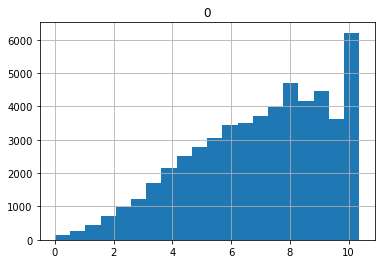

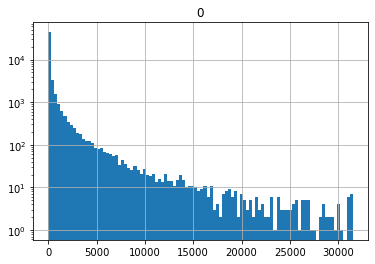

In [15]:
import pandas as pd
pd.DataFrame(idfs.values()).hist(bins=20)
pd.DataFrame([x for x in df.values()]).hist(bins=100, log=True)

In [16]:
test = ('волос цвет выглядеть зеркало отражение прическа кожа смотреться глаз ресница'.split())
for w in test:
    print(f'{w:>10} {idfs.get(w)}')
print()
test = ('бутылка секс сан грамм ром горлышко литр давать кайф этикетка'.split())
for w in test:
    print(f'{w:>10} {idfs.get(w)}')
print()
test = ('командир отряд флот командовать адмирал командование патруль подразделение состав штаб'.split())
for w in test:
    print(f'{w:>10} {idfs.get(w)}')
    

     волос 0.20956752615156643
      цвет 0.3941324719495399
 выглядеть None
   зеркало 0.8741209898809799
 отражение 1.6128311324276299
  прическа 1.739308141090147
      кожа 0.4811523858420668
смотреться None
      глаз 0.0075951743521137805
   ресница 1.548848674377827

   бутылка 0.9083130144407048
      секс 1.9927362446005608
       сан 2.6298868564611295
     грамм 2.6516413214776944
       ром 3.336741967786426
  горлышко 2.90635984437819
      литр 3.1919210252608337
    давать None
      кайф 3.190381379075241
  этикетка 3.2514387868376966

  командир 1.7551137203727154
     отряд 1.6541760823861278
      флот 2.3678942701246593
командовать None
   адмирал 3.236828137320262
командование 2.6444856558822822
   патруль 2.8583144359219443
подразделение 2.7174972869641514
    состав 1.5740442441808689
      штаб 2.486903132839329


In [22]:
%%time

dir_in = 'plain_fiction_cut_mystem'
dir_out = 'plain_fiction_cut_chunks_processed_maxdf'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)
i=0
for name in tqdm(sorted(os.listdir(dir_in))):
    with open(os.path.join(dir_in, name)) as f:
        res = []
        chunk = 0
        k=0
        for line in f:
            k+= 1
            if k % 1000 == 0:
                with open(os.path.join(dir_out, name + f'_{chunk}'), 'w') as ff:
                    ff.write(' '.join(res))
                chunk += 1
                res = []
            try:
                w, r = line.split('=', 1)
                if 'имя,' in r or 'фам,' in r or 'отч,' in r:
                    raise
                if w in russian_stopwords:
                    raise
                if not r.startswith(('S,', 'S=')):
                    raise
                if len(w) < 3 and w not in short_words.split():
                    raise
                if idfs[w] > 6:
                    raise
                res.append(w)
            except:
                continue
        if len(res) > 100:
            with open(os.path.join(dir_out, name + f'_{chunk}'), 'w') as ff:
                ff.write(' '.join(res))
        i+=1

100%|██████████| 31587/31587 [10:28<00:00, 50.25it/s]

CPU times: user 9min 58s, sys: 28.9 s, total: 10min 27s
Wall time: 10min 28s


In [24]:
dir_out = 'plain_fiction_cut_chunks_processed_maxdf'
with open('wv_fiction_cut_maxdf.txt', 'w') as f1:
    with tqdm(sorted(os.listdir(dir_out))) as t:
        for f in t:
            with open(os.path.join(dir_out, f)) as doc:
    #             tokens = [l.lower() for l in re.findall('\w+', doc.read().replace('\n', ' '))]
                tokens = doc.read().split()
                doc_voc = Counter(tokens)
                s = ' '.join(f'{w}:{c}' for w, c in sorted(doc_voc.items()))
                f1.write(f"{f.replace(' ', '_').replace(':', '')} {s}\n")

100%|██████████| 265964/265964 [01:04<00:00, 4103.05it/s]


In [25]:
import artm

In [26]:
%%time
batch_vectorizer = artm.BatchVectorizer(data_path='wv_fiction_cut_maxdf.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder='plain_fiction_cut_maxdf_batches')

CPU times: user 2min 3s, sys: 1.12 s, total: 2min 4s
Wall time: 24.6 s


In [27]:
for topic, words in model.score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in model.score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))batch_vectorizer = artm.BatchVectorizer(data_path='plain_fiction_cut_maxdf_batches', data_format='batches')

In [28]:
%%time
dictionary = artm.Dictionary()
dictionary.gather(data_path='plain_fiction_cut_maxdf_batches')

CPU times: user 8.12 s, sys: 155 ms, total: 8.27 s
Wall time: 8.27 s


In [29]:
dictionary

artm.Dictionary(name=d9eeed56-4d34-4c43-82d3-a32a1eca4a2a, num_entries=17821)

In [30]:
dictionary.filter(min_tf=10, max_df_rate=0.9)

artm.Dictionary(name=d9eeed56-4d34-4c43-82d3-a32a1eca4a2a, num_entries=17821)

In [31]:
dictionary

artm.Dictionary(name=d9eeed56-4d34-4c43-82d3-a32a1eca4a2a, num_entries=17821)

In [33]:
dictionary.save(dictionary_path='plain_fiction_cut_maxdf_batches/dictionary')
dictionary.save_text(dictionary_path='plain_fiction_cut_maxdf_batches/dictionary.txt')

In [34]:
import re
vocab_path = 'plain_fiction_cut_maxdf_batches/vocab.txt'

with open('plain_fiction_cut_maxdf_batches/dictionary.txt', 'r') as dictionary_file:
    with open(vocab_path, 'w') as vocab_file:
        dictionary_file.readline()
        dictionary_file.readline()
        for line in dictionary_file:
            elems = re.split(', ', line)
            vocab_file.write(' '.join(elems[:2]) + '\n')

In [35]:
!~/BigARTM/bin/bigartm -c ./wv_fiction_cut_maxdf.txt -v ./plain_fiction_cut_maxdf_batches/vocab.txt --cooc-window 10 --cooc-min-tf 5 --write-cooc-tf ./plain_fiction_cut_maxdf_batches/cooc_tf_ --cooc-min-df 5 --write-cooc-df ./plain_fiction_cut_maxdf_batches/cooc_df_ --write-ppmi-tf ./plain_fiction_cut_maxdf_batches/ppmi_tf_ --write-ppmi-df ./plain_fiction_cut_maxdf_batches/ppmi_df_

Parsing text collection...    1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15%  16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31%  32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47%  48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63%  64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79%  80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95%  96%  97%  98%  99% 100%
Merging co-occurrence batches. Stage 1: parallel agglomerative merge
Merging co-occurrence batches. Stage 2: sequential merge
Calculating pPMI
OK.  
532 batches created with total of 265964 items, and 17821 words in the dictionary; NNZ = 40311206, average token weight is 1.45331


In [38]:
cooc_dict = artm.Dictionary()
cooc_dict.gather(
    data_path='plain_fiction_cut_maxdf_batches/',
    cooc_file_path = "plain_fiction_cut_maxdf_batches/ppmi_df_",
    vocab_file_path='plain_fiction_cut_maxdf_batches/vocab.txt',
    symmetric_cooc_values=True)

In [39]:
models = []
n_topics = [300, 400, 500]

In [40]:
for i in tqdm(n_topics):
    regularizers_list = []
    regularizers_list += [artm.SmoothSparsePhiRegularizer(name='SPPhiNgrammReg', tau=-0.1)]
    regularizers_list += [artm.SmoothSparseThetaRegularizer(name='SmoothThetaReg', tau=-0.1)]
#     regularizers_list += [artm.ImproveCoherencePhiRegularizer(name='CoherenceReg', tau=0.1, dictionary=dictionary)]
    scores_list = []
    scores_list += [artm.PerplexityScore(name='PerplexityScore')]
    scores_list += [artm.SparsityPhiScore(name='SparsityPhiScore', eps=0.0001)]
    scores_list += [artm.SparsityThetaScore(name='SparsityThetaScore', eps=0.0001)]
    scores_list += [artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.5)]
    scores_list += [artm.TopTokensScore(name='TopTokensScore10',
                                        num_tokens=10, 
                                        dictionary=cooc_dict)]
    scores_list += [artm.TopicKernelScore(name='TopTokensScoreKernel',
                                        dictionary=cooc_dict)]
    model = artm.ARTM(num_topics=i,
                      dictionary=dictionary,
                      regularizers=regularizers_list,
                      scores=scores_list,
                      num_document_passes=5)
    model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)
    model.dump_artm_model(f'S_topics_maxdf_{i}')
    models.append(model)

100%|██████████| 3/3 [1:44:44<00:00, 2094.90s/it]


In [42]:
from matplotlib import pyplot as plt

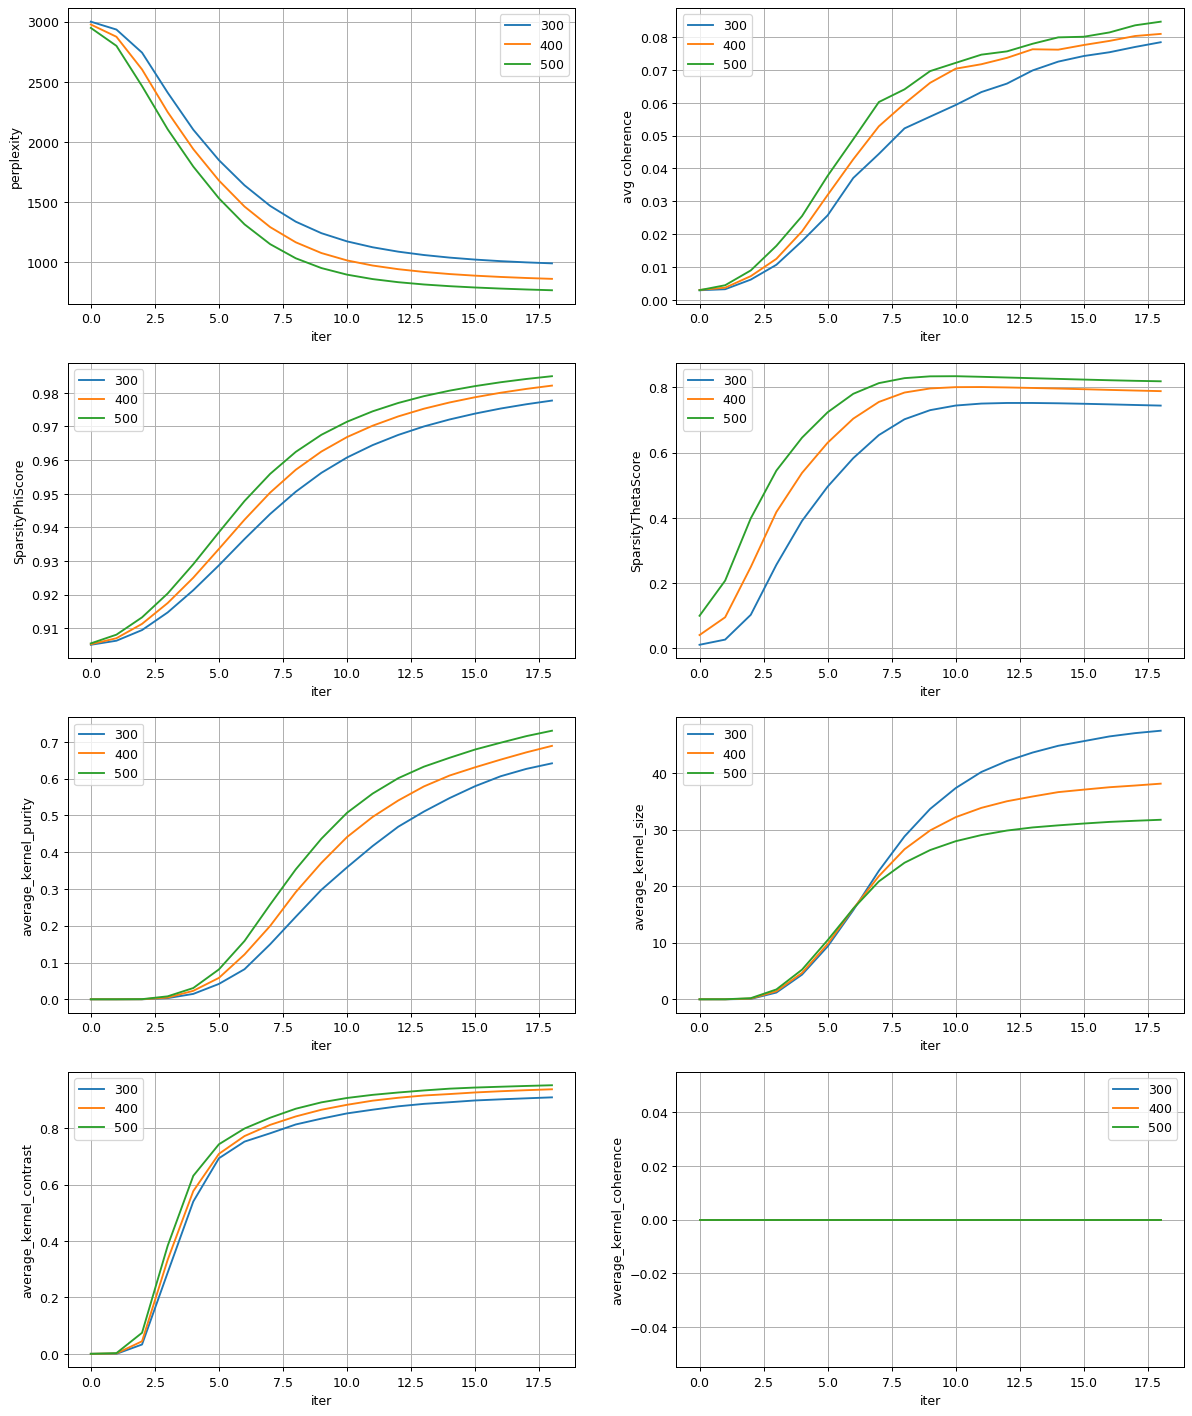

In [43]:
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('perplexity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 2)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('avg coherence')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 3)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityPhiScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityThetaScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 5)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_purity)-1), s['TopicKernelScore'].average_purity[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_purity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 6)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_size)-1), s['TopicKernelScore'].average_size[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_size')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 7)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_contrast)-1), s['TopicKernelScore'].average_contrast[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_contrast')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 8)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_coherence)-1), s['TopicKernelScore'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_coherence')
    ax.set_xlabel('iter')

In [51]:
for topic, words in models[1].score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models[1].score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))
#     print('{0}: {1}'.format(topic, ' '.join(words)))

topic_0: нож палка рука топор лезвие ребро голова спина раненый размах

topic_1: год день месяц начало время март май сентябрь лето июнь

topic_2: ужин день похороны развод время конец слово час соболезнование дело

topic_3: нога рука черт голова колено голос кулак плечо глаз локоть

topic_4: америка поэт период африка кризис поэзия год идеал деятель австралия

topic_5: ветер песок порыв буря пропасть гребень обрыв край утес воздух

topic_6: супруга супруг особа сплетня воспитание дворянин императрица карла баронесса добродетель

topic_7: пара место тренировка вес тройка килограмм упражнение время значок случай

topic_8: баня медаль ленинград папироса шинель дурачок земляк пионер воспитатель колхоз

topic_9: дорога сидение водитель шофер обочина место тормоз сторона скорость салон

topic_10: море экспедиция порт побережье катер залив бухта плавание мыс время

topic_11: дворец нить паук паутина червь подземелье пик ас амазонка мышонок

topic_12: выражение лицо свидание улыбка усмешка замечание глаз время голос правда

topic_13: газета редактор кандидат редакция заметка коллектив психология заголовок день хроника

topic_14: магия ведьма заклинание сила ритуал проклятие чародей чары гоблин заклятие

topic_15: пират карандаш шпион дырка пальма сирена лагуна корсар весельчак прутик

topic_16: шаг движение лицо маска рука сторона звук фигура эхо фонарик

topic_17: компьютер процесс культура вероятность специалист код этап статус технология результат

topic_18: сэр лондон джентльмен англия время стоун человек вид лицо сквайр

topic_19: парень плечо глаз корка лицо звездочка голова ковбой нос сторона

topic_20: цвет зеркало оттенок отражение модель прическа туфля помада глаз стрижка

topic_21: вождь сан японец япония самурай контрабандист гам таможенник европеец иероглиф

topic_22: грех батюшка колокол поп барин сударь господи грамота сударыня батя

topic_23: лошадь конь всадник седло копыто повозка конюшня дорога повод жеребец

topic_24: гостиница мода экипаж багаж управляющий шляпка телеграмма носильщик посыльный линкольн

topic_25: материал процент население катастрофа производство год категория масштаб фонд премия

topic_26: запах звук халат ванная шорох душ осколок косяк голова часы

topic_27: дверь коридор пакет рука шапочка рыбка плитка спина угол стук

topic_28: власть житель столица мэр правление старейшина человек торн время основатель

topic_29: двор крыльцо скамейка милиционер лавочка сквер сторона подворотня место угол

topic_30: дверца пальто тротуар гараж лампочка прохожий вешалка угол супермаркет светофор

topic_31: париж франция сено француз франк мадемуазель мсье время произношение предместье

topic_32: начальник взрыв приказ звание подполковник побег подчиненный ранение носилки управление

topic_33: помещение крышка склад надпись табличка шахта устройство лабиринт электричество светильник

topic_34: клетка проводник орк прут парнишка патруль цветочек амбал мартышка зверинец

topic_35: стакан люк глоток жидкость табурет рука висок вест флер пойло

topic_36: свадьба невеста жених церемония торжество вуаль поздравление смокинг помолвка рука

topic_37: способность человек разум источник сила инстинкт иллюзия суть время аура

topic_38: волк лапа морда прыжок стая вой монстр клык вожак зуб

topic_39: дух битва гром гигант духи хан шаман орда рой кай

topic_40: помощник пассажир груз маршрут миссия рейс транспорт звено рейд тонна

topic_41: тетя тетка дача командировка родственница санаторий шашлык путевка воспитательница сочи

topic_42: собака пес человечек попугай собачка лай поводок ошейник овчарка нос

topic_43: доктор врач операция клиника хирург санитар психиатр помощь случай шприц

topic_44: марка обложка открытка упаковка каталог сувенир регистрация евро пакетик паста

topic_45: слон подъем секция ячейка жетон восхождение пресс харя хобот вагончик

topic_46: город человек англичанин губернатор горожанин окраина провинция караван время путь

topic_47: журнал страница текст печать копия дата строка рукопись строчка экземпляр

topic_48: советник пирамида трон египет фараон древность двойник гробница династия шах

topic_49: туман миля фут дюйм человек ярд дружище конец зевака час

topic_50: машина автомобиль фара время час минута сторона человек голова момент

topic_51: отряд партия флот адмирал доклад лидер ранг коммунист крым эскадра

topic_52: документ сведение данные лаборатория версия проверка комплекс совещание доступ архив

topic_53: сын сынок год отчим невестка день человек время слово сынишка

topic_54: священник волшебник палочка волшебство сатана исповедь рука распятие слово человек

topic_55: торговец мастерская находка кран изделие хлам археолог нефть скульптура раскопка

topic_56: демон тварь чудовище джунгли логово ящер преисподняя голова смерч сила

topic_57: разбойник дуб птичка клюв сук пазуха лебедь голова колючка шест

topic_58: отель сумочка джин лак постоялец милочка портье дизайнер бюстгальтер бунгало

topic_59: шарик браслет страж амулет ласточка рык балахон голова колдовство обруч

topic_60: прибор робот управление механизм скорость орбита скафандр двигатель панель система

topic_61: бой лейтенант боец винтовка пулемет батарея стрельба враг граната мишень

topic_62: снег зима лето аллея тропинка лужайка холод горка лыжа утка

topic_63: малыш игрушка мамочка бутерброд мороженое елка пирожок варение баночка кофта

topic_64: удар противник сторона драка клинок схватка сила погоня сталь рука

topic_65: мальчишка подросток паренек шарф рука волшебница голова сторона сопляк взрослый

topic_66: музей ценность коллекция кролик старина вещь предмет знаток шедевр бюст

topic_67: ворота труба муха мяч трибуна футбол матч защитник тополь стадион

topic_68: еда хлеб кусок кусочек масло голод пирог сахар сыр желудок

topic_69: пиво бар стойка посетитель кружка напиток бармен выпивка чек приятель

topic_70: свет темнота ночь дорожка силуэт голова глаз конец голос выключатель

topic_71: тема клиент отдел зарплата реклама разговор дело бухгалтер коллега услуга

topic_72: рубашка брюки ботинок одежда джинсы пиджак каблук пуговица туфля рукав

topic_73: баба козел детишки теща ребеночек дружка вранье дело сопли слово

topic_74: леди герцог светлость герцогиня миледи реверанс время рука наследник герцогство

topic_75: дурак банда грабитель похищение похититель монетка ограбление дело умник выкуп

topic_76: таблетка кора зоопарк банан качели джи рози леденец простуда пилюля

topic_77: концерт пение перстень рок струна скрипка футляр певица голос маятник

topic_78: тьма змея бездна змей щупальце зомби панцирь камушек глаз кобра

topic_79: раса богиня кристалл барьер пластина спираль адепт зевс оракул титан

topic_80: след убийца преступление преступник место заключение эксперт следствие человек осмотр

topic_81: тысяча доллар миллион сумма договор доход расход сотня условие месяц

topic_82: перо нора табак гусь погреб каморка кеш веревочка ведьмак павлин

topic_83: жизнь человек будущее прошлое одиночество время мысль судьба чувство надежда

topic_84: брат братец время слово человек братишка голова место пора дело

topic_85: карта чиновник колода канцелярия превосходительство масть человек каторга осужденный туз

topic_86: бабочка док псих травка жаба крылышко подушечка кактус гипноз мура

topic_87: столик клуб ресторан заведение официантка коктейль место вид метрдотель забегаловка

topic_88: новость офис журналист заявление пресса интервью репортер выпуск человек лос-анджелес

topic_89: школа дневник каникулы учебник дворник время занятие двойка лето грипп

topic_90: волна рыба шторм вода дельфин чайка брызги парус дно весло

topic_91: университет лекция преподаватель аудитория кафедра формула время фрагмент вдохновение диссертация

topic_92: идея проект теория сфера материя элемент образец развитие структура часть

topic_93: боб юпитер чета бич чучело гордон чет штаб-квартира гамак франклин

topic_94: человек отношение общество поступок цель благо жизнь чувство право насилие

topic_95: учитель ученик академия обучение гимназия занятие варяг время год знание

topic_96: народ революция петербург историк дума сибирь бунт борьба ссылка отечество

topic_97: кот котенок чердак колбаса воробей кладовка форточка веник чулан швабра

topic_98: яйцо сок фрукт коляска шоколад овощ булочка садик сладость апельсин

topic_99: капитан офицер пароход чин герр штурман одесса мичман йорк время

topic_100: роман рассказ герой писатель автор история литература читатель персонаж сюжет

topic_101: солдат пушка строй сражение мундир легион шеренга легионер штык ряд

topic_102: счет шанс неприятность положение факт случай мнение репутация дело мера

topic_103: смерть человек дьявол ненависть месть сеньор слово жестокость дело измена

topic_104: сундук курьер чудак сюртук жандарм чан узелок хорек лупа пешка

topic_105: госпожа театр вдова актер актриса артист пьеса роль постановка труппа

topic_106: водка хрен пацан сволочь че гад башка сука бомж спирт

topic_107: ученый наука открытие человек основа гений изучение учение религия исследование

topic_108: пещера легенда земля владение убежище потомок зерно поселение время континент

topic_109: сад молоко печение цыпленок мел яблоня день вишня бусы сорняк

topic_110: чай цветок чашка чайник букет пирожное кавалер день время утро

topic_111: тело безумие сознание вечность рассудок пытка голова кожа сила мысль

topic_112: песня сказка ворона цирк ворон эра арена смотритель поросенок богатырь

topic_113: стекло мотор асфальт пожар металл провод рычаг свалка газон форд

topic_114: воевода верста сани русь татарин сотник дело пила сени молодец

topic_115: могила крест кладбище гроб яма земля памятник скелет прах место

topic_116: россия европа русский германия граница грек турок нация год турция

topic_117: позиция атака танк ракета снаряд орудие броня оборона цель противник

topic_118: класс урок учительница доска тетрадь перемена парта одноклассник школьник день

topic_119: магазин рынок товар покупка витрина покупатель прилавок продажа проспект продавщица

topic_120: знакомство продавец спутница неудачник краса бордель магнит трущоба очкарик обладательница

topic_121: пол рана решетка кинжал голова глаз стена лицо угол ран

topic_122: берег река лодка озеро вода рыбак течение дно место речка

topic_123: игра правило игрок ставка азарт ход выигрыш удача доска забава

topic_124: компания сотрудник бизнес работник бизнесмен профессионал конкурент проблема человек администрация

topic_125: ноль блин задница дерьмо минус пятерка перец бокс бугор мозги

topic_126: ангел ад хранитель бес предсказание грешник небо голос ангелочек архангел

topic_127: костюм контора галстук рукопожатие телосложение человек рука ребус банкнота костюмчик

topic_128: век зло сущность традиция история дух жизнь время стремление человек

topic_129: род честь победа поражение победитель клятва соперник награда юнец смертный

topic_130: молния корзина колодец чаша бочка фонтан кувшин гроза пыль сосуд

topic_131: фотография снимок рамка пленка альбом фотограф фото фотоаппарат объектив изображение

topic_132: станция рабочий платформа вокзал человек урал экспресс место шахтер цистерна

topic_133: кость цепочка фигурка уголь камешек рука медальон вещица человек статуэтка

topic_134: программа техника подготовка спорт физика тренер соревнование инструктор единица спортсмен

topic_135: девушка глаз мысль сторона ответ удивление любопытство слово спасибо фигура

topic_136: танец серьга лилия тара танцовщица вальс льюис янки изабелла танцор

topic_137: окно потолок стена лампа подоконник дверь штора комнатка обои проем

topic_138: ребенок бабушка няня взрослый год время беременность день рука воспитание

topic_139: секс любовник мужчина фантазия искушение удовольствие время удовлетворение потребность влечение

topic_140: полка метро мебель стопка шкафчик архитектор вещь плесень уют корешок

topic_141: жена муж жизнь время свекровь день человек месяц дело год

topic_142: холм лагерь поселок поляна склон овраг сторона дорога земля комар

topic_143: охранник поворот охрана шоссе фургон скорость кабина рация багажник сторона

topic_144: отец рука глаз время человек дело разговор день конец лицо

topic_145: кухня плита кукла тина табуретка сковородка рояль носик утюг бренд

topic_146: роза предок богатство сокровище украшение поместье драгоценность бриллиант усадьба лепесток

topic_147: весна завод осень рай ночь человек станок непогода лачуга лето

topic_148: бета фокус шоу боксер хит ринг нейл кулон левша раунд

topic_149: книга библиотека чтение переплет история страница человек день томик название

topic_150: охота стадо путешественник олень пастух дичь загон отшельник время заповедник

topic_151: шеф папка секретарша приемная мартини посетительница минута дело стриптиз рука

topic_152: мужик бабка дура ива мамаша дамочка брюнет глаз идиотка нос

topic_153: борт судно палуба корабль матрос каюта моряк китаец парус корма

topic_154: ситуация план выбор встреча пауза собеседник разговор молчание голос дело

topic_155: ванна курица приют чеснок сковорода деточка лакомство морковка губка водичка

topic_156: обед завтрак столовая блюдо стол апартамент мелисса шахматы швейцар банкет

topic_157: дочь приданое рабыня роды княжна горох год вдовец глаз царевна

topic_158: штаны ноготь носок пятка мыло трусы пена шнурок татуировка волосок

topic_159: семья родственник зять родство тесть год время член человек слово

topic_160: мужчина голос голова рука лицо улыбка нотка плечо человек глаз

topic_161: мастер вера наставник мудрость султан мудрец человек вражда ремесло слово

topic_162: стол кабинет дверь служащий время человек место дело компаньон вид

topic_163: искусство художник рисунок кисть галерея пейзаж произведение живопись изображение картинка

topic_164: совесть человек пустяк сыщик барышня опера злодей дело надобность порок

topic_165: сон боль ночь кошмар мысль время чувство голова день рука

topic_166: несчастие дружба месяц отъезд надежда ссора обида грусть родные время

topic_167: император правитель заговор епископ престол преданность указ наследник инквизитор подданный

topic_168: стража бродяга человек казнь палач аристократ маршал главарь шайка кабак

topic_169: дон дева испания испанец флора привязанность гранд сеньорита донья сеньор

topic_170: желание слово раздражение ложь согласие ирония разговор недовольство намерение право

topic_171: господин монета купец торговля налог богач бедняк портной человек товар

topic_172: скала лед дикарь плот маяк туземец водопад смола динозавр галька

topic_173: вода океан пар градус ток струя сетка время строитель облако

topic_174: гость завещание кухарка угощение пансион повариха визит кушанье дело глаз

topic_175: девочка косичка пианино сердечко глаз платьице воспитанница голова слово домоправительница

topic_176: церковь скамья алтарь кардинал святой часовня аббат пастор проповедь колокольня

topic_177: агент заказ партнер агентство интернет психолог сайт ноутбук страховка слежка

topic_178: кровать постель спальня гостиная ночь утро час вещь порядок время

topic_179: туалет акт занавес унитаз декорация уборная сортир горошек гардероб ик

topic_180: служба представитель секретарь должность область пост инженер комиссия отставка время

topic_181: шерсть щенок свинья лев клок жук зверек клубок подстилка ухо

topic_182: ключ любовница связка скважина дверь ключик паоло время интрижка разгадка

topic_183: царь господь молитва царство земля христианин пророк икона община человек

topic_184: краска обитатель мука полотно закат солома тоска день небо человек

topic_185: дама перчатка горничная лакей дворецкий веер парик бренди дуэль рука

topic_186: война американец бомба человек предатель боевик захват враг время пленный

topic_187: корабль вспышка точка яхта отсек время оболочка зрение пространство измерение

topic_188: оружие пистолет пуля выстрел бандит ствол патрон человек рука напарник

topic_189: дерево птица ветка шар медведь ветвь земля ствол листва лист

topic_190: мама папа день рука голова время вещь правда дело взрослый

topic_191: поверхность воздух высота газ диск температура давление глубина время форма

topic_192: тарелка стол коньяк ремонт майка вилка салат скатерть соус помидор

topic_193: жертва приступ видение эль жрица галлюцинация пробуждение завеса сила голова

topic_194: маркиз бал сезон титул кузина имение пари траур компаньонка фортуна

topic_195: дедушка нитка иголка ножницы шаль зеркальце снежинка вата сапожок соломинка

topic_196: миссис внучка бабуля экономка хаус время джем качалка прабабушка брошь

topic_197: родитель детство год воспоминание поколение наследство память время пора юность

topic_198: руководитель руководство заместитель республика террорист ссср ветеран фсб спецслужба кгб

topic_199: ладонь рука голова глаз подушка ступенька подбородок простыня плечо лицо

topic_200: возраст характер год внешность манера время рост разговор глаз недостаток

topic_201: зона тайга артефакт периметр мутант клин сталкер аномалия пригоршня тик

topic_202: кровь вампир жила плоть глаз голова сила упырь капля порез

topic_203: лифт кнопка полотенце футболка дверь кушетка кабинка кабина рука минута

topic_204: группа задача задание пункт норма сектор выполнение академик связь человек

topic_205: секунда рука мгновение горло глаз голос сила призрак запястье челюсть

topic_206: труп мертвец покойник мертвый повязка засов рука бородач бинт мочь

topic_207: колесо ограда мотоцикл таракан канава сторона пешеход подножка спица дорога

topic_208: слуга служанка гостья племянница обморок бедняжка гостеприимство рука голова кроватка

topic_209: предложение отчет конец соглашение трюк обязательство отказ теннис отзыв время

topic_210: хозяин рис шкатулка ниша владелец лоток человек ювелир бублик лавр

topic_211: статья капитал известность парламент достояние вестник съезд очевидец остроумие пенс

topic_212: товарищ командир рота старшина батальон казарма взвод поручик часть штаб

topic_213: этаж фирма блокнот машинка справочник день человек вид кроссворд рамочка

topic_214: клан чужак вал уничтожение исследователь разрушение вулкан землетрясение время координатор

topic_215: маг башня гном орден магистр цитадель тракт алхимик бойница стена

topic_216: милиция начальство происшествие дежурный портфель мент администратор морг дело место

topic_217: губа шея рука глаз лицо кожа палец голова плечо щека

topic_218: эпоха рим италия философ столетие философия величие римлянин история мораль

topic_219: бутылка блондинка висок алкоголь стаканчик спиртное бутылочка дань пьяница похмелье

topic_220: слеза дочка близнец малышка глаз голосок плач рука слово девчушка

topic_221: кресло экран ремень салон спинка дуга глаз пульт голова подлокотник

topic_222: замок карета ров кучер время дорога перси путешествие место путь

topic_223: территория государство гражданин союз организация китай граница азия группировка человек

topic_224: инспектор мак монах констебль шотландец джорджия человек ряса норманн лэнгли

topic_225: поцелуй объятие дыхание жар наслаждение глаз ощущение чувство близость возбуждение

topic_226: лорд милорд фишка хук медиум голос рука человек лицо пэр

topic_227: тон приглашение поведение улыбка горечь слово обещание кузен смущение негодование

topic_228: остров золото островок гавань материк пролив голландец колесница серебро инк

topic_229: парк штат нью-йорк келли авеню вашингтон время калифорния манхеттен флорида

topic_230: министр правительство политика разведка посол министерство берлин учреждение дело арест

topic_231: обстоятельство случай интерес человек действительность особенность событие способ время степень

topic_232: пустыня статуя лик обряд аллах алмаз божество джинн человек культ

topic_233: здание вход шериф дверь вестибюль центр место сити клерк чикаго

topic_234: автобус остановка рюкзак лужа голубь будка кепка козырек лямка мирон

topic_235: ярость парочка злость презрение оскорбление смешок отвращение проститутка шлюха бешенство

topic_236: комната дверь стул порог камин угол стол голос лицо спинка

topic_237: аэропорт турист толстяк экскурсия грузчик достопримечательность гид карусель время место

topic_238: страна родина англия год август польша поляк швейцария путешествие время

topic_239: профессор вор председатель сейф человек депутат мясник воровство обыск уголовник

topic_240: посуда крошка конфета торт детка корзинка тесто веснушка блюдце пикник

topic_241: красота красавица страсть нежность чувство прелесть счастие восхищение совершенство восторг

topic_242: больница отделение соседка наркотик справка тумбочка дежурство отчество наркоман инфаркт

topic_243: государь боярин поклон старец царица княгиня царь царевич вельможа кафтан

topic_244: страх ужас крик холод глаз вопль рука воздух паника звук

topic_245: порошок мешочек котелок колдунья нечисть избушка некромант мазь яга одиночка

topic_246: природа реальность сила хаос путь стихия гармония бесконечность человек время

topic_247: веревка цепь столб сарай петля пруд великан бревно кит проволока

topic_248: институт экзамен кружок конкурс ученица аптека математика химия директриса интернат

topic_249: мистер мадам тетушка корт вид дело минута голос место слово

topic_250: дядя племянник дядюшка мор креол девон овсянка лестер калина время

topic_251: крыло дракон коготь пасть посох голова шут шип талисман чешуя

topic_252: грязь одеяло сапог рубаха коса рука лицо покрывало одежда глаз

topic_253: язык фон человек происхождение слово обычай собственность иностранец речь различие

topic_254: метр тоннель стрелка сантиметр сторона ширина час длина картер прожектор

topic_255: мисс барон гувернантка шиллинг камердинер дело рука вид лицо внимание

topic_256: вопрос решение ответ проблема время возможность причина последствие мысль момент

topic_257: юноша железо оборотень кузнец трактир молот человек трактирщик кузница чудище

topic_258: колокольчик кол башмак ярмарка итальянец колпак синьор камзол булавка скай

topic_259: животное мясо человек корм ежик день повадка время вид браконьер

topic_260: волос глаз лицо ресница талия голова рука прядь щека улыбка

topic_261: рожа отпечаток бензин наручник оперативник сигнализация шестерка слесарь зацепка скотч

topic_262: дождь погода небо туча капля гриб земля лопата ливень радуга

topic_263: взгляд глаз бровь лицо улыбка вид рука плечо внимание жест

topic_264: мальчик па глаз рука мальчуган голова голос взрослый лицо время

topic_265: полковник майор сержант подразделение прапорщик штаб капрал спецназ операция офицер

topic_266: письмо адрес почта день переписка слово ответ время дело конец

topic_267: луна орел таверна верблюд осел людоед мул бочонок ночь атаман

topic_268: любовь жизнь чувство софия страдание время конец год разрыв день

topic_269: роль мечта чувство талант красавец натура комплимент увлечение переживание эпизод

topic_270: полиция полицейский участок стрит коттедж рута роуд паб порядок место

topic_271: девка телега цыган извозчик самовар домишко воз писарь лавочник человек

topic_272: старик толпа человек лицо голова глаз пат старикашка дело голос

topic_273: камень вершина гнездо обломок трещина глина валун коротышка ящерица место

topic_274: мир история конец вещь место жизнь судьба время сила феникс

topic_275: диван поднос порция щетка диванчик рука голова глаз кофейник вид

topic_276: дар монастырь печаль ложе виконт мольба обитель монахиня одеяние благословение

topic_277: фонарь балкон переулок занавеска перила мостовая улочка фасад человек нищий

topic_278: меч воин раб оружие щит копье шлем враг пленник рука

topic_279: очки запись аппарат радио передача минута эфир часы будильник кассета

topic_280: империя разведчик колония наемник союзник портал форт крейсер гильдия лига

topic_281: банка ложка картошка каша орех муравей капуста лепешка икра конек

topic_282: закон суд судья наказание право справедливость приговор обвинение нарушение правосудие

topic_283: портрет знакомый сходство переводчик поклонник лицо слово человек слог романтика

topic_284: подвал ведро яблоко сторож привидение старичок пух невидимка червяк пятачок

topic_285: курс карьера образование окончание колледж год учеба диплом курсы студентка

topic_286: костер тропа ручей хижина степь очаг путник путь ущелие земля

topic_287: бумага лист записка конверт послание почерк клочок рука ион чернила

topic_288: колдун жрец повелитель свиток предводитель могущество пергамент наместник властелин сила

topic_289: имя детектив минутка юмор интонация слово правда вид дело лицо

topic_290: питер пляж бассейн шорты купальник купание шезлонг донна сауна плавки

topic_291: князь стрела крепость лук казак земля дружина лучник дружинник стан

topic_292: улица такси квартал минута ранчо сторона час зонтик прохожий угол

topic_293: сумка босс свитер спасибо вещь рука голова резинка кейс глаз

topic_294: хвост кошка мышь заяц лапка лиса ухо крокодил сова хвостик

topic_295: незнакомец человек негодяй револьвер мерзавец лицо кучер подлец суматоха рука

topic_296: камера череп крыса урод конечность дубинка кишка голова узник нары

topic_297: президент анекдот телевидение политик выборы исполнитель знаменитость элита показ человек

topic_298: дед внук мороз коза медвежонок гвоздик старикан гвоздика дедуля правнук

topic_299: дело долг срок конец порядок рука голова жалоба юрист разговор

topic_300: мешок лавка печь соль дрова мед котел мельница мужичок полено

topic_301: огонь пламень свеча огонек искра сияние камин рука отблеск глаз

topic_302: шапка велосипед касса шуба дядька маринка метла троллейбус очередь дяденька

topic_303: зал лестница ступень телохранитель трость место лицо дверь голос голова

topic_304: подруга подружка день приятельница голова дело юбилей ухажер ум настроение

topic_305: система сеть база объект канал исследование установка вирус ресурс наблюдение

topic_306: черта глаз лицо веселие сторона хохот ухмылка скула прилив смех

topic_307: зверь добыча рог бык пан карлик леший человек шакал голова

topic_308: сердце грудь глаз рука лицо дрожь слово щека сила решимость

topic_309: забор калитка огород петух огурец хата сало грядка корыто филин

topic_310: грохот щель звук мрак отверстие гул шум пузырь воздух свист

topic_311: человечество организм эксперимент вещество человек функция создатель стадия прогресс цикл

topic_312: сцена зритель спектакль выступление сет аплодисменты представление репетиция цыганка кулиса

topic_313: бригада блок разряд треть смена цех тайник болт лом завал

topic_314: мать день жизнь время ночь год место лицо дот рука

topic_315: команда уровень монитор новичок контейнер клавиша капсула очко клавиатура пароль

topic_316: платье юбка ткань шелк одежда незнакомка подол глаз рука туфелька

topic_317: женщина лицо рука время глаз внимание одежда вещь человек конец

topic_318: автомат грузовик джип трасса кузов пропуск парашют ягуар стажер камуфляж

topic_319: гора север юг восток запад палатка земля равнина время место

topic_320: солнце луч горизонт жара небо день воздух зелень терраса час

topic_321: стена крыша дыра место мусор сторона кирпич строение постройка арка

topic_322: ковер матушка рама мрамор зала бархат беседка подставка узор оранжерея

topic_323: наряд особняк ожерелие пенни жемчуг кружева атлас челси отделка шлейф

topic_324: сосед ящик шкаф бланк яичница утро час вещь тюбик дежурная

topic_325: дым сигарета куртка пачка пробка спичка пепел зажигалка окурок пепельница

topic_326: королева еврей вена израиль инквизиция погром раввин синагога еврейка палестина

topic_327: король принц принцесса величество королевство корона высочество придворный трон сир

topic_328: картина телевизор холодильник выставка квартирка домработница художница мойка телик фата

topic_329: самолет полет пилот посадка летчик двигатель бинокль механик кабина истребитель

topic_330: музыка инструмент хор мелодия музыкант звук ритм нота гитара такт

topic_331: список цена переговоры предприятие акция прибыль бюро дело стоимость кредит

topic_332: поле земля корова ферма луг овца скот фермер урожай скотина

topic_333: информация сообщение безопасность деятельность связь контракт инструкция департамент характеристика ассоциация

topic_334: паспорт кошелек маньяк бумажник удостоверение участковый таксист визитка стерва гражданка

topic_335: тип руль стоянка авария мерседес место шина парковка капот вид

topic_336: долина племя индеец пони человек соплеменник харпер бизон место прерия

topic_337: мозг энергия схема частица аппаратура гипотеза изобретение анализ пространство проба

topic_338: поезд вагон билет вокзал купе трамвай рельс путь пассажир электричка

topic_339: душа брак мысль ум пора глубина доброта позор слово судьба

topic_340: бог слава гнев человек милость воля уста слово наследник глупец

topic_341: существо пища растение плод обезьяна хищник вид человек создание детеныш

topic_342: студент корпус пенсия факультет общежитие специальность уборщица пенсионер дискотека поступление

topic_343: опасность свобода нападение риск негр мина гибель араб тактика преследование

topic_344: сознание состояние личность время ощущение изменение эффект понимание форма мысль

topic_345: старуха старушка горшок тролль груша сорока сирень слива селедка овечка

topic_346: фильм кино вилла режиссер студия сценарий сериал кинотеатр гольф время

topic_347: работа время вечеринка день проблема место менеджер конец помощница мероприятие

topic_348: слово ошибка знание существование истина смысл логика образ человек сомнение

topic_349: мост флаг набережная опора фуражка викинг караул парапет флажок нева

topic_350: номер фамилия заказчик минута дело пансионат гаишник время час доцент

topic_351: сигнал лента микрофон комбинезон тревога проход униформа дисплей терминал центр

topic_352: площадь храм колонна купол собор свод служитель процессия плотник идол

topic_353: шляпа тюрьма публика ус пластинка слушатель цилиндр ложа надзиратель фрак

topic_354: игла насекомое акула абориген носитель ген укус выживание паразит гриф

topic_355: телефон трубка звонок голос карточка привет час минута время гудок

topic_356: друг человек время приятель встреча слово вещь вид сторона мысль

topic_357: карман рука ручка кольцо палец мышка платок глаз коробочка сверток

topic_358: индия врата братство посланник резиденция человек искатель фанатик канцлер горстка

topic_359: праздник рождество день родня приезжий платочек фейерверк гирлянда год бел

topic_360: ребята коробка бумажка папаша тележка копейка буфет хулиган бригадир магнитофон

topic_361: квартира подъезд прихожая дверь жилец жилье порог мебель вещь район

topic_362: девица чемодан белье кэт косметика вещь флакон блоха пудра косынка

topic_363: продукт суп повар кастрюля жир питание рецепт синева липа котлета

topic_364: убийство дело свидетель адвокат следователь расследование допрос показание самоубийство прокурор

topic_365: болезнь больной палата лекарство пациент медсестра койка лечение день госпиталь

topic_366: тень небо тишина голос веко сумерки глаз лицо ночь морщина

topic_367: немец фронт комиссар училище барак человек курсант фашист партизан фриц

topic_368: сестра сестренка сестрица сестричка глаз юла пора рука день правда

topic_369: москва волга тачка москвич авторитет разборка киллер розыск ларек кличка

topic_370: дитя яд лекарь хитрость время чума сострадание дерзость раскаяние благородство

topic_371: неделя день домик городок час отпуск месяц ночь утро крючок

topic_372: дом время день год конец жилище голова часть мансарда рука

topic_373: рубль воскресение понедельник фабрика день час заработок часы миллионер сосиска

topic_374: буква книжка банк листок цифра объявление надпись листочек знак слово

topic_375: охотник шкура ружье тигр человек трофей пантера леопард кольт гиена

topic_376: вечер день утро время среда суббота выходной пятница ночь четверг

topic_377: вино бокал шампанское стол рука роба напиток графин одуванчик линн

topic_378: рот палец рука живот бедро спина зуб стон грудь кончик

topic_379: ваза кара комод таз сев пани уголек булка прага покойница

topic_380: километр земля порода климат глыба топливо полюс слой челнок ледник

topic_381: рыцарь подвиг владыка кубок герб доспехи гвардеец пир гонец турнир

topic_382: девчонка придурок мат четверка борец химик будда фига слово приятель

topic_383: деревня крестьянин село изба печка человек дорога староста речка деревушка

topic_384: кофе кафе официант рюмка салфетка меню закуска чашечка тост десерт

topic_385: плащ эльф стражник факел капюшон часовой накидка рука жезл голова

topic_386: директор стих гвоздь стихотворение ленточка костыль кипа слово молоток кнопочка

topic_387: марш дипломат посольство тур виза швед дозор люкс швеция панк

topic_388: добро борода чудо человек семя баран земля брань чрево слепой

topic_389: счастие забота радость горе семейство младенец жизнь пора сирота день

topic_390: граф графиня фея месье шотландия сиятельство золушка скачки графство графа

topic_391: генерал армия войско полк знамя комендант гвардия приказ сила штурм

topic_392: лес трава куст болото земля заросль сосна место корень кустарник

topic_393: совет член собрание комитет заседание время подопечный претендент глава сторонник

topic_394: планета звезда земля вселенная космос цивилизация пришелец землянин марс галактика

topic_395: хозяйка холл прислуга румянец сорочка кружево милая щека глаз бридж

topic_396: девушка голос глаз рейн лицо смех пленница время внимание плечо

topic_397: деньги фунт сигара билет грош купюра человек казино дело мошенник

topic_398: подарок рождение день рак папочка год инвалид сережка вероника время

topic_399: площадка вертолет бак кадр оператор съемка спасатель павильон снайпер полигон

In [52]:
models[1].regularizers['SPPhiNgrammReg'].tau = -0.3
models[1].regularizers['SmoothThetaReg'].tau = -0.3
models[1].fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

In [149]:
models_3[0].score_tracker['TopTokensScore10'].average_coherence

[0.0030425081495195627,
 0.002927763620391488,
 0.0032405878882855177,
 0.006169370375573635,
 0.010683810338377953,
 0.017887651920318604,
 0.025730285793542862,
 0.037109170109033585,
 0.044441431760787964,
 0.05221090838313103,
 0.05578989163041115,
 0.05933884158730507,
 0.06326804310083389,
 0.06585060060024261,
 0.06985646486282349,
 0.07254213839769363,
 0.07424872368574142,
 0.07539557665586472,
 0.07700444012880325,
 0.07844601571559906]

In [150]:
import numpy as np
np.mean([x for r in models_3[0].score_tracker['TopTokensScore10'].coherence[0].values() for x in r])

0.0030425075433470282

In [56]:
models[1].score_tracker['TopTokensScore10'].average_coherence

[0.0029852637089788914,
 0.0030262265354394913,
 0.003712759353220463,
 0.007221298757940531,
 0.012493188492953777,
 0.02085101418197155,
 0.03193413093686104,
 0.042797815054655075,
 0.05285144969820976,
 0.059745561331510544,
 0.0660867914557457,
 0.07039341330528259,
 0.07174524664878845,
 0.07368800044059753,
 0.07629986107349396,
 0.0761813148856163,
 0.07760261744260788,
 0.07884776592254639,
 0.08033844083547592,
 0.08097901195287704,
 0.08233819156885147,
 0.0837070569396019,
 0.08428296446800232,
 0.0854436606168747,
 0.0856756791472435,
 0.08616199344396591,
 0.08776459097862244,
 0.08801782876253128,
 0.08952794969081879,
 0.09042707085609436,
 0.09124402701854706,
 0.09284771978855133,
 0.09401611983776093,
 0.09425541013479233,
 0.09541578590869904,
 0.09581839293241501,
 0.09531766921281815,
 0.09454842656850815,
 0.09533601999282837,
 0.09533098340034485,
 0.09511507302522659]

In [65]:
idfs['пират']

2.7706594103422115

In [67]:
models_3 = list(models)

In [57]:
for topic, words in models[1].score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models[1].score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

topic_0: нож палка топор ребро лезвие рука размах раненый спина рукоятка

topic_1: год день время месяц конец начало пора март май история

topic_2: ужин похороны развод приготовление время день конец соболезнование слово поминки

topic_3: нога рука голова колено спина плечо сторона глаз сила рывок

topic_4: америка поэт период африка идеал кризис независимость поэзия австралия деятель

topic_5: ветер песок порыв буря пропасть гребень обрыв небо ураган край

topic_6: супруга особа воспитание супруг сплетня дворянин императрица карла баронесса добродетель

topic_7: пара тройка килограмм минута упражнение место значок вес нагрузка половина

topic_8: баня медаль ленинград папироса дурачок земляк пионер воспитатель колхоз шинель

topic_9: дорога сидение водитель шофер место путь сторона обочина руль скорость

topic_10: море океан берег побережье порт катер залив бухта плавание экспедиция

topic_11: дворец нить паук паутина червь подземелье пик амазонка ас пика

topic_12: лицо выражение улыбка свидание глаз вид время усмешка замечание голова

topic_13: газета редактор кандидат редакция заметка коллектив психология раздел заголовок хроника

topic_14: магия ведьма проклятие заклинание сила ритуал чародей чары гоблин колдовство

topic_15: пират карандаш шпион дырка пальма сирена лагуна корсар весельчак прутик

topic_16: шаг движение сторона маска рука лицо минута эхо место фонарик

topic_17: компьютер процесс культура вероятность код статус этап проблема технология интеллект

topic_18: сэр лондон джентльмен англия англичанин время стоун фунт оксфорд ирландия

topic_19: парень приятель плечо корка звездочка ковбой голова глаз привет спасибо

topic_20: цвет зеркало оттенок отражение прическа модель кожа помада форма стрижка

topic_21: вождь сан японец япония самурай контрабандист гам таможенник иероглиф европеец

topic_22: грех батюшка колокол поп барин сударь господи сударыня грамота батя

topic_23: лошадь конь всадник седло копыто повозка конюшня повод дорога жеребец

topic_24: гостиница мода экипаж багаж управляющий шляпка телеграмма носильщик посыльный линкольн

topic_25: материал процент население катастрофа производство категория масштаб фонд премия учет

topic_26: запах халат ванная аромат шорох душ косяк пузырек воздух шнур

topic_27: дверь коридор пакет порог рука стук минута спина выход угол

topic_28: власть житель столица мэр правление старейшина торн основатель сакс большинство

topic_29: двор крыльцо скамейка лавочка сквер подворотня скамеечка сторона угол скверик

topic_30: дверца пальто тротуар гараж лампочка прохожий вешалка супермаркет светофор угол

topic_31: париж франция сено француз франк мадемуазель мсье мадам француженка произношение

topic_32: начальник приказ взрыв звание подполковник побег подчиненный ранение носилки управление

topic_33: помещение крышка склад надпись табличка шахта лабиринт электричество светильник устройство

topic_34: клетка проводник орк прут парнишка патруль цветочек амбал мартышка зверинец

topic_35: стакан люк глоток жидкость табурет вест напиток флер висок рука

topic_36: свадьба невеста жених церемония торжество помолвка брак вуаль смокинг поздравление

topic_37: способность разум источник сила человек инстинкт иллюзия воля аура ум

topic_38: лапа волк морда прыжок стая вой клык зуб глаз вожак

topic_39: дух гром битва гигант духи хан шаман рой кай раскат

topic_40: помощник пассажир груз маршрут транспорт миссия рейс звено рейд тонна

topic_41: тетя тетка дача командировка родственница санаторий шашлык путевка воспитательница племянница

topic_42: собака пес человечек попугай собачка лай поводок ошейник нос овчарка

topic_43: доктор врач пациент операция клиника хирург санитар случай помощь психиатр

topic_44: марка плакат открытка упаковка пакетик каталог сувенир регистрация евро паста

topic_45: слон подъем секция ячейка жетон восхождение пресс харя хобот вагончик

topic_46: город человек губернатор горожанин окраина консул место время индус слух

topic_47: журнал страница текст печать копия дата строка рукопись строчка экземпляр

topic_48: советник пирамида египет фараон трон древность двойник гробница шах единорог

topic_49: туман миля фут дюйм ярд дружище расстояние сотня конец мера

topic_50: машина автомобиль время минута мотор фара место салон сторона скорость

topic_51: отряд партия флот адмирал доклад лидер ранг эскадра крым сила

topic_52: документ сведение лаборатория данные проверка комплекс версия доступ архив сенатор

topic_53: сын сынок год отчим невестка наследник сынишка слово день первенец

topic_54: священник волшебник палочка волшебство сатана исповедь распятие облачение чудо отче

topic_55: торговец мастерская находка кран изделие хлам археолог нефть раскопка архитектура

topic_56: демон тварь чудовище монстр джунгли логово чудище ящер преисподняя голова

topic_57: разбойник дуб птичка клюв сук пазуха лебедь колючка шест бор

topic_58: отель сумочка джин служащий лак постоялец милочка портье дизайнер бюстгальтер

topic_59: шарик браслет страж амулет ласточка рык балахон обруч тушка зверюга

topic_60: прибор робот управление механизм пульт двигатель экран скафандр скорость орбита

topic_61: бой лейтенант боец пулемет батарея граната стрельба десантник тыл мишень

topic_62: снег зима холод лужайка мороз лето аллея горка лыжа сугроб

topic_63: малыш игрушка мамочка бутерброд мороженое елка пирожок варение баночка кофта

topic_64: удар противник сила драка враг сторона схватка кулак погоня шпага

topic_65: мальчишка подросток взрослый паренек шарф волшебница сопляк сорванец нос увалень

topic_66: музей предмет ценность коллекция старина кролик вещь знаток приобретение бюст

topic_67: ворота труба муха мяч трибуна футбол матч тополь стадион мячик

topic_68: еда хлеб кусок кусочек масло голод пирог сахар сыр миска

topic_69: пиво бар стойка посетитель кружка бармен выпивка чек напиток приятель

topic_70: свет темнота ночь дорожка конец выключатель глаз силуэт освещение голова

topic_71: тема клиент отдел реклама зарплата разговор бухгалтер коллега клиентка услуга

topic_72: рубашка ботинок брюки туфля одежда джинсы пиджак каблук пуговица обувь

topic_73: баба козел детишки теща дружка ребеночек вранье сопли изверг годик

topic_74: леди герцог светлость герцогиня миледи реверанс рука время поместье англия

topic_75: дурак идиот банда грабитель шишка налет похищение похититель монетка ограбление

topic_76: таблетка кора зоопарк банан качели джи рози аптечка леденец простуда

topic_77: концерт пение перстень струна рок скрипка футляр рояль певица пианино

topic_78: тьма змея бездна змей щупальце зомби панцирь камушек кобра гадюка

topic_79: раса богиня кристалл барьер пластина спираль адепт зевс титан оракул

topic_80: след убийца преступление преступник место заключение эксперт осмотр следствие случай

topic_81: тысяча доллар миллион сумма договор сотня доход расход половина месяц

topic_82: перо нора табак гусь погреб каморка кеш веревочка ведьмак павлин

topic_83: жизнь время человек будущее прошлое судьба одиночество мысль пора конец

topic_84: брат братец братишка слово время пора голова пай братик место

topic_85: карта чиновник канцелярия колода взятка превосходительство масть каторга осужденный туз

topic_86: бабочка док псих травка жаба крылышко подушечка кактус гипноз мура

topic_87: столик клуб ресторан заведение официантка коктейль место ресторанчик название центр

topic_88: новость офис журналист заявление пресса интервью репортер выпуск колонка лос-анджелес

topic_89: школа дневник каникулы учебник дворник занятие лето двойка муза время

topic_90: волна рыба рыбка дельфин чайка водоросль шторм прибой краб дно

topic_91: университет лекция преподаватель аудитория кафедра формула фрагмент вдохновение ректор словарь

topic_92: идея проект теория развитие сфера среда элемент материя объем часть

topic_93: боб юпитер чета бич чучело гордон сан-франциско чет штаб-квартира гамак

topic_94: отношение общество человек поступок благо цель чувство причина проявление насилие

topic_95: учитель ученик академия обучение гимназия занятие варяг знание дисциплина время

topic_96: народ революция петербург историк борьба дума сибирь бунт ссылка отечество

topic_97: кот котенок чердак колбаса воробей кладовка форточка веник чулан швабра

topic_98: яйцо сок фрукт коляска шоколад овощ плитка булочка садик сладость

topic_99: капитан офицер чин герр одесса мичман йорк штурман калоша минута

topic_100: роман рассказ герой писатель история автор литература читатель персонаж сюжет

topic_101: солдат строй пушка мундир сражение легион штык шеренга легионер ряд

topic_102: счет шанс неприятность факт случай перспектива репутация конец мера возможность

topic_103: смерть дьявол ненависть человек месть гибель жестокость предательство измена жизнь

topic_104: сундук курьер чудак сюртук жандарм чан узелок хорек лупа пешка

topic_105: госпожа театр вдова актер актриса артист пьеса спектакль роль постановка

topic_106: хрен пацан сволочь че гад башка сука бомж спирт грамм

topic_107: ученый наука открытие исследование основа гений человек изучение учение религия

topic_108: земля пещера легенда время владение убежище потомок место зерно континент

topic_109: сад молоко печение изгородь цыпленок мел яблоня дорожка вишня бусы

topic_110: чай цветок чашка чайник букет пирожное спасибо мельник чаек аромат

topic_111: тело кожа безумие мышца вечность сила одежда рассудок плоть сознание

topic_112: песня сказка ворона цирк ворон эра арена смотритель поросенок богатырь

topic_113: стекло асфальт осколок пожар провод свалка газон форд пустырь кусок

topic_114: верста воевода сани татарин сотник атаман дело пила люд купец

topic_115: могила крест кладбище гроб яма памятник скелет прах земля место

topic_116: россия европа русский германия грек турок нация граница соотечественник украина

topic_117: позиция атака танк орудие ракета снаряд оборона противник броня цель

topic_118: класс урок доска учительница тетрадь парта одноклассник школьник день место

topic_119: магазин товар рынок покупка витрина покупатель прилавок проспект продажа продавщица

topic_120: знакомство продавец спутница неудачник краса бордель магнит обозрение трущоба очкарик

topic_121: пол рана решетка ран тряпка угол мучитель тюфяк бард голова

topic_122: берег река лодка озеро рыбак течение место весло речка удочка

topic_123: игра правило игрок ставка забава азарт ход выигрыш удача фигура

topic_124: компания сотрудник бизнес работник бизнесмен профессионал конкурент проблема филиал анкета

topic_125: черт ноль блин задница мозги дерьмо штука минус нос куча

topic_126: ангел ад хранитель бес предсказание грешник небо ангелочек архангел апокалипсис

topic_127: костюм контора галстук пиджак рукопожатие телосложение костюмчик банкнота ребус покрой

topic_128: век зло история сущность традиция стремление время свидетельство свойство воплощение

topic_129: род честь победа награда победитель поражение клятва юнец соперник приз

topic_130: молния корзина колодец бочка чаша фонтан кувшин гроза сосуд ставня

topic_131: фотография снимок рамка пленка альбом фотограф фото фотоаппарат объектив изображение

topic_132: станция рабочий платформа строительство стройка урал экспресс шахтер цистерна разъезд

topic_133: кость цепочка фигурка уголь камешек медальон вещица статуэтка полукруг глазница

topic_134: программа техника подготовка тренировка спорт тренер соревнование единица инструктор спортсмен

topic_135: девушка глаз сторона мысль удивление спасибо ответ внимание рука место

topic_136: танец кавалер серьга лилия тара грация танцовщица вальс льюис янки

topic_137: окно потолок лампа подоконник штора комнатка обои угол окошко задвижка

topic_138: ребенок бабушка няня взрослый беременность год время рука день ребятишки

topic_139: секс любовник фантазия удовлетворение потребность удовольствие искушение невинность влечение девственница

topic_140: полка мебель пыль метро стопка шкафчик архитектор плесень уют корешок

topic_141: жена муж жизнь свекровь время месяц год скандал день женушка

topic_142: холм лагерь поселок склон поляна сторона роща овраг место комар

topic_143: охранник охрана поворот шоссе фургон рация вышка ограждение въезд нива

topic_144: отец рука время глаз слово разговор день пора дело человек

topic_145: кухня плита кукла тина раковина табуретка сковородка утюг бренд корь

topic_146: роза предок богатство сокровище украшение драгоценность бриллиант усадьба поместье лепесток

topic_147: весна завод осень лето рай станок непогода лачуга фиалка керосин

topic_148: бета фокус шоу боксер фокусник бокс хит ринг нейл кулон

topic_149: книга библиотека чтение страница переплет обложка история название томик издание

topic_150: охота стадо путешественник олень пастух дичь кабан загон отшельник заповедник

topic_151: шеф папка секретарша приемная мартини посетительница минута стриптиз бильярд ламберт

topic_152: мужик бабка дура ива мамаша дамочка брюнет идиотка глаз нос

topic_153: борт судно палуба каюта матрос моряк парус корабль пароход мостик

topic_154: план ситуация выбор пауза собеседник время разговор встреча случай дело

topic_155: ванна курица приют чеснок сковорода деточка лакомство морковка водичка курятник

topic_156: обед завтрак столовая блюдо апартамент мелисса шахматы швейцар банкет фрау

topic_157: дочь приданое роды рабыня княжна горох кормилица вдовец голубка матрона

topic_158: штаны ноготь носок пятка мыло трусы пена шнурок татуировка волосок

topic_159: семья родственник зять родство тесть год прадедушка хозяйство родственничек связь

topic_160: мужчина нотка рука голова голос плечо человек лицо сидней глаз

topic_161: мастер вера наставник мудрость ремесло султан мудрец вражда ремесленник гарем

topic_162: стол кабинет место время вид субъект рука дело столешница стул

topic_163: искусство художник рисунок кисть галерея пейзаж произведение живопись холст изображение

topic_164: совесть пустяк сыщик барышня опера злодей надобность порок вздор угрызение

topic_165: сон боль ночь кошмар мысль глаз время голова день сила

topic_166: надежда обида несчастие дружба отъезд ссора день грусть родные чувство

topic_167: император правитель наследник провинция заговор империя престол преданность подданный указ

topic_168: стража бродяга казнь палач главарь шайка кабак аристократ маршал помост

topic_169: дон дева сеньор испания испанец флора привязанность гранд сеньорита донья

topic_170: желание слово раздражение согласие ложь ирония недовольство сила чувство право

topic_171: господин монета купец богач налог бедняк портной торговля сборщик приказчик

topic_172: скала лед дикарь водопад плот маяк туземец смола динозавр расщелина

topic_173: вода пар дно строитель струя капля мираж рябь брызги глубина

topic_174: гость завещание кухарка угощение пансион визит прием визитер повариха беседа

topic_175: девочка косичка сердечко воспитанница платьице глаз личико глава финт эркер

topic_176: церковь скамья алтарь епископ кардинал святой часовня аббат пастор проповедь

topic_177: агент заказ партнер агентство интернет психолог сайт ноутбук недвижимость страховка

topic_178: кровать постель спальня гостиная ночь одеяло утро час порядок время

topic_179: туалет акт гардероб занавес унитаз декорация уборная сортир умывальник горошек

topic_180: служба представитель пост секретарь должность инженер область комиссия отставка повышение

topic_181: шерсть щенок свинья лев клок жук зверек клубок подстилка ямка

topic_182: ключ любовница связка скважина разгадка отмычка ключик интрижка паоло пассия

topic_183: господь молитва царство икона христианин пророк община библия земля всевышний

topic_184: краска обитатель мука полотно закат солома тоска нищета улитка пятно

topic_185: дама перчатка горничная дворецкий лакей веер парик бренди дуэль саквояж

topic_186: война американец бомба предатель боевик враг заложник время чеченец конвой

topic_187: корабль вспышка яхта время отсек оболочка измерение перемещение экипаж модуль

topic_188: оружие пистолет пуля выстрел бандит рука ствол патрон винтовка напарник

topic_189: дерево птица ветка медведь шар ветвь ствол земля листва лист

topic_190: мама папа рука голова слово дело время день правда жизнь

topic_191: поверхность высота воздух диск газ температура давление градус слой глубина

topic_192: тарелка коньяк ремонт майка вилка салат скатерть соус помидор бифштекс

topic_193: жертва приступ видение эль жрица галлюцинация пробуждение завеса транс частичка

topic_194: маркиз бал сезон титул кузина имение пари траур фортуна маркиза

topic_195: дедушка нитка иголка ножницы шаль зеркальце вата сапожок соломинка елочка

topic_196: миссис внучка бабуля экономка время джем хаус качалка прабабушка брошь

topic_197: родитель детство воспоминание год память наследство поколение пора время история

topic_198: руководство руководитель заместитель республика операция террорист сша ссср управление ветеран

topic_199: рука голова ладонь глаз плечо подушка палец лоб ступенька локоть

topic_200: возраст характер год внешность манера время недостаток рост достоинство фигура

topic_201: зона тайга артефакт периметр мутант клин сталкер аномалия пригоршня контролер

topic_202: кровь вампир жила плоть капля упырь кожа пятно порез царапина

topic_203: лифт кнопка полотенце футболка кабина кушетка кабинка лифчик марля минута

topic_204: группа задача задание пункт норма выполнение квадрат академик сектор место

topic_205: секунда мгновение рука горло глаз призрак момент палец сила запястье

topic_206: труп мертвец покойник мертвый повязка останки засов бородач бинт мочь

topic_207: колесо ограда мотоцикл таракан канава пешеход подножка спица прыть ухаб

topic_208: слуга служанка гостья обморок бедняжка племянница гостеприимство кроватка передник покой

topic_209: предложение отчет отказ конец соглашение условие трюк обязательство теннис компромисс

topic_210: хозяин рис шкатулка ниша владелец ювелир лоток бублик лавр старьевщик

topic_211: статья капитал известность парламент достояние вестник съезд очевидец остроумие прайс

topic_212: товарищ командир рота старшина взвод казарма батальон поручик часть штаб

topic_213: этаж фирма блокнот машинка справочник рамочка химчистка кроссворд блокнотик пометка

topic_214: клан чужак вал уничтожение исследователь разрушение вулкан землетрясение лава координатор

topic_215: маг башня гном орден магистр мантия цитадель алхимик бойница тракт

topic_216: милиция начальство происшествие дежурный милиционер портфель мент администратор место протокол

topic_217: губа глаз шея рука лицо голова палец щека плечо ухо

topic_218: эпоха рим столетие италия философ философия величие римлянин мораль г-н

topic_219: бутылка водка блондинка висок стаканчик алкоголь спиртное брюнетка бутылочка пьяница

topic_220: слеза дочка глаз близнец малышка щека личико голосок рыдание слово

topic_221: кресло экран ремень салон спинка дуга подлокотник гонка кон рей

topic_222: замок карета кучер ров время темница владелец перси путь путешествие

topic_223: территория государство гражданин союз организация китаец граница китай азия рубеж

topic_224: инспектор мак монах констебль шотландец джорджия норманн лэнгли ряса человек

topic_225: дыхание поцелуй объятие чувство жар прикосновение наслаждение ощущение близость возбуждение

topic_226: лорд милорд виконт фишка рука хук медиум поместье пэр англия

topic_227: тон поведение слово приглашение вид обещание горечь разговор смущение внимание

topic_228: остров золото островок серебро материк гавань голландец инк колесница архипелаг

topic_229: парк штат нью-йорк келли авеню вашингтон калифорния чикаго аллея манхеттен

topic_230: министр правительство политика разведка посол министерство учреждение берлин фюрер арест

topic_231: обстоятельство степень случай время образ действительность особенность событие положение мнение

topic_232: пустыня статуя караван лик аллах араб алмаз божество обряд джинн

topic_233: здание вход шериф центр вестибюль сити клерк часть место выход

topic_234: автобус рюкзак остановка лужа голубь будка кепка козырек курточка лямка

topic_235: ярость злость парочка презрение кулак оскорбление смешок зуб ублюдок проститутка

topic_236: комната стул дверь угол спинка люстра камин глаз обстановка минута

topic_237: поездка аэропорт турист толстяк экскурсия путешествие грузчик достопримечательность гид место

topic_238: страна родина август англия поляк швейцария польша год болтун варшава

topic_239: профессор вор председатель сейф депутат мясник воровство уголовник интеллигент шифр

topic_240: посуда крошка конфета торт детка корзинка крем тесто веснушка фартук

topic_241: красота красавица страсть восхищение нежность прелесть совершенство восторг очарование ум

topic_242: больница отделение соседка наркотик справка тумбочка дежурство отчество наркоман инфаркт

topic_243: царь государь боярин царица старец княгиня поклон рука царевич царевна

topic_244: страх ужас крик вопль глаз паника сила лицо рука стон

topic_245: порошок мешочек котелок колдунья нечисть избушка некромант мазь яга руно

topic_246: природа реальность хаос сила стихия преграда гармония путь бесконечность пространство

topic_247: веревка цепь столб сарай петля пруд великан бревно кит проволока

topic_248: институт экзамен кружок конкурс ученица математика аптека химия директриса интернат

topic_249: мистер мадам тетушка дело корт слово вид минута место спасибо

topic_250: дядя племянник дядюшка мор племянница креол девон овсянка лестер калина

topic_251: крыло дракон коготь пасть посох шут голова шип талисман ярл

topic_252: грязь сапог одеяло коса рубаха одежда покрывало топот полог пряжка

topic_253: язык фон слово происхождение собственность речь иностранец различие обычай перевод

topic_254: метр длина тоннель стрелка сантиметр сторона ширина место рост минута

topic_255: мисс барон гувернантка шиллинг камердинер рука дело место вид компаньонка

topic_256: вопрос ответ решение время проблема мысль момент голова случай сторона

topic_257: юноша железо оборотень кузнец трактир молот трактирщик кузница кошель следопыт

topic_258: колокольчик кол башмак ярмарка итальянец колпак синьор камзол булавка скай

topic_259: животное мясо кусок корм ежик повадка человек помет вид день

topic_260: волос глаз лицо кожа голова плечо нос ресница талия щека

topic_261: рожа отпечаток бензин наручник оперативник сигнализация шестерка слесарь зацепка скотч

topic_262: дождь небо погода туча облако капля гриб лопата ливень радуга

topic_263: взгляд глаз бровь рука плечо лицо вид сторона голова внимание

topic_264: мальчик па глаз мальчуган рука голова взрослый слово время лицо

topic_265: полковник майор сержант прапорщик офицер подразделение штаб капрал спецназ человек

topic_266: письмо адрес почта ответ конверт послание день переписка слово просьба

topic_267: луна орел таверна ночь осел людоед мул бочонок верблюд небо

topic_268: любовь страдание чувство жизнь софия радость конец признание взаимность тоска

topic_269: роль мечта талант натура красавец комплимент увлечение переживание неловкость чувство

topic_270: полиция полицейский участок стрит коттедж рута копа роуд паб порядок

topic_271: девка телега базар цыган извозчик самовар домишко воз писарь лавочник

topic_272: старик толпа человек зевака голова лицо пат глаз старикашка сторона

topic_273: камень гнездо обломок трещина глина валун коротышка ящерица кусок место

topic_274: мир история феникс конец вещь изгой место граница множество сила

topic_275: диван поднос порция щетка диванчик обивка кофейник спинка гортензия торшер

topic_276: дар монастырь печаль ложе мольба обитель монахиня настоятель речь благословение

topic_277: фонарь балкон переулок занавеска перила мостовая улочка фасад нищий дворик

topic_278: меч воин раб оружие щит рука кинжал копье клинок шлем

topic_279: очки запись радио аппарат передача эфир будильник оправа кассета линза

topic_280: империя разведчик колония наемник наблюдатель союзник портал форт крейсер гильдия

topic_281: банка ложка картошка каша орех муравей капуста лепешка икра конек

topic_282: закон суд судья право наказание справедливость приговор обвинение нарушение правосудие

topic_283: знакомый портрет сходство поклонник переводчик слог романтика кумир романтик озарение

topic_284: подвал ведро яблоко сторож привидение старичок пух невидимка червяк пятачок

topic_285: курс карьера образование окончание колледж учеба диплом курсы депрессия год

topic_286: костер тропа ручей хижина очаг степь ночь путь путник шатер

topic_287: бумага лист записка конверт почерк клочок послание ион рука чернила

topic_288: колдун жрец повелитель свиток предводитель могущество пергамент наместник властелин сила

topic_289: имя детектив юмор минутка интонация грант слово память прозвище название

topic_290: питер пляж бассейн шорты загар купальник купание шезлонг массаж донна

topic_291: князь стрела крепость лук казак киев дружина земля лучник дружинник

topic_292: улица такси квартал угол сторона прохожий ранчо зонтик район перекресток

topic_293: вещь сумка босс спасибо свитер джинсы рука резинка кейс попка

topic_294: хвост кошка мышь заяц лапка лиса ухо крокодил сова лягушка

topic_295: человек незнакомец рука лицо слово голова место негодяй револьвер время

topic_296: камера череп крыса урод дубинка кишка конечность узник нары громила

topic_297: президент анекдот телевидение политик выборы исполнитель знаменитость популярность кампания олигарх

topic_298: дед внук коза мороз медвежонок старикан гвоздик внучка медведица гвоздика

topic_299: дело долг срок конец порядок голова разговор время рука правда

topic_300: мешок лавка печь соль дрова мед котел мельница мужичок полено

topic_301: огонь пламень свеча огонек искра сияние камин отблеск пожар язычок

topic_302: шапка велосипед касса шуба шапочка дядька маринка метла мех троллейбус

topic_303: зал лестница ступень телохранитель место трость конец ряд ход возвышение

topic_304: подруга подружка дурочка приятельница зануда голова дело ум соперница привет

topic_305: система сеть база объект канал данные вирус ресурс установка связь

topic_306: черта веселие скула хохот лицо ухмылка прилив блондин спаситель троица

topic_307: зверь добыча рог бык пан карлик леший шакал дупло ом

topic_308: сердце грудь рука глаз слово лицо сила мысль решимость волнение

topic_309: забор калитка огород петух огурец хата сало грядка дорожка филин

topic_310: звук шум тишина воздух грохот щель мрак ухо треск отверстие

topic_311: человечество организм эксперимент орган вещество последствие функция создатель стадия прогресс

topic_312: сцена публика зритель выступление спектакль представление аплодисменты сет ряд репетиция

topic_313: смена бригада блок разряд треть цех тайник болт лом завал

topic_314: мать жизнь день год время пора ять слово сила рука

topic_315: команда уровень монитор новичок контейнер капсула клавиша очко клавиатура пароль

topic_316: платье юбка ткань шелк одежда незнакомка подол туфелька вырез рукав

topic_317: женщина рука время лицо одежда внимание глаз год место конец

topic_318: автомат грузовик джип трасса кузов кабина пропуск ягуар брезент камуфляж

topic_319: гора север юг восток запад палатка вершина путь равнина место

topic_320: солнце луч небо горизонт жара день воздух ветерок зелень терраса

topic_321: стена крыша дыра место сторона кирпич мусор угол арка постройка

topic_322: ковер матушка рама узор мрамор зала бархат беседка подставка резьба

topic_323: наряд особняк ожерелие великолепие пенни жемчуг жемчужина кружева атлас челси

topic_324: сосед ящик шкаф бланк яичница ящичек тюбик дежурная стенка кофеварка

topic_325: дым сигарета куртка пачка спичка зажигалка окурок пепел пепельница пробка

topic_326: королева еврей вена израиль жид погром инквизиция раввин синагога еврейка

topic_327: король принц принцесса величество королевство корона высочество дворец трон придворный

topic_328: картина телевизор холодильник выставка домработница художница мойка телик фата консьержка

topic_329: самолет полет пилот посадка летчик механик бинокль истребитель воздух аэродром

topic_330: музыка инструмент хор мелодия музыкант ритм нота такт гитара оркестр

topic_331: цена список сделка переговоры предприятие акция прибыль бюро выгода стоимость

topic_332: поле корова ферма луг земля овца скот фермер урожай скотина

topic_333: информация безопасность сообщение связь деятельность контакт контракт инструкция департамент характеристика

topic_334: паспорт кошелек маньяк бумажник удостоверение участковый таксист визитка стерва гражданка

topic_335: тип руль стоянка авария мерседес шина парковка обзор место мотель

topic_336: долина племя индеец пони соплеменник харпер мексика канада бизон салун

topic_337: мозг энергия схема ток частица изобретение поток гипотеза пространство импульс

topic_338: поезд вагон билет вокзал купе трамвай пассажир путь рельс минута

topic_339: душа брак глубина мысль позор доброта ум пора женитьба мачеха

topic_340: бог слава гнев милость воля человек глупец слово безумец милосердие

topic_341: существо пища растение плод вид обезьяна хищник самец самка создание

topic_342: студент корпус пенсия факультет общежитие студентка специальность уборщица пенсионер дискотека

topic_343: опасность свобода нападение риск негр мина угроза преследование тактика плантация

topic_344: сознание время состояние личность мысль ощущение момент понимание образ изменение

topic_345: старуха старушка горшок тролль груша сорока сирень слива селедка овечка

topic_346: фильм кино вилла студия съемка режиссер сценарий сеанс сериал кинотеатр

topic_347: работа время место день вечеринка проблема труд менеджер конец помощница

topic_348: слово смысл ошибка существование знание истина конец логика точка правда

topic_349: мост флаг набережная опора фуражка викинг караул баржа парапет флажок

topic_350: номер фамилия заказчик пансионат гаишник бирка память телефончик минута шаланда

topic_351: сигнал проход лента микрофон комбинезон тревога комплект униформа дисплей эмблема

topic_352: площадь храм колонна купол свод собор служитель процессия идол плотник

topic_353: шляпа тюрьма ус пластинка слушатель цилиндр усик ложа надзиратель фрак

topic_354: насекомое игла акула абориген носитель ген укус выживание паразит гриф

topic_355: телефон трубка звонок голос минута карточка привет время мобильник час

topic_356: друг человек время приятель слово встреча сторона вид тайна минута

topic_357: карман рука ручка кольцо платок палец мышка коробочка глаз сверток

topic_358: приключение индия врата братство посланник резиденция искатель фанатик канцлер горстка

topic_359: праздник рождество родня приезжий день платочек фейерверк гирлянда бел празднество

topic_360: ребята коробка бумажка папаша тележка буфет хулиган копейка бригадир молодец

topic_361: квартира подъезд прихожая жилец жилье квартирка район центр обои дверь

topic_362: девица чемодан белье кэт косметика флакон блоха стирка пудра вещь

topic_363: продукт суп повар кастрюля жир питание рецепт синева липа котлета

topic_364: убийство свидетель адвокат дело следователь расследование допрос доказательство самоубийство показание

topic_365: болезнь больной палата лекарство медсестра койка лечение состояние здоровье день

topic_366: тень глаз веко лицо сумерки фигура очертание небо пустота морщина

topic_367: немец фронт комиссар училище барак курсант фашист партизан человек фриц

topic_368: сестра сестренка сестрица сестричка юла глаз рука пора правда глава

topic_369: москва авторитет волга тачка москвич киллер разборка кремль ларек мафия

topic_370: дитя яд лекарь хитрость лихорадка чума сострадание дерзость раскаяние благородство

topic_371: неделя день месяц домик городок отпуск крючок час конец ночь

topic_372: дом время веранда день порог жилище часть год мансарда жилье

topic_373: час часы рубль воскресение четверть понедельник фабрика половина минута заработок

topic_374: буква книжка банк листок цифра объявление знак надпись листочек слово

topic_375: охотник шкура ружье тигр трофей дробь пантера леопард западня кольт

topic_376: вечер день утро ночь время час суббота выходной пятница конец

topic_377: вино бокал шампанское роба виноград глоток графин напиток рука виноградник

topic_378: рот палец рука живот зуб бедро спина кончик синяк сосок

topic_379: ваза кара комод таз сев пани уголек булка прага покойница

topic_380: километр экспедиция порода климат земля район полюс челнок ледник геолог

topic_381: рыцарь подвиг владыка кубок герб гвардеец пир поход гонец доспехи

topic_382: девчонка придурок мат четверка борец химик будда обнимка утенок балбес

topic_383: деревня крестьянин село изба печка староста речка человек дорога деревушка

topic_384: кофе кафе чашка официант рюмка салфетка стул чашечка меню закуска

topic_385: плащ эльф стражник факел капюшон часовой накидка жезл плечо рука

topic_386: директор стих гвоздь молоток стихотворение ленточка костыль кипа рифма кнопочка

topic_387: марш дипломат посольство тур виза швед дозор швеция панк люкс

topic_388: добро борода семя баран чудо брань мерзость чрево слепой напасть

topic_389: счастие забота горе семейство младенец радость сирота нянька отпрыск малютка

topic_390: граф графиня фея месье шотландия сиятельство графство золушка графа версаль

topic_391: генерал армия войско полк офицер знамя комендант сила часть гвардия

topic_392: лес трава куст болото земля место тропинка заросль сосна сторона

topic_393: совет член собрание комитет заседание подопечный претендент сверстник речь сторонник

topic_394: планета звезда земля вселенная цивилизация космос пришелец землянин марс галактика

topic_395: хозяйка холл прислуга румянец сорочка кружево владелица милая щека пеньюар

topic_396: голос смех неожиданность глаз недоумение шутка слово возглас губка лицо

topic_397: деньги фунт сигара грош купюра казино мошенник денежки человек вознаграждение

topic_398: подарок рождение день сюрприз рак папочка инвалид сережка вероника доченька

topic_399: площадка вертолет бак кадр оператор спасатель павильон полигон вертушка тент

In [71]:
background = [f'topic_{i}' for i in range(100)]
subject = [f'topic_{i}' for i in range(100, 400)]
reg = [
    artm.SmoothSparsePhiRegularizer(name='Smooth', tau= 0.5, topic_names=background),
    artm.SmoothSparsePhiRegularizer(name='Sparse', tau= -0.5, topic_names=subject)
]
scor = [
    artm.PerplexityScore(name='PerplexityScore'),
    artm.SparsityPhiScore(name='SparsityPhiScore', eps=0.0001),
    artm.SparsityThetaScore(name='SparsityThetaScore', eps=0.0001),
    artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.5),
    artm.TopTokensScore(name='TopTokensScore10', num_tokens=10, dictionary=cooc_dict),
    artm.TopicKernelScore(name='TopTokensScoreKernel',dictionary=cooc_dict)
]
model = artm.ARTM(num_topics=400,
                  dictionary=dictionary,
                  regularizers=reg,
                  scores=scor,
                  num_document_passes=5)
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=30)

In [83]:
models = [model]

In [73]:
for topic, words in models[0].score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models[0].score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

topic_0: сапог свинья котелок бугор дубина дробь батя сухарь обрез малец

topic_1: лето середина весна август март май начало сентябрь дата число

topic_2: лень рецепт диета дополнение мамуля глагол шеф-повар скобка спагетти фальшь

topic_3: мозги хрен рожа зад че башка сука бес пинок кабак

topic_4: америка европа поэт германия вена творчество поэзия нация стихотворение деятель

topic_5: вал самец самка лось лавина особь потомство компас грот берлога

topic_6: нрав дворянин склонность порок простота добродетель нищета честность наружность строгость

topic_7: дистанция гонка нагрузка старт расклад будни бега гимнастика совместительство кило

topic_8: баня базар хозяйство медаль значок ленинград папироса трактор земляк колхоз

topic_9: шашлык нива баранка негритянка фура толчея аврора проселок пижон прицеп

topic_10: экспедиция путешествие побережье африка градус континент климат снаряжение материк сибирь

topic_11: око дума грамота венец царевич царевна держава краса диво темница

topic_12: противоположность воровство порча толика эпитет словцо ехидство ценитель пройдоха быдло

topic_13: наука институт коллега специалист кандидат академик коллектив специальность психология конференция

topic_14: ягода кабан богатырь метла клин малина сучок дозор зверье ходок

topic_15: килограмм тачка тонна свалка топливо конвой клапан емкость днище мель

topic_16: шахта недра пласт шахтер карьер обвал бестия штырь жесть перекрытие

topic_17: процесс метод культура статус этап процедура технология функция интеллект эра

topic_18: изобретение приспособление изобретатель новинка поставщик конкуренция пропорция примесь дефект компонент

topic_19: хор бас грим старикан хам яр куплет плешь грибок шанель

topic_20: фейерверк жилетка салют фужер расцветка начинка прима ярлык обслуга изыск

topic_21: сан японец переводчик китай япония самурай иероглиф лапша циновка токио

topic_22: братец батюшка барышня колокол петербург поп барин сударь икона поручик

topic_23: рубаха изба телега казак скотина верста леший обоз егерь оконце

topic_24: смотритель линкольн индус жаргон телеграф мошенничество франт геркулес прохвост консульство

topic_25: партия население собрание режим лидер администрация протест фонд политик выборы

topic_26: жидкость пузырек раствор фильтр паста этикетка розетка рулон склянка одеколон

topic_27: рубль ведро рыбка рак копейка шапочка икра аквариум бутыль шланг

topic_28: власть столица правление резиденция основатель санкт-петербург сословие выходец оратор сенат

topic_29: кличка троица пьяница инвалид мах бедолага алкоголик барахло штраф подворотня

topic_30: супермаркет унитаз наркоман слесарь панк раскладушка мудак подсобка мурка маршрутка

topic_31: гимн латынь уроженец девиз предместье фреска гравюра полвека баллада хождение

topic_32: подполковник боевик барак рация ранение ветеран партизан караул вышка спецназ

topic_33: завод рабочий производство электричество цех станок таблица изготовление комп вентилятор

topic_34: задница колючка байка ежик дурь кактус железка пяток штабель жратва

topic_35: пиво кружка дерьмо крепыш храп завсегдатай моча вест пойло бубен

topic_36: зритель артист выступление концерт шоу певец конкурс исполнитель аплодисменты кинотеатр

topic_37: куратор адепт издевательство концентрация распад распорядитель медитация исцеление эликсир шарлатан

topic_38: здоровяк бородач атаман детина плотина крот клещ отрава деревяшка гадюка

topic_39: зерно почва семя урожай пшеница люд шкурка свора борозда росток

topic_40: бригада звено устав учет перевозка эвакуация съезд диверсант планшет баррикада

topic_41: москва гражданин еврей справка москвич депутат израиль санаторий пионер национальность

topic_42: птичка попугай лягушка комар звездочка хвостик крылышко тельце перышко дырочка

topic_43: операция лаборатория орган анализ давление хирург укол доза медик печень

topic_44: ставка приз казино азарт выигрыш евро видео тусовка фишка ока

topic_45: пацан авторитет периметр разборка группировка контролер братва браток восхождение вагончик

topic_46: провинция хан грек аллах султан араб испанец турок азия турция

topic_47: журнал статья текст копия строка автор рукопись строчка экземпляр обложка

topic_48: баран парад шах гарем огрызок ватага миниатюра стратег авангард черепок

topic_49: техас мексика диалект весельчак куба опиум кал динамит мосье карманник

topic_50: девятка ориентация гаишник пробежка газель работяга планка восьмерка заправка садист

topic_51: родина союз адмирал председатель республика фронт сша ссср польша коммунист

topic_52: комплекс наличие архив категория цилиндр запрос характеристика комплект хранение ведомство

topic_53: прах бедность бездельник обыватель весы напасть удел говор домочадец тезка

topic_54: грех господь крест молитва библия господи христианин благословение проповедь сатана

topic_55: персонаж сюжет изделие виза энциклопедия армянин бум пасха глобус ностальгия

topic_56: железо порода металл медь рудник толща руда смерч серп кедр

topic_57: шапка дрова село речка печка тайга гусь солома ребятишки пазуха

topic_58: модель макияж проба милочка бюст парикмахер колготки дизайнер парикмахерская композиция

topic_59: умник дурачок пакость кузнечик дурень норка настойка отродье зверюга натуга

topic_60: прибор механизм управление отсек панель оборудование система конструкция пульт скафандр

topic_61: боец танк пушка рота снаряд орудие пулемет взвод батальон батарея

topic_62: палка горка лыжа утка травка сало капкан орешек кроха снежок

topic_63: банка гитара пирожок трубочка половинка сковородка котлета баночка ларек консервы

topic_64: град плеть пах верзила тракт болт клеймо полсотни старший подручный

topic_65: забава ярмарка рожок каштан свинина лентяй акробат балбес увалень нега

topic_66: коллекция кролик порошок капуста коллекционер гипноз удав амур антиквариат щепотка

topic_67: муха мяч бочка сетка трибуна пчела бригадир тополь навоз свисток

topic_68: кусок хлеб масло сахар сыр каша мед миска жир сорт

topic_69: бакс мат шахматы чемпион бокс нары боксер валюта таможня ринг

topic_70: гриб гвоздь молоток муравей жук усик грядка лом еж травинка

topic_71: отдел зарплата пенсия кризис стройка борец увольнение регистрация сокращение заявка

topic_72: цыган цыганка лоток гам теплоход бульдог табор хомяк пивная кибитка

topic_73: баба девка огород козел хата теща ребеночек малолетка телок холера

topic_74: сцена театр представление публика спектакль акт пьеса занавес ложа репетиция

topic_75: анекдот зануда вранье благодетель иня икс резон идиотизм конспирация прищур

topic_76: зоопарк банан медуза горилла скорлупа слизь картон витамин кекс неволя

topic_77: инструмент музыкант нота пение оркестр струна слушатель скрипка футляр рояль

topic_78: арена червяк лох сопляк штамп клешня лотос зек кормушка амфитеатр

topic_79: археолог древность тысячелетие миф цикл раскопка греция куб гей зевс

topic_80: знаток кодекс дискуссия поговорка подделка употребление разбор секта очевидец пословица

topic_81: доход расход жалование получение кредит взятка денежки приобретение консультант бюджет

topic_82: стих табак песенка погреб плотник кеш павлин репа стишок управа

topic_83: пьянство профсоюз лавр круиз труженик неаполь попрошайка захолустье зеландия стимул

topic_84: дурак блоха паразит клоп печенка мушкетер беготня запорожец старье помои

topic_85: начальство чиновник побег губернатор канцелярия извозчик превосходительство надзиратель голландец надзор

topic_86: блин дрянь зараза жуть кретин пузо фиг сопли рукавица лупа

topic_87: фига наушники кайф олигарх ролик наушник фигня громкость кокаин дешевка

topic_88: газета журналист материал реклама редактор пресса редакция интервью репортер телевидение

topic_89: экзамен тройка диплом общежитие премия сдача классика муза юбилей сессия

topic_90: рыба рыбак крючок удочка водоросль суша рыбалка краб баржа ракушка

topic_91: лекция практика перевод факультет аудитория кафедра формула химия фрагмент диалог

topic_92: идея проект теория образец достижение строительство элемент структура объем корпорация

topic_93: тяга дебри пилюля гамак понт выдра пьедестал буйство экзотика ртуть

topic_94: свобода борьба влияние развитие благо основа насилие убеждение освобождение идеал

topic_95: традиция религия откровение варяг горох фанатик возрождение патриарх последователь будда

topic_96: народ россия революция русский историк кремль бунт отечество гоголь большевик

topic_97: мужик курица картошка колбаса петух воробей кастрюля огурец варение мужичок

topic_98: яйцо сок соль слон фрукт овощ соус косточка тесто помидор

topic_99: офицер полк штаб чин мундир училище фуражка ранг командующий шинель

topic_100: книга роман герой страница писатель литература читатель чтение автор дневник

topic_101: солдат враг рана строй раненый сопротивление поражение плен сабля легион

topic_102: положение мнение шанс повод мера неприятность отсутствие причина случай репутация

topic_103: смерть ненависть дьявол презрение сеньор месть обещание мерзавец жестокость слово

topic_104: вор склад боб старина сигара док юпитер дружище чан штаб-квартира

topic_105: роль госпожа вдова актер актриса режиссер эпизод монолог успех пьеса

topic_106: водка пачка сволочь дружок гад паренек гадость выпивка окурок псих

topic_107: миллион ученый условие талант процент открытие требование гений учение тысяча

topic_108: житель создание предок легенда испытание владение нить убежище время паук

topic_109: сад молоко прогулка бабочка печение мел цыпленок колечко день яблоня

topic_110: чай цветок чайник букет кавалер мельница цветочек аромат мельник чаек

topic_111: тело маска дрожь мышца вечность пытка рассудок судорога глаз лицо

topic_112: мальчишка песня сказка палочка ворона цирк ладошка ворон кнут поросенок

topic_113: стекло сидение асфальт гараж осколок мотор перекресток рычаг тормоз газон

topic_114: князь поход боярин княгиня воевода русь киев дружина гонец орда

topic_115: могила плита кладбище гроб похороны скорбь венок место склеп умерший

topic_116: история рассказ фамилия подробность название десятилетие время начало посылка повествование

topic_117: удар противник люк взрыв атака позиция сторона ракета схватка маневр

topic_118: класс урок перемена учительница учебник тетрадь парта одноклассник школьник пятерка

topic_119: магазин товар рынок покупка продажа витрина покупатель продавец прилавок проспект

topic_120: внимание фигура настроение парочка сторона походка легкость рука труд время

topic_121: пол решетка ублюдок прут угол тряпка голова глаз матрац бард

topic_122: берег река лодка озеро вода течение залив чайка плот весло

topic_123: игра правило удача игрок ход конец мирок арт время покер

topic_124: компания фирма сотрудник бизнес работник бизнесмен акция профессионал бюро командировка

topic_125: бар стойка заведение мороженое коктейль алкоголь бармен табурет спиртное дворник

topic_126: душа ангел ад рай хранитель предсказание воля обличие судьба мысль

topic_127: инспектор галстук жилет рукопожатие парковка воротничок сохранность виски ребус банкнота

topic_128: жизнь природа время судьба поколение зло смысл период стремление потребность

topic_129: род честь победа подвиг награда победитель клятва соперник шпага юнец

topic_130: вода дно капля молния корзина гром колодец фонтан фонарик кувшин

topic_131: фотография снимок рамка пленка альбом фотограф фото фотоаппарат объектив кадр

topic_132: город поездка район платформа окраина место центр день рабочий часть

topic_133: шаг движение кость рука поза лицо фигурка миг жест глаз

topic_134: программа техника подготовка участник тренировка спорт физика тренер упражнение навык

topic_135: девушка глаз мысль лиф сторона лицо ответ пара спасибо вид

topic_136: юбка танец лилия тара танцовщица вальс льюис янки изабелла танцор

topic_137: окно коридор потолок лампа подоконник штора угол комнатка скважина сквозняк

topic_138: ребенок родитель бабушка няня детство беременность взрослый отчим время день

topic_139: мужчина секс любовник девственница время джи момент большинство оргазм гормон

topic_140: полка жилище стопка чистота беспорядок плитка шкафчик удобство уборка место

topic_141: жена муж супруг свекровь время кормилица день сынишка женушка жизнь

topic_142: холм костер лагерь поселок склон ручей поляна дорога бревно сторона

topic_143: машина дорога водитель дверца руль скорость шоссе фургон поворот место

topic_144: отец время рука глаз день пора сквайр конец гордость лицо

topic_145: кухня игрушка кукла тина шоколад лак коврик табуретка карла кубик

topic_146: роза богатство украшение поместье аллея драгоценность усадьба лепесток садовник наследница

topic_147: ночь рассвет дорога осень время путь день глушь пристанище путешествие

topic_148: голова ум реакция рука мысль вздох глаз бета лицо разряд

topic_149: лист буква библиотека пожар знак мертвый надпись переплет чудак день

topic_150: лошадь повозка конюшня путешественник кора олень дорога езда конюх загон

topic_151: шеф чемодан секретарша багаж блондин чемоданчик попутчик швейцар носильщик тамбур

topic_152: подруга свидание подружка дура развод мамаша умница дурочка брюнет приятельница

topic_153: капитан матрос моряк китаец плавание боцман вахта ром парус шлюпка

topic_154: молчание пауза собеседник просьба раздражение ответ намек замечание беседа возмущение

topic_155: рождение ванная ванна день приют губка детишки бутылочка гель денек

topic_156: обед ужин завтрак столовая блюдо апартамент трапеза мелисса портье приготовление

topic_157: дочь невеста дочка жених приданое рабыня роды вдовец матрона голубка

topic_158: одежда рубашка рукав брюки штаны ноготь носок пуговица пояс блузка

topic_159: семья родственник семейство зять время благополучие родство тесть родич хозяйство

topic_160: голос улыбка лицо глаз акцент рука нотка скула вид уголок

topic_161: мастер вера наставник мудрость умение мастерство ремесло мудрец творец вражда

topic_162: посетитель визит помощник табличка человечек время вид служащий управляющий посещение

topic_163: искусство художник картинка рисунок изображение мастерская галерея пейзаж произведение творение

topic_164: вещь характер совесть недостаток пустяк конец папаша исчезновение упрек претензия

topic_165: страх чувство ощущение мысль отчаяние кошмар пустота истерика время конец

topic_166: обида несчастие отъезд ссора грусть родные ревность неприязнь унижение равнодушие

topic_167: император франция правитель верность заговор престол императрица свита подданный преданность

topic_168: драка разбойник стража негодяй бродяга телохранитель банда грабитель поединок трус

topic_169: дружба дон дева симпатия флора привязанность предпочтение гранд романтик пора

topic_170: желание выражение слово согласие ложь смущение сочувствие обращение ирония право

topic_171: господин монета торговец купец торговля нищий налог монетка богач бедняк

topic_172: скала лед пещера пена гигант скелет ущелие дикарь валун утес

topic_173: море волна облако океан пляж буря пар брызги прибой время

topic_174: гость подарок наследство завещание кухарка угощение повариха экономка приезд пудинг

topic_175: мебель стиль чердак обои нянька булочка интерьер паркет безделушка чехол

topic_176: церковь священник приход скамья собор алтарь епископ кардинал святой часовня

topic_177: проблема счет услуга заказ партнер агентство пара интернет психолог время

topic_178: кровать постель спальня гостиная одеяло покрывало раковина матрас пижама порядок

topic_179: дверь лестница порог туалет ступенька проем конец рука голос цыпочки

topic_180: член представитель президент область пост секретарь должность инженер комиссия комитет

topic_181: лапа морда прыжок шерсть стая щенок лев котенок ухо нос

topic_182: герцог светлость герцогиня счастливчик реверанс регент паоло мальборо бон камеристка

topic_183: бог слава царь царство община покровитель осел божество хвала воля

topic_184: память краска тоска воображение обитатель мука день печаль воспоминание суета

topic_185: дама слуга мадам перчатка горничная прислуга лакей дворецкий особа веер

topic_186: война немец американец предатель время пленный военный заложник фашист бойня

topic_187: точка зрение реальность вспышка эффект иллюзия бездна оболочка щупальце врата

topic_188: оружие пистолет пуля выстрел бандит ствол патрон винтовка напарник стрельба

topic_189: птица шар медведь ветка змея змей верхушка обрыв вездеход стрекоза

topic_190: мама папа мамочка папочка родитель день глава нос детство взрослый

topic_191: воздух поверхность расстояние высота миля глубина вес фут форма размер

topic_192: стол еда тарелка майка аппетит вилка салат скатерть вид время

topic_193: дух жертва туман приступ паника пропасть потрясение смятение голова галлюцинация

topic_194: маркиз бал сезон титул кузина имение приличие пари шотландия графство

topic_195: дедушка ножка макушка солнышко нитка коленка елка шуба иголка ножницы

topic_196: миссис пирог внучка бабуля пансион невестка гордон экономка хаус жасмин

topic_197: сын сынок прадед время пора детство день возвращение стопа весть

topic_198: служба начальник безопасность охрана управление состав руководство руководитель заместитель помощник

topic_199: ладонь подушка рука голова глаз бок простыня занавеска перила коробочка

topic_200: возраст удовольствие мечта достоинство внешность манера время джин конец недоверие

topic_201: зона одиночка маршрут проводник ток темп квадрат барьер мутант пони

topic_202: кровь вампир ведьма кол жила клык плоть упырь кай глаз

topic_203: лифт кнопка полотенце лампочка футболка душ кран кабина кушетка кабинка

topic_204: группа информация связь задача задание пункт цифра норма выполнение время

topic_205: секунда мгновение горло рука призрак глаз челюсть запястье момент ребро

topic_206: боль запах труп рука покойник кисть повязка царапина зуб хруст

topic_207: пыль труба колесо дорожка дорога ступенька сторона ограда бег окошко

topic_208: слеза глаз прощение жалость гостья обморок бедняжка рука лихорадка голова

topic_209: отношение предложение конец причина отказ признание образ соглашение интерес обязательство

topic_210: хозяин гостиница владелец рис шкатулка постоялец ювелир вид место угол

topic_211: сэр англия англичанин фунт мэр любезность парламент прайс стерлинг время

topic_212: товарищ командир старшина госпиталь казарма рапорт доброволец сослуживец часть китель

topic_213: этаж марка блокнот машинка плакат справочник универмаг радиоприемник стремянка кроссворд

topic_214: клан грань сфера чужак миссия предупреждение кристалл разрушение пластина часть

topic_215: башня гном орден магистр корона перстень мантия королевство башенка цитадель

topic_216: милиция происшествие дежурный милиционер портфель мент примета протокол удостоверение опера

topic_217: губа кожа шея лицо глаз рука шрам ухо голова спина

topic_218: век общество сущность действительность эпоха рим столетие трагедия италия время

topic_219: бутылка стакан клуб висок блондинка стаканчик дань черт похмелье горлышко

topic_220: девочка малышка кэт личико голосок малютка девчушка чадо глаз воспитательница

topic_221: кресло спинка ремень глаз бред голова дуга тошнота корка татуировка

topic_222: шляпа экипаж карета дорога кучер зала бархат накидка четверка сюртук

topic_223: страна граница территория агент государство организация разведка советник колония посольство

topic_224: мак констебль шотландец викарий джорджия южанин поимка норманн курд глазго

topic_225: дыхание поцелуй объятие жар прикосновение наслаждение глаз близость возбуждение аромат

topic_226: незнакомец любопытство спутник толстяк спаситель обладатель лицо сторона глаз наглец

topic_227: леди лорд милорд кузен виконт миледи опекун этикет бриджи беркли

topic_228: остров золото сокровище серебро находка страж медальон вещица мумия жезл

topic_229: парк штат нью-йорк келли авеню калифорния вашингтон лос-анджелес недвижимость бич

topic_230: документ министр правительство политика заключение доклад свидетельство министерство заседание арест

topic_231: случай событие способ обстоятельство степень время интерес мысль намерение особенность

topic_232: юноша пустыня лик верблюд алмаз джинн шейх оазис горб родник

topic_233: здание рост вход центр место дюйм вестибюль глубь сторона часть

topic_234: автобус ботинок остановка рюкзак лужа спичка голубь подошва будка шнурок

topic_235: зуб злость физиономия отвращение усмешка лицо оскорбление ухмылка смешок шлюха

topic_236: комната стул камин угол люстра лицо глаз портьера софа графин

topic_237: утро день половина время место мелочь турист прощание полчаса местечко

topic_238: год пора время конец течение месяц детство воспоминание день молодость

topic_239: профессор карандаш шпион дырка мясник вскрытие микроскоп шифр коллега географ

topic_240: кусочек посуда ложка крошка мыло конфета торт ранчо детка корзинка

topic_241: красота красавица страсть восторг восхищение дитя чувство нежность прелесть совершенство

topic_242: больница халат отделение соседка тумбочка дежурство санитар носилки обход отчество

topic_243: ворота стражник государь чаша факел поклон посол владыка царица старец

topic_244: ужас крик нож вопль воздух равновесие рука пот рывок толчок

topic_245: маг магия дар заклинание проклятие фея чародей чары амулет мешочек

topic_246: сила путь поток круг усталость видение жажда мысль время стихия

topic_247: веревка цепь столб сарай щель узел петля пруд великан треск

topic_248: учитель занятие ученик кружок воспитание ученица дисциплина аптека география директриса

topic_249: мистер тетушка корт какао вид бердо спасибо случай место конец

topic_250: дядя племянник дядюшка мор племянница креол девон овсянка лестер время

topic_251: крыло дракон демон коготь пасть монстр шут шип талисман голова

topic_252: нога колено грязь спина рука голова лицо глаз топот корточки

topic_253: язык тайна фон происхождение слово собственность иностранец секрет утверждение различие

topic_254: направление линия полоса стрелка сторона видимость очертание провал пузырь пелена

topic_255: мисс лондон джентльмен гувернантка шиллинг дилижанс путешествие гинея камердинер поездка

topic_256: вопрос возможность ответ решение время причина последствие ответственность момент доказательство

topic_257: волк тварь чудовище вой волшебник оборотень эль кузнец трактир молот

topic_258: ткань лента узор мех колокольчик материя чулок башмак шляпка шарф

topic_259: животное мясо голод время день вид конец повадка носорог браконьер

topic_260: волос глаз цвет лицо ресница прядь оттенок коса нос красотка

topic_261: ключ стоянка отпечаток связка бензин сигнализация светофор шестерка зажигание место

topic_262: небо ветер дождь туча порыв погода уголь воздух лопата влага

topic_263: взгляд глаз бровь лицо жест вид рука брюнетка мысль морщинка

topic_264: мальчик малыш взрослый глаз мальчуган рука голова время голос день

topic_265: полковник лейтенант майор сержант капрал форма старлей нашивка рядовой лицо

topic_266: письмо адрес почта содержание открытка пожелание день переписка ответ время

topic_267: луна мертвец орел червь таверна клюв пик мул рой песнь

topic_268: любовь чувство страдание воспоминание жизнь юность детство софия романтика утешение

topic_269: одиночество натура любовница чувство женщина комплимент увлечение переживание греза каприз

topic_270: полиция полицейский участок холл стрит коттедж рута пригород роуд паб

topic_271: лавка сено переулок прохожий горожанин улочка франк лавочка домишко лавочник

topic_272: толпа ус дюжина бедняга ярд гул ряд кучка лицо зрелище

topic_273: камень песок слой гнездо обломок купол трещина груда глина гребень

topic_274: мир запрет конец феникс судьба время странствие нейл наследие место

topic_275: диван поднос порция буфет щетка столешница подушечка глаз нос вид

topic_276: брат монах монастырь обитель венеция монахиня настоятель келья братишка обет

topic_277: свет темнота фонарь сумерки глаз лицо дворик полумрак силуэт фасад

topic_278: меч воин раб оружие щит кинжал шлем копье клинок лезвие

topic_279: экран очки запись аппарат радио передача таблетка монитор эфир ноутбук

topic_280: империя флот раса разведчик мощь наемник наблюдатель союзник портал форт

topic_281: карта марш орех барабан лепешка конек колода кипяток бек масть

topic_282: суд адвокат судья наказание право справедливость исполнение обвинение приговор казнь

topic_283: имя знакомый портрет слово сходство прозвище лицо пора слог время

topic_284: подвал крыса яблоко скамейка шарик привидение пух клад пастор овчарка

topic_285: курс университет образование карьера окончание колледж учеба каникулы обучение студентка

topic_286: конь всадник седло тропа копыто дорога степь путник жеребец шатер

topic_287: бумага записка конверт печать подпись послание почерк клочок ион чернила

topic_288: колдун обезьяна повелитель ритуал орк шаман обряд колдовство свиток предводитель

topic_289: правда тон шутка вид юмор минутка интонация слово извинение чепуха

topic_290: питер отдых бассейн пальма купальник вика купание шезлонг донна бортик

topic_291: бой отряд стрела крепость битва лук сражение сотня арбалет лучник

topic_292: улица пальто такси квартал тротуар угол зонтик сторона зонт конец

topic_293: карман сумка спасибо платок свитер рука содержимое голова пара лоб

topic_294: хвост кот кошка мышь заяц ива лапка лиса ухо крокодил

topic_295: слово речь вид лицо подозрение спокойствие время сторона недоумение негр

topic_296: камера затылок череп стенка койка голова урод спина конечность шишка

topic_297: тема париж профессия разрыв героиня пристрастие знаменитость миллионер амбиция шарм

topic_298: старик дед внук старичок медвежонок гвоздик старикашка дедуля правнук глаз

topic_299: дело долг порядок конец рука время голова помощь ерунда беда

topic_300: двор мешок печь очаг котел навес ставня угол полено кладовая

topic_301: огонь пламень свеча огонек искра плоть браслет сияние отблеск блик

topic_302: девчонка пакет бабка дача велосипед касса дядька маринка пицца троллейбус

topic_303: тишина помещение лицо стук взор ступень шепот голос складка кивок

topic_304: вечер день знакомство приглашение скандал сюрприз красавец поклонник мероприятие приятель

topic_305: система уровень сеть база объект данные канал ноль наблюдение исследование

topic_306: глаз сторона лицо удивление черта ярость черт гримаса веселие момент

topic_307: зверь добыча рог бык пан тур логово сук шакал ворчание

topic_308: сердце грудь глаз щека лицо рука решимость локон боже лоб

topic_309: собака пес забор калитка сторож коза собачка лай поводок ухо

topic_310: корабль борт судно палуба каюта порт катер пароход яхта парус

topic_311: закон сознание робот организм катастрофа вред хаос создатель стадия предназначение

topic_312: плечо рука подбородок глаз лицо талия спина голова ухо нос

topic_313: результат действие часть запас место длина минимум вариант отверстие размер

topic_314: мать матушка день детство фриц время поминки покойница дот жизнь

topic_315: команда компьютер груз пират новичок контейнер клавиша капсула очко клавиатура

topic_316: платье шелк незнакомка подол кайло цвет шпилька туфелька вырез разрез

topic_317: женщина подросток лицо шок шериф рука время глаз конец атлет

topic_318: автомобиль автомат грузовик джип дорога транспорт обочина трасса кузов выезд

topic_319: гора север вершина юг восток запад палатка путь местность равнина

topic_320: солнце луч горизонт жара погода воздух ветерок зелень терраса веранда

topic_321: стена крыша дыра место сторона мусор поворот кирпич строение постройка

topic_322: предмет перо крышка рама роскошь мрамор беседка белизна подставка сукно

topic_323: туфля наряд каблук особняк прическа па ожерелие носик великолепие пенни

topic_324: часы ящик контора сыщик бутерброд бланк яичница ветчина кипа пансионат

topic_325: дым сигарета куртка пробка пепел зажигалка пепельница киоск струйка урна

topic_326: королева супруга графиня испания интрига соперница фрейлина меланхолия мадрид притязание

topic_327: король принц дворец принцесса величество трон королевство высочество придворный монарх

topic_328: картина телевизор холодильник выставка форточка домработница художница мойка загс телик

topic_329: самолет полет пилот аэропорт бомба посадка летчик рейс двигатель бинокль

topic_330: зал костюм фокус ряд присутствующий клоун место фокусник возвышение рука

topic_331: ситуация факт список цена сведение сделка переговоры случай предприятие версия

topic_332: поле трава корова яма ферма стадо луг овца скот пастух

topic_333: сообщение папка деятельность отчет академия договор контракт инструкция доступ департамент

topic_334: джинсы салон сумочка кошелек маньяк бумажник сквер таксист кроссовок стрижка

topic_335: тип черт нерв идиот вид авария место столкновение интуиция максимум

topic_336: долина племя вождь индеец обычай хижина селение рок старейшина шарп

topic_337: мозг энергия масса источник переход тоннель эксперимент схема вещество частица

topic_338: поезд станция вагон билет пассажир вокзал метро купе путь трамвай

topic_339: брак свадьба церемония торжество замужество женитьба мачеха помолвка узы поздравление

topic_340: гнев милость наследник богиня уста воля ложе смертный египет фараон

topic_341: существо пища плод осторожность желудок вид ноша время калека туловище

topic_342: сосед студент балкон жилье преподаватель садик уборщица кладовка пенсионер дискотека

topic_343: надежда опасность тревога беспокойство гибель риск предчувствие мысль исход мина

topic_344: будущее прошлое опыт время способность разум мысль состояние изменение явление

topic_345: старуха старушка горшок тролль груша чучело сорока сирень кофта слива

topic_346: фильм музей кино вилла студия съемка сценарий сити сериал время

topic_347: работа вечеринка время менеджер день место помощница график конец коллега

topic_348: цель ошибка знание существование сомнение польза поступок образ истина спор

topic_349: мост француз флаг набережная опора гавань порох викинг бочонок парапет

topic_350: номер клиент офис босс заказчик дамочка начальница консультация персонал коллега

topic_351: выход охранник сигнал проход код сирена микрофон комбинезон освещение место

topic_352: площадь храм колонна жрец статуя символ памятник свод пирамида ниша

topic_353: минута час время мысль день пластинка полчаса место волнение передняя

topic_354: клетка яд игла брюхо дельфин акула укус выживание приманка разновидность

topic_355: телефон трубка звонок привет карточка голос мобильник провод гудок конец

topic_356: друг время дружка мысль вид приятель сторона человек страшило помощь

topic_357: рука ручка кольцо глаз крыльцо палец мышка сторона сверток глазок

topic_358: человек сторона большинство сотня случай очередь десяток пора вид рука

topic_359: разговор праздник день время беседа рождество индия родня слово приезжий

topic_360: ребята коробка книжка пиджак бумажка тележка молодец парнишка упаковка пакетик

topic_361: квартира подъезд прихожая ремонт жилец участковый квартирка пролет район шлепанец

topic_362: девица белье обувь трусы духи гардероб помада косметика вешалка крем

topic_363: глупость продукт полгода старость суп повар неправда питание синева день

topic_364: убийство убийца преступление свидетель следователь преступник расследование следствие эксперт показание

topic_365: доктор врач болезнь больной палата лекарство пациент медсестра клиника лечение

topic_366: сон тень веко мрак глаз шелест сновидение силуэт небытие лицо

topic_367: тюрьма комиссар доверие звание допрос курсант убитый жандарм умысел фора

topic_368: сестра сирота сестренка племянница сестрица сестричка любимица сиротка пора глаз

topic_369: банк детектив паспорт наркотик сейф мерседес волга розыск ограбление киллер

topic_370: барон слабость благодарность время бегство терпение хитрость искушение старание чума

topic_371: неделя день месяц отель домик городок отпуск пара конец переезд

topic_372: дом время день мансарда конец пристройка часть хозяйство соседство вид

topic_373: день полдень среда воскресение пятница понедельник фабрика перерыв телеграмма четверг

topic_374: кофе чашка листок объявление чашечка сливки спасибо кофейник кофейня кофеварка

topic_375: след охотник охота шкура ружье тигр револьвер хищник джунгли дичь

topic_376: встреча новость время день момент суббота выходной полночь чушь энтузиазм

topic_377: вино бокал глоток напиток шампанское вкус тост залп рука линн

topic_378: палец рот рука кулак живот спина бедро кончик зуб бок

topic_379: зеркало шкаф ковер отражение ваза кара комод дверца уборная бессонница

topic_380: планета звезда километр атмосфера космос орбита тысяча миллиард звездолет вулкан

topic_381: замок рыцарь сундук кубок герб пир ров рейн пергамент турнир

topic_382: парень фраза приятель пара придурок момент глаз слово смысл место

topic_383: деревня снег зима холод дорога крестьянин мороз тропинка топор староста

topic_384: столик ресторан кафе официант коньяк рюмка салфетка официантка месье меню

topic_385: плащ тьма эльф эхо шорох капюшон часовой створка подземелье сумрак

topic_386: школа директор доска отметка ленточка воспитатель день старшеклассник любимчик время

topic_387: кабинет срок заявление обстановка приемная прием курьер день распорядок люкс

topic_388: земля чудо добро борода спасение злоба голова участь глаз конец

topic_389: счастие радость забота горе младенец нора пора день похвала отпрыск

topic_390: граф бриллиант аристократ скачки сиятельство траур англичанка вышивка скачок золушка

topic_391: генерал армия приказ войско знамя комендант вторжение гвардия гвардеец штурм

topic_392: дерево лес куст корень болото ветвь растение ствол заросль место

topic_393: план совет время разрешение поддержка право глава сбор оценка одобрение

topic_394: пространство человечество контакт вселенная цивилизация пришелец землянин марс галактика время

topic_395: хозяйка мода служанка румянец сорочка кружева ширма покрой кружево шитье

topic_396: звук смех музыка шум голос мелодия ритм такт ухо глаз

topic_397: деньги тысяча доллар сумма грош купюра мошенник вознаграждение цена плата

topic_398: тетя тетка близнец родственница сережка вероника племянница аборт доченька дочурка

topic_399: метр площадка корпус шофер вертолет бак спуск оператор кадр прожектор

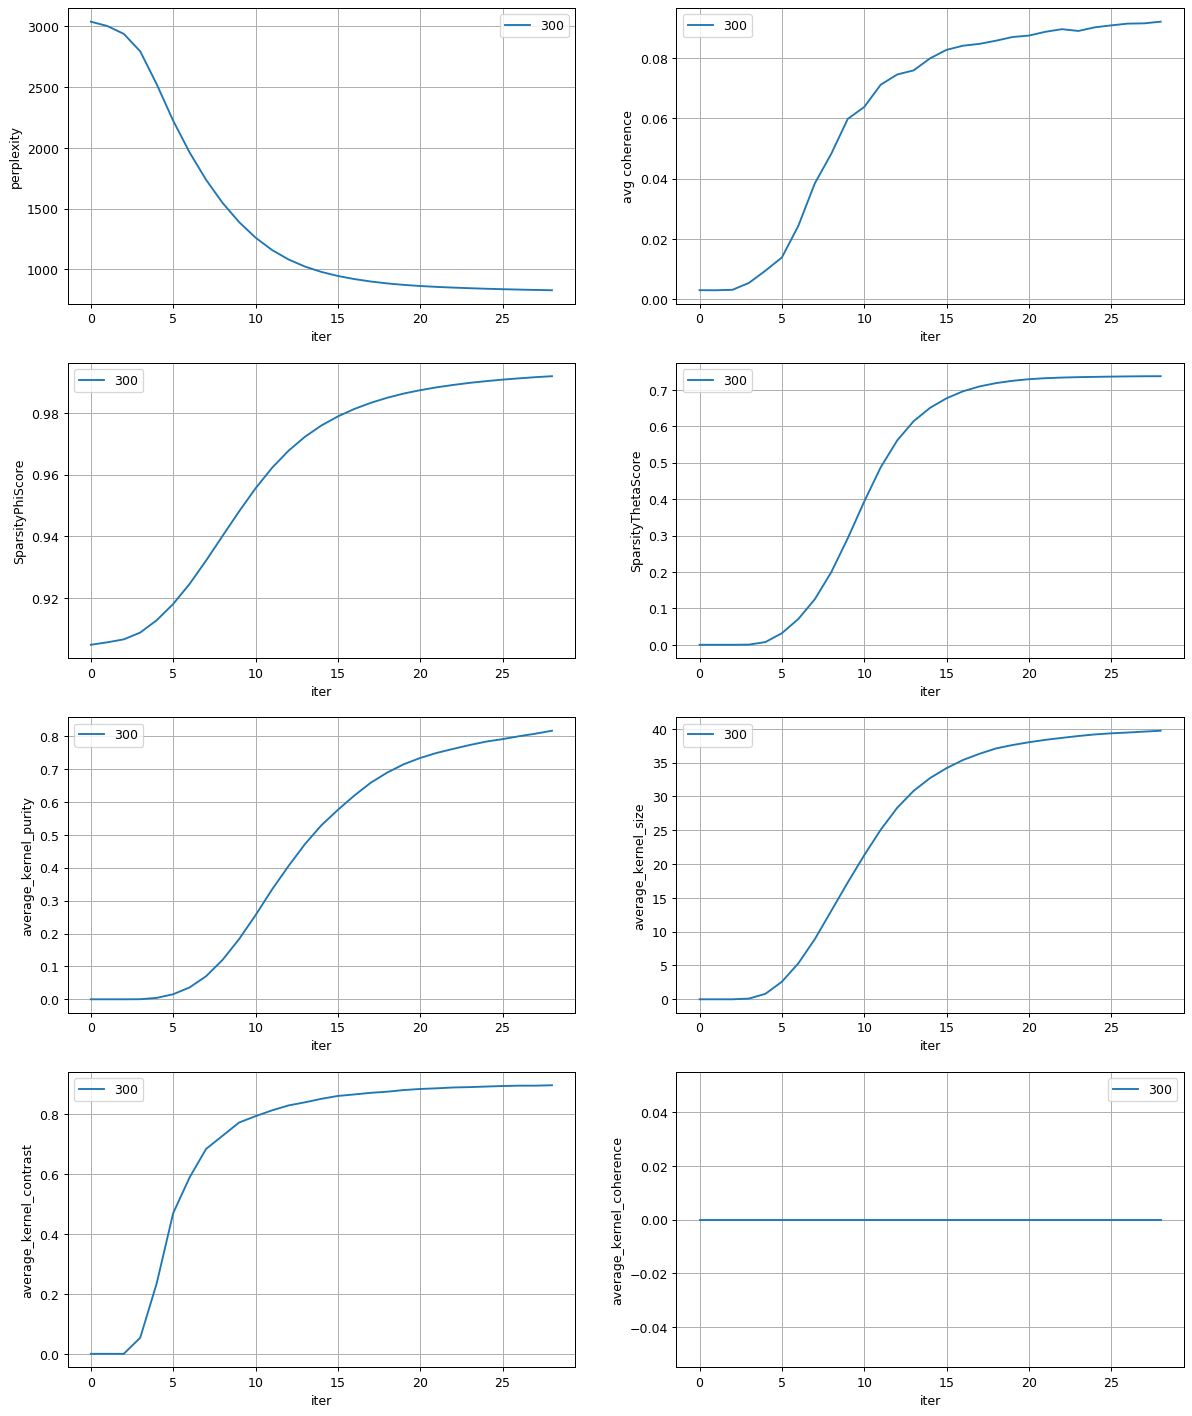

In [75]:
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('perplexity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 2)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('avg coherence')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 3)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityPhiScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityThetaScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 5)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_purity)-1), s['TopicKernelScore'].average_purity[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_purity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 6)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_size)-1), s['TopicKernelScore'].average_size[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_size')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 7)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_contrast)-1), s['TopicKernelScore'].average_contrast[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_contrast')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 8)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_coherence)-1), s['TopicKernelScore'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_coherence')
    ax.set_xlabel('iter')

In [111]:
%%time
background = [f'topic_{i}' for i in range(100)]
subject = [f'topic_{i}' for i in range(100, 500)]
reg = [
    artm.SmoothSparsePhiRegularizer(name='SmoothPhi', tau=0.5, topic_names=background),
#     artm.SmoothSparsePhiRegularizer(name='Sparse', tau= -0.5, topic_names=subject),
    artm.SmoothSparseThetaRegularizer(name='SmoothTheta', tau=0.5, topic_names=background),
#     artm.SmoothSparseThetaRegularizer(name='Smooth', tau=-0.1, topic_names=subject),
]
scor = [
    artm.PerplexityScore(name='PerplexityScore'),
    artm.SparsityPhiScore(name='SparsityPhiScore', eps=0.0001),
    artm.SparsityThetaScore(name='SparsityThetaScore', eps=0.0001),
    artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.5),
    artm.TopTokensScore(name='TopTokensScore10', num_tokens=10, dictionary=cooc_dict),
    artm.TopicKernelScore(name='TopTokensScoreKernel',dictionary=cooc_dict)
]
model = artm.ARTM(num_topics=500,
                  dictionary=dictionary,
                  regularizers=reg,
                  scores=scor,
                  num_document_passes=5)
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

CPU times: user 3h 47min 55s, sys: 6min 54s, total: 3h 54min 49s
Wall time: 35min 8s


Text(0.5, 0, 'iter')

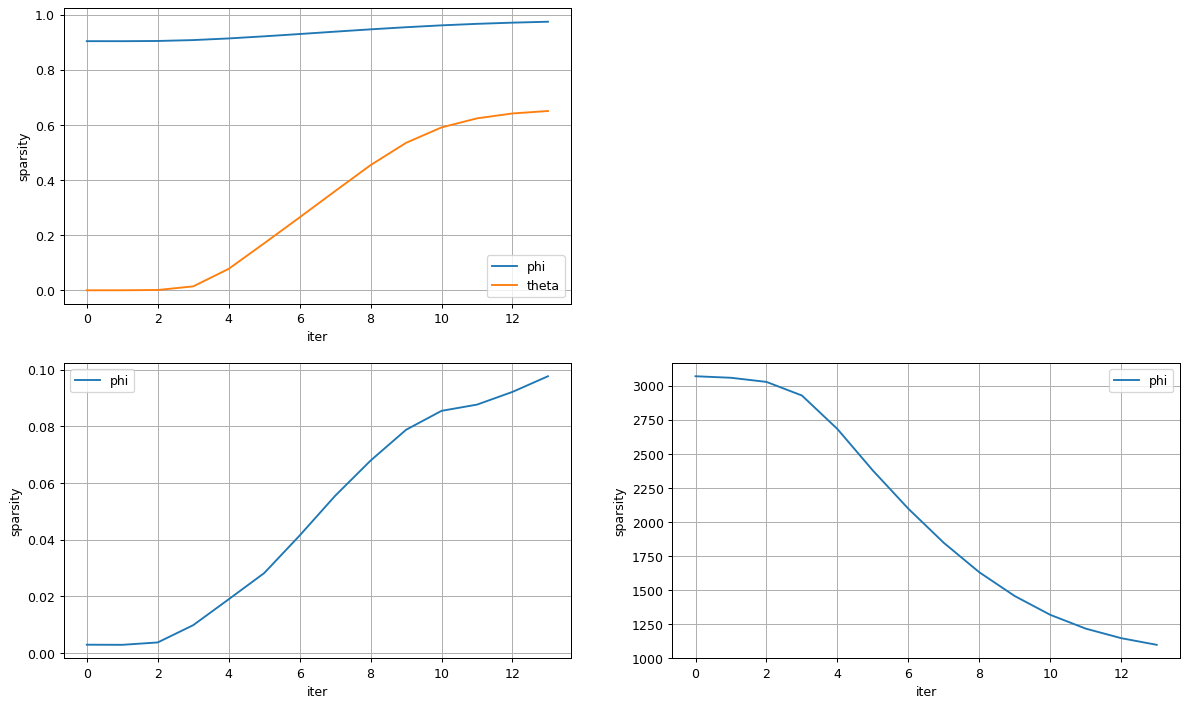

In [112]:
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')
    
ax = fig.add_subplot(4, 2, 3)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

In [118]:
for topic, words in models.score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models.score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

AttributeError: 'list' object has no attribute 'score_tracker'

CPU times: user 2h 25min 19s, sys: 3min 18s, total: 2h 28min 37s
Wall time: 21min 38s


Text(0.5, 0, 'iter')

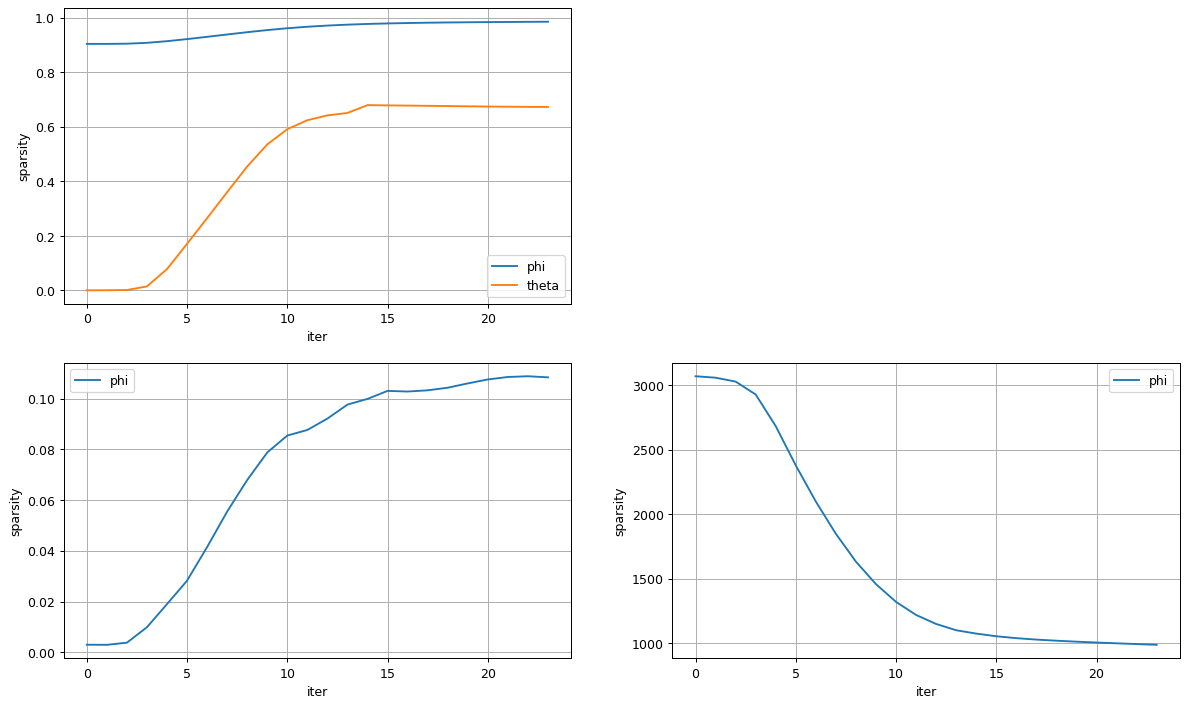

In [114]:
%%time
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.1, topic_names=subject))
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1, topic_names=subject))
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')
    
ax = fig.add_subplot(4, 2, 3)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

In [115]:
for topic, words in models[0].score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models[0].score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

topic_0: сапог свинья котелок бугор дубина дробь батя сухарь обрез малец

topic_1: лето середина весна август март май начало сентябрь дата число

topic_2: лень рецепт диета дополнение мамуля глагол шеф-повар скобка спагетти фальшь

topic_3: мозги хрен рожа зад че башка сука бес пинок кабак

topic_4: америка европа поэт германия вена творчество поэзия нация стихотворение деятель

topic_5: вал самец самка лось лавина особь потомство компас грот берлога

topic_6: нрав дворянин склонность порок простота добродетель нищета честность наружность строгость

topic_7: дистанция гонка нагрузка старт расклад будни бега гимнастика совместительство кило

topic_8: баня базар хозяйство медаль значок ленинград папироса трактор земляк колхоз

topic_9: шашлык нива баранка негритянка фура толчея аврора проселок пижон прицеп

topic_10: экспедиция путешествие побережье африка градус континент климат снаряжение материк сибирь

topic_11: око дума грамота венец царевич царевна держава краса диво темница

topic_12: противоположность воровство порча толика эпитет словцо ехидство ценитель пройдоха быдло

topic_13: наука институт коллега специалист кандидат академик коллектив специальность психология конференция

topic_14: ягода кабан богатырь метла клин малина сучок дозор зверье ходок

topic_15: килограмм тачка тонна свалка топливо конвой клапан емкость днище мель

topic_16: шахта недра пласт шахтер карьер обвал бестия штырь жесть перекрытие

topic_17: процесс метод культура статус этап процедура технология функция интеллект эра

topic_18: изобретение приспособление изобретатель новинка поставщик конкуренция пропорция примесь дефект компонент

topic_19: хор бас грим старикан хам яр куплет плешь грибок шанель

topic_20: фейерверк жилетка салют фужер расцветка начинка прима ярлык обслуга изыск

topic_21: сан японец переводчик китай япония самурай иероглиф лапша циновка токио

topic_22: братец батюшка барышня колокол петербург поп барин сударь икона поручик

topic_23: рубаха изба телега казак скотина верста леший обоз егерь оконце

topic_24: смотритель линкольн индус жаргон телеграф мошенничество франт геркулес прохвост консульство

topic_25: партия население собрание режим лидер администрация протест фонд политик выборы

topic_26: жидкость пузырек раствор фильтр паста этикетка розетка рулон склянка одеколон

topic_27: рубль ведро рыбка рак копейка шапочка икра аквариум бутыль шланг

topic_28: власть столица правление резиденция основатель санкт-петербург сословие выходец оратор сенат

topic_29: кличка троица пьяница инвалид мах бедолага алкоголик барахло штраф подворотня

topic_30: супермаркет унитаз наркоман слесарь панк раскладушка мудак подсобка мурка маршрутка

topic_31: гимн латынь уроженец девиз предместье фреска гравюра полвека баллада хождение

topic_32: подполковник боевик барак рация ранение ветеран партизан караул вышка спецназ

topic_33: завод рабочий производство электричество цех станок таблица изготовление комп вентилятор

topic_34: задница колючка байка ежик дурь кактус железка пяток штабель жратва

topic_35: пиво кружка дерьмо крепыш храп завсегдатай моча вест пойло бубен

topic_36: зритель артист выступление концерт шоу певец конкурс исполнитель аплодисменты кинотеатр

topic_37: куратор адепт издевательство концентрация распад распорядитель медитация исцеление эликсир шарлатан

topic_38: здоровяк бородач атаман детина плотина крот клещ отрава деревяшка гадюка

topic_39: зерно почва семя урожай пшеница люд шкурка свора борозда росток

topic_40: бригада звено устав учет перевозка эвакуация съезд диверсант планшет баррикада

topic_41: москва гражданин еврей справка москвич депутат израиль санаторий пионер национальность

topic_42: птичка попугай лягушка комар звездочка хвостик крылышко тельце перышко дырочка

topic_43: операция лаборатория орган анализ давление хирург укол доза медик печень

topic_44: ставка приз казино азарт выигрыш евро видео тусовка фишка ока

topic_45: пацан авторитет периметр разборка группировка контролер братва браток восхождение вагончик

topic_46: провинция хан грек аллах султан араб испанец турок азия турция

topic_47: журнал статья текст копия строка автор рукопись строчка экземпляр обложка

topic_48: баран парад шах гарем огрызок ватага миниатюра стратег авангард черепок

topic_49: техас мексика диалект весельчак куба опиум кал динамит мосье карманник

topic_50: девятка ориентация гаишник пробежка газель работяга планка восьмерка заправка садист

topic_51: родина союз адмирал председатель республика фронт сша ссср польша коммунист

topic_52: комплекс наличие архив категория цилиндр запрос характеристика комплект хранение ведомство

topic_53: прах бедность бездельник обыватель весы напасть удел говор домочадец тезка

topic_54: грех господь крест молитва библия господи христианин благословение проповедь сатана

topic_55: персонаж сюжет изделие виза энциклопедия армянин бум пасха глобус ностальгия

topic_56: железо порода металл медь рудник толща руда смерч серп кедр

topic_57: шапка дрова село речка печка тайга гусь солома ребятишки пазуха

topic_58: модель макияж проба милочка бюст парикмахер колготки дизайнер парикмахерская композиция

topic_59: умник дурачок пакость кузнечик дурень норка настойка отродье зверюга натуга

topic_60: прибор механизм управление отсек панель оборудование система конструкция пульт скафандр

topic_61: боец танк пушка рота снаряд орудие пулемет взвод батальон батарея

topic_62: палка горка лыжа утка травка сало капкан орешек кроха снежок

topic_63: банка гитара пирожок трубочка половинка сковородка котлета баночка ларек консервы

topic_64: град плеть пах верзила тракт болт клеймо полсотни старший подручный

topic_65: забава ярмарка рожок каштан свинина лентяй акробат балбес увалень нега

topic_66: коллекция кролик порошок капуста коллекционер гипноз удав амур антиквариат щепотка

topic_67: муха мяч бочка сетка трибуна пчела бригадир тополь навоз свисток

topic_68: кусок хлеб масло сахар сыр каша мед миска жир сорт

topic_69: бакс мат шахматы чемпион бокс нары боксер валюта таможня ринг

topic_70: гриб гвоздь молоток муравей жук усик грядка лом еж травинка

topic_71: отдел зарплата пенсия кризис стройка борец увольнение регистрация сокращение заявка

topic_72: цыган цыганка лоток гам теплоход бульдог табор хомяк пивная кибитка

topic_73: баба девка огород козел хата теща ребеночек малолетка телок холера

topic_74: сцена театр представление публика спектакль акт пьеса занавес ложа репетиция

topic_75: анекдот зануда вранье благодетель иня икс резон идиотизм конспирация прищур

topic_76: зоопарк банан медуза горилла скорлупа слизь картон витамин кекс неволя

topic_77: инструмент музыкант нота пение оркестр струна слушатель скрипка футляр рояль

topic_78: арена червяк лох сопляк штамп клешня лотос зек кормушка амфитеатр

topic_79: археолог древность тысячелетие миф цикл раскопка греция куб гей зевс

topic_80: знаток кодекс дискуссия поговорка подделка употребление разбор секта очевидец пословица

topic_81: доход расход жалование получение кредит взятка денежки приобретение консультант бюджет

topic_82: стих табак песенка погреб плотник кеш павлин репа стишок управа

topic_83: пьянство профсоюз лавр круиз труженик неаполь попрошайка захолустье зеландия стимул

topic_84: дурак блоха паразит клоп печенка мушкетер беготня запорожец старье помои

topic_85: начальство чиновник побег губернатор канцелярия извозчик превосходительство надзиратель голландец надзор

topic_86: блин дрянь зараза жуть кретин пузо фиг сопли рукавица лупа

topic_87: фига наушники кайф олигарх ролик наушник фигня громкость кокаин дешевка

topic_88: газета журналист материал реклама редактор пресса редакция интервью репортер телевидение

topic_89: экзамен тройка диплом общежитие премия сдача классика муза юбилей сессия

topic_90: рыба рыбак крючок удочка водоросль суша рыбалка краб баржа ракушка

topic_91: лекция практика перевод факультет аудитория кафедра формула химия фрагмент диалог

topic_92: идея проект теория образец достижение строительство элемент структура объем корпорация

topic_93: тяга дебри пилюля гамак понт выдра пьедестал буйство экзотика ртуть

topic_94: свобода борьба влияние развитие благо основа насилие убеждение освобождение идеал

topic_95: традиция религия откровение варяг горох фанатик возрождение патриарх последователь будда

topic_96: народ россия революция русский историк кремль бунт отечество гоголь большевик

topic_97: мужик курица картошка колбаса петух воробей кастрюля огурец варение мужичок

topic_98: яйцо сок соль слон фрукт овощ соус косточка тесто помидор

topic_99: офицер полк штаб чин мундир училище фуражка ранг командующий шинель

topic_100: книга роман герой страница писатель литература читатель чтение автор дневник

topic_101: солдат враг рана строй раненый сопротивление поражение плен сабля легион

topic_102: положение мнение шанс повод мера неприятность отсутствие причина случай репутация

topic_103: смерть ненависть дьявол презрение сеньор месть обещание мерзавец жестокость слово

topic_104: вор склад боб старина сигара док юпитер дружище чан штаб-квартира

topic_105: роль госпожа вдова актер актриса режиссер эпизод монолог успех пьеса

topic_106: водка пачка сволочь дружок гад паренек гадость выпивка окурок псих

topic_107: миллион ученый условие талант процент открытие требование гений учение тысяча

topic_108: житель создание предок легенда испытание владение нить убежище время паук

topic_109: сад молоко прогулка бабочка печение мел цыпленок колечко день яблоня

topic_110: чай цветок чайник букет кавалер мельница цветочек аромат мельник чаек

topic_111: тело маска дрожь мышца вечность пытка рассудок судорога глаз лицо

topic_112: мальчишка песня сказка палочка ворона цирк ладошка ворон кнут поросенок

topic_113: стекло сидение асфальт гараж осколок мотор перекресток рычаг тормоз газон

topic_114: князь поход боярин княгиня воевода русь киев дружина гонец орда

topic_115: могила плита кладбище гроб похороны скорбь венок место склеп умерший

topic_116: история рассказ фамилия подробность название десятилетие время начало посылка повествование

topic_117: удар противник люк взрыв атака позиция сторона ракета схватка маневр

topic_118: класс урок перемена учительница учебник тетрадь парта одноклассник школьник пятерка

topic_119: магазин товар рынок покупка продажа витрина покупатель продавец прилавок проспект

topic_120: внимание фигура настроение парочка сторона походка легкость рука труд время

topic_121: пол решетка ублюдок прут угол тряпка голова глаз матрац бард

topic_122: берег река лодка озеро вода течение залив чайка плот весло

topic_123: игра правило удача игрок ход конец мирок арт время покер

topic_124: компания фирма сотрудник бизнес работник бизнесмен акция профессионал бюро командировка

topic_125: бар стойка заведение мороженое коктейль алкоголь бармен табурет спиртное дворник

topic_126: душа ангел ад рай хранитель предсказание воля обличие судьба мысль

topic_127: инспектор галстук жилет рукопожатие парковка воротничок сохранность виски ребус банкнота

topic_128: жизнь природа время судьба поколение зло смысл период стремление потребность

topic_129: род честь победа подвиг награда победитель клятва соперник шпага юнец

topic_130: вода дно капля молния корзина гром колодец фонтан фонарик кувшин

topic_131: фотография снимок рамка пленка альбом фотограф фото фотоаппарат объектив кадр

topic_132: город поездка район платформа окраина место центр день рабочий часть

topic_133: шаг движение кость рука поза лицо фигурка миг жест глаз

topic_134: программа техника подготовка участник тренировка спорт физика тренер упражнение навык

topic_135: девушка глаз мысль лиф сторона лицо ответ пара спасибо вид

topic_136: юбка танец лилия тара танцовщица вальс льюис янки изабелла танцор

topic_137: окно коридор потолок лампа подоконник штора угол комнатка скважина сквозняк

topic_138: ребенок родитель бабушка няня детство беременность взрослый отчим время день

topic_139: мужчина секс любовник девственница время джи момент большинство оргазм гормон

topic_140: полка жилище стопка чистота беспорядок плитка шкафчик удобство уборка место

topic_141: жена муж супруг свекровь время кормилица день сынишка женушка жизнь

topic_142: холм костер лагерь поселок склон ручей поляна дорога бревно сторона

topic_143: машина дорога водитель дверца руль скорость шоссе фургон поворот место

topic_144: отец время рука глаз день пора сквайр конец гордость лицо

topic_145: кухня игрушка кукла тина шоколад лак коврик табуретка карла кубик

topic_146: роза богатство украшение поместье аллея драгоценность усадьба лепесток садовник наследница

topic_147: ночь рассвет дорога осень время путь день глушь пристанище путешествие

topic_148: голова ум реакция рука мысль вздох глаз бета лицо разряд

topic_149: лист буква библиотека пожар знак мертвый надпись переплет чудак день

topic_150: лошадь повозка конюшня путешественник кора олень дорога езда конюх загон

topic_151: шеф чемодан секретарша багаж блондин чемоданчик попутчик швейцар носильщик тамбур

topic_152: подруга свидание подружка дура развод мамаша умница дурочка брюнет приятельница

topic_153: капитан матрос моряк китаец плавание боцман вахта ром парус шлюпка

topic_154: молчание пауза собеседник просьба раздражение ответ намек замечание беседа возмущение

topic_155: рождение ванная ванна день приют губка детишки бутылочка гель денек

topic_156: обед ужин завтрак столовая блюдо апартамент трапеза мелисса портье приготовление

topic_157: дочь невеста дочка жених приданое рабыня роды вдовец матрона голубка

topic_158: одежда рубашка рукав брюки штаны ноготь носок пуговица пояс блузка

topic_159: семья родственник семейство зять время благополучие родство тесть родич хозяйство

topic_160: голос улыбка лицо глаз акцент рука нотка скула вид уголок

topic_161: мастер вера наставник мудрость умение мастерство ремесло мудрец творец вражда

topic_162: посетитель визит помощник табличка человечек время вид служащий управляющий посещение

topic_163: искусство художник картинка рисунок изображение мастерская галерея пейзаж произведение творение

topic_164: вещь характер совесть недостаток пустяк конец папаша исчезновение упрек претензия

topic_165: страх чувство ощущение мысль отчаяние кошмар пустота истерика время конец

topic_166: обида несчастие отъезд ссора грусть родные ревность неприязнь унижение равнодушие

topic_167: император франция правитель верность заговор престол императрица свита подданный преданность

topic_168: драка разбойник стража негодяй бродяга телохранитель банда грабитель поединок трус

topic_169: дружба дон дева симпатия флора привязанность предпочтение гранд романтик пора

topic_170: желание выражение слово согласие ложь смущение сочувствие обращение ирония право

topic_171: господин монета торговец купец торговля нищий налог монетка богач бедняк

topic_172: скала лед пещера пена гигант скелет ущелие дикарь валун утес

topic_173: море волна облако океан пляж буря пар брызги прибой время

topic_174: гость подарок наследство завещание кухарка угощение повариха экономка приезд пудинг

topic_175: мебель стиль чердак обои нянька булочка интерьер паркет безделушка чехол

topic_176: церковь священник приход скамья собор алтарь епископ кардинал святой часовня

topic_177: проблема счет услуга заказ партнер агентство пара интернет психолог время

topic_178: кровать постель спальня гостиная одеяло покрывало раковина матрас пижама порядок

topic_179: дверь лестница порог туалет ступенька проем конец рука голос цыпочки

topic_180: член представитель президент область пост секретарь должность инженер комиссия комитет

topic_181: лапа морда прыжок шерсть стая щенок лев котенок ухо нос

topic_182: герцог светлость герцогиня счастливчик реверанс регент паоло мальборо бон камеристка

topic_183: бог слава царь царство община покровитель осел божество хвала воля

topic_184: память краска тоска воображение обитатель мука день печаль воспоминание суета

topic_185: дама слуга мадам перчатка горничная прислуга лакей дворецкий особа веер

topic_186: война немец американец предатель время пленный военный заложник фашист бойня

topic_187: точка зрение реальность вспышка эффект иллюзия бездна оболочка щупальце врата

topic_188: оружие пистолет пуля выстрел бандит ствол патрон винтовка напарник стрельба

topic_189: птица шар медведь ветка змея змей верхушка обрыв вездеход стрекоза

topic_190: мама папа мамочка папочка родитель день глава нос детство взрослый

topic_191: воздух поверхность расстояние высота миля глубина вес фут форма размер

topic_192: стол еда тарелка майка аппетит вилка салат скатерть вид время

topic_193: дух жертва туман приступ паника пропасть потрясение смятение голова галлюцинация

topic_194: маркиз бал сезон титул кузина имение приличие пари шотландия графство

topic_195: дедушка ножка макушка солнышко нитка коленка елка шуба иголка ножницы

topic_196: миссис пирог внучка бабуля пансион невестка гордон экономка хаус жасмин

topic_197: сын сынок прадед время пора детство день возвращение стопа весть

topic_198: служба начальник безопасность охрана управление состав руководство руководитель заместитель помощник

topic_199: ладонь подушка рука голова глаз бок простыня занавеска перила коробочка

topic_200: возраст удовольствие мечта достоинство внешность манера время джин конец недоверие

topic_201: зона одиночка маршрут проводник ток темп квадрат барьер мутант пони

topic_202: кровь вампир ведьма кол жила клык плоть упырь кай глаз

topic_203: лифт кнопка полотенце лампочка футболка душ кран кабина кушетка кабинка

topic_204: группа информация связь задача задание пункт цифра норма выполнение время

topic_205: секунда мгновение горло рука призрак глаз челюсть запястье момент ребро

topic_206: боль запах труп рука покойник кисть повязка царапина зуб хруст

topic_207: пыль труба колесо дорожка дорога ступенька сторона ограда бег окошко

topic_208: слеза глаз прощение жалость гостья обморок бедняжка рука лихорадка голова

topic_209: отношение предложение конец причина отказ признание образ соглашение интерес обязательство

topic_210: хозяин гостиница владелец рис шкатулка постоялец ювелир вид место угол

topic_211: сэр англия англичанин фунт мэр любезность парламент прайс стерлинг время

topic_212: товарищ командир старшина госпиталь казарма рапорт доброволец сослуживец часть китель

topic_213: этаж марка блокнот машинка плакат справочник универмаг радиоприемник стремянка кроссворд

topic_214: клан грань сфера чужак миссия предупреждение кристалл разрушение пластина часть

topic_215: башня гном орден магистр корона перстень мантия королевство башенка цитадель

topic_216: милиция происшествие дежурный милиционер портфель мент примета протокол удостоверение опера

topic_217: губа кожа шея лицо глаз рука шрам ухо голова спина

topic_218: век общество сущность действительность эпоха рим столетие трагедия италия время

topic_219: бутылка стакан клуб висок блондинка стаканчик дань черт похмелье горлышко

topic_220: девочка малышка кэт личико голосок малютка девчушка чадо глаз воспитательница

topic_221: кресло спинка ремень глаз бред голова дуга тошнота корка татуировка

topic_222: шляпа экипаж карета дорога кучер зала бархат накидка четверка сюртук

topic_223: страна граница территория агент государство организация разведка советник колония посольство

topic_224: мак констебль шотландец викарий джорджия южанин поимка норманн курд глазго

topic_225: дыхание поцелуй объятие жар прикосновение наслаждение глаз близость возбуждение аромат

topic_226: незнакомец любопытство спутник толстяк спаситель обладатель лицо сторона глаз наглец

topic_227: леди лорд милорд кузен виконт миледи опекун этикет бриджи беркли

topic_228: остров золото сокровище серебро находка страж медальон вещица мумия жезл

topic_229: парк штат нью-йорк келли авеню калифорния вашингтон лос-анджелес недвижимость бич

topic_230: документ министр правительство политика заключение доклад свидетельство министерство заседание арест

topic_231: случай событие способ обстоятельство степень время интерес мысль намерение особенность

topic_232: юноша пустыня лик верблюд алмаз джинн шейх оазис горб родник

topic_233: здание рост вход центр место дюйм вестибюль глубь сторона часть

topic_234: автобус ботинок остановка рюкзак лужа спичка голубь подошва будка шнурок

topic_235: зуб злость физиономия отвращение усмешка лицо оскорбление ухмылка смешок шлюха

topic_236: комната стул камин угол люстра лицо глаз портьера софа графин

topic_237: утро день половина время место мелочь турист прощание полчаса местечко

topic_238: год пора время конец течение месяц детство воспоминание день молодость

topic_239: профессор карандаш шпион дырка мясник вскрытие микроскоп шифр коллега географ

topic_240: кусочек посуда ложка крошка мыло конфета торт ранчо детка корзинка

topic_241: красота красавица страсть восторг восхищение дитя чувство нежность прелесть совершенство

topic_242: больница халат отделение соседка тумбочка дежурство санитар носилки обход отчество

topic_243: ворота стражник государь чаша факел поклон посол владыка царица старец

topic_244: ужас крик нож вопль воздух равновесие рука пот рывок толчок

topic_245: маг магия дар заклинание проклятие фея чародей чары амулет мешочек

topic_246: сила путь поток круг усталость видение жажда мысль время стихия

topic_247: веревка цепь столб сарай щель узел петля пруд великан треск

topic_248: учитель занятие ученик кружок воспитание ученица дисциплина аптека география директриса

topic_249: мистер тетушка корт какао вид бердо спасибо случай место конец

topic_250: дядя племянник дядюшка мор племянница креол девон овсянка лестер время

topic_251: крыло дракон демон коготь пасть монстр шут шип талисман голова

topic_252: нога колено грязь спина рука голова лицо глаз топот корточки

topic_253: язык тайна фон происхождение слово собственность иностранец секрет утверждение различие

topic_254: направление линия полоса стрелка сторона видимость очертание провал пузырь пелена

topic_255: мисс лондон джентльмен гувернантка шиллинг дилижанс путешествие гинея камердинер поездка

topic_256: вопрос возможность ответ решение время причина последствие ответственность момент доказательство

topic_257: волк тварь чудовище вой волшебник оборотень эль кузнец трактир молот

topic_258: ткань лента узор мех колокольчик материя чулок башмак шляпка шарф

topic_259: животное мясо голод время день вид конец повадка носорог браконьер

topic_260: волос глаз цвет лицо ресница прядь оттенок коса нос красотка

topic_261: ключ стоянка отпечаток связка бензин сигнализация светофор шестерка зажигание место

topic_262: небо ветер дождь туча порыв погода уголь воздух лопата влага

topic_263: взгляд глаз бровь лицо жест вид рука брюнетка мысль морщинка

topic_264: мальчик малыш взрослый глаз мальчуган рука голова время голос день

topic_265: полковник лейтенант майор сержант капрал форма старлей нашивка рядовой лицо

topic_266: письмо адрес почта содержание открытка пожелание день переписка ответ время

topic_267: луна мертвец орел червь таверна клюв пик мул рой песнь

topic_268: любовь чувство страдание воспоминание жизнь юность детство софия романтика утешение

topic_269: одиночество натура любовница чувство женщина комплимент увлечение переживание греза каприз

topic_270: полиция полицейский участок холл стрит коттедж рута пригород роуд паб

topic_271: лавка сено переулок прохожий горожанин улочка франк лавочка домишко лавочник

topic_272: толпа ус дюжина бедняга ярд гул ряд кучка лицо зрелище

topic_273: камень песок слой гнездо обломок купол трещина груда глина гребень

topic_274: мир запрет конец феникс судьба время странствие нейл наследие место

topic_275: диван поднос порция буфет щетка столешница подушечка глаз нос вид

topic_276: брат монах монастырь обитель венеция монахиня настоятель келья братишка обет

topic_277: свет темнота фонарь сумерки глаз лицо дворик полумрак силуэт фасад

topic_278: меч воин раб оружие щит кинжал шлем копье клинок лезвие

topic_279: экран очки запись аппарат радио передача таблетка монитор эфир ноутбук

topic_280: империя флот раса разведчик мощь наемник наблюдатель союзник портал форт

topic_281: карта марш орех барабан лепешка конек колода кипяток бек масть

topic_282: суд адвокат судья наказание право справедливость исполнение обвинение приговор казнь

topic_283: имя знакомый портрет слово сходство прозвище лицо пора слог время

topic_284: подвал крыса яблоко скамейка шарик привидение пух клад пастор овчарка

topic_285: курс университет образование карьера окончание колледж учеба каникулы обучение студентка

topic_286: конь всадник седло тропа копыто дорога степь путник жеребец шатер

topic_287: бумага записка конверт печать подпись послание почерк клочок ион чернила

topic_288: колдун обезьяна повелитель ритуал орк шаман обряд колдовство свиток предводитель

topic_289: правда тон шутка вид юмор минутка интонация слово извинение чепуха

topic_290: питер отдых бассейн пальма купальник вика купание шезлонг донна бортик

topic_291: бой отряд стрела крепость битва лук сражение сотня арбалет лучник

topic_292: улица пальто такси квартал тротуар угол зонтик сторона зонт конец

topic_293: карман сумка спасибо платок свитер рука содержимое голова пара лоб

topic_294: хвост кот кошка мышь заяц ива лапка лиса ухо крокодил

topic_295: слово речь вид лицо подозрение спокойствие время сторона недоумение негр

topic_296: камера затылок череп стенка койка голова урод спина конечность шишка

topic_297: тема париж профессия разрыв героиня пристрастие знаменитость миллионер амбиция шарм

topic_298: старик дед внук старичок медвежонок гвоздик старикашка дедуля правнук глаз

topic_299: дело долг порядок конец рука время голова помощь ерунда беда

topic_300: двор мешок печь очаг котел навес ставня угол полено кладовая

topic_301: огонь пламень свеча огонек искра плоть браслет сияние отблеск блик

topic_302: девчонка пакет бабка дача велосипед касса дядька маринка пицца троллейбус

topic_303: тишина помещение лицо стук взор ступень шепот голос складка кивок

topic_304: вечер день знакомство приглашение скандал сюрприз красавец поклонник мероприятие приятель

topic_305: система уровень сеть база объект данные канал ноль наблюдение исследование

topic_306: глаз сторона лицо удивление черта ярость черт гримаса веселие момент

topic_307: зверь добыча рог бык пан тур логово сук шакал ворчание

topic_308: сердце грудь глаз щека лицо рука решимость локон боже лоб

topic_309: собака пес забор калитка сторож коза собачка лай поводок ухо

topic_310: корабль борт судно палуба каюта порт катер пароход яхта парус

topic_311: закон сознание робот организм катастрофа вред хаос создатель стадия предназначение

topic_312: плечо рука подбородок глаз лицо талия спина голова ухо нос

topic_313: результат действие часть запас место длина минимум вариант отверстие размер

topic_314: мать матушка день детство фриц время поминки покойница дот жизнь

topic_315: команда компьютер груз пират новичок контейнер клавиша капсула очко клавиатура

topic_316: платье шелк незнакомка подол кайло цвет шпилька туфелька вырез разрез

topic_317: женщина подросток лицо шок шериф рука время глаз конец атлет

topic_318: автомобиль автомат грузовик джип дорога транспорт обочина трасса кузов выезд

topic_319: гора север вершина юг восток запад палатка путь местность равнина

topic_320: солнце луч горизонт жара погода воздух ветерок зелень терраса веранда

topic_321: стена крыша дыра место сторона мусор поворот кирпич строение постройка

topic_322: предмет перо крышка рама роскошь мрамор беседка белизна подставка сукно

topic_323: туфля наряд каблук особняк прическа па ожерелие носик великолепие пенни

topic_324: часы ящик контора сыщик бутерброд бланк яичница ветчина кипа пансионат

topic_325: дым сигарета куртка пробка пепел зажигалка пепельница киоск струйка урна

topic_326: королева супруга графиня испания интрига соперница фрейлина меланхолия мадрид притязание

topic_327: король принц дворец принцесса величество трон королевство высочество придворный монарх

topic_328: картина телевизор холодильник выставка форточка домработница художница мойка загс телик

topic_329: самолет полет пилот аэропорт бомба посадка летчик рейс двигатель бинокль

topic_330: зал костюм фокус ряд присутствующий клоун место фокусник возвышение рука

topic_331: ситуация факт список цена сведение сделка переговоры случай предприятие версия

topic_332: поле трава корова яма ферма стадо луг овца скот пастух

topic_333: сообщение папка деятельность отчет академия договор контракт инструкция доступ департамент

topic_334: джинсы салон сумочка кошелек маньяк бумажник сквер таксист кроссовок стрижка

topic_335: тип черт нерв идиот вид авария место столкновение интуиция максимум

topic_336: долина племя вождь индеец обычай хижина селение рок старейшина шарп

topic_337: мозг энергия масса источник переход тоннель эксперимент схема вещество частица

topic_338: поезд станция вагон билет пассажир вокзал метро купе путь трамвай

topic_339: брак свадьба церемония торжество замужество женитьба мачеха помолвка узы поздравление

topic_340: гнев милость наследник богиня уста воля ложе смертный египет фараон

topic_341: существо пища плод осторожность желудок вид ноша время калека туловище

topic_342: сосед студент балкон жилье преподаватель садик уборщица кладовка пенсионер дискотека

topic_343: надежда опасность тревога беспокойство гибель риск предчувствие мысль исход мина

topic_344: будущее прошлое опыт время способность разум мысль состояние изменение явление

topic_345: старуха старушка горшок тролль груша чучело сорока сирень кофта слива

topic_346: фильм музей кино вилла студия съемка сценарий сити сериал время

topic_347: работа вечеринка время менеджер день место помощница график конец коллега

topic_348: цель ошибка знание существование сомнение польза поступок образ истина спор

topic_349: мост француз флаг набережная опора гавань порох викинг бочонок парапет

topic_350: номер клиент офис босс заказчик дамочка начальница консультация персонал коллега

topic_351: выход охранник сигнал проход код сирена микрофон комбинезон освещение место

topic_352: площадь храм колонна жрец статуя символ памятник свод пирамида ниша

topic_353: минута час время мысль день пластинка полчаса место волнение передняя

topic_354: клетка яд игла брюхо дельфин акула укус выживание приманка разновидность

topic_355: телефон трубка звонок привет карточка голос мобильник провод гудок конец

topic_356: друг время дружка мысль вид приятель сторона человек страшило помощь

topic_357: рука ручка кольцо глаз крыльцо палец мышка сторона сверток глазок

topic_358: человек сторона большинство сотня случай очередь десяток пора вид рука

topic_359: разговор праздник день время беседа рождество индия родня слово приезжий

topic_360: ребята коробка книжка пиджак бумажка тележка молодец парнишка упаковка пакетик

topic_361: квартира подъезд прихожая ремонт жилец участковый квартирка пролет район шлепанец

topic_362: девица белье обувь трусы духи гардероб помада косметика вешалка крем

topic_363: глупость продукт полгода старость суп повар неправда питание синева день

topic_364: убийство убийца преступление свидетель следователь преступник расследование следствие эксперт показание

topic_365: доктор врач болезнь больной палата лекарство пациент медсестра клиника лечение

topic_366: сон тень веко мрак глаз шелест сновидение силуэт небытие лицо

topic_367: тюрьма комиссар доверие звание допрос курсант убитый жандарм умысел фора

topic_368: сестра сирота сестренка племянница сестрица сестричка любимица сиротка пора глаз

topic_369: банк детектив паспорт наркотик сейф мерседес волга розыск ограбление киллер

topic_370: барон слабость благодарность время бегство терпение хитрость искушение старание чума

topic_371: неделя день месяц отель домик городок отпуск пара конец переезд

topic_372: дом время день мансарда конец пристройка часть хозяйство соседство вид

topic_373: день полдень среда воскресение пятница понедельник фабрика перерыв телеграмма четверг

topic_374: кофе чашка листок объявление чашечка сливки спасибо кофейник кофейня кофеварка

topic_375: след охотник охота шкура ружье тигр револьвер хищник джунгли дичь

topic_376: встреча новость время день момент суббота выходной полночь чушь энтузиазм

topic_377: вино бокал глоток напиток шампанское вкус тост залп рука линн

topic_378: палец рот рука кулак живот спина бедро кончик зуб бок

topic_379: зеркало шкаф ковер отражение ваза кара комод дверца уборная бессонница

topic_380: планета звезда километр атмосфера космос орбита тысяча миллиард звездолет вулкан

topic_381: замок рыцарь сундук кубок герб пир ров рейн пергамент турнир

topic_382: парень фраза приятель пара придурок момент глаз слово смысл место

topic_383: деревня снег зима холод дорога крестьянин мороз тропинка топор староста

topic_384: столик ресторан кафе официант коньяк рюмка салфетка официантка месье меню

topic_385: плащ тьма эльф эхо шорох капюшон часовой створка подземелье сумрак

topic_386: школа директор доска отметка ленточка воспитатель день старшеклассник любимчик время

topic_387: кабинет срок заявление обстановка приемная прием курьер день распорядок люкс

topic_388: земля чудо добро борода спасение злоба голова участь глаз конец

topic_389: счастие радость забота горе младенец нора пора день похвала отпрыск

topic_390: граф бриллиант аристократ скачки сиятельство траур англичанка вышивка скачок золушка

topic_391: генерал армия приказ войско знамя комендант вторжение гвардия гвардеец штурм

topic_392: дерево лес куст корень болото ветвь растение ствол заросль место

topic_393: план совет время разрешение поддержка право глава сбор оценка одобрение

topic_394: пространство человечество контакт вселенная цивилизация пришелец землянин марс галактика время

topic_395: хозяйка мода служанка румянец сорочка кружева ширма покрой кружево шитье

topic_396: звук смех музыка шум голос мелодия ритм такт ухо глаз

topic_397: деньги тысяча доллар сумма грош купюра мошенник вознаграждение цена плата

topic_398: тетя тетка близнец родственница сережка вероника племянница аборт доченька дочурка

topic_399: метр площадка корпус шофер вертолет бак спуск оператор кадр прожектор

CPU times: user 10h 7min 18s, sys: 16min 48s, total: 10h 24min 6s
Wall time: 1h 29min 55s


Text(0.5, 0, 'iter')

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

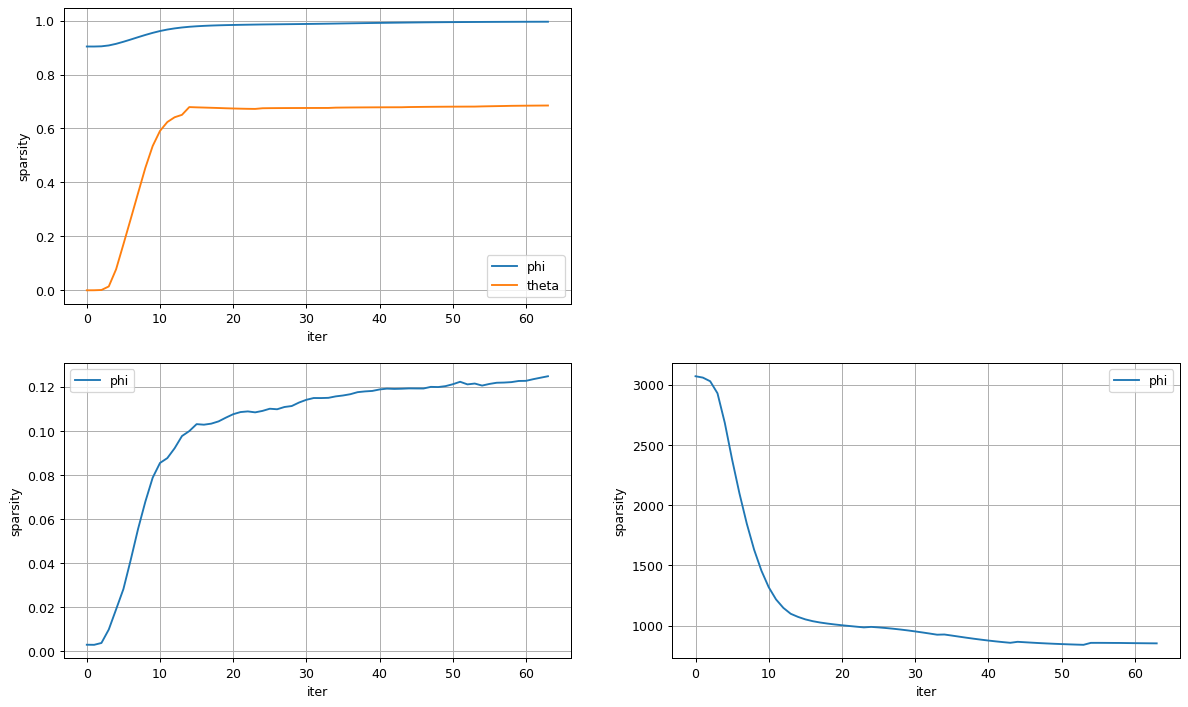

In [116]:
%%time
for i in range(2, 6):
    model.regularizers['SparseTheta'].tau = - i / 10
    model.regularizers['SparsePhi'].tau = - i / 10
    model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
    fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')
    
ax = fig.add_subplot(4, 2, 3)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

In [156]:
coh = [round(c, 2) for v in model.score_tracker['TopTokensScore10'].last_coherence.values() for c in v]
for topic, words in model.score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in model.score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words, coh[int(topic.split('_')[-1])]]
    weights = [0, *[w * 5 for w in weights], 5 * coh[int(topic.split('_')[-1])]]
    draw_html(zip(tokens, weights))

topic_0: нога спина палка размах топот туловище лодыжка калека перекладина рука 0.03

topic_1: родитель сосед свидание знакомство окончание зависть ремонт перерыв посещение поклонник 0.03

topic_2: правда обед слово еда ужин аппетит хлопоты трапеза человек выдумка 0.02

topic_3: рука колено смех хватка взмах плечо дверь глаз ноша трава 0.0

topic_4: месяц начало течение срок подробность уход сезон заключение режим справка 0.01

topic_5: мгновение сознание ощущение горло пот ненависть напряжение усталость инстинкт вечность 0.0

topic_6: образ судьба обстоятельство достоинство поступок несчастие обещание случай соображение участь 0.03

topic_7: пара случай расстояние место смена тройка окрестности сохранность целость десятка 0.02

topic_8: часть тысяча слава добро холод груз награда человек призыв храбрость 0.01

topic_9: труд страх ужас голод спасение предчувствие испуг мольба бегство рука 0.01

topic_10: встреча компания счет полгода партнер сюрприз риск мероприятие повод случай 0.01

topic_11: сила выход шум жертва тяжесть ловушка сопротивление западня натиск бегство 0.01

topic_12: женщина посетительница владелица представительница человек замужество жительница феминистка преступница удивление 0.07

topic_13: день прогулка распорядок бел благодарение солнцестояние время равноденствие дом молоко 0.04

topic_14: небо масса направление запас признак зрелище падение верх равновесие око 0.01

topic_15: дело штука дельце делишки отлагательство пустяк случай курс работенка огласка 0.05

topic_16: лицо ярость удивление рука решимость кровинка глаз тревога дверь оспина 0.01

topic_17: результат возраст число качество характер средство способность необходимость польза общение 0.02

topic_18: речь способ слух степень появление исключение подозрение визит распоряжение недостаток 0.01

topic_19: плечо стул фигура глазок спинка скула морщина искорка морщинка дверь 0.05

topic_20: цвет впечатление внимание черта вкус уголок оттенок облик восхищение насмешка 0.04

topic_21: язык любопытство узел акцент перевод пучок рука изучение выговор язычок 0.01

topic_22: друг приятель дружба дружка взаимопонимание человек собутыльник взрослый однокашник недруг 0.06

topic_23: нос след пыль пятно платок кусочек стенка полоска отпечаток подошва 0.04

topic_24: причина присутствие представление просьба внешность обязанность намерение работник замечание удовлетворение 0.03

topic_25: год десятилетие полвека расцвет протяжение ровесник перестройка малое туберкулез свидетельство 0.04

topic_26: палец ладонь рука кончик ноготь рот сустав мизинец мозоль горсть 0.05

topic_27: ночь утро бессонница храп наступление зарядка час ночевка снотворное молоко 0.04

topic_28: глава событие сотня большинство множество отличие начало пост нужда особенность 0.01

topic_29: место ход участок дорога троица направление сторона обход окрестность проезд 0.02

topic_30: постель тишина покой молчание гнев отчаяние слабость презрение уста слово 0.01

topic_31: род честь человек манера нрав удивление участие сорт юнец забава 0.01

topic_32: дорога порядок волнение доля благодарность время оборот растерянность рука внимание 0.0

topic_33: дверь кресло помещение ерунда случай человек панель освещение спинка подлокотник 0.05

topic_34: окно дверь подоконник скамья занавеска штора чушь дрянь ублюдок рука 0.0

topic_35: черт рубашка брюки идиот парочка рука задница дерьмо зад трусы 0.08

topic_36: улыбка жест внимание прощение красавец смущение рука приветствие комплимент замешательство 0.03

topic_37: душа радость человек прах самоубийство сущность доброта мучение скорбь смертный 0.03

topic_38: грудь ухо кусок вопль приступ паника желудок рука кашель вата 0.0

topic_39: десяток прием сутки жара физиономия внимание видимость пустяк одиночка подъем 0.0

topic_40: точка тип зрение вариант собеседник случай наблюдение эффект персона подход 0.01

topic_41: работа вечер молодежь скандал зануда лавочка ухажер часок вечерок часик 0.06

topic_42: пол зуб челюсть обморок рука слюна дверь щепка пола дробь 0.01

topic_43: рост очки надпись пиджак вес дверь килограмм реклама шапочка бородка 0.01

topic_44: час половина поиск время привычка четверть основное треть темп чистка 0.04

topic_45: форма размер ручка остаток ремень мозги цепочка образец содержимое величина 0.02

topic_46: ум воля беда пример предел человек гибель загадка подвиг обман 0.01

topic_47: воспоминание болезнь возвращение молодость перемена полночь сумерки атмосфера трагедия горечь 0.02

topic_48: слово удовольствие новость восторг тоска наслаждение развлечение уныние равнодушие ликование 0.03

topic_49: мера безопасность ожидание облегчение изумление человек тревога догадка осторожность возглас 0.01

topic_50: момент план цель попытка шанс поведение осуществление направление реакция маневр 0.04

topic_51: центр название граница район владелец сообщение поддержка целое участник продолжение 0.02

topic_52: ситуация действие задача вывод деталь принцип сведение мелочь разрешение контакт 0.01

topic_53: неделя лето полдень весна отъезд приход весть известие каникулы поход 0.02

topic_54: голос шепот эхо нотка бормотание баритон рука тембр хрипотца холодок 0.04

topic_55: вещь стиль заказ ценность набор жилище жилье суета имущество беспорядок 0.05

topic_56: воздух миг спутник полоса проклятие огонек переход тепло искра груда 0.0

topic_57: шея слеза девчонка штаны ножка горло головка макушка нитка коленка 0.02

topic_58: желание одежда адрес реакция разочарование отказ возбуждение процедура шок нетерпение 0.02

topic_59: голова кивок глаз рука упор удивление сотрясение внимание дверь трава 0.0

topic_60: путь смерть помощь исчезновение исход человек отступление одиночка бегство скиталец 0.02

topic_61: бок рука приказ взор неожиданность бред рывок бег пена мерзавец 0.01

topic_62: край ряд лист труба середина слой связка спуск навес сторона 0.04

topic_63: угол карман часы ботинок сетка иголка шнурок щелчок передняя перегородка 0.02

topic_64: секунда кулак пояс рукав локоть драка рука дружок ухмылка трус 0.04

topic_65: сторона шутка борода рука веселие скамейка хохот взмах удивление шутник 0.06

topic_66: счастие детство чудо мечта карьера семейство фантазия хозяйство юность старость 0.01

topic_67: куча привет грязь обида дура злость прощание чистота гадость истерика 0.03

topic_68: глаз щека бровь рука вздох солнышко румянец удивление кудри волосок 0.01

topic_69: порог настроение фамилия дверь завтрак вызов раздражение приглашение случай повод 0.01

topic_70: свет сердце печаль трепет жалость мрак биение мерцание замирание стыд 0.04

topic_71: разговор интерес беседа намек ссора сплетня реплика болтовня обсуждение расспрос 0.05

topic_72: взгляд подбородок усмешка каблук губа мурашки щетина дверь рука внимание 0.01

topic_73: рождение родственник здоровье горе поездка гордость совесть позор стыд родня 0.06

topic_74: волос выражение туфля блеск походка нежность бедняжка спутница седина пощечина 0.01

topic_75: конец старина затея случай человек внимание начало дело время дверь 0.0

topic_76: вид фраза домик картинка интонация чепуха слово прогулка случай время 0.0

topic_77: дурак глупость человек рука хор негодяй лад время пьяница денек 0.0

topic_78: глаз веко зрачок огонек упор поволока щелочка синева голубизна губа 0.01

topic_79: круг глубина усилие защита спокойствие близость безумие грань создание узор 0.02

topic_80: мысль состояние память эмоция потеря вред обращение слово ясность реакция 0.01

topic_81: проблема положение забота вина услуга ответственность натура требование признание авторитет 0.01

topic_82: губа рот лоб краска затылок поза недоумение досада гримаса смешок 0.01

topic_83: жизнь будущее прошлое одиночество настоящее предательство уклад человек тягота бессмысленность 0.03

topic_84: человек надежда толк беспокойство происшествие бедняга местечко точность время предосторожность 0.01

topic_85: стена шаг знак проход тревога рука щель шорох поступь человек 0.04

topic_86: человек угроза нерв терпение уверенность правило случай разница истерика время 0.01

topic_87: спасибо тон сожаление пауза готовность стать штучка курс дверь внимание 0.01

topic_88: вопрос ответ случай смысл ошибка согласие утверждение рассуждение человек реакция 0.01

topic_89: очередь занятие количество отсутствие знакомый объяснение процесс главное приезд минимум 0.01

topic_90: запах капля ткань аромат лента трава легкое отвращение жидкость ветерок 0.04

topic_91: время понятие линия размышление смысл возможность человек направление разница последовательность 0.01

topic_92: возможность право опыт условие успех выбор существование перспектива умение трудность 0.07

topic_93: сомнение предмет обстановка неприятность основание удача приключение повод спор любитель 0.01

topic_94: чувство мнение значение уважение смысл доверие действительность сочувствие стремление симпатия 0.03

topic_95: история дух тайна подросток традиция корень правило расположение ритуал слушатель 0.01

topic_96: пора идея личность суть секрет свойство анекдот простота неудачник быт 0.02

topic_97: стол ребята дверь молодец посуда стопка минутка скатерть буфет закуска 0.02

topic_98: имя прозвище прелесть приют кличка время свидетельство слог отчество псевдоним 0.04

topic_99: минута полчаса опоздание ходьба дверь время полминуты получас спешка езда 0.04

topic_100: роман литература читатель повесть героиня фантастика персонаж жанр одуванчик писательница 0.16

topic_101: солдат строй сражение легион ветеран шеренга легионер новобранец неприятель солдатик 0.26

topic_102: общество факт источник репутация шантаж констатация 0.02

topic_103: дьявол сеньор спаситель грешник сеньорита барселона мавр севилья херес сеньора 0.55

topic_104: фон курьер чан штаб-квартира рига лупа дыня фельдмаршал маляр брильянт 0.04

topic_105: госпожа театр спектакль актер актриса артист пьеса опера ложа комедия 0.19

topic_106: водка хрен блин пацан рожа сволочь че гад башка сука 0.12

topic_107: ученый наука основа учение религия познание исследование явление секта мистика 0.09

topic_108: местность нить путешественник убежище паук паутина поселение пустошь дельта паутинка 0.19

topic_109: сад дорожка пруд аллея изгородь газон садовник садик беседка клумба 0.17

topic_110: хозяин мука зерно мельница мельник жернов булочник прачка точильщик стекольщик 0.2

topic_111: зеркало отражение зеркальце флакон расческа пупок белоснежка трюмо пудреница мопед 0.14

topic_112: цирк карлик кнут арена клоун сакс британия язычник уродец гладиатор 0.06

topic_113: стекло руль мотор асфальт рычаг тормоз газ шина педаль двигатель 0.05

topic_114: мужик шапка верста шуба плеть сотник стан татарин дурень стрелец 0.31

topic_115: могила крест кладбище похороны скелет склеп холмик надгробие поминки покойница 0.27

topic_116: россия русский турок нация украина ленинград турция беженец кавказ национальность 0.24

topic_117: взрыв атака позиция танк орудие снаряд батарея оборона броня десантник 0.19

topic_118: школа класс урок учительница парта одноклассник учебник математика школьник директриса 0.25

topic_119: магазин покупка витрина прилавок проспект касса бульвар продавщица вывеска покупатель 0.34

topic_120: движение строение контур павильон координация автоматизм брусчатка 0.0

topic_121: рана пещера повязка порез аптечка ран грот бард жаровня свод 0.14

topic_122: река берег озеро лодка речка плот весло устье течение камыш 0.09

topic_123: игра игрок новичок покер прятки френч бридж часовщик правило азарт 0.04

topic_124: сотрудник институт руководство руководитель акция бизнесмен профессионал бюро командировка корпорация 0.1

topic_125: ноль футбол пятерка матч минус четверка перец стадион бугор плюс 0.04

topic_126: ад рай хранитель бес преисподняя орешек каста владычица архангел бургомистр 0.11

topic_127: сидение дверца стоянка парковка пикап автостоянка яр бардачок брелок кабриолет 0.16

topic_128: век природа человечество период столетие цивилизация бытие прогресс тысячелетие миф 0.13

topic_129: победа поражение победитель клятва соперник поединок герб братство состязание реликвия 0.23

topic_130: вода дно бассейн дельфин водоросль плеск брызги струя осьминог водоем 0.21

topic_131: фотография снимок пленка альбом фотограф фото фотоаппарат аттракцион объектив кадр 0.28

topic_132: завод рабочий барак цех строитель посылка стройка станок земляк урал 0.12

topic_133: уголь па молоток сумрак булыжник медь рудник гранит руда родинка 0.1

topic_134: программа техника испытание подготовка звено инструктор конструктор рекорд парашют тренажер 0.11

topic_135: девушка марина беглянка дикарка подопечная обладательница смуглянка недотрога 0.02

topic_136: танец кубок ожерелие лак тара танцовщица вальс льюис медвежонок янки 0.08

topic_137: коридор потолок лампа проем фонарик абажур выключатель штукатурка плафон коридорчик 0.1

topic_138: ребенок бабушка няня взрослый отчим воспитательница пеленка отцовство памперс аборт 0.32

topic_139: секс любовник наркотик шоу проститутка шлюха наркоман девственница бордель джи 0.07

topic_140: книга книжка библиотека полка страница переплет обложка томик корешок фолиант 0.2

topic_141: наследник наследство корона завещание свита отпрыск венец наследница сопляк кормилица 0.14

topic_142: лес холм ручей тропинка трава поляна кустарник роща овраг склон 0.15

topic_143: скорость поворот километр шоссе обочина фара дорога указатель въезд микроавтобус 0.07

topic_144: отец 0.0

topic_145: игрушка кукла ложка тина шоколад карла тесто сковородка кубик карусель 0.06

topic_146: золото предок богатство сокровище серебро потомок тайник клад община искатель 0.16

topic_147: дождь погода осень рассвет ливень туча непогода дождик лачуга керосин 0.05

topic_148: перчатка тренировка зритель схватка упражнение чемпион бокс боксер канат ринг 0.16

topic_149: символ мертвый древность пергамент предсказание пророчество властитель инквизитор инквизиция библиотекарь 0.16

topic_150: стадо кора олень пастух отшельник шкурка заповедник ягненок упряжка тундра 0.18

topic_151: шеф чемодан метро проводник багаж платформа попутчик носильщик флер эскалатор 0.07

topic_152: кошка котенок ива мамаша брюнет кисточка иня клещ жилетка кукушка 0.23

topic_153: капитан бак матрос боцман ром команда вахта юнга моряк м-р 0.27

topic_154: предложение документ отчет договор сделка подпись соглашение расписка перл формальность 0.08

topic_155: масло курица фрукт горшок орех капуста икра цыпленок виноград апельсин 0.06

topic_156: должность советник коллекция апартамент мат шахматы швейцар банкет посыльный пешка 0.02

topic_157: жених матушка коса царица нянька рабыня жемчуг роды царевна горох 0.11

topic_158: дюйм гитара бобби шнур чехол лом фитиль саванна вихор дорогуша 0.04

topic_159: служба чин мундир петербург заговор отставка жандарм надзор заговорщик прошение 0.16

topic_160: мужчина 0.0

topic_161: вера царство посол мудрость султан мудрец посланец чужеземец гарем оракул 0.11

topic_162: склад печать табличка стеллаж субъект хранение хранилище макет оттиск префектура 0.14

topic_163: художник рисунок находка археолог скульптура фрагмент раскопка набросок орнамент эскиз 0.12

topic_164: герой образование благо воспитание явление потребность злодей заблуждение порок добродетель 0.05

topic_165: сон кошмар пробуждение сновидение явь гетто дремота бодрствование забытье полусон 0.1

topic_166: дочь дочка лира папочка доченька дочурка замужество любимица рукоделие отцовство 0.33

topic_167: император империя правитель владыка указ подданный наместник казна почесть аудиенция 0.23

topic_168: разбойник стража бродяга банда палач маршал главарь шайка помост грабеж 0.07

topic_169: воображение чтение юмор вдохновение умерший гранд романтик абзац гравюра метафора 0.03

topic_170: доказательство особа ложь убеждение преданность покровитель суждение благородство высокомерие сдержанность 0.04

topic_171: товар монета купец торговец торговля налог базар монетка богач бедняк 0.28

topic_172: скала лед дикарь вал утес водопад маяк выступ туземец ледник 0.13

topic_173: волна океан прилив прибой мираж рябь гребень впадина зенит пена 0.1

topic_174: гость папаша барышня барин кухарка угощение маменька барыня папенька генеральша 0.23

topic_175: диван гостиная ковер мебель камин обои булочка портьера рози интерьер 0.09

topic_176: церковь священник собор епископ молитва кардинал святой часовня икона проповедь 0.21

topic_177: компьютер агент агентство интернет сайт ноутбук сеть файл пароль монитор 0.15

topic_178: кровать спальня одеяло малыш подушка матрас флора тумбочка ванная пижама 0.07

topic_179: сцена туалет публика рояль занавес зритель аплодисменты унитаз декорация уборная 0.22

topic_180: представитель область комиссия строительство комитет сша кампания проведение ведомство крым 0.13

topic_181: морда прыжок шерсть щенок лев брюхо зверек клубок рычание рык 0.13

topic_182: герцог светлость герцогиня регент герцогство шурин мальборо бон титул веллингтон 0.3

topic_183: царь молитва аллах пророк осел грек христианин царевич мусульманин всевышний 0.15

topic_184: житель тьма обитатель закат гроза глина зарница 0.11

topic_185: дама горничная прислуга кавалер лакей дворецкий парик бренди дуэль баронесса 0.1

topic_186: война американец предатель боевик пленный заложник чеченец чечня чех перемирие 0.3

topic_187: пространство дыра вспышка механизм конструкция оболочка щупальце перемещение импульс ядро 0.03

topic_188: пистолет пуля бандит напарник выстрел кобура ствол дуло курок обойма 0.09

topic_189: шар змея бабочка пузырь змей обрыв стрекоза гадюка прутик аллигатор 0.08

topic_190: мама папа мамочка кухня взрослый мамуля папочка доченька братик сыночек 0.21

topic_191: поверхность температура газ купол давление градус кислород стоун кислота шланг 0.12

topic_192: коньяк майка сыщик рюмка мэр лимон мура мур рюмочка мэрия 0.33

topic_193: терраса плитка галлюцинация завеса каморка мозаика жюльен ростовщик балюстрада миндаль 0.0

topic_194: король величество маркиз королевство сир маркиза монарх придворный подданный шевалье 0.28

topic_195: подарок праздник дедушка нора рождество елка ножницы гирлянда елочка прадедушка 0.13

topic_196: миссис пирог бабуля экономка пансион джем хаус прабабушка пудинг домоправительница 0.07

topic_197: запись дневник тетрадь сочинение историк библия словарь прадед цитата брошюра 0.12

topic_198: союз организация еврей республика террорист ссср коммунист израиль кгб спецслужба 0.33

topic_199: кот шарик скай ветеринар котик кошечка киска клубочек шкирка валерьянка 0.41

topic_200: свадьба церемония торжество лень поздравление загс годовщина бракосочетание венчание молодожены 0.07

topic_201: территория маршрут наблюдатель тайга бинокль патруль квадрат барьер ящер маскировка 0.06

topic_202: кровь ведьма жила артерия пак ранка шабаш метка переливание кровища 0.02

topic_203: охранник лифт кнопка вестибюль кабинка наручник шприц бинт марля пластырь 0.05

topic_204: связь задание блок норма инструкция академик сектор единица техник сеанс 0.08

topic_205: кость призрак пустота привидение хаос бездна агония полтергейст приведение 0.3

topic_206: сапог рубаха мертвец покойник фокус пазуха бородач батя фокусник детина 0.09

topic_207: колесо ограда коляска погоня мотоцикл преследователь таракан канава спица мотоциклист 0.19

topic_208: слуга простыня очаг лихорадка кроватка сиделка бульон тюфяк чепец двуколка 0.0

topic_209: тема список материал колонка бостон нейл кембридж перечень отзыв тематика 0.06

topic_210: плита кирпич сыр рис овощ ниша соус плесень кладка лапша 0.1

topic_211: рассказ писатель автор произведение сюжет биография повествование творчество рассказчик критик 0.19

topic_212: товарищ командир подполковник старшина казарма боец поручик ротмистр замполит ротный 0.25

topic_213: этаж клиент балкон сейф сигнализация перила стремянка вахтер балкончик клиентура 0.14

topic_214: флот адмирал кристалл крейсер корабль соединение эскадра операция торпеда мичман 0.19

topic_215: гном орден магистр гоблин медаль адепт алхимик народец телепорт динар 0.17

topic_216: труп милиция дежурный милиционер протокол участковый розыск мент удостоверение славка 0.27

topic_217: кожа шрам бета вдох роба ожог выдох рубец жилка гиацинт 0.08

topic_218: эпоха рим философ философия римлянин г-н тиран возрождение сословие упадок 0.2

topic_219: клуб команда мяч спорт тренер соревнование спортсмен секция спортзал раздевалка 0.52

topic_220: девочка питер малышка девчушка жасмин воспитанница воспитательница платьице тринити личико 0.12

topic_221: экран телевизор дуга пульт монитор клавиша рей наушники наушник вентилятор 0.15

topic_222: замок карета кучер ров козлы отмычка лье запятки рессора колымага 0.47

topic_223: государство лидер китай азия сообщество демократия восток афганистан амур держава 0.21

topic_224: мак джорджия северянин лох стенд ама южанин глория норманн тихоня 0.01

topic_225: поцелуй объятие прикосновение ласка сосок бедро страсть влечение ягодица лоно 0.1

topic_226: незнакомец милорд толстяк медиум жнец джига добряк поваренок наглеца 0.06

topic_227: леди лорд лондон джентльмен кузен кузина виконт опекун титул хаус 0.39

topic_228: остров островок материк пролив инк риф архипелаг лагуна бастион оконечность 0.23

topic_229: парк доллар нью-йорк колледж авеню вашингтон цент манхеттен трейлер американка 0.1

topic_230: армия германия берлин фюрер донесение делегация союзник австрия рейх вьетнам 0.14

topic_231: свобода гражданин население метод конфликт идеал независимость мышление ограничение оратор 0.13

topic_232: юноша кувшин лик верблюд лебедь джинн оазис шайтан чужестранец чалма 0.17

topic_233: здание вход постройка фасад архитектура архитектор пристройка хьюстон коронер небоскреб 0.1

topic_234: автобус рюкзак лужа крошка спичка проволока будка гусь кепка крестик 0.03

topic_235: удар плащ выпад верзила бугай стилет замах терн нападающий кастет 0.1

topic_236: комната кайло пицца трельяж комнатка мега этажерка кушетка анчоус меблировка 0.07

topic_237: городок паренек мостовая улочка перекресток нищий лохмотья грузчик лоток пешеход 0.12

topic_238: англия родина европа сентябрь январь февраль польша поляк голландец голландия 0.2

topic_239: профессор карандаш шпион дырка колобок райком комсомол эрмитаж географ гусляр 0.11

topic_240: джинсы модель сок келли ранчо шорты детка крем ковбой клей 0.08

topic_241: красота песня красавица дитя пение песенка певец куплет лан возлюбленная 0.25

topic_242: больница халат отделение палата медсестра санитар носилки дежурство госпиталь медик 0.13

topic_243: милость государь старец посох кафтан вельможа сокол чело патриарх отрок 0.08

topic_244: чаша пленник ступня сосуд жрица туника весы хрип конунг отродье 0.04

topic_245: баба метла избушка соловей корыто яга сундучок отвар блюдечко кисель 0.06

topic_246: поток видение вихорь стихия ураган останки преграда смерч потоп фантом 0.1

topic_247: песок столб бревно кромка зола ведьмак ржавчина штабель га брус 0.06

topic_248: лекарство пузырек рецепт аптека аббат воспитатель латынь интернат воспитанник аптекарь 0.21

topic_249: мистер джентльмен корт бердо мармелад кеб гроссбух сноб стенографистка кроль 0.05

topic_250: дядя племянник дядюшка кеш мор креол девон калина племянничек племяш 0.28

topic_251: крыло дракон пасть коготь шут талисман логово ярл единорог чешуя 0.08

topic_252: лошадь конюшня кобыла конюх амбар загон стойло крупа овес мерин 0.46

topic_253: народ поколение происхождение обычай различие предание земледелец этнограф народность земледелие 0.21

topic_254: метр высота длина тоннель сантиметр стрелка ширина прожектор толщина командор 0.04

topic_255: мисс барон гувернантка компаньонка арно кингстон мизинчик баронство палтус вязание 0.11

topic_256: решение последствие вероятность выполнение вмешательство уничтожение восстановление кодекс принятие объединение 0.11

topic_257: медведь железо мех кузнец молот чудище кузница мишка друид бубен 0.27

topic_258: гвоздь кол башмак ремесло колпак камзол пряжка убор сапожник дощечка 0.07

topic_259: животное мясо пища обезьяна джунгли самец самка мачете кашка корм 0.13

topic_260: запястье чары татуировка блик финн кон предплечье кудряшка фортуна ранец 0.07

topic_261: машина водитель багажник бензин капот двигатель светофор тачка бмв иномарка 0.21

topic_262: пустыня яма буря почва гриб шахта лопата нефть пласт вездеход 0.07

topic_263: зал брюнетка смокинг кулон лайт присутствующий анфилада паркет гардеробщик перешептывание 0.0

topic_264: мальчик люк мальчуган честер взрослый парнишка худышка сорванец сынишка постреленок 0.06

topic_265: полковник майор прапорщик капрал пограничник нарушитель фсб диверсант спецназ контрразведка 0.16

topic_266: письмо почта скука открытка почтальон переписка почерк корреспонденция адресат отправитель 0.43

topic_267: ус орел казак хата сало мул атаман эрл хлопец як 0.2

topic_268: любовь страсть страдание привязанность разлука влюбленность взаимность нежность обожание измена 0.1

topic_269: музыка роль концерт музыкант конкурс певица пианино композитор оскар эстрада 0.22

topic_270: холл гараж коттедж рута чета паб чет гамбургер хай кадиллак 0.22

topic_271: лавка сено телега цыган ярмарка извозчик самовар возница воз обоз 0.08

topic_272: старик колодец хорек старикашка старикан хлыст клуня тростинка закваска маразматик 0.15

topic_273: камень гнездо трещина камешек валун обломок глыба ящерица уступ гребень 0.11

topic_274: уровень реальность легенда иллюзия персонаж основатель феникс наследие выносливость бонус 0.05

topic_275: кофе чай чашка поднос сахар чайник кухня печение чашечка глоток 0.24

topic_276: брат монах монастырь обитель монахиня келья послушник настоятельница настоятель послушница 1.0

topic_277: толпа фонтан зевака выкрик шествие гомон ропот толчея давка любопытный 0.08

topic_278: меч воин раб щит копье шлем клинок ножны доспехи рукоять 0.13

topic_279: камера аппарат инженер радио передача микрофон провод оператор эфир кассета 0.08

topic_280: раса колония портал форт лига федерация стратегия колонист улей захватчик 0.12

topic_281: карта бочка лепешка конек колода трактор лавина бек крот арбуз 0.1

topic_282: суд судья наказание справедливость приговор казнь правосудие штраф присяжный осужденный 0.24

topic_283: знание портрет открытие дата формула изобретение математика изобретатель математик озарение 0.19

topic_284: подвал крыса сторож пух поросенок сосиска пастор пятачок домовой свинка 0.15

topic_285: специалист изображение комплекс оценка психолог интеллект психология тест ана отклонение 0.1

topic_286: конь всадник седло копыто степь жеребец лошадка рысь ястреб галоп 0.19

topic_287: бумага записка конверт марка почерк лист ион чернила линн клочок 0.05

topic_288: колдун повелитель орк шаман колдовство свиток предводитель могущество властелин порча 0.09

topic_289: журнал страница текст блокнот строчка строка грант обложка пометка страничка 0.31

topic_290: рок корка вика лен бульдозер олово пейс дрель рокер отбросы 0.1

topic_291: стрела крепость лук защитник наконечник арбалет лучник укрепление осада тетива 0.26

topic_292: улица квартал тротуар зонтик пустырь зонт сквер скверик омнибус мотороллер 0.17

topic_293: сумка пальто сумочка остановка шарф трамвай чемоданчик резинка кейс свитер 0.08

topic_294: мешок веревка червь крюк крокодил сова краб русалка фляжка камушек 0.04

topic_295: негр шпага императрица плантация индус государыня чернокожий надсмотрщик тюрбан невольник 0.18

topic_296: цепь череп дубинка кишка бритва мумия узник глазница громила железяка 0.08

topic_297: париж партия политика иностранец политик элита спонсор мемуары интеллектуал брюссель 0.13

topic_298: дед внук внучка старичок дедуля старикан правнук снегурочка семга дедок 0.27

topic_299: долг губернатор должник каин кредитка заем дознаватель зарок сантьяго облигация 0.17

topic_300: хлеб печь соль дрова мед миска котел молоко котелок мужичок 0.12

topic_301: огонь пламень свеча сияние отблеск свечка воск подсвечник лот химера 0.15

topic_302: бабка дача картошка велосипед бутерброд конфета колбаса дядька пирожок маринка 0.09

topic_303: ступень телохранитель капюшон перстень одеяние трость светильник зала накидка мантия 0.05

topic_304: муж свекровь супруг замужество муженек измена дао золовка юбилей супружество 0.13

topic_305: система организм сеть исследование анализ технология стадия вирус ресурс ген 0.13

topic_306: дым пожар пар пепел гигант вулкан землетрясение лава пожарный рокот 0.13

topic_307: рог бык пан порошок тур шакал бычок ом колышек пахарь 0.08

topic_308: ресница прическа прядь пуговица шелк локон рыдание копна ямочка грация 0.14

topic_309: забор поселок свинья калитка огород коза петух жук огурец грядка 0.14

topic_310: борт палуба судно катер матрос пароход яхта мостик корма причал 0.18

topic_311: экспедиция робот создатель снаряжение геолог андроид восхождение киборг клон альпинист 0.12

topic_312: юбка бедро талия блузка серьга сет вырез сережка цыганка кофточка 0.11

topic_313: мусор бригада лекарь свалка хлам помойка болт емкость молчун отходы 0.05

topic_314: гроб плен рак фриц сухарь салют листовка какао немка дот 0.0

topic_315: корабль отсек двигатель система управление контейнер борт пилот люк капсула 0.16

topic_316: роза букет покрывало подол веснушка плед туфелька пленница бант вышивка 0.16

topic_317: дверь ключ скважина задвижка щеколда косяк защелка запор притолока филенка 0.15

topic_318: автомат грузовик кабина джип трасса кузов ягуар брезент стажер внедорожник 0.08

topic_319: гора вершина запад восток склон равнина хребет беглец странник перевал 0.03

topic_320: солнце луч облако горизонт восход заход зной панама светило дымка 0.06

topic_321: крыша миля фут арка лабиринт развалины сооружение балка ярд руины 0.11

topic_322: академия рама чертеж качели оранжерея риза линь художество подгузник крышечка 0.01

topic_323: особняк эль отделка маскарад фиалка берн витраж дейл ирис лепнина 0.02

topic_324: ящик шкаф бумажка машинка комод бланк уборщица ящичек тюбик квитанция 0.13

topic_325: сигарета куртка пачка пробка зажигалка окурок пепельница киоск гонка клин 0.13

topic_326: франция испания дворянин королевство правление титул интрига претендент династия изгнание 0.16

topic_327: принц принцесса трон высочество паж королевство престол придворный трубочист фрейлина 0.36

topic_328: картина мастерская кисть галерея полотно выставка живопись холст краска художница 0.16

topic_329: самолет полет аэропорт пилот летчик бомба посадка механик аэродром рейс 0.29

topic_330: мастер инструмент мелодия нота оркестр барабан струна скрипка футляр флейта 0.1

topic_331: контроль переговоры сфера доклад производство статус кризис фактор экономика досье 0.05

topic_332: поле корова ферма луг овца скот скотина баран урожай пшеница 0.09

topic_333: проект деятельность кролик частность департамент характеристика сотрудничество конференция гоголь аспект 0.04

topic_334: вор продавец маньяк бумажник кража таксист дань хантер гражданка жулик 0.01

topic_335: автомобиль авария сирена травма повреждение форд мотель авто магистраль автострада 0.21

topic_336: долина индеец фургон ущелие пони мексика каньон бизон прерия хоббит 0.12

topic_337: мозг энергия лаборатория прибор эксперимент вещество частица измерение физика физик 0.28

topic_338: поезд вагон билет вокзал станция купе рельс платформа электричка перрон 0.27

topic_339: грех господь вдова имение сирота мачеха невестка бедность оспа свекор 0.06

topic_340: бог богиня египет фараон колесница троя египтянин папирус божество одиссея 0.21

topic_341: хвост лапа плод семя воробей коготь пах детеныш потомство невидимка 0.04

topic_342: студент университет экзамен учеба институт преподаватель лекция курс диплом факультет 0.22

topic_343: оружие опасность нападение араб тактика арсенал преследование протектор алжир боеприпасы 0.16

topic_344: существо разум изменение воздействие термин восприятие психика подсознание цикл гипноз 0.1

topic_345: старуха козел тролль варение груша слива овечка столяр мартышка картофелина 0.04

topic_346: фильм музей кино режиссер студия съемка сценарий сериал кинотеатр актер 0.26

topic_347: бизнес офис контракт зарплата менеджер помощница бухгалтер начальница дизайнер собеседование 0.07

topic_348: член клан вторжение союзник вражда дополнение противостояние глагол синдикат беркли 0.05

topic_349: мост флаг набережная викинг парапет флажок нева полотнище настил подкрепление 0.26

topic_350: номер операция коллега шофер ассистент икс пейджер игрек шаланда грыжа 0.14

topic_351: сигнал устройство код доступ дисплей терминал пластина пластик датчик частота 0.19

topic_352: храм колонна жрец свод алтарь служитель процессия божество идол тир 0.1

topic_353: тюрьма побег камера фуражка козырек решетка надзиратель арчи уголовник пристав 0.05

topic_354: клетка акула абориген носитель жемчужина особь паразит приманка разновидность пловец 0.09

topic_355: телефон трубка звонок карточка мобильник гудок визитка провод автоответчик абонент 0.1

topic_356: человек 0.0

topic_357: доска стук крышка сверток четвереньки костяшка бечевка стамеска защелка щель 0.04

topic_358: старейшина врата посланник резиденция старший канцлер шахтер дрема пра цербер 0.02

topic_359: господин сказка портной сказочник быль сказочка праотец 0.19

topic_360: парень такси тележка бригадир умник парнишка бабай инкассатор шашечка 0.04

topic_361: квартира подъезд соседка кухня прихожая жилец квартирка ванная холодильник коммуналка 0.18

topic_362: старушка китаец блоха парикмахерская деточка клоп картонка маршрутка опиум шарфик 0.02

topic_363: кухня тарелка столовая блюдо суп повар вилка кастрюля салат холодильник 0.13

topic_364: убийство убийца преступление следователь преступник расследование версия допрос следствие улика 0.27

topic_365: доктор врач больной пациент клиника лечение хирург софия медицина психиатр 0.1

topic_366: ветер тень молния туча гром порыв раскат мотылек мрак завывание 0.05

topic_367: немец фронт комиссар училище курсант шинель фашист партизан землянка окоп 0.37

topic_368: сестра близнец сестренка сестричка сестрица братик двойняшка юла замужество золовка 0.29

topic_369: москва паспорт мерседес волга заказчик москвич киллер ларек кремль мафия 0.28

topic_370: яд обряд ложе чума греза эпидемия мазь недуг снадобье темница 0.13

topic_371: снег зима мороз лыжа сугроб сани шапка холод весна снежинка 0.25

topic_372: дом тэк домовладелец развалюха запустение домочадец жилище домик 0.19

topic_373: рубль портфель пенсия фабрика копейка заработок зарплата портвейн оклад работница 0.07

topic_374: газета буква банк листок объявление кассир шрифт кокаин алфавит банкомат 0.11

topic_375: зверь охотник охота добыча хищник дичь кабан пантера леопард следопыт 0.15

topic_376: среда воскресение суббота выходной пятница понедельник четверг вторник расписание календарь 0.17

topic_377: вино бокал шампанское глоток тост поднос графин виноградник фужер нарцисс 0.21

topic_378: живот стон ребро корточки синяк пятка лопатка щиколотка ссадина поясница 0.13

topic_379: кара ниточка пани булка прага варшава петушок гребешок каре ксендз 0.14

topic_380: ракета космос орбита скафандр скорость полет километр звездолет ось топливо 0.12

topic_381: рыцарь сундук дева юпитер пир гонец доспехи оруженосец латы сера 0.08

topic_382: борьба доброволец борец пионер интеллигент будда коммунизм интеллигенция героизм просветление 0.18

topic_383: деревня крестьянин топор повозка село изба староста бор малец деревенька 0.09

topic_384: столик ресторан кафе мадам официант официантка месье меню мадемуазель мсье 0.39

topic_385: эльф жезл родич полукровка древо ищейка ларь воительница сородич карапуз 0.04

topic_386: директор гимназия ленточка кипа завхоз дирекция агроном газик детдом макулатура 0.13

topic_387: архив дипломат посольство переворот виза швед швеция подполье стокгольм дипломатия 0.2

topic_388: земля вар чернозем земледелец надел клочок землепашец 0.28

topic_389: учитель ученик младенец наставник ученица обучение малютка колыбель новорожденный розга 0.26

topic_390: граф скачки камердинер скачок золушка финиш грум ипподром забег гайд 0.26

topic_391: генерал войско комендант гвардия штурм гарнизон командующий адъютант мятежник мятеж 0.33

topic_392: куст болото растение трава насекомое заросль ягода мох лягушка комар 0.09

topic_393: совет столица провинция сторонник соратник консул полномочие сенат стратег эмиссар 0.2

topic_394: планета звезда вселенная пришелец землянин марс галактика инопланетянин космос цивилизация 0.22

topic_395: хозяйка мода служанка гостья гувернантка кружево шитье одр сор ричмонд 0.04

topic_396: пассажир каюта койка трап иллюминатор теплоход стюард лайнер бри калоша 0.33

topic_397: деньги сумма расход денежки аванс гонорар йорк валюта банкнот наличность 0.14

topic_398: тетя тетка племянница родственница пат пулька опекунша гостинец колхозница слет 0.07

topic_399: площадка вертолет мина рация снайпер спасатель камуфляж взрывчатка вертушка лопасть 0.14

topic_400: мышь мышка лапка пик стебель хвостик писк крылышко пика чулан 0.13

topic_401: напиток вечеринка джин коктейль алкоголь рейн гольф мартини ликер бойфренд 0.19

topic_402: девица девка братец батюшка баня поп дума богатырь голубчик мамка 0.19

topic_403: маг магия демон заклинание чародей амулет заклятие гильдия зелье мэтр 0.31

topic_404: побережье африка континент герр европеец греция одесса полуостров атлантика сироп 0.1

topic_405: мать пенни челси альма лэнгли макси 0.02

topic_406: зона периметр лось мутант воронка вышка колючка артефакт сталкер аномалия 0.08

topic_407: гостиница фунт шотландия австралия шиллинг оксфорд сидней ирландия пенс франклин 0.17

topic_408: темнота металл отверстие осколок факел конечность подземелье прут мрак скрежет 0.05

topic_409: сэр сержант француз шарп ирландец харпер хук ярд британец якут 0.27

topic_410: украшение драгоценность бриллиант алмаз зоопарк двойник шах изумруд ювелир горилла 0.13

topic_411: платье наряд тетушка кэт чулок гардероб шаль декольте лиф кружева 0.1

topic_412: цена рынок продажа доход собственность прибыль грош стоимость изделие недвижимость 0.05

topic_413: боб тигр слепой жучок павлин тумба домино мурка уборщик милашка 0.02

topic_414: отряд полк сабля засада знамя караул шашка дозор варяг кавалерия 0.17

topic_415: крик маска рев вена хруст вонь лоскут прорезь смрад полумаска 0.09

topic_416: боль дыхание плоть дрожь мышца судорога лодыжка онемение пульсация растяжение 0.03

topic_417: стакан бар висок стойка бармен выпивка табурет глоток виски кин 0.35

topic_418: невеста бал любовница аристократ женитьба помолвка приданое сударыня невинность вуаль 0.09

topic_419: статуя памятник пирамида мрамор эра значок культ бюст гробница скульптор 0.07

topic_420: начальник отдел охрана начальство заместитель совещание подчиненный пропуск зам кадры 0.19

topic_421: мир ангел максвелл сотворение затворник мирок херувим множественность мироустройство социум 0.06

topic_422: костюм блондинка галстук красотка блондин картер дамочка жакет костюмчик толстуха 0.08

topic_423: костер шкура тропа караван путник ночлег дубина кочевник тюк амазонка 0.11

topic_424: графиня управляющий шляпка веер миледи изящество сиятельство француженка реверанс поверенный 0.03

topic_425: нож тварь чудовище кинжал монстр лезвие рукоятка шип ножик клинок 0.16

topic_426: семья франк зять теща тесть домработница октава прима зятек семейка 0.17

topic_427: звук фонарь треск силуэт вой визг тана шорох какофония хрящ 0.08

topic_428: птица муха слон дуб великан ворона голубь клюв ворон здоровяк 0.13

topic_429: владение поместье усадьба лужайка фермер деревушка кладовая графство плющ акр 0.08

topic_430: фирма управление папка фонд кредит эксперт запрос олигарх лицензия продукция 0.08

topic_431: чиновник колокол сибирь канцелярия ссылка отечество превосходительство обыватель помещик колокольня 0.2

topic_432: сан урод японец переводчик япония ширма самурай иероглиф токио лотос 0.17

topic_433: город площадь барабанщик окраина парка полгорода панорама 0.13

topic_434: помощник шляпа округ револьвер шериф грабитель сударь коротышка салун дилижанс 0.12

topic_435: мелисса собеседница приятельница шейх англичанка рань проигрыватель сиэтл галочка размещение 0.03

topic_436: кабинет секретарь секретарша приемная консультация фрау заведующий экстрасенс селектор референт 0.29

topic_437: америка август март май июнь июль октябрь апрель декабрь сенатор 0.14

topic_438: турист фигурка экскурсия приезжий статуэтка достопримечательность сувенир гид экспонат куб 0.11

topic_439: собрание копия рукопись экземпляр издание издательство смотритель издатель оригинал коллекционер 0.27

topic_440: луна пес жаба роса малина ромашка крапива лопух полнолуние полынь 0.22

topic_441: путешествие канал индия венеция гордон гондола индиец дож раджа гурия 0.23

topic_442: информация процент цифра категория администрация плакат учет консультант статистика аналитик 0.06

topic_443: талант профессия развод увлечение ревность беременность депрессия романтика расставание призвание 0.14

topic_444: переулок прохожий порция мороженое стаканчик травка рожок подворотня лучик рен 0.06

topic_445: выстрел пушка винтовка патрон стрельба пуля часовой пулемет ствол стрелок 0.26

topic_446: тело клеточка нагота окоченение гениталии торс 0.04

topic_447: племя палатка вождь хижина шатер селение полог шест соплеменник бусы 0.19

topic_448: собака собачка лай поводок ошейник сев овчарка пес свора лесник 0.39

topic_449: дерево ветка ветвь ствол листва крона лист сук корень клен 0.26

topic_450: дар фея палочка колокольчик шкатулка волшебство медальон аура нимфа мановение 0.01

topic_451: истина дон зло испанец противоречие сатана мироздание весельчак мечтатель донья 0.17

topic_452: туман битва англичанин пелена мгла шотландец мартен швейцарец плюмаж дымка 0.02

topic_453: отель босс служащий администратор постоялец портье клерк люкс конторка клайд 0.16

topic_454: офицер лейтенант штаб звание рота батальон взвод подразделение состав приказ 0.1

topic_455: лестница ворота ступенька решетка перила засов пролет створка подножие лемех 0.04

topic_456: разведка разведчик миссия ранг захват рейд вооружение торн резерв штамп 0.31

topic_457: пресса репортер чек калифорния сан-франциско ленч ланч техас уик-энд вырезка 0.12

topic_458: сигара марш табак ставка папироса комбинация выигрыш шестерка сукно масть 0.05

topic_459: полиция полицейский инспектор детектив стрит копа констебль расследование роуд донна 0.16

topic_460: кольцо диск коробочка док колечко спираль циферблат подушечка дока ободок 0.17

topic_461: свидетель адвокат заявление председатель обвинение прокурор юрист арест взятка залог 0.09

topic_462: стая браслет чужак вожак кокон фауна зевс волчонок коршун лей 0.07

topic_463: статья газета журналист культура редактор редакция интервью заметка корреспондент заголовок 0.35

topic_464: дворец королева стражник колдунья гобелен фрейлина придворный правительница повелительница опочивальня 0.18

topic_465: пиво посетитель кружка заведение кошелек кружок трактир кабак мясник трактирщик 0.19

topic_466: бутылка банка лампочка холодильник пластинка шкафчик бутылочка бомж будильник баночка 0.28

topic_467: сын сынок хан сыночек сынишка гиря сынуля ханство орда змееныш 0.4

topic_468: рыба раковина крючок рыбак рыбка удочка рыбалка аквариум катушка сеть 0.36

topic_469: отдых отпуск пляж веранда пальма загар курорт бич кондиционер сандалия 0.13

topic_470: власть закон месть насилие жестокость бунт магистрат кун казнь законник 0.1

topic_471: мешочек солома чучело людоед ласточка волшебница дровосек страшило гуд стелла 0.2

topic_472: миллион контора предприятие телеграмма жалование капитал банкир компаньон коммерсант нотариус 0.17

topic_473: жена супруга супруг вдовец женушка супружество измена семьянин благоверная неверность 0.17

topic_474: волк ружье заяц лиса утка лис ежик зайчик сорока капкан 0.18

topic_475: президент министр правительство кандидат министерство заседание выборы депутат деятель парламент 0.18

topic_476: вампир волшебник оборотень клык зомби нечисть упырь укус нежить заноза 0.26

topic_477: башня наемник страж таверна гвардеец сталь горец тракт башенка шпиль 0.15

topic_478: подруга подружка незнакомка помада косметика макияж шпилька милочка вероника трусики 0.13

topic_479: перо яйцо горожанин странствие перышко скорлупа чернильница циновка выдра каноэ 0.06

topic_480: группа трибуна передвижение завал кореец поисковик прочесывание выдвижение распад слаженность 0.04

topic_481: теория кит исследователь эволюция динозавр биология гей атланта уравнение гипотеза 0.08

topic_482: крыльцо корзина окошко чердак печка корзинка сени веник передник уголек 0.12

topic_483: мальчишка грохот звон гул человечек погреб сырость гвоздик парнишка волчок 0.05

topic_484: враг бой противник боец раненый фляга схватка тыл заслон ранение 0.17

topic_485: экипаж корпус цилиндр штурман рейс челнок механика лайнер поломка обшивка 0.2

topic_486: салон вилла стрижка лимузин лос-анджелес миллионер клиентка парикмахер массаж вест 0.11

topic_487: коробка пакет носок таблетка футболка обувь душ упаковка кроссовок пакетик 0.14

topic_488: море берег корабль порт пират моряк парус плавание бухта шторм 0.29

topic_489: цветок птичка ваза попугай лепесток цветочек лилия лиана венок кай 0.16

topic_490: искусство стих поэт поэзия гармония стихотворение гений поэма строка муза 0.34

topic_491: послание италия торт мел итальянец синьор синьора милан мадонна флоренция 0.21

topic_492: отношение брак проявление приз узы тик лит расторжение разногласие супружество 0.04

topic_493: белье ведро полотенце ванна тряпка ванная кран мыло щетка табуретка 0.14

topic_494: штат купюра бакс казино похищение похититель сити выкуп чикаго топ 0.12

topic_495: князь боярин княгиня воевода русь киев дружина грамота княжна дружинник 0.67

topic_496: лагерь север юг муравей куколка муравейник северо-восток саранча кряж ландыш 0.16

topic_497: двор яблоко сарай дворник дворик тополь сирень леденец акация песочница 0.07

topic_498: станция объект база пункт состав группировка полигон спецназ таможня таможенник 0.2

topic_499: страна революция рабство съезд грузин грузия пролетариат тбилиси буржуй абхазия 0.29

In [161]:
model.dump_artm_model(f'S_topics_maxdf_100+400')

In [ ]:
104 106 114 120 121 125 128 133 136 145 149 156 157 158 161 163 164 169 170 172 174 

In [166]:
%%time
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)


CPU times: user 4h 51s, sys: 5min 3s, total: 4h 5min 55s
Wall time: 35min 38s


Text(0.5, 0, 'iter')

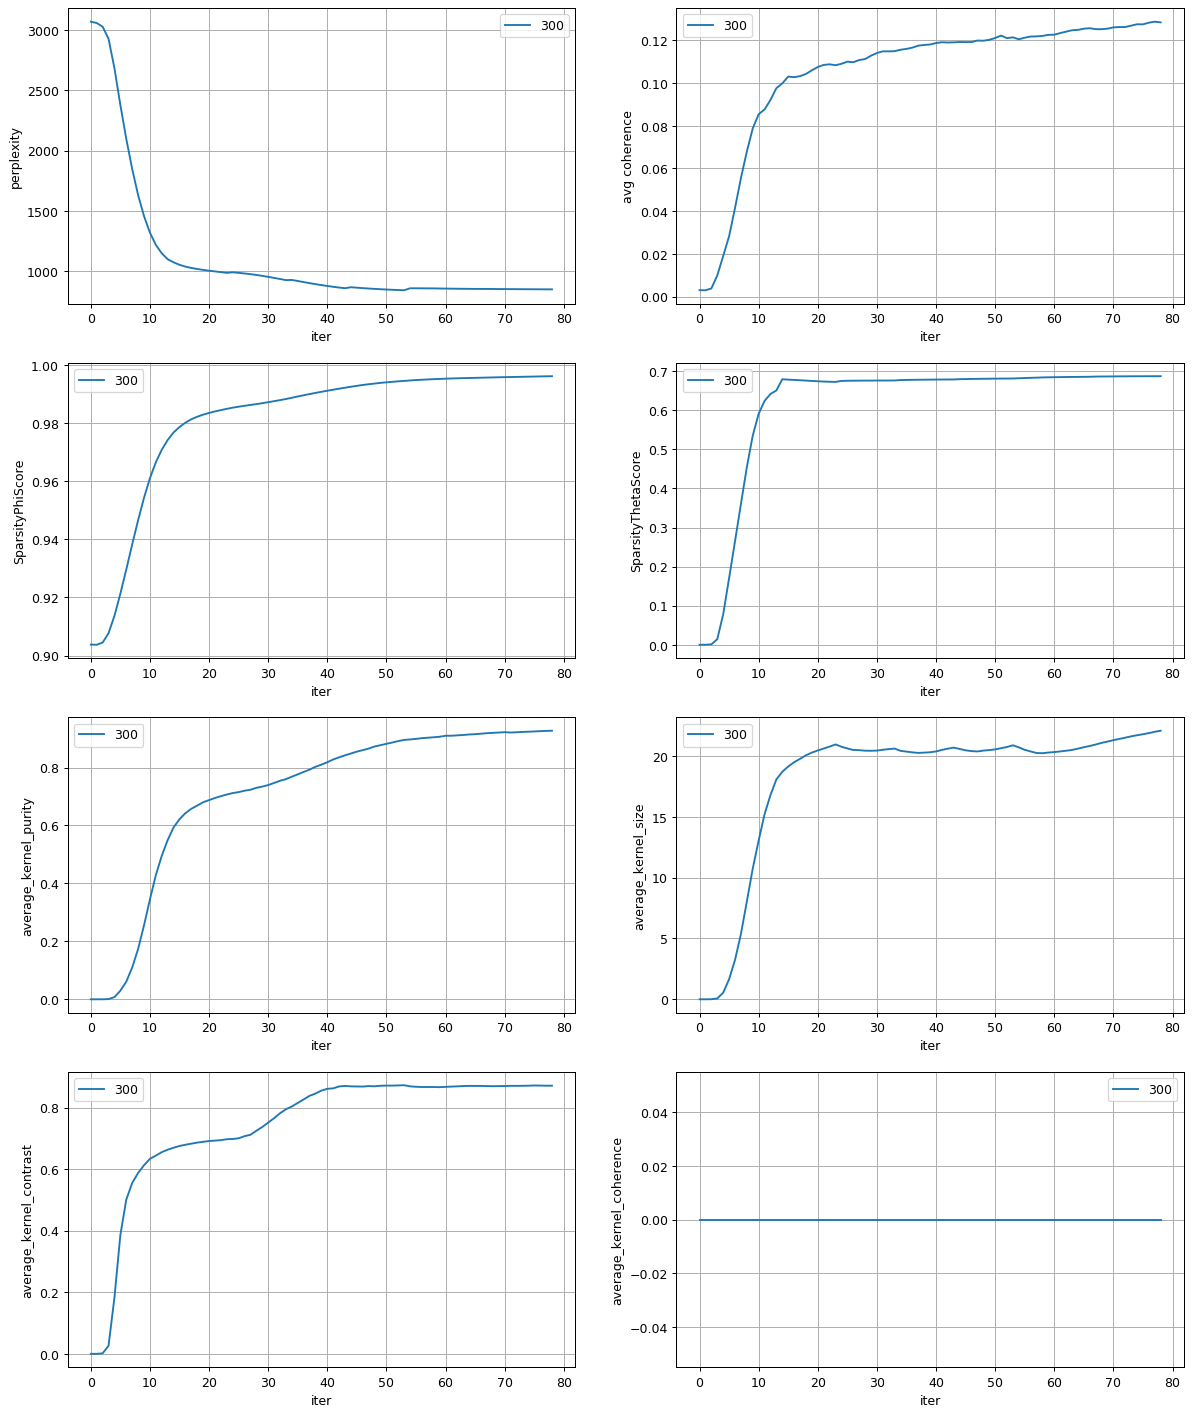

In [172]:
def display_main_metrics(model):
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
ax.legend(n_topics)
ax.set_ylabel('perplexity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 2)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
ax.legend(n_topics)
ax.set_ylabel('avg coherence')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 3)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
ax.legend(n_topics)
ax.set_ylabel('SparsityPhiScore')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
ax.legend(n_topics)
ax.set_ylabel('SparsityThetaScore')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 5)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopicKernelScore'].average_purity)-1), s['TopicKernelScore'].average_purity[1:])
ax.legend(n_topics)
ax.set_ylabel('average_kernel_purity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 6)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopicKernelScore'].average_size)-1), s['TopicKernelScore'].average_size[1:])
ax.legend(n_topics)
ax.set_ylabel('average_kernel_size')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 7)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopicKernelScore'].average_contrast)-1), s['TopicKernelScore'].average_contrast[1:])
ax.legend(n_topics)
ax.set_ylabel('average_kernel_contrast')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 8)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopicKernelScore'].average_coherence)-1), s['TopicKernelScore'].average_coherence[1:])
ax.legend(n_topics)
ax.set_ylabel('average_kernel_coherence')
ax.set_xlabel('iter')

In [182]:
model.regularizers.add(artm.ImproveCoherencePhiRegularizer(name='ImproveCoh', tau=.5, 
                                                           topic_names=subject, 
                                                           dictionary=dictionary))

In [170]:
np.mean(coh[:100])

0.023200000000000002

In [183]:
%%time
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)

CPU times: user 1h 13min 49s, sys: 1min 10s, total: 1h 14min 59s
Wall time: 10min 39s


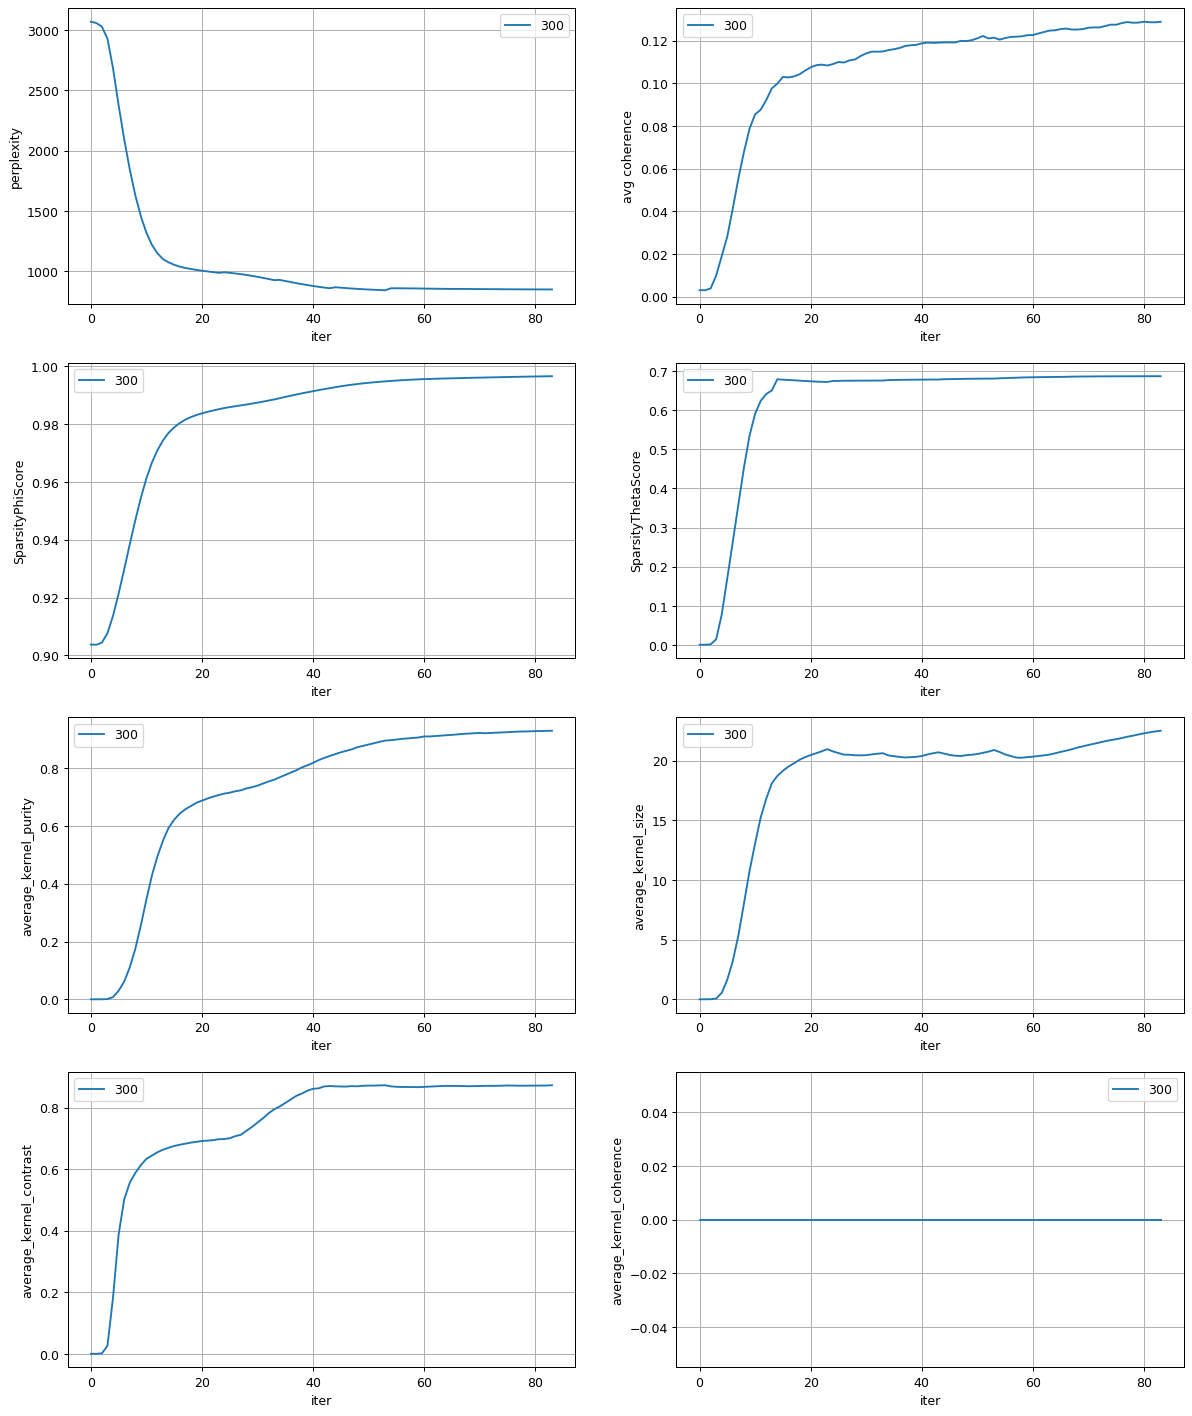

In [187]:
display_main_metrics(model)

In [188]:
model.regularizers['ImproveCoh'].tau=1
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

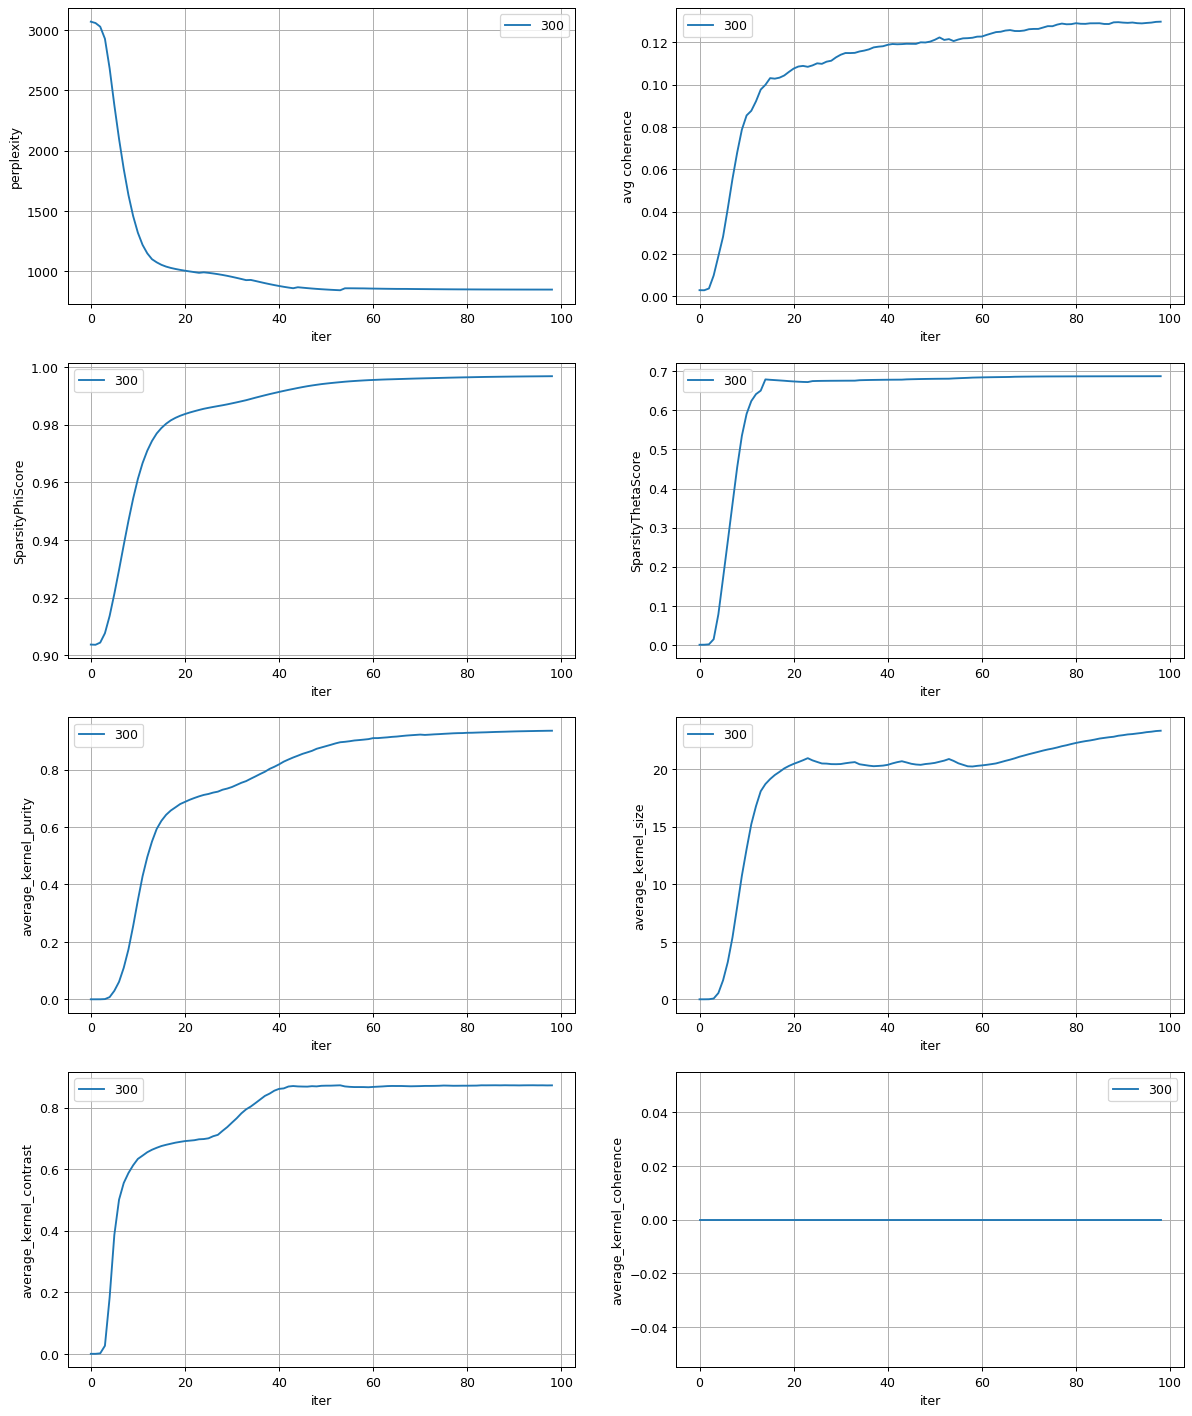

In [190]:
display_main_metrics(model)

In [198]:
for topic, words in model.score_tracker['TopicKernelScore'].last_tokens.items():
    weights = [model.phi_[topic][('@default_class', w)] for w in words]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

topic_0: туловище спина вывих перелом топот калека кувырок культя сухожилие размах нога деревяшка палка ушиб штанина лодыжка голень перекладина

topic_1: опека сослуживец воздыхатель родительница придирка инвалид семейка ровесник зависть поклонник предлог сосед окончание папуля родитель свидание ремонт посещение знакомство давность взрослый холостяк перерыв отчим проделка шалопай гнездышко домашние соседство родители ровесница валер чад сноб чадо квартирка

topic_2: пышка творог голодовка пищеварение коврижка эклер рацион витамин умолк горошек анчоус яство провизия кормление пиршество кушанье клубника сказочка угощение червячок пицца глупышка худышка правда лгун сардина диета сытость вертел полдник обед сливки вязание десерт говядина питие плюшка ужин трапеза хлопоты баклажан трюфель горшочек лгунья выдумка булочка отговорка осетрина лакомство небылица аппетит жаркое блюдо размолвка второе обжорство грудинка лососина лосось еда огорчение вкусности стряпня кулинария кетчуп мусс корзиночка свекла бифштекс барбекю суфле ростбиф дорогой марципан разносчик калория отвал добавка филе хлебец сотрапезник горчица сдоба вегетарианка паштет поднос рулет слюнки деликатес углевод стейк бордо рагу шеф-повар гурман едок телятина артишок спаржа картофель врун выпечка сыта гарнир вегетарианец бисквит готовка мисочка ребрышко

topic_3: рука смех колено

topic_4: начало срок разрыв замена завершение уход режим проживание подробность заключение сезон отсрочка учреждение месяц истощение срыв прошествие повышение продолжительность отправка пособие увольнение выпуск питание справка среднее запой течение стаж уведомление настояние амнистия истечение годность реабилитация

topic_5: сердцебиение судорога головокружение рвота спазм адреналин пульс бессилие пульсация забытье проблеск толчок рефлекс беспомощность тиски самосохранение безысходность напряжение ломота тошнота позвоночник озноб клеточка осознание ощущение инстинкт дурнота вечность пот онемение усталость жжение мускул жар ком ненависть комок сознание внутренность мгновение бисеринка зуд позыв беспамятство горло конвульсия желчь нереальность сухость агония частичка резь изнеможение удушье

topic_6: вершитель неведение честность несчастие избранник проницательность ничтожество произвол обещание прихоть обстоятельство участь образ размышление судьба стечение неблагодарность разорение наивность верность оправдание утешение соображение вероломство достоинство бремя рассуждение баловень побуждение превратность поступок крушение определенность злодейка провидение

topic_7: десятка напарница тройка пары смена пара расстояние случай окрестности дистанция целость сохранность сменщик

topic_8: мерзость груз слава холод часть призыв тысяча добро мануфактура бойня поджигатель тонна награда храбрость худо

topic_9: несчастный боязнь испуг обреченность пощада ноша ужас предчувствие бегство оглядка голод пята фобия труд смельчак трусиха спасение утопающий храбрец неизвестность страх омерзение содрогание мучитель мольба

topic_10: расценка партнерство тунис смета обслуга рассрочка сбыт убыток гонорар клиентура доверенность договоренность скидка индустрия ссуда актив бюджет плейбой аферист партнер вложение плав предпринимательство производитель детище компенсация магнат встреча отчетность тариф подрядчик финансы тусовка полгода баланс фуршет расход счет рейтинг капиталовложение риск компания коммивояжер банкротство мошенничество аванс сюрприз страховка авантюра пассия выплата оборудование обслуживание оплата организатор совладелец закупка трата конфиденциальность мероприятие закрытие сервис сертификат издержки страхование воротила предоплата криминал вклад держатель афера взнос акционер махинация платеж дженерал конкуренция предприниматель инвестиция протеже финансирование субсидия премия потребитель затрата пиар полис турфирма окленд дивиденд

topic_11: зга тяжесть ловушка выход шум сопротивление жертва натиск западня выносливость сила

topic_12: матриархат шпионка мегера предводительница посетительница обитательница феминистка владелица женоненавистник сексуальность дурнушка домогательство преступница женщина ханжа развратник ухаживание целомудрие соблазнитель авантюристка жительница феминизм интрижка манто простушка участница читательница представительница материнство равноправие мошенница

topic_13: распорядок бел прогулка солнцестояние благодарение день

topic_14: разрушение пропасть пурпур поднебесье низ зарево опора голубизна легкость равновесие небосклон зенит признак созерцание фейерверк мириада панорама верх обличие зрелище горизонт брешь падение светило небосвод растительность зарница вышина отдаление даль верхушка жажда пейзаж око материя синь направление туча небо собрат чрево блуждание буйство зеница ландшафт ориентир прочность букашка масса багрянец полнеба запас ловкость

topic_15: дело дельце отлагательство

topic_16: лицо ярость кровинка

topic_17: необходимость катастрофа нововведение польза характер применение средство итог этап способность акт общение содержание развитие возраст расчет качество число влияние ясновидение формирование результат приложение преобразование соответствие разделение введение агрессивность использование

topic_18: соблюдение недовольство исключение комментарий подопечный недоброжелатель появление домысел неосторожность слух степень упоминание распоряжение способ приличие подозрение речь неудовольствие визит преувеличение опасение недостаток

topic_19: желвак краешек спинка фигура морщина глазок морщинка искорка плечо стул скула

topic_20: охра образчик восхищение кокетство хрупкость изысканность покрой магнетизм утонченность самоуверенность привлекательность стройность изъян сложение великолепие небрежность обаяние очарование теплота вкус насмешка настороженность шарм элегантность впечатление профиль робость женственность гамма властность застенчивость уголок оттенок телосложение обрамление отлив загадочность цвет холодность округлость облик надменность мягкость непринужденность притягательность враждебность самообладание непосредственность контраст мужественность сходство безразличие невозмутимость черта штрих выразительность сочетание

topic_21: полиглот аи прилагательное лингвист соотечественник язык остер разговорник лексика британец выговор синтаксис гречанка глухонемой синоним междометие незнание абракадабра письменность наречие диалект произношение любознательность классик акцент словосочетание черточка соломинка филолог согласный падеж эпитет ас азбука смешение жало колорит лексикон немой печень лепет табу каламбур привязь гортань пучок эквивалент путаница говор сленг гласный азы жаргон типун язычок средневековье анатомия аккомпанемент ультразвук просторечие местоимение разница узел тарабарщина грамматика грамотность закорючка перевод жестикуляция любопытство изучение

topic_22: приятель дружка дружба друг

topic_23: слепок царапина полоска труха насморк клякса бахрома метка стенка чих потек нос кусочек отметина подошва след отпечаток обрывок пылинка шишка скоба вмятина борозда платок пятно пыль ямка горбинка

topic_24: промах рекомендация недоразумение пребывание рвение осложнение замечание поручение причина внешность озабоченность выдержка исполнение ведение упущение темперамент прибытие наниматель присутствие позволение оплошность представление вознаграждение обязанность должное предписание удовлетворение серьезность хладнокровие намерение работник просьба

topic_25: десятилетие год полвека

topic_26: мозоль кончик фаланга щепоть сустав ощупь горсть пилочка волдырь палец ноготь ладонь костяшка бугорок ключица мизинец касание щепотка пилка

topic_27: недосып сонливость бессонница зарядка полудрема ночь калачик дремота пробежка утро побудка храп снотворное ночевка ночка

topic_28: событие мерка сравнение дюжина множество большинство сотня глава пост меньшинство особенность очевидец отличие нужда плата

topic_29: троица участок место ход жительство

topic_30: решимость слабость альков припадок безмолвие раскаяние оскорбление гнев молчание бешенство покой измена боже предательница тишина унижение презрение восклицание обет злоба постель потаскуха уста ожесточение мщение безнадежность посмешище отчаяние исступление покорность побои

topic_31: благодеяние бережливость почет прелестница благоденствие лета распущенность признательность сорвиголова пыл приятность толки бесчестие невежество процветание торжественность остроумие раздор пренебрежение кутеж спесь простонародье приязнь всеуслышание твердость ценитель участие любимец потомство почтительность деревенщина порода знаток учтивость приверженность уроженец умеренность похвала скромность разумение нрав манера знатность угода кротость молва кров пария сношение насмешник подражание род пышность родословная забава домочадец старшинство порицание важность вступление этикет прародитель празднество доблесть аристократизм честь выскочка снисхождение продолжатель дарование почтение девиз родство подношение табакерка тонкость дикость вольность распря обыкновение манер увеселение выходец сборище простодушие одобрение личина покоритель повадка стан суровость обхождение образованность низы поучение лицемер родоначальник устой сорт провинность благоволение выправка красноречие живость добродушие щеголь лоск подобострастие отвага вздор поприще назидание леность значительность прилежание юнец генеалогия усердие покровительство щедрость бытность заклад услужение провинциал наружность горячность тщание смотр строгость дерзость гувернер невежда фабрикант алчность неуважение чернь бесчинство лукавство

topic_32: проезжающий блюститель колдобина растерянность доля порядок колея оборот волнение благодарность дорога обход глушь тряска объезд проезд развилка

topic_33: пуфик притолока качалка кадка панель освещение ерунда помещение люстра дверь кресло коридорчик визитер подлокотник засов обивка

topic_34: простенок эркер фикус карниз мойка отопление занавеска запор косяк мансарда шлепанец окно умница фанера байка штора балкончик портьера цыпочки запустение скрип полуподвал кухонька чушь гардина задвижка наличник сквозняк занавесь створка ублюдок кухня брусчатка герань скамья звяканье ставня дрянь палисадник ставень щеколда комнатка возня липа жалюзи подоконник комнатенка ротонда чуланчик аккордеон оконце половик коврик мезонин форточка шпингалет фрамуга

topic_35: невезуха пердун вонючка задоринка говнюк гомосексуалист дешевка причиндалы парочка кайф индиана кальсоны пари торс болван дегенерат манжета красавчик недоумок алкоголик тупица жлоб дьявольщина чертовка придурок катушка фигня дерьмо олух педераст рубашка ступор зад гомик сучка идиот трусы типчик дружище псих ширинка стерва папочка черт паинька идиотизм чертик заваруха психушка чудик шизофреник кретин хиппи сортир задница дребедень хаки счастливчик засранец жратва сиська вестерн отключка блейзер обтяжка кулички дурдом недоносок видок пунктик охламон симпатяга потаскушка чертовщина косячок ворот брюки слаксы сучок стелька подштанники цыпочка психопат дебил

topic_36: канапе поклон издевка ловелас гостеприимство внимание замешательство комплимент приветствие гримаска галантность извинение сарказм колкость полуулыбка неодобрение присутствующий негодование красавец флирт прощение жест кивок смущение рукопожатие доброжелательность бесцеремонность поклонница дружелюбие пожатие неловкость любезность улыбка радушие ирония мимика фамильярность идиотка

topic_37: бренность смертный умиротворение мученик утеха слепота бытие преображение томление скорбь реинкарнация тщета вместилище гимн гордец мучение таинство покаяние несовершенство гордыня одр грядущее исповедь милосердие прозрение удел горесть терзание послушание творение радость кончина благословение осадок господи злодеяние естество смирение душа небытие заточение наставление фибры стенание возлюбленная разврат эрос перерождение царствие постижение страдалец умиление прах сущность благодать деяние гнет самоубийство антихрист помысел умирающий блуд отдохновение счастливец переселение человеколюбие блаженство бальзам отрада веление успокоение прегрешение агнец избавление высь расплата сладострастие нега злато ведомо уродство юдоль немощь экстаз глас праведник величие ближний кощунство слияние неверие праведность ликование доброта грехопадение

topic_38: бюстгальтер ухо приступ желудок астма вата паника грудь затычка ложбинка урчание клипса вопль кашель мочка перепонка несварение кусок

topic_39: подступ отбой избыток налет зной духота электричество жара запрет эскорт полусотня теснота солнцепек помин доставка надобность климат перепалка устав помеха десяток паек физиономия одиночка разряд вылазка прием малость подъем пустяк лет водопровод присмотр остальное видимость безделье проволочка малое разбор разгар сопровождение промежуток придача полсотни подхват уйма сутки излишек пекло живность стояние чутье дисциплина отвод перебой трюк пяток лихва кондиция поверка

topic_40: психоз перенос универсал коэффициент казус диаграмма загвоздка этика взаимосвязь искажение ракурс реалия направленность смещение стереотип аппаратура розыгрыш феномен наложение поправка конфигурация структура элемент наблюдение активность технарь зрение параллель прикрытие показатель ориентация дискуссия отрезок график формация точка мания специфика функция установка серия контингент трансформация совпадение длительность диапазон спец шаблон дилетант обзор сбой синдром аналогия шкала эффект отсчет кавычка тип радиус периферия термин вариация прикидка параноик резонанс версия парадокс орган ассоциация подход слежка максимум вариант стандарт определение соприкосновение концентрация прорыв антураж биополе катаклизм спектр сдвиг аналог корректировка конспирация совокупность персона классификация контекст параметр отрыв таблица координата профи оптимист плоскость проекция вектор собеседник привязка терминатор паранойя вертикаль терминология прослушка запятая умножение соотношение наводка эрудиция раздражитель индивид горизонталь физиология

topic_41: вечерок специальность часок работа отгул вечер часик молодежь посиделки ухажер безработный зануда рутина цветочница

topic_42: лужица ломик щепка пушинка зуб челюсть паркет дырочка петля слизь белок обморок линолеум душевая дробь опилки карачки стеночка десна стоматолог кариес слюна пола дантист оскал нашатырь зубочистка плинтус пломба кафель блевотина пол коронка мастика

topic_43: неон клинышек заплата помпон центнер оправа бакенбарда килограмм жвачка панама шапочка вешалка лацкан застежка толстушка дужка полкило линза улыбочка крепыш близорукость дождевик надпись тельняшка комплекция вязка брючки пиджак пенсионер воротничок очкарик вес бородка стеклышко блестка бобрик стульчик имидж магнит лодочка шик рост шевелюра бирка свитер очки упор берет почка завитушка переносица очко окошечко тросточка фуфайка мускулатура лысина косынка фломастер кепочка джемпер реклама подтяжка типаж обладатель книжечка трафарет униформа иголочка сорочка ветровка брошюрка грамм кушетка солидность кепи номерок ходуля подмышка водолазка пуговка фургончик пиджачок перхоть безрукавка твид штиблета калькулятор мини-юбка новенький слоган усик наклейка отворот залысина бицепс наколка кило жилет замша бейсболка полголовы ковбойка протез логотип пуловер чечетка транспарант плакатик щеточка постер загогулина

topic_44: темп чистка привычка основное поиск четверть треть задержка час половина

topic_45: морозильник спрут насадка изготовитель покрытие кронштейн стержень планка заклепка размер доза латунь помесь клемма разрез величина мозги волокно концентрат распылитель цепочка габарит рельеф мембрана содержимое бетон пропорция мясорубка щиток желе шов махина гибрид полость экипировка полумесяц амуниция эмблема форма окраска комбинезон штуковина остаток ручка образец штука аллергия пластмасса каркас объем пинцет ремень полиэтилен подсветка сечение фактура парад симметрия начинка проба краситель расцветка каучук имитация прыщ сплав манипуляция нарост миллиметр изготовление субстанция хлопок резина бляха завязка нашивка агрегат утолщение брусок отросток пластилин крепление шестерня

topic_46: хотение малодушие недруг крайность бедствие ум лишение повиновение невзгода подвиг мужество досягаемость предел сострадание загадка премудрость изворотливость сообразительность предназначение хитрость козни замысел глупец всемогущество обман смекалка трусость гибель пословица бесстрашие злодейство стойкость коварство воля неволя тягота беда внушение крат пример

topic_47: прокаженный возврат паралич уклад убыль легкомыслие неизбежность мимоза освобождение рассеянность ностальгия воссоединение глухота подагра калейдоскоп симптом напоминание постоянство сифилис дизентерия кровопускание сумерки утомление острота пристанище выздоровление воспоминание утрата атмосфера уединение наступление болезнь пенаты перемена молодость очевидность забвение горечь веселость прошедшее разлука возвращение чахотка сладость пережитое апатия грусть расстройство старение похождение опухоль пьянство трагедия полночь бодрость пирушка недомогание чудачество преддверие развалина скитание повторение проказа оживление праздность беззаботность сантименты однообразие сентиментальность угасание опьянение беспечность меланхолия туберкулез подавленность предзнаменование тишь опустошение череда угар драма жизнерадостность близкие родные непоседа тиф заря

topic_48: новость развлечение слово тоска восторг наслаждение удовольствие

topic_49: медлительность недоверие неуверенность подозрительность случайность облегчение тревога мера раздумье ожидание уверенность потрясение уловка возглас осторожность догадка злоумышленник безопасность быстрота смятение приказание решительность изумление предостережение бездействие поспешность осмотрительность предусмотрительность бдительность нерешительность смелость сообщник

topic_50: марионетка фиаско цель попытка поведение момент шанс план тактика осуществление

topic_51: центр эколог желающий рубеж обозначение пересечение снабжение разнообразие район протяженность линия окраина военный целое граница реконструкция раздел массив участник энтузиазм энтузиаст название сообщение владелец прохождение сбор скопление небоскреб пригород юго-запад иммигрант обмен регистрация экология электропередача старожил справочник поддержка транспорт торонто высотка вывоз отдельность автомашина сводка наименование микрорайон новостройка потепление продолжение коммуникация застройка смог

topic_52: конвенция координация санкция прекращение инстанция взаимодействие инцидент инициатива зацепка гарантия тупик эффективность разработка исполнитель профессионализм агрессия усиление данные мотивация деталь секретность прогноз обоснование контакт выдача лояльность согласование ситуация эксцесс действие транспортировка документация расклад несоответствие обнаружение указание нюанс предпосылка достоверность закономерность проникновение наличие вывод мелочь допуск сведение интуиция задача разрешение логика практика умозаключение проверка схема внедрение принцип установление уточнение последовательность возникновение местонахождение задачка фигурант аксиома предположение прокол противодействие проработка компетенция выяснение информатор планирование нахождение формулировка провокация построение ознакомление нарушение директива подтверждение содействие сложность ликвидация устранение выявление расшифровка параграф предотвращение неразглашение уничтожение выкладка

topic_53: заморозок пасха приход каштан починка приготовление неделя известие поход полдень лето ангина весна проводы весть полмесяца каникулы простуда переезд весточка неделька сборы грипп отъезд

topic_54: модуляция динамик тембр шепот эхо хрипотца нотка баритон контральто холодок бормотание тенор голос громкоговоритель

topic_55: снос скупка антиквариат безделица ломбард трофей интерьер уборка пожитки инкрустация резьба осмотр принадлежность умелец новинка цацка безделушка удобство гарнитур уют пропажа барокко лейбл всячина сервиз рухлядь шедевр скупщик жилище презент комфорт обустройство клетушка вещь вещица антиквар беспорядок пользование излишество имущество ценность заказ узелок фарфор полка распродажа эмаль ретро утварь продукт пенал каталог аксессуар шмотки ампир суета стиль косметичка ярлык аккуратность набор комплект жилье одежка бедлам модерн инвентарь скарб вещичка приспособление оценщик оформление реставрация мирок комнатушка монограмма опись негодность кавардак гигиена гардеробная пустячок старье барахолка клеймо миниатюра поделка барахло старьевщик полочка

topic_56: приближение проклятие провал гуща мощь шорох чернота струя полоса веретено глубь обломок провожатый спутник полукруг миг дымка укрытие тепло воздух облачко клок громада груда огонек игла шипение переход напор сноп сполохи гудение стрекот всполох марево прореха шквал искра свист взмах

topic_57: юбчонка плакса ладошка сарафан штанишки дуреха юбочка косичка коленка голыш одеяльце челка зубок люлька сопли щечка нахалка платьице складочка мамочка шея глазище балерина ноготок всхлипывание ябеда платочек личико пигалица пальчик чулочек маленькая хомячок глазенки мордочка рубашечка девчонка косица лобик слеза тельце рожица слезка малышня ротик слезинка курточка животик тесемка ручонка шейка плач губка носик штаны голосок кулачок кофта всхлип головка щелка мордашка слюни бровка попка постелька горошина копытце тряпочка коровка сапожок головенка сарафанчик колыбелька кадык дурочка ножка бантик волосик птенчик плечико комочек ангелочек каблучок листик нитка носочек ресничка уродина макушка плечики ушко удавка лапушка

topic_58: дискомфорт одежда нетерпение самоконтроль отказ шок реакция адрес возбуждение разочарование настойчивость каприз желание соблазнение знакомая предвкушение нежелание процедура искушение стресс нагота неудобство переодевание пожелание

topic_59: голова

topic_60: смерть помощь путь припасы исчезновение отступление горстка скиталец нуждающийся исход оказание

topic_61: экзекуция трусца расправа перепуг бросок сопение ругательство прыть лязг кровушка туша разбег ворчание силища суматоха бульканье струнка маневр причитание подкоп месиво муть оцепенение зараза клещи инерция шевеление ругань бред приказ неожиданность беглец смертник вскрик напасть бок караульный туш ошметок разгон рывок мерзавец кучка погибель подонок бегун мразь мычание кривая горячка истукан подмога мах пена опаска нутро окрик глотка штырь град мочь падаль брань кряхтение скоп крошево беглянка бег шаровары бас образина натуга насильник длань силенка терка топчан рыло железка клекот столбняк острастка клешня взор остервенение

topic_62: пирамидка барабанщик вереница деревце жердь пригорок лачуга котлован просвет кайма связка слой гравий лесенка горловина фундамент гребень край ковш ряд возвышенность известняк группка горка травинка грунт столбик уклон экскаватор раструб окрестность поддон проплешина полпути россыпь известь наклон дно лист труба зигзаг спуск навес загородка остов песчаник стайка пакля низина простор лоза клочок излом ложбина дерн платан водопроводчик выемка бурьян откос вяз акация середина жесть канавка кровля зелень

topic_63: коржик шпагат часовщик толь монтировка тупичок тютелька целлофан иголка угол этажерка подставка половинка пружина перегородка шарманщик закуток часики вензель огрызок валик сдача скамеечка свисток фольга шнурок кармашек гиря керосин сетка напильник карман скверик дверка верстак торец кружочек фартук диагональ тиканье подкладка квадратик рычажок щелчок граммофон стрелка пружинка ходики цилиндрик батарейка колесико авторучка сквер часы колпачок передняя картон ремешок циферблат прямоугольник обрезок плоскогубцы барометр ботинок трубочка петелька лавочка наперсток стрелочка линейка портмоне ключик обертка галоша ведерко шарманка шестеренка шуруп замочек копилка жестянка кисет

topic_64: бита гаденыш подсечка заварушка плюха крикун увалень шлепок полсекунды кулак здоровяк забияка потасовка паршивец трепка слабак подзатыльник костолом сплетение отпор финт задира шпана грудки пояс драчун молодчик плевок гляделки секунда трус фора пинок обидчик пятерня тумак сгиб ухмылка хулиган пах рукав разворот драка подножка локоть обшлаг кулачище кастет мордобой затрещина зачинщик оплеуха тычок заточка жгут наглец шиворот нокаут избиение лапища побоище поножовщина гогот каратист тормашки дружок ручища приемчик

topic_65: шутник сторона хохот шутка борода веселие скамейка

topic_66: стезя будни катание старость довольство изобретательность роскошь мечтание редкость пристрастие изобилие детство фантазия чудо циник трудолюбие скупость богатый хозяйство мечта карьера достаток кумир полнота семейство склонность упорство юность взросление карьер счастие экономия зрелость стопа идиллия атрибут малолетство блажь причуда отрочество младенчество сверстник протекция захолустье фантазер свершение шалость наследственность нищета воплощение

topic_67: дурища злюка лентяйка примочка заскок свинарник шелуха подарочек убожество степ сушка козявка кошелка свинство перебор маразм жуть водичка истерика тачка бабник дядечка кроха клоака горб жадность азарт чаек бардак гадость ребеночек жижа канализация навоз шушера боженька потемки беготня подметка прощание кормушка листочек тягомотина надрыв обида корм дура нуда отместка клуша болячка ляп привет одурь фиг любимчик подлость отстой ахинея перекур работенка смак злость вредность непорядок мерзавка ворох издевательство нужник корочка неряха толика голодный любимый объедки индюк помои гостинец нюх чистота пакость подлец обнимка чистюля облом размазня охапка ушат мымра новенькая бестолочь голубушка пуп грязь краса лимит гадина ока жадина рохля хам печенка прикол мосол непривычка вар бездарь куча фифа страшилка телик грымза веревочка бочок рвань морока мультик каланча халява быдло глист сморчок понос прорва хрюшка мусорка истеричка язва грибок

topic_68: шон тростинка удивление жилка сердечко милая волосок синева кудри ледышка бритье бровь щека полукружие солнышко румянец ммм крапинка неохота озорство льдинка ладоши вздох щетина смешинка ложечка

topic_69: мармелад взбучка шуточка халатик злорадство настрой выволочка хамство похмелье выходка йогурт самочувствие спиртное настроение фамилия порог перепад довершение приглашение овсянка вызов мотивчик эйфория диванчик поднятие однофамилец завтрак зевок раздражение вежливость оптимизм хандра задумчивость терпение гимнастика нотация нагоняй забывчивость возмущение зевота тонус

topic_70: трепет отсвет сердце биение отблеск свет мерцание печаль мрак сияние замирание мотылек выключатель

topic_71: пререкание препирательство пафос словечко обиняк интерес болтовня пустышка бестактность беседа обсуждение разглагольствование намек реплика излияние ссора диалог сплетня осведомленность русло сплетник подтекст диспут пересуды сплетница перебранка болтливость недомолвка заинтересованность спорщик склока деликатность треп сентенция расспрос подслушивание монолог скандал банальность разговор

topic_72: разглядывание мурашки грубиян подбородок взгляд усмешка прищур

topic_73: родственничек радикулит уговоры сынишка нелюбовь виновница именинница вранье одночасье совесть непослушание угрызение жалость родня девичество неправда любимица старание годик рождение виновник богадельня выезд горе несправедливость поездка жалоба позор стыд тягость двойня родственник попечение сиротство примирение именины прививка детишки юбилей очистка юбиляр гордость черед молоко крестины упрямство инфаркт здоровье нравоучение обуза инсульт нытье зазрение отлучка совершеннолетняя советчик пикник сетование пеленка любимая упрек свояченица гланда

topic_74: гребенка рыжина кружева бледность ореол хна завивка туфля шиньон завиток обладательница волос каблук осанка бедняжка выражение грубость нежность бриджи походка пеньюар белизна блеск нимб пощечина грива седина каскад шпилька заколка проседь смоль прядка худоба спутница бигуди школьница овал

topic_75: затея конец головоломка старина

topic_76: картинка чепуха фраза интонация вид домик

topic_77: брехня ляд коробейник недоросль гармонист шалун оболтус обормот школяр бух кураж пятак недотепа боров шумок колотушка присказка оказия каверза балагур порка лодырь укор попойка люд пьянчужка бай горемыка срам выкрутасы сума басня прибаутка удаль лихо невидаль неумеха лентяй диво денежки пьяница прок сноровка ребятишки деготь потроха скотина невежа собутыльник халупа бедолага денек выручка людишки разгильдяй коромысло перст сторонка чудак басок гвалт лад мякина обманщик уговор сорванец спрос чурбан искусник парнишка обалдуй дудка глупость братия убедительность шиш водица дурость бездельник болтун босяк каша груздь потеха головушка калач старое проказник милок пьянчуга подхалим хмель умник поганец годок середка хитреца хибарка остряк округа простофиля детвора утречко постой мошенник остолоп свистулька братишка благодетель конфуз канитель мелюзга вершок богатей бестия ватага загляденье мыслишка пройдоха одежонка раж дурачок кукиш пьянка тупость проходимец пень разок нахал пенек делишки супружница пакостник пропойца вилы ротозей знакомец отсечение кутерьма рыжий херувим пшик незадача нива припас жбан забулдыга дуралей подручный резон дармоед балда орава голодранец змееныш гурьба ребятня прохвост самодеятельность харчи плут житие переполох свара рожон винцо должок умишко погань гулянка огородник выводок укоризна дурь хитрец деньжата лишек силок звездочка хор норов простак молокосос умысел ловкач денежка встречный озорник враки скок деньга неуч прачка голь гармошка хвастун решето лоботряс доброхот непотребство сосунок пузо пас волынка мастак кус растяпа прохиндей негодник аршин сказ счеты бороденка сходка паря негодяй глухомань дудочка голодуха бега малый дурак эта живчик промашка галка частушка харч словцо старинка баловство шваль плясун пляс свояк лыко ладушка выродок хрыч гуляка

topic_78: глаз зрачок веко

topic_79: грань химера переплетение треугольник пучина всплеск сумасшествие такт метаморфоза ритм соблазн вибрация круг превращение помешательство чувствительность пытка создание безумство зов унисон крупица окружающее транс толща подобие порыв сосредоточенность спокойствие помрачение неподвижность неистовство изнанка глубина усилие очертание омут рассудок защита бесконечность прозрачность покров действо близость кружение пляска безумие колебание призма отголосок сердцевина четкость водоворот наваждение возмутитель безумец помутнение круговорот недра бессмыслица перелив эманация окружность хоровод узор одержимость одержимый тщетность

topic_80: ясность сумбур потеря мысль эмоция память вред амнезия состояние обращение телепатия телепат

topic_81: безответственность нападки выгода благополучие искренность отзыв уступка прямота эгоист забота затруднение услуга доверчивость престиж возражение авторитет заслуга ответственность порядочность предоставление признание проблема требование благосостояние положение известность обязательство стабильность кандидатура откровенность заверение шантаж согласие натура вымогательство разногласие претензия огласка компромисс довод вина

topic_82: косточка пядь затылок досада недоумение рот краска лоб губа гримаса испарина поза смешок обруч темя

topic_83: жизнь настоящее одиночество будущее прошлое

topic_84: предосторожность происшествие пострадавший толк надежда точность беспокойство местечко бедняга

topic_85: барельеф щель шаг поступь граффити пролом знак проход шажок ведущий стена перекрытие штукатурка ответвление стен

topic_86: человек угроза нерв

topic_87: минуточка полуслово запинка заминка резкость пауза тон мм наглость стать сожаление секундочка подвох нажим спасибо свами тирада ехидство соболезнование курс одолжение укол покашливание придыхание готовность штучка

topic_88: смысл вопрос ответ ошибка

topic_89: распределение раздача подсчет хождение назначение нагрузка странность количество занятие профилактика нехватка знакомый приезд поглощение йога дефицит обилие объяснение зависимость отсутствие поступление процесс безобразие минимум пояснение невозможность потребление медитация очередь позитив главное

topic_90: гашиш конопля тимьян сырость лоскуток гниль журчание мякоть гниение капли ваниль ладан нектар духи пудра вонь рулон уксус шлейф ландыш цикада радуга благовоние зловоние гвоздика разложение трава отвращение смола шелест прохлада запах обоняние ткань капля жужжание стежок одеколон пятнышко розмарин ветерок пыльца шалфей воротник миазмы кипарис дуновение легкое ручеек потрескивание парфюм свежесть бархат привкус эвкалипт жир складка испарение корица изгиб ноздря аромат лента жидкость амбра смесь атлас флакончик дымок лаванда влажность примесь запашок нечистоты моча экскременты пряность мята мускус смрад благоухание испражнение кисея влага шуршание тление капелька парфюмер сандал клейка помет прожилка воспаление кувшинчик дезодорант смазка

topic_91: время понятие

topic_92: стимул мастерство совершенство успех неприкосновенность возможность навык расширение начинание перспектива выживание амбиция трудность неудача существование аргумент усовершенствование условие право опыт преимущество сохранение умение привилегия продвижение усмотрение выбор достижение

topic_93: рассмотрение везение авантюрист стычка избежание переделка подлинность любитель основание препятствие предмет неприятность ущерб злоключение повод невезение спор тяга столкновение описание предшественник увечье искательница удача сомнение возмещение предупреждение профан приключение обстановка

topic_94: романтизм солидарность отклик отрицание правота напряженность отчужденность цинизм новизна нелепость предрассудок самомнение критика тщеславие безрассудство ограниченность преклонение самолюбие сближение идеализм непонимание притворство предательство эго осуждение значимость разлад протест действительность цельность неприязнь мнение переживание чувство понимание превосходство терпимость пошлость самоуважение значение сочувствие доверие эгоизм неприятие психоаналитик стремление защищенность высказывание условность уважение проявление данность неопределенность абсурд неспособность равнодушие окружающие снобизм мотив неудовлетворенность противоположность открытость лицемерие идеалист устремление самодовольство замкнутость фальшь человечность самопожертвование симпатия предубеждение мировоззрение соперничество общность единение антипатия отстраненность психоанализ

topic_95: сонм современность фольклор вымысел россказни откровение летописец исток изложение разгадка корень ритуал поверье хроника дух серость обретение канон расположение таинственность тайна эпизод толкование традиция подросток слушатель правило пересказ летопись финал экскурс история притча пробел сказание география правдивость мифология рассказчица анналы

topic_96: масштаб поговорка свойство простота гениальность употребление неудачник идея личность секрет индивидуальность анекдот новшество пора суть убежденность быт достояние гений досуг задумка гласность раздвоение самоучка харизма

topic_97: снедь стопочка скатерть молодец столешница тарелочка буфетчица салфетка вазочка самобранка буфет застолье посуда закуска стопка стол минутка ребята сервант ребятки мытье клеенка скатерка шампур пресс-папье

topic_98: холя бонза краткость надзирательница пожертвование ударение изгнанник подсказка знаменитость имечко имя огайо крещение осведомитель кабаре слабоумный прибежище псевдоним обозрение отчество бунтарь слог прозвание примета звучание приют прелесть кличка триумф свидетельство добряк росчерк всезнайка тезка написание инициал прима агат анонимность найденыш сиротка сокращение умалишенный аскет праотец изгой бедный подлог прозвище метрика мот гражданство

topic_99: секундомер регистратор опоздание полчасика получас затишье сеанс пунктуальность табло хронометр диспетчер полминуты ходьба молодчина развязка интервал езда спешка полчаса затор минута

topic_100: трутень антология литература фэнтези эссе роман читатель сборник фантастика беллетристика реализм героиня фантаст одуванчик жанр эпиграф повесть новелла романист камчатка трилогия писательница арлекин

topic_101: центурион легат ветеран солдат дезертир новобранец солдатик строй шеренга неприятель унтер благородие гренадер рекрут солдатня вербовщик плац легионер денщик сражение лазарет штандарт когорта легион

topic_102: источник общество репутация факт констатация

topic_103: барселона херес грешник севилья испанка сеньора спаситель кабальеро сеньор дьявол искуситель кубинец сиеста патио мавр венесуэла толстосум сеньорита дуэнья бразилец идальго

topic_104: лупа фон курьер маляр рига фельдмаршал штаб-квартира чан брильянт архивариус дыня

topic_105: драмкружок лицедей спектакль галерка репетиция драматург суфлер артист труппа премьера антрепренер актриса госпожа артистка пьеса театр примадонна балет ложа антракт постановка батист мим театрал мюзикл комедиант подмостки актер опера партер

topic_106: пизда гондон мажор падла барыга кич амбал кодла торчок пиздец браток гаврик хрен телок водка отморозок рожа зэк хмырь пидор братва жопа че анаша гриф харя сволочь гад мудила голяк мокруха падло спирт фраер пацан херня водочка стукач кореш алкаш башка блин хер гнида телка сука шмон общак гавно блядь блатной ханыга хуй братан мудак паскуда гопник фига феня урка пахан вертухай

topic_107: секта мистика учение ученый основа наука ньютон религия суеверие верование познание герц

topic_108: паутинка местность убежище паук нить паучок паутина поселение тарантул пустошь путешественник дельта

topic_109: куртина сад беседка садовник саженец садоводство клумба садовод садик дорожка аллея яблоня изгородь вишня сорняк пруд розарий газон цветник

topic_110: мука мельница хозяин зерно мельник

topic_111: мопед пудреница амальгама зеркало зеркальце отражение зазеркалье расческа пупок трюмо флакон белоснежка

topic_112: гимнаст спартак шапито датчанин цирк норвежец уродец арена трапеция кнут колизей укротитель жонглер язычник клоун акробат карлик рейка ор британия митра сакс амфитеатр корабельщик балаган англ дан спартанец дания циркач гладиатор спарта

topic_113: бандура стартер асфальт радиатор педаль лексус мотор стекло рычаг шина вольво бензобак тормоз сцепление клаксон домкрат покрышка

topic_114: тятя становой армяк артельщик треух старшой плеть ямщик десятник сотник вареник шапка мужик убивец шуба урядник дьячок верста лапоть соха мальчонка дурень сажень мужичонка юрта тута зипун

topic_115: поминки погребение могильщик саван могила холмик крест скелет похороны захоронение покойница кладбище склеп могилка усопший погост надгробие плакальщица

topic_116: карабах азербайджан турок армения самодержавие государственность кипр молдавия кавказ эмигрант армянин турция стамбул арарат тифлис россия беженец украина азербайджанец русский венгр большевизм босфор жид болгария национальность славянин ленинград дунай россиянин болгарин декабрист венгрия финляндия эмиграция санкт-петербург нация украинец патриотизм

topic_117: трассер гранатометчик гранатомет зенитчик самоходка гаубица танка боекомплект огнемет броневик наводчик бронетехника трак бункер снаряд танк бомба обстрел позиция атака броня миномет бронемашина артиллерист каска батарея фугас взрыв зенитка орудие плацдарм взрыватель бтр десантник бронетранспортер танкист артиллерия штурмовик сапер шрапнель

topic_118: двойка математичка первоклассник педсовет второгодник старшеклассница одноклассница семиклассник физкультурник химичка пятиклассник урок восьмиклассник педагог одноклассник учительница учащийся училка отличница класс старшеклассник десятиклассник директриса шестиклассник двоечник физкультура учительская парта школа завуч отличник диктант переменка успеваемость физрук алгебра руководительница первоклашка

topic_119: магазинчик продавщица супермаркет покупательница витрина бульвар ценник проспект бутик магазин касса универмаг покупка прилавок гипермаркет вывеска кассирша шопинг евро

topic_120: строение контур движение павильон

topic_121: перевязка аптечка грот рана пещерка бард пещера повязка жаровня порез ран кровотечение сталагмит сталактит

topic_122: паводок перевоз плес запруда лодка камыш фьорд отмель байдарка проток заводь брод пойма лодочник водохранилище река весло озеро уключина берег верховье протока коряга плоскодонка переправа устье плотина излучина плот челн моторка дамба стремнина низовье

topic_123: новичок бридж прятки игрок игра покер френч

topic_124: концерн акция бизнесмен заявка нии командировка куратор конкурент сотрудник руководитель руководство анкета бюро профессионал коллектив корпорация жетон институт филиал холдинг

topic_125: донор регби матч стадион болельщик бит минус фанат ноль крикет четверка фингал комментатор плюс восьмерка футбол проныра бугор мобил перец бейсбол кросс крендель кекс пятерка перчик

topic_126: бургомистр владычица орешек бес чистилище хранитель чертенок ад преисподняя геенна исчадие рай светоч архангел бесенок каста

topic_127: флинт стоянка кабриолет автостоянка яр кью пикап парковка сидение дверца ровер хонда бардачок брелок

topic_128: миф цивилизация творец тысячелетие природа век человечество столетие период прогресс бессмертие

topic_129: тамплиер кама завоеватель состязание братство храмовник пилигрим соперник крестоносец реликвия фехтование победитель сарацин клятва фехтовальщик победа герольд поединок рапира хранительница поражение герб

topic_130: сель плеск заплыв ласт бассейн водоросль гребок кроль дельфин вода осьминог

topic_131: байкер пленка фотоаппарат альбом фотка объектив снимок фото фотокарточка фотограф фотография фотографирование фотоальбом фотосессия аттракцион фотолаборатория фотокамера фотоснимок фотоателье негатив

topic_132: трест техникум стройплощадка токарь технолог посылка станок нары завод барак рабочий слесарь свердловск пайка ташкент цех екатеринбург стройка работяга харьков строитель новосибирск вошь комбинат разъезд урал заводик бытовка земляк прораб

topic_133: угольщик зубило вагонетка штольня горняк забой родинка фарш руда обвал булыжник медь каменщик гранит рудник куль па гран рудокоп молоток уголь штрек бам подпорка сумрак

topic_134: стропа звено кб парашют инструктор парашютист программа подготовка строп техника тренажер испытатель конструктор рекорд испытание патент

topic_135: девушка марина

topic_136: танцовщица льюис кадриль колли лак танец танцор янки магнолия кубок изабелла партнерша танцплощадка ожерелие наставница мена патриций лютня вальс тара медвежонок пунш

topic_137: проем абажур потолок лампа фонарик коридор

topic_138: памперс бабушка няня ребенок отцовство

topic_139: шоу презерватив марихуана проституция порнография наркоман джи наркоманка секс любовник проститутка девственница шлюха мачо извращенец линк оргазм наркотик бордель фаллос мастурбация пенис лесбиянка стриптизерша сутенер девственность героин оргия порно передозировка сперма эрекция стриптиз верона

topic_140: томик книжка книга библиотека фолиант букинист переплет книжонка книгохранилище суперобложка библиотекарша

topic_141: калла свита мужлан наследница наследование завещание совершеннолетие первенец венец наследство корона наследник бастард сопляк бишоп ню цирюльник глашатай казначей кормилица деверь отпрыск

topic_142: распадок ельник опушка просека полянка овраг лес тропинка сосняк березняк ручей роща поляна прогалина лощина вырубка подлесок чаща овражек холм шалаш тес валежник кустарник сосна тропка перелесок лапник осинник бурелом чащоба редколесье

topic_143: проселок обочина скорость указатель въезд км километр опель поворот фара зек грунтовка баранка микроавтобус кювет спидометр шоссе обгон

topic_144: отец

topic_145: противень утюг тесто игрушка корь гам духовка кубик манекен шоколадка карла ложка сковородка кукла пташка тина пончик шоколад бренд кукольник гум карусель

topic_146: кладоискатель сокровище богатство предок клад искатель серебро потомок золото тайник самородок община слиток

topic_147: непогода дождь осень морось ненастье погода рассвет дождик ливень синоптик

topic_148: тубус боксер трико супермен ринг щипцы левша скальпель тренировка бокс кий самбо атлет гонг единоборство иллюзионист зритель перчатка чемпион киргиз упражнение раунд спарринг разминка азиат скотч рефери канат

topic_149: падре чертог средоточие апокалипсис инквизитор символ мертвый сура иерарх пергамент предсказание фреска властитель древность письмена кортик обелиск пророчество разрушитель библиотекарь понтифик вязь инквизиция манускрипт руина зодчий воскрешение затмение столп

topic_150: лесничий олененок сохатый марь олень песец тундра нарты кора бук пастух мустанг стадо отшельник чукча шкурка пастушка свирель водопой лиственница ягненок волокуша козлик оленина фазан упряжка соболь вожатый заика заповедник зимовье рябчик

topic_151: попутчица носильщик метро платформа проводник ламберт попутчик чемодан турникет эскалатор багаж подземка шеф баул администраторша флер

topic_152: ива котенок жилетка мамаша белочка воробушек спячка кисточка кошка клещ тук брюнет кукушка светик фай знахарка михайловский иня

topic_153: матросик вахта бак м-р матроска боцман юнга ром капитан

topic_154: документ договор сделка перл подпись расписка предложение соглашение отчет подписание

topic_155: укроп виноград сковорода кожура фрукт петрушка кочан цыпленок гроздь морковь масло икра орех курятник капуста курица горшок ананас бутыль моль абрикос изюм банан луковица апельсин персик фасоль чеснок кура теплица

topic_156: дебют банкет мат советник шахматы апартамент должность уполномоченный ничья коллекция посыльный швейцар шахматист этюд пешка ферзь коммерция гроссмейстер

topic_157: женишок суженый невольница коса горох жених акушерка роды нянька матушка олива рабыня жемчуг ибис голубка царица повитуха роженица панда царевна

topic_158: альт гитарист манеж вихор палм дорогуша лом бобби гитара виола рок-н-ролл дюйм петарда мешковина саванна кувалда усилитель фитиль балтимор ударник шнур чехол пандус гармоника кантри альбинос

topic_159: гастингс заговорщик надзор прошение служба вега чин жандармерия заговор отставка мундир жандарм петербург

topic_160: мужчина

topic_161: визирь падишах карма чужеземец бей царство мудрость посол мудрец посланец осман султан янычар гарем вера монгол гетера оракул узбек косарь

topic_162: макет хранение табличка хранилище склад оттиск печать субъект стеллаж кладовщик префектура

topic_163: художник эскиз орнамент роспись черепок рисовальщик карикатура набросок раскопка рисунок находка археолог скульптура цемент искусствовед фрагмент раскоп керамика археология

topic_164: г-жа злодей благо герой заблуждение воспитание явление образование потребность добродетель порок мораль

topic_165: бодрствование пробуждение кошмар явь сон сновидение

topic_166: лира дочурка дочь дочка доченька

topic_167: император владетель тулуза бретонец наместник указ аудиенция нормандия правитель астролог изменник подданный империя владыка варвар руан эрцгерцог наложница сановник почесть восшествие казна узурпатор

topic_168: простолюдин маршал бродяга стража палач головорез банда виселица висельник сброд разбойник разбой шайка бритт грабеж помост эшафот главарь распорядитель

topic_169: сабо умерший абзац почитатель гравюра юмор романтик воображение вдохновение интерпретация чтение метафора пассаж опус пародия скобка гранд

topic_170: солсбери суждение особа доказательство великодушие убеждение честолюбие преданность благоразумие благосклонность наклонность лесть сдержанность благородство маккензи лион ложь высокомерие кромвель лжец покровитель

topic_171: базар купец меняла гульден монета ремесленник бедняк торговля монетка сборщик налог приказчик торговец богач пошлина товар купчина торгаш дукат кошель артель

topic_172: полынья полярник галька ледоход водопад падь мамонт вал маяк айсберг лед морж расщелина ледокол выступ ледник дикарь утес тюлень льдина туземец сопка скала зимовка эскимос байкал арктика расселина торос

topic_173: батискаф слизень коралл чижик впадина волна прилив рябь океан мираж прибой

topic_174: генеральша папаша гость барыня барин барышня папенька кухарка маменька

topic_175: рози гостиная камин диван обои ковер мебель софа ворс

topic_176: прелат ватикан аналой причастие икона священнослужитель францисканец верующий духовенство каноник богоматерь архиерей молитвенник исповедальня проповедник ризница доминиканец ересь кадило настоятель преподобие псалом отче духовник ряса месса священник семинария капелла богослужение литургия аббатство авиньон церковь клирик прихожанин собор епископ обедня молебен часовня кардинал кюре неф пастырь баптист евангелие архиепископ богородица исповедник креститель сутана викарий распятие преосвященство богословие догмат святоша мирянин еретик святой святейшество апостол паства евангелист клирос церковник прихожанка амвон проповедь семинарист епархия певчий паперть придел молельня

topic_177: виртуальность сервер флешка дискета форум курсор комп клавиатура файл модем лэптоп программист софт агент хакер реал провайдер веб интернет агентство фбр сайт распечатка компьютерщик спам принтер ноутбук пароль бейрут чат блог компьютер пользователь смайлик

topic_178: наволочка одеяло кровать флора малыш матрас спальня балдахин изножье подушка

topic_179: рояль декорация кулиса аплодисменты софит публика бачок гримерка унитаз фойе туалет сцена грим рампа занавес программка овация ик афиша уборная

topic_180: регион проведение комиссия кампания сша комитет аляска представительство квебек великобритания промышленник ведомство строительство симферополь представитель крым канада промышленность монреаль корея область

topic_181: козленок морда питомец рык лев прыжок рычание медведица клубок щенок шерсть брюхо львица зверюга загривок рыжик львенок лемур зверек

topic_182: веллингтон патер светлость герцог мальборо монсеньор регент шурин ремингтон нант герцогство герцогиня бон

topic_183: раввин мулла эфиоп халиф бат царевич сириец мечеть аллах муэдзин иудей иерусалим имам ирод бухара христианин дамаск хадж мусульманин эмир царь молитва всевышний кесарь осел скиф вавилон фарисей акрополь заповедь сирия правоверный пророк ослик афины перс иудея персия мекка завет эллада минарет аз хитон коран ислам самарканд туркмен эллин грек арба македония первосвященник синай евфрат шариат тора сатрап

topic_184: гроза глина обитатель закат тьма житель

topic_185: панталоны фрак керн прислуга лакей дама баронесса дворецкий сюртук горничная кавалер ливрея секундант парик капор дуэль бренди

topic_186: чечен боевик чечня дагестан предатель чеченец американец заложник вьетнамец чех война пленный ичкерия

topic_187: ар щупальце пространство оболочка механизм перемещение дыра импульс конструкция червоточина вспышка ядро кан сгусток ментор

topic_188: кольт обойма пуля пистолет курок вальтер предохранитель перестрелка напарник бандит браунинг налетчик глушитель пистолетик дуло дробовик кобура узи

topic_189: гадюка аллигатор кувшинка анаконда луза пузырь змея бабочка стрекоза хвощ обрыв фламинго змей шар аэростат прутик

topic_190: мама папа мамуля

topic_191: окись манометр давление аммиак вентиль поверхность компрессор конус купол раствор метан кислород газ градус погружение шланг температура насос цистерна азот углерод цельсий клапан кислота стоун баллон резервуар градусник термометр

topic_192: мура муниципалитет сыщик рюмка мэрия рюмочка лимон коньячок именинник мэр коньяк майка мур сыск лимончик графинчик маечка

topic_193: жюльен панно ростовщик балюстрада галета зет миндаль лазурь вазон терраса кондитер галлюцинация каморка плитка завеса мозаика миро ромб шампиньон индиго

topic_194: король сир монарх ливр величество шевалье маркиза маркиз роялист

topic_195: гирлянда дедушка ножницы подарок праздник елка рождество сочельник прадедушка елочка нора

topic_196: лестер пудинг экономка домоправительница хаус миссис пансион джем бабуля сквайр пирог прабабушка хауз

topic_197: библия обиход сочинение тетрадка дневник тетрадь дьякон прадед брошюра историк запись ария словарь цитата сип

topic_198: латыш вильнюс иврит ленинизм бондарь демонстрант диссидент палестинец экстремист терроризм цру рсфср щербина горком фашизм израиль теракт союз активист диктатура идиш еврейство террорист республика синагога ссср спецслужба социализм марксизм комсомолец организация коммунист митинг латвия лозунг социалист капитализм лубянка госбезопасность террор генсек кпсс чекист кгб еврейка антисемит обком политбюро антисемитизм еврей богомол гулаг нарком израильтянин тель-авив компартия дзержинский

topic_199: клизма котик котяра скай кот ветеринар котище шарик ворчун валерьянка кошечка киска мяукание хот-дог шкирка клубочек

topic_200: загс венчание шафер новобрачный лень церемония торжество фата вручение свадьба годовщина бракосочетание поздравление новобрачная чес молодые тамада празднование молодожены

topic_201: квадрат территория маскировка наблюдатель бинокль барьер патруль браконьер маршрут детектор носорог выброс тайга кондор ящер

topic_202: жила шабаш ранка ведьма кровь пак

topic_203: марля пластырь кабинка наручник кнопка бинт вестибюль лифт ампула секьюрити охранник баллончик шприц лифтер

topic_204: академик единица инструкция задание связь блок норма сектор шершень

topic_205: бездна призрак пустота кость привидение хаос

topic_206: крысолов бер покойник стольник пазуха детина бородач мертвец сапог фокусник фокус тряпье рубаха мертвяк фикс батя голенище

topic_207: зил спица шельма колесо коляска преследователь мотоцикл ограда канава погоня страус таракан бинго велосипедист мотоциклист ухаб

topic_208: опий бульон чепец лихорадка простыня слуга чепчик очаг тюфяк двуколка грелка кроватка сиделка

topic_209: колонка материал бостон тема кембридж список нейл

topic_210: плов соус овощ намаз лавр свинина приправа баранина кирпич плита окорок рис зернышко кладка лапша специя ниша сыр плесень

topic_211: графоман писательство критик творчество биография литературовед повествование литератор сатирик писатель рассказ автор сюжет биограф рассказчик прайс сочинитель произведение прозаик

topic_212: ротный штабс-капитан взводный дневальный военврач замполит поручик товарищ особист старшина призывник казарма подполковник командир чиж ротмистр санчасть подпоручик гауптвахта дембель старослужащий корнет юнкер каптерка

topic_213: вахтер балкон сигнализация этаж клиент сейф стремянка

topic_214: корн мичман вице-адмирал корвет армада подводник кристалл фрегат авианосец соединение мурманск эскадра адмиралтейство верфь десант кронштадт крейсер рейдер флот субмарина адмирал флотилия дредноут капитан-лейтенант домен флагман флотский подлодка стапель миноносец севастополь балтика броненосец координатор линкор эсминец торпеда метрополия пегас контр-адмирал вмф

topic_215: пузан телепорт недомерок адепт магистр алхимик гномик ликвидатор фавн народец медаль орден форс гоблин камея гном динар

topic_216: опергруппа оперативник главк жмурик обезьянник опознание фоторобот удостоверение милиционер славка розыск мент милиция дежурный задержанный потерпевший морг протокол труп гувд задержание участковый угрозыск опер оперуполномоченный постовой патологоанатом понятой дежурка омоновец омон ровд петровка увд

topic_217: бета выдох ожог рубец кожа шрам роба вдох

topic_218: карфаген акведук гильотина рим восстание реформа аристократия просвещение римлянин сословие тирания завоевание преемник г-н упадок возрождение префект александрия философ византия тиран атеист иезуит масон трактат тога философия предтеча константинополь тибр нравственность эпоха конвент галл

topic_219: шайба полузащитник тренер штанга уоррен отжимание баскетбол ракетка клуб команда футболист спорт спортзал вратарь мяч аут чемпионат хоккей спортсмен атлетика раздевалка баскетболист хоккеист сборная гол секция теннис спортклуб соревнование

topic_220: девочка девчушка малышка питер жасмин воспитанница

topic_221: дэв кудесник пупсик даллас дуга дикторша вентилятор рей заставка клавиша монитор пульт джойстик экран наушники громкость телевизор плеер наушник

topic_222: карета ров козлы запятки отмычка кучер замок

topic_223: камбоджа бангкок тула кабул памир монголия амур талиб алтай лидер государство фарси пакистан см хабаровск халифат никарагуа демократия гонконг сообщество афганистан кувейт таиланд пекин узбекистан китай монополия приморье владивосток ирак казахстан иранец афганец поло азия иран таджикистан багдад таджик тегеран

topic_224: манго килт крокет курд тихоня гуру глория бакалейщик северянин лох мак имярек служащая джорджия красный крекер грязнуля южанка мантра сельдь южанин ама свинопас филипс норманн риелтор стенд сказитель

topic_225: влечение сосок ласка объятие поцелуй ягодица вожделение прикосновение чувственность лоно

topic_226: жнец толстяк милорд незнакомец медиум

topic_227: кеб кузен повеса йоркшир джентльмен лондон виконт леди лорд кузина опекун ватерлоо корнуолл дебютантка лондонец гинея виконтесса

topic_228: бастион мальта инк материк островок риф пролив атолл остров барбадос островитянин лагуна крит ямайка гаити родос перешеек оконечность робинзон океания таити архипелаг горгона

topic_229: гарлем вашингтон доллар американка пенсильвания манхеттен колледж нью-йорк авеню бродвей парк гринвич коннектикут гудзон нью-джерси бруклин майами трейлер лонг-айленд цент гарвард

topic_230: брест нацизм рейх германец вермахт берлин оккупация нацист бавария коалиция донесение пруссак делегация фюрер австриец ариец сайгон германия нюрнберг бельгия диверсия свастика рейхстаг эсэсовец мюнхен кенигсберг бухарест армия пруссия австрия вьетнам нато концлагерь

topic_231: гражданин равенство единство независимость население идеал метод перепись свобода утопия ограничение женева мышление говорун оратор конфликт

topic_232: джинн чалма дервиш лик караван-сарай кувшин чужестранец юноша верблюд лебедь оазис бедуин кальян мавзолей пиала финик баш бурнус ага шайтан

topic_233: коронер архитектура фасад здание пристройка вход постройка хьюстон архитектор

topic_234: автостанция автобус проволока примула будка маргаритка гусь спичка мирон лямка канистра лужа крестик анемон рюкзачок рюкзак кепка снеговик икарус крошка тузик спальник дак

topic_235: плащ выпад верзила терн бугай стилет удар

topic_236: кайло комната

topic_237: улочка мостовая лоток предместье городок паренек нищий грузчик милостыня воришка городишко перекресток лохмотья оборванец пешеход проулок хибара трущоба домишко попрошайка

topic_238: англия январь голландия февраль д-р конго польша европа сентябрь голландец поляк родина бельгиец

topic_239: профессорша колобок географ комсомол профессор шпион грифель гусляр карандаш райком эрмитаж дырка

topic_240: родео ковбой топик сэндвич розочка харлей омлет кокс джинсы крем келли сок модель шорты подиум детка клей кед босоножка ранчо вирджиния манекенщица показ сандвич

topic_241: припев лан песенка красавица пение дитя куплет песня красота певец

topic_242: медсестра санитарка носилки больница медбрат травматология палата костыль нянечка травмпункт реанимация халат фельдшер отделение санитар медперсонал ординатор врачиха главврач капельница ординаторская катетер

topic_243: сбитень протопоп бердыш дьяк возок хула толмач боярыня соловки митрополит пищаль стрелец посох сокол самодержец чело милость трапезная самозванец отрок святитель патриарх слепец вельможа кафтан старец скит игумен нона государь дыба кречет юродивый евнух инок лампада угодник слобода подворье архимандрит вдовица псарь

topic_244: конунг служительница ступня жрица туника весы сосуд пленник отродье путы пророчица прорицательница чаша тритон тавро арфа хрип

topic_245: пасечник ягодка поганка мухомор сундучок гиббон ухват кисель яблочко тряпица котомка метла яга отвар соловей заклинатель девонька избушка баба хозяюшка травник настой кикимора блюдечко бурдюк корыто ступа короб ватрушка

topic_246: опоссум росток вихорь поток видение наводнение стихия останки смерч преграда твердь ном ураган каменоломня фантом потоп оберег тайфун торнадо порождение

topic_247: мосток ная штабель кромка утопленник пеликан песок гарпун бревно зола желоб свая брус га пион ведьмак ржавчина сом столб лиман лесопилка

topic_248: домна коллеж аптека экзаменатор пузырек воспитанник воспитательница фармацевт склянка ступка микстура настойка попечитель воспитатель рецепт интернат латынь завистник лицей лекарство аббат мигрень пилюля манжет рисование душечка аптекарь

topic_249: корт бердо мистер

topic_250: племяш племянничек калина мор дядя дядюшка племянник креол кеш девон

topic_251: нетопырь валькирия пикт талисман пасть логово птеродактиль горбун крыло дракон чешуя коготь единорог ярл вист вороново шут чешуйка королевич

topic_252: наездница жеребенок конюшня кобылка конюх стойло загон амбар хлыст рысак денник овес конокрад мерин кобыла лошадь

topic_253: предание происхождение поколение обычай народ

topic_254: диаметр командор ширина сельва сантиметр высота тоннель толщина метр прожектор компас дирижабль длина

topic_255: арно мизинчик мисс барон кингстон

topic_256: вероятность решение вмешательство восстановление выполнение принятие объединение кодекс последствие

topic_257: бобров росомаха бобер траппер молотобоец мех заготовка мишка страшилище исполин друид горн медведь кузница гризли бубен молот кузнец пожиратель берлога чудище кузня бобр сак наковальня железо куница шатун

topic_258: попадья камзол кол убор гвоздь подмастерье ремесло пряжка жаворонок ботфорт башмак бубенчик треуголка дощечка раек колпак землекоп сапожник тыква ода

topic_259: животное кашка самочка самец пища самка обезьяна мясо мачете джунгли

topic_260: ранец кудряшка кон татуировка вир чары фортуна каролина блик предплечье тату запястье конферансье чара маятник финн радужка сида

topic_261: ауди жигули гаи девятка руль магнитола автомобилист угонщик иномарка бампер зажигание фольксваген светофор бензин гибдд водитель бмв шкода капот гаишник багажник автосервис мазда тойота вождение жигуленок машина

topic_262: грибник боровик нефть дюна яма вездеход кирка пустыня буря гусеница шахта гоби сыроежка почва гриб лопата ветряк месторождение бархан песчинка шурф пласт

topic_263: брюнетка смокинг кулон зал лайт

topic_264: люк мальчуган честер мальчик

topic_265: прапор диверсант майор прапорщик фсб полковник уаз нарушитель капрал контрразведчик вдв пограничник

topic_266: открытка анонимка штемпель письмецо почта скука бандероль корреспонденция письмо адресат почтальон отправитель востребование переписка почтамт

topic_267: жинка дивчина казак бурлак струг ус решка орленок орел аист эрл москаль острог гарпия мул треба хата оренбург бурка белорус папаха барка сало хлопец запорожец астрахань атаман казачок як горилка хлопчик батька донец станица есаул джигит кубань

topic_268: страсть привязанность любовь страдание

topic_269: фонограмма солистка вокалист пианистка вокал пианино музыкант меломан музыка блюз филармония эстрада соната фортепьяно роль квартет концерт рок-группа исполнительница оперетта конкурс консерватория композитор фортепиано пианист солист оскар певица импресарио

topic_270: чет рико седан паб гриль гамбургер коттедж холл гараж чета кадиллак кафетерий рута бьюик пойнт хай

topic_271: облучок кум самара холера воз оглобля торговка тарантас лавка ярмарка чорт телега картуз кума вожжа возница цыган обоз сено подвода стог лавочник возчик табор самовар репа извозчик писарь дрожки вол бричка воронеж

topic_272: старик хорек колодец старикашка клуня

topic_273: уступ ящерица гнездо трещина кварц камешек камень осыпь базальт валун таг

topic_274: локация квест наследие иллюзия сито легенда реальность уровень основатель персонаж феникс бонус

topic_275: джезва заварка кофейник чашечка чашка блюдце чай сахар кофе подстаканник чайник гортензия кофеин мусорщик кофеек печение кофеварка чайничек сахарница

topic_276: послушница монахиня монах обитель постриг монастырь настоятельница брат келья послушник монашек

topic_277: толчея зевака гомон шествие ропот давка фонтан выкрик толпа

topic_278: наплечник алебарда кольчуга рукоять палица навершие клинок копьеносец шлем меченосец раб работорговец щит секира доспехи нагрудник кираса копье ножны ятаган булава меч дротик поножи воин наручи

topic_279: телецентр магнитофон радио ячейка приемник передача аппарат эфир радиостанция телекамера микрофон камера кассета видеокамера оператор инженер кабель провод телезритель радиоприемник телевизионщик телестудия видеонаблюдение

topic_280: эдем скаут конфедерация стратегия коммодор колония кадет колонист поселенец раса федерация шумер заселение портал переселенец конфедерат ультиматум колонизация захватчик экспансия улей гунн численность лига форт

topic_281: таро лепешка крот бек трактор лавина каток арбуз гадание картограф джокер пасьянс семечко карта конек колода бочка

topic_282: апелляция обжалование заседатель жюри присяжный слушание обвинитель приговор иск помилование наказание казнь суд справедливость правосудие истец обвиняемый вынесение судья мэн подсудимый осужденный трибунал коллегия повешение штраф ответчик

topic_283: изобретатель математик озарение портрет открытие изобретение математика знание гороскоп формула дата нло теорема

topic_284: валек поросенок котельная мопс василек домовой киса пастор сторож липучка крыса крысенок пятачок бидон сосиска пух подвал свинка подпол

topic_285: аватар индекс аватара методика изображение отклонение психология дефект интеллект неполноценность комплекс балл отбор тест тестирование специализация практикант психолог ана оценка специалист

topic_286: кобылица галоп уздечка попона ковыль седло рысь дыбы лука иноходец копыто скакун седок наездник цокот жеребец степь стремя баян шпора удила гнедой всадник ястреб скак жеребчик кавалькада подпруга конь всадница лошадка табун чабан вороной

topic_287: марка ион бумага почерк конверт записка линн чернила

topic_288: ворожея дриада сглаз шаман орк знахарь колдун властелин нелюди могущество предводитель колдовство мана нечистый паладин повелитель свиток чернокнижник порча

topic_289: шифр журнал блокнот строка грант текст кроссворд страница строчка обложка страничка пометка

topic_290: дрель ролл мякиш перстенек олово рок дива рок-музыка лен ножовка пейс бульдозер рона отбросы голландка вика рокер тиара аспирантка корка

topic_291: луки арбалетчик арбалет ополченец самострел укрепление тетива осада защитник стрела мечник наконечник воинство крепость гот лук клич баллиста лучник аркан палисад копейщик латник колчан степняк таран управитель

topic_292: улица зонтик пустырь квартал зонт омнибус тротуар

topic_293: кондукторша чемоданчик сумка трамвай гардеробщица шарф резинка сумочка пальто кейс остановка

topic_294: кенгуру веревка светлячок змейка червь серп камушек червяк фантик бочонок моток мешок бублик трос русалка бегемот сова краб крокодил крюк фляжка ящерка чебурашка

topic_295: малаец фазенда темнокожий государыня плантация адонис негритенок мулат тюрбан расист негр факир наказ императрица петиция фаворит индус гатчина шпага надсмотрщик камергер негритянка орлеан каналья плантатор ниггер чернокожий каторжник петергоф невольник пуф

topic_296: катакомба кандалы хлыщ цепь громила череп дубинка глазница мумия колодка бритва бэби надрез йод узник шило оковы кишка зажим железяка

topic_297: брюссель интеллектуал парижанин партия сена элита политик иностранец тюильри мемуары цюрих политика сорбонна лауреат париж парижанка спонсор

topic_298: дедуля внучка дедок старичок семга внук внучок правнук старикан дед снегурочка

topic_299: телек сантьяго пограничье облигация буча кредитка губернатор краденое казначейство вице-губернатор каин дрезден долг ириска заем должник дознаватель зарок липка

topic_300: горбушка кочерга котелок похлебка каравай пасека полено бадья дрова соль ломоть вязанка ишак котел миска буханка печь краюха варево корчма хлеб мужичок ларец щи квас поленница мед

topic_301: лот трут воск свеча саламандра огонь пламень подсвечник огарок свечка огниво

topic_302: сырок тетенька пирожок мангал пельмень батон дача сгущенка дядька помидор кефир велосипед бутерброд колбаса картошка дяденька раскладушка троллейбус бабка бабуся селедка конфета авоська шашлык пылесос пила маринка фунтик

topic_303: телохранитель одеяние зала светильник накидка балахон мантия ступень перстень трость возвышение капюшон набалдашник печатка

topic_304: дао муженек муж свекровь

topic_305: генотип биосфера пси аминокислота штамм геном возбудитель биолог алгоритм фермент токсин нанотехнология инженерия экосистема имплантат вакцина ген инкубатор днк хромосома мутация биомасса вирус анализ сеть ресурс система фаза технология альфа протоплазма нейрон генетика микроорганизм бактерия генетик микроб организм стадия

topic_306: гигант копоть землетрясение пожарный тушение пар рокот вулкан лава везувий пепел пожар дым жерло поджог извержение сажа магма пожарище возгорание рэп

topic_307: хлоп шляхта зубр коррида ом бычок пук ул порошок фру койот рог ваз шакал бык пахарь тур матадор гетман тореадор пан булла шляхтич колышек

topic_308: рыдание шелк грация пуговица ресница ямочка прическа копна прядь локон пробор

topic_309: рассада пупс филин дачник коза огород поселок жук калитка огурец сарайчик грядка свинья дрозд забор колхоз грач тракторист сторожка парник петух тяпка штакетник колхозник барсук ботва райцентр

topic_310: тральщик планшир пароходик швартов рундук шканцы форштевень траверз сходни шкипер сухогруз пристань причал шлюп румпель матрос мостик дрейф фал корма пароход ватерлиния судно старпом яхтсмен буй камбуз кок пирс шхуна фарватер танкер баржа отплытие палуба шлюпка борт впередсмотрящий лоцман кока фок-мачта фальшборт пароходство яхта штурвал буксир швартовка трюм кубрик надстройка рулевой грот-мачта бушприт катерок леер сигнальщик ванта катер киль кабельтов кочегар траулер вахтенный моторист такелаж

topic_311: эверест кибернетик андроид геология непал геолог снаряжение туба восхождение преодоление киборг кибернетика соло мессия создатель экспедиция робот клон аврора тибет дылда кардиган эмбрион гималаи альпинист

topic_312: суккуб сет кофточка корсет блузка цыганка юбка сережка вырез серьга бедро талия астра блуза воровка поясок

topic_313: чистильщик мусоровоз кормежка отходы свалка хряк хлам арматура ветошь кормилец кофр болт мусор бригада мчс помойка катапульта омега лекарь емкость циклоп осетр подъемник омар глухарь молчун сборка гайка карантин ремонтник

topic_314: ять полицай крематорий салют фриц панихида немка кельн локоток талер рак катафалк комик паккард гроб плен какао коммуна майн ратуша сухарь румын дот чугунок бомбоубежище листовка

topic_315: разгерметизация стыковка модуль норд контейнер планер радар бортинженер шлюз резак генератор реактор компенсатор техник отсек корабль автоматика жизнеобеспечение бот вычислитель переборка обь транспортник дюза рубка излучатель навигатор капсула обшивка турель

topic_316: покрывало бант плед роза подол вышивка бретелька веснушка букет туфелька пленница бутон

topic_317: скважина ключ

topic_318: тягач автомат брезент фура стажер лендровер кузов трасса кабина грузовичок ниссан шлагбаум внедорожник ягуар грузовик дальнобойщик джип камаз ола прицеп автоматчик

topic_319: восток предгорие вершина склон гора странник запад хребет котловина седловина отрог перевал равнина плато плоскогорье лама

topic_320: солнце облако луч восход

topic_321: ограждение сооружение фут ярд балка арка миля черепица крыша руины лабиринт шифер развалины ласа стропило

topic_322: гардемарин снегирь крышечка подгузник академия оранжерея фактория линь рама чертеж художество качели риза небраска

topic_323: пивоварня особняк ирис отделка фиалка маскарад централ берн эль лепнина особнячок молочница белена бандана витраж оникс дейл иллинойс декор изразец

topic_324: монтер комод бумажка ящик квитанция машинка уборщица бланк тюбик шкаф отвертка ящичек дежурная

topic_325: киоск дискотека пробка куртка сигарета пепельница пачка урна зажигалка окурок гонщик затяжка курильщик гонка клин никотин

topic_326: бургундия дофин бразда коронация ришелье титул правление мадрид феодал нидерланды династия интрига франция претендент луара монархия испания бразды знать приверженец протестант изгнание дворянство гугенот притязание дворянин

topic_327: кронпринц принц паж принцесса высочество русалочка трубочист трон церемониймейстер

topic_328: автопортрет вернисаж выставка палитра мазня кисть натюрморт мастерская живописец художница черепашка холст картина мольберт живопись натурщица галерея полотно этюдник мазок репродукция импрессионист натурщик подрамник

topic_329: аэрофлот юнкерс авиалиния аэроплан авиатор ввс рейс взлет перелет аэропорт механик фюзеляж самолетик посадка полет чкалов пропеллер самолет авиакомпания прилет авиация стюардесса авиабаза истребитель вылет ангар бомбардировщик аэродром авиалайнер боинг шереметьево перископ турбулентность летчик бизнес-класс шасси аэровокзал эскадрилья пилотаж пилот домодедово

topic_330: клавесин оркестрант саксофон виолончель флейтист мастер пюпитр мелодия инструмент нота футляр линкольн струна флейта скрипка аккорд барабан мандолина партитура маэстро оркестр скрипач дирижер трубач смычок контрабас кларнет гарда тромбон

topic_331: экономика кризис контрабандист доклад амстердам сфера поставка константа козырь сырье статус контроль фактор экспорт посредник переговоры дер производство декларация досье контрабанда импорт

topic_332: хуторянин дойка початок поле плуг пшеница батрак ячмень рожь кукуруза выгон овца урожай баран ферма вымя пастбище теленок межа колос овчарня луг борона корова колосок пашня курган коровник отара буренка посев скот хутор хлев

topic_333: реализация ревизор аспект альтернатива концепция департамент проект лектор характеристика докладчик сотрудничество частность деятельность сингапур классика конференция удав оппонент тенденция гоголь кролик цензура охранка питон

topic_334: колыма кража гражданка карманник вор рецидивист бумажник продавец дань ворюга маньяк домушник воровство хантер жулик таксист счетчик магадан

topic_335: авария динамит дтп авто автострада повреждение сирена автокатастрофа травма магистраль эстакада конвейер заправка форд автомобиль эвакуатор мотель шевроле мигалка пежо понтиак

topic_336: команч сент-луис сиу лассо миссисипи сомбреро дакота мексика фургон прерия ирокез колорадо резервация долина мексиканец вигвам аризона ущелие томагавк мокасин апач мехико индеец индианка пони силач миссури скальп метис каньон орегон вайоминг мормон хоббит бизон краснокожий

topic_337: протон нейтрон биоток плутоний мензурка лаборантка гелий эксперимент измерение химик физик вещество атом прибор микроскоп энергия конденсатор колба физика реактив синтез уран пробирка частица электрод киловатт молекула грог экспериментатор лаборатория мозг электрон лаборант

topic_338: стрелочник паровозик железнодорожник рельс поезд билет шпала вагон билетик электричка полустанок товарняк тамбур сцепка купе паровоз электровоз машинист экспресс кондуктор вокзал депо обходчик перрон проводница насыпь тепловоз вагон-ресторан дрезина семафор локомотив

topic_339: свекор упокой пасынок грех вдова господь невестка бедность сирота мачеха искупление оспа имение

topic_340: египтянка мемфис фараон богиня бог одиссея фивы египтянин скарабей колесница троя папирус египет

topic_341: барракуда сапа лапа невидимка целительница обезьянка плод хвост рогатка детеныш семя воробей йог

topic_342: биофак бакалавр реферат аудитория выпускник лекция аспирант учеба ректор однокурсница диплом экзамен курсы однокурсник зачетка студентка второкурсник доцент филфак преподаватель университет зачет стипендия деканат семинар сокурсница универ декан кафедра студент семестр диссертация аспирантура общага кампус первокурсник старшекурсник студиозус факультет вуз сокурсник мгу одногруппник сессия абитуриент конспект общежитие первокурсница

topic_343: арсенал алжир оружие опасность нападение араб

topic_344: гипнотизер существо психика подсознание изменение разум гипноз восприятие цикл матрица воздействие

topic_345: кабанчик тролль груша зимородок отпущение метелка сидр нищенка картофелина тис старуха клюка варение карга столяр козел слива дымоход ревматизм молочко мартышка старушенция овечка ведунья

topic_346: мосфильм кинофестиваль титр студия реалити-шоу фильм кинорежиссер съемка продюсер ролик музей голливуд кинокомпания режиссер сценарий каскадер фестиваль кино гример кинематограф киношник кинотеатр сценарист киностудия сериал комикс кинозал кастинг просмотр

topic_347: тренинг бизнес-план начальница зарплата сотрудница помощница офис бухгалтерия дизайн дизайнер бизнес резюме менеджер маркетинг бухгалтер вакансия контракт ассистентка работодатель менеджмент презентация собеседование ксерокс бухгалтерша

topic_348: клан противостояние вторжение глагол союзник дополнение вражда беркли синдикат член приставка тор мститель

topic_349: аксакал фонтанка викинг лазутчик мост вымпел настил набережная крестник полотнище крестный сага капеллан флагшток флаг парапет головешка нева флажок провиант

topic_350: шаланда шофер номер коллега операция ассистент икс игрек

topic_351: глушилка интерфейс комма коммуникатор сигнал передатчик анализатор ярус пластика микросхема сенсор устройство доступ дисплей код настройка датчик чип разъем лазер пластик таймер пластина мегаполис терминал идентификатор индикатор голограмма частота сканер сканирование

topic_352: пифия колон колонна атлантида служитель привратник курильница храм казимир тир стела жертвенник свод божество паланкин святилище портик алтарь писец процессия божок жрец идол капище жертвоприношение капитель

topic_353: параша пенсне облава франт сокамерник побег уголовник тюрьма тюремщик пристав гимназист городовой каторжанин арестант полицмейстер арестованный карцер козырек баланда изолятор каторга надзиратель конвоир управа конвойный околыш фуражка арчи пролетка

topic_354: варан разновидность абориген малявка амфибия особь матка пловец паразит скальд клетка хищница аквалангист носитель трезубец приманка сперматозоид пингвин пиранья ныряльщик сапиенс популяция акула скат ловец зоолог кракен жемчужина папуас вольер вольера

topic_355: определитель телефон звонок трубка абонент мобильник карточка автоответчик телефонистка мерси гудок смс визитка таксофон

topic_356:

topic_357: четвереньки сверток стук бечевка крышка доска

topic_358: курия конкорд донбасс кабатчик агитатор цербер клеть четвертак канцлер старейшина усмирение резиденция копи шлак шахтер пра чернослив старший дрема врата посланник хала соя копь смотрительница соискатель

topic_359: сказка господин портной сказочник

topic_360: бабай тележка парень такси бригадир инкассатор

topic_361: хрущоба пятиэтажка подъезд мусоропровод сантехник жилец прихожая коммуналка соседка домоуправление консьержка жэк жилплощадь квартира домофон лоджия двушка квартирант

topic_362: маршрутка деточка парикмахерская лапочка клоп картонка шанхай старушка китаец зорька юань тюль блоха мулатка шарфик автовокзал погребок китаянка скрепка пенка опиум

topic_363: гуляш вермишель яичница бекон котлетка борщ ветчина гренок салат повар макароны блинчик котлета оладья тарелка столовая повариха вилка кастрюля супчик пюре майонез ломтик глазунья компот судок клецка супница половник запеканка тостер олимпиада кастрюлька суп салатница

topic_364: криминалистика допрос расследование подозреваемый преступление улика потрошитель экспертиза цианид раскрытие алиби преступник убийство криминалист убийца следователь

topic_365: докторша кардиолог психиатрия пациент терапевт пациентка лечение эскулап клиника наркоз медицина доктор поликлиника врач больной хирург психиатр стетоскоп анестезия регистратура гинеколог медик ампутация хирургия педиатр анестезиолог софия консилиум невропатолог диагноз амбулатория

topic_366: ветер тень раскат молния гром

topic_367: цигарка вещмешок коптилка гитлеровец фашист гимнастерка фронт курсант немец комиссар землянка штрафник шинель колчак маузер передовая партизан теплушка сидор красноармеец училище связной окоп полуторка фельдфебель фронтовик беляк военком галифе гестаповец белогвардеец военкомат каратель эшелон плащ-палатка шнапс минск блиндаж махорка пилотка сталинград политрук оккупант бомбежка ефрейтор

topic_368: сестра близнец сестричка сестренка двойняшка юла

topic_369: яуза паспорт рублевка мкад кавказец прописка саратов мерседес москва-река москвич таганка кремль москва москвичка мафия хват киллер подмосковье ларек хит тверская волгоград арбат заказчик барчук волга

topic_370: мышьяк минотавр врачевание отмщение жребий хворь темница ложе греза посвящение шарлатан чума отравление отравитель очищение противоядие мазь яд турнир недуг отрез эпидемия отрава швея снадобье обряд мирра исцеление

topic_371: снегоход унт лыжник поземка лыжня дубленка валенок вьюга шубка мороз зима сосулька лыжа ушанка снег снежинка пурга камелия снегопад снежок хлопья сугроб буран стужа сани прорубь полушубок метель варежка оттепель наледь наст санки тулуп иней морозец полоз

topic_372: тэк

topic_373: рублик кооператив копейка фабрика трешка тыща оклад алименты заработок пенсия ведомость рубль сберкасса талон полтинник червонец целковый двугривенный портвейн ассигнация гривенник портфель копеечка работница получка полтина

topic_374: банк объявление листок буква алфавит газета кассир банкомат

topic_375: секач гепард косуля хищник леопард охота добыча следопыт охотник баобаб зверь антилопа буйвол кабан пантера дичь гиена прайд загонщик

topic_376: четверг среда вторник воскресение выходной календарь суббота понедельник расписание маркер баннер пятница

topic_377: винодел виноделие виноградник тост нарцисс шампанское графин бокал вино фужер

topic_378: щиколотка поясница ляжка живот кляп стон лопатка клитор пятка ребро синяк ссадина корточки влагалище

topic_379: висла пастель пани сатанист будапешт краков каре чехия альтруизм батенька полонез эрудит злотый заказчица варшава гребешок эконом булка ниточка полька ревизия кулич фракция лихач ксендз петушки ленивец горностай прага кара феромон костел булочная петушок кар

topic_380: преобразователь боеголовка фотон космонавтика вращение полюс космолет анабиоз ракета гравитация тяготение стратосфера меркурий кратер излучение астроном нептун космодром пуск астероид комета топливо запуск сатурн телескоп болид скафандр космос астрофизик звездолет зонд ось эллипс траектория рой обсерватория тау космонавт орбита локатор вакуум метеорит торможение радиация невесомость астронавт

topic_381: альба дева валлиец ландскнехт пир юпитер гонец рыцарь рыцарство лог сенешаль толстячок сундук оруженосец латы сера менестрель трубадур забрало ристалище королевна

topic_382: буддист вредитель пионер интеллигенция борьба субботник интеллигент гуманизм трудящийся пролетарий идеология коммунизм героизм борец будда агитация доброволец просветление нирвана

topic_383: хромой полати топорище сруб изба лесовик повозка бор айва топор село староста деревня сеновал деревенька сельчанин избенка крестьянин заимка околица малец плетень селянин овин гумно сельсовет односельчанин

topic_384: ресторатор морс метрдотель ресторанчик меню кафе столик официант гарсон пирожное ресторан мадам месье мадемуазель бистро круассан кофейня мсье официантка кельнер

topic_385: большак лима пустынник эльф эссенция ларь древо родич ищейка фарт обсидиан ренегат воительница карапуз дол полукровка жезл

topic_386: газик мелок заморыш кипа директор детдом кип гимназия ленточка зверобой партком дирекция стенгазета макулатура завхоз пугач агроном главбух практикантка

topic_387: эстонец геноцид серб сербия албанец директория консульство эстония блокада таллин осло босния дипломатия посольство клик карелия швед кайзер швеция балканы фокстрот переворот белград архив полтава репрессия виза скандинавия переводчица анархист эсер стокгольм петроград мид ревель дипломат югославия атташе хельсинки подполье нарва австро-венгрия копенгаген интернационал генералиссимус декрет

topic_388: земля

topic_389: учитель младенец малютка ученица колыбель ученик наставник розга новорожденный

topic_390: граф фаэтон камердинер забег финиш золушка версаль жокей гайд ипподром норфолк скачок грум корсиканец канна заезд дерби скачки корсика прованс

topic_391: гвардия командующий повстанец главнокомандующий мятежник генерал-лейтенант мятеж штурм гарнизон войско генерал комендант виллис генерал-полковник генерал-майор адъютант высокопревосходительство

topic_392: веда брусника боярышник трясина клубень черепаха пчела болото шиповник лягушка ежевика земляника береза папоротник демиург кочка растение можжевельник дрок спрей лесоруб мох оса кузнечик заросль лишайник белка пря вереск ягода насекомое кактус куст бузина гнус осина осока топь комар терновник голубика осинка смородина ольха черника кустик рябина торф

topic_393: эмиссар полномочие консул соратник совет провинция сторонник стратег катар столица арбитр сенат

topic_394: центавр гуманоид космопорт марс инопланетянин землянин туманность вселенная созвездие галактика планета марсианин звезда пришелец сириус парсек содружество плутон

topic_395: пьеро гувернантка хозяйка хризантема гостья шитье кружево ричмонд служанка мода гас сор

topic_396: аметист варна койка альбатрос круиз теплоход калоша трап титаник пассажир каюта зефир пассажирка стюард шторка качка лаг бри

topic_397: банкнот йорк сумма деньги

topic_398: тетка родственница племянница пат тетя

topic_399: душман вертолетчик вертушка детонатор тент снайпер мегафон рация ботаника щуп оцепление мина площадка лопасть ботаник дубль зеленка спасатель кишлак камуфляж оптика вертолет растяжка противогаз взрывчатка

topic_400: землеройка полевка крылышко норка лапка пика писк шмель мышеловка личинка пик мышка мышь слизняк стебель хвостик хомяк брюшко зверушка зверюшка мышонок чулан грызун малек коготок

topic_401: кармин ликер джин вермут вечеринка алкоголь тоника портер коктейль рейн лунка харт танго перси диджей гольф бойфренд лидс напиток тоник оливка мартини клюшка абсент

topic_402: опричник попович истопник кака батюшка дума девка братец ключник голубчик пряник сват злыдень плотник поп парилка иноземец муромец баня банька девица богатырь вологда чарка ака мамка горница банщик брага змий

topic_403: плетение приворот руно заклятие некромантия демон заклинание чародейство волшба зелье чародей пентаграмма некромант маг магия гильдия мэтр целитель амулет целительство руны руна

topic_404: сафари гросс гонолулу одесса африканец цейлон сомали норвегия бош гренландия индонезия герр фрейлейн лиссабон бразилия гавайи греция исландия зеландия тропики каир антарктида побережье атлантика ангола мадагаскар ява европеец малярия кейптаун аргентина эфиопия гвинея франкфурт африка одессит кения сироп португалия чили португалец гамбург буэнос-айрес континент полуостров ост

topic_405: мать пенни лэнгли макси альма челси

topic_406: схрон блокпост лунь колючка вышка отчуждение обрез студень ходок пригоршня артефакт аномалия плешь монолит хамелеон зона летун мародер воронка воронок аэс лось штопор сталкер старатель мутант чернобыль кордон звездочет хабар периметр

topic_407: диксон филадельфия аделаида фунт стерлинг австралия эдинбург темза шотландия дублин глазго ливерпуль оксфорд гостиница сидней уэльс ирландия франклин пенс соверен шиллинг мельбурн бристоль бирмингем виргиния меценат австралиец

topic_408: скорпион скрежет факел свечение отверстие лаз осколок прут металл подземелье темнота светляк конечность

topic_409: якут сержант ирландец харпер сэр шарп хук француз

topic_410: павиан горилла рубин сокровищница украшение кали зоопарк зверинец изумруд алмаз хрусталь запонка миссионер брошка диадема карат драгоценность примат двойник бриллиант ювелир колье кал огранка побрякушка баку шах кобра стекляшка бирюза сапфир шимпанзе макака подвеска топаз

topic_411: волан корсаж примерка гардероб оборка декольте кринолин платье подвязка наряд тетушка лиф кэт рюш чулок шаль шифон портниха тафта

topic_412: торги изделие стоимость аукцион грош булавка продажа собственность аренда недвижимость доход приобретение купля прибыль рынок подделка мокрица биржа вельзевул брокер котировка цена

topic_413: бура транзистор бойскаут тигренок жучка тумба бур тигрица огнетушитель домино тигр слепой холодец дрессировщик роллс-ройс тунеядец зеро павлин жучок милашка боб уборщик металлолом мурка ниндзя качок

topic_414: шашка абрек витязь разик гусар отряд сабля кавалерия варяг знамя полк кавалерист лейб-гвардия драгун конница кивер эскадрон знаменосец засада палаш караул аул дозор черкес кирасир улан

topic_415: хруст прорезь вена маска крик лоскут рев

topic_416: дыхание боль мышца плоть

topic_417: текила кин выпивка табурет барменша бар виски висок стакан бармен стойка

topic_418: куртизанка вуаль матрона любовница траур невеста невинность женитьба приданое бал аристократ соперница претендентка помолвка сударыня обручение избранница сваха

topic_419: постамент культ памятник мрамор монумент сфинкс колосс бюст пирамида статуя эра титан янтарь значок резец саркофаг ваятель куш пьедестал бирма ковчег пагода скульптор нут усыпальница гробница

topic_420: зам замдиректора отдел охрана пропуск начальник начальство кап кадровик кадры заместитель совещание

topic_421: максвелл ангел мир

topic_422: дамочка костюмчик блондин толстуха костюм красотка жакет картер блондинка галстук шанель

topic_423: караванщик кельт шкура погонщик привал тюк ночлег кошма костер амазонка тропа караван кострище костерок кочевник хворост кентавр аспид дубина вепрь вьюк

topic_424: шато ридикюль падчерица шляпка управляющий изящество вышивание миледи аристократка реверанс модистка веер книксен графиня мажордом маман француженка канделябр лорнет пардон сиятельство баронет камеристка поверенный мэнор

topic_425: тварь книжник монстр шип чудовище лезвие кинжал рукоятка нож ножик тесак

topic_426: теща семья домработница зять октава тесть франк

topic_427: тана звук треск фонарь силуэт вой

topic_428: птенец ворона птица дуб хобот ворон великан голубь сойка синица журавль слониха пернатое голубятня стриж клюв муха леший карканье желудь жираф слон дятел слоненок зяблик скворец

topic_429: угодье акр флигель усадьба плющ купальня арендатор поместье деревушка оливье брошь нянюшка графство владение фермер лужайка гектар лохань землевладелец рента кладовая

topic_430: инвестор управление запрос кредит сигма эксперт продукция поставщик папка фирма лицензия фонд картотека инспекция олигарх резидент интерпол

topic_431: старовер крепостной сибирь донос уезд промысел ткач набат синод ссылка колокол красноярск сектант тюмень губерния колокольня архангельск превосходительство омск чита отечество чиновник звонарь канцелярия томск сибиряк иркутск мещанин революционер раскольник енисей пуд генерал-губернатор ссыльный обыватель бюрократ манифест исправник пономарь помещик

topic_432: кото нагасаки урод сан сода татами тат сакура японка самурай иена ширма гейша япония тата токио бельмо кимоно пай переводчик сахалин лотос камикадзе карате японец сэнсэй рикша иероглиф айкидо

topic_433: площадь город

topic_434: сударь салун округ дилижанс фиакр грабитель шляпа помощник коротышка револьвер шериф почтмейстер вакса винчестер

topic_435: манчестер мелисса сиэтл попкорн сьерра сердцеед теннисист шейх собеседница скайп иностранка сайда проигрыватель размещение подкидыш приятельница рань галочка англичанка опекунство донжуан танцзал лахудра обольщение мультимиллионер анис эгоистка оплодотворение усыновление марокко бесплодие услада

topic_436: консультация приемная секретарь секретарша кабинет экстрасенс фрау заведующий референт селектор

topic_437: декабрь март август швейцария ноябрь июль апрель америка октябрь май июнь профсоюз сенатор

topic_438: куб муляж путеводитель приезжий статуэтка экскурсант турист туристка фигурка экскурсия раут достопримечательность туризм сувенир куба экскурсовод букварь экспонат буклет гид

topic_439: раритет рукопись издатель иллюстрация издательство копия коллекционер крага оригинал сатира корректура карнавал экземпляр предисловие формат издание автограф рецензия заглавие смотритель примечание тираж фальшивка книготорговец собрание вестник

topic_440: тучка луна полнолуние волкодав малина жаба крапива лопух морок роса полынь ромашка

topic_441: рупия гута аргус канал венеция венецианец индия гурия путешествие раджа сари дож дели бомбей гондола калькутта гордон индиец

topic_442: утечка администрация статистика плакат факс учет процент цифра информация категория экс аналитик консультант арт

topic_443: развод домохозяйка призвание хобби романтика выкидыш талант беременность увлечение профессия расставание ревность депрессия гормон зачатие

topic_444: рожок порция эскимо вафля лучик мороженое стаканчик прохожий кнопочка травка рен подворотня винтик переулок пломбир

topic_445: ракетница лафет капсюль пушкарь бруствер карабин мушка гильза пушка мишень стрельбище скорострельность стрелок застава гранат патронташ часовой пулеметчик мушкет траншея винтовка выстрел штык картечь подсумок прицел шомпол стрельба затвор перезарядка пальба патрон порох пулемет граната приклад лех

topic_446: тело

topic_447: хижина палатка шатер вождь племя селение бусы соплеменник рейнджер полог стойбище шест барс становище

topic_448: сеттер ротвейлер овчарка собачка поводок собачник питомник фокстерьер собака бультерьер пес болонка дворняга лай песик сев свора пудель мирт кобель бульдог борзая доберман псина такса намордник сенбернар лайка ретривер спаниель кинолог щеночек дворняжка терьер собачонка лабрадор дог лесник шавка ошейник

topic_449: пума крона ветка дерево листва кедр дупло клен комель ветвь крон сук хвоя пихта

topic_450: чародейка шкатулка палочка мановение нимфа медальон пасс невидимость колокольчик фея волшебство аура предвидение дар

topic_451: толедо кастилия испанец мечтатель противоречие истина зло дон малага весельчак сатана донья песо мироздание

topic_452: швейцарец битва плюмаж мгла кантон шотландец англичанин мартен пелена туман

topic_453: клерк портье босс постоялец палас конторка администратор конференц-зал клайд отель люкс служащий инн коридорный пул

topic_454: офицерик штабист интендант унтер-офицер контрактник звание комдив офицер взвод штаб лейтенант подразделение вестовой комбриг рота комбат беркут старлей связист батальон

topic_455: решетка лестница лемех ступенька ворота

topic_456: квант орт разведгруппа разведчик вооружение разведка штамп урон проситель альянс нанесение захват миссия резерв торн планшет ранг рейд

topic_457: чека ланч репортер вырезка кинозвезда ленч техас пресс луизиана чек пресса таблоид уик-энд папарацци финансист благотворительность биг газетчик шумиха сан-франциско техасец кливленд калифорния

topic_458: тотализатор притон марш совхоз семерка бильярд масть табак картежник выигрыш гонор крупье сукно бильярдная шулер комбинация шестерка лотерея усач проигрыш сигара букмекер ставка папироска папироса туз ландо мундштук портсигар валет хохол

topic_459: стрит детектив донна инспектор полисмен ребус коп копа констебль роуд полицейский полиция

topic_460: йети док виток диск спираль дока кольцо коробочка ободок подушечка колечко сток душка

topic_461: подзащитный арест генпрокуратура юрист свидетельница свидетель постановление залог прокурор повестка обвинение адвокат председатель заявление преступность ордер адвокатура взятка председательствующий

topic_462: лей фауна волчонок изверг чужак браслет олимп хары тартар дозорный олимпиец коршун громовержец кокон вожак воитель зевс бусина стая тесьма

topic_463: наборщик подписчик статейка обозреватель заголовок журналистика пресс-конференция передовица заметка репортаж интервью редактор сенсация некролог журналистка корреспондент еженедельник газетенка журналист типография подшивка культура корреспондентка фельетон рубрика диктофон статья корректор редакция

topic_464: повелительница стражник королева дворец колдунья фрейлина гобелен правительница

topic_465: трактир трактирщик кружечка кошелек кружок пиво гадалка харчевня пивовар кабак заведение кружка посетитель мясник пивная

topic_466: чипсы бутылка банка минералка баночка этикетка бутылочка горлышко лимонад бомж шкафчик кока-кола лампочка будильник пластинка фанта улитка кат шпроты самокат

topic_467: хан сынок сын сыночек

topic_468: нерест сиг блесна спиннинг пескарь клев улов лов рыбка щука удочка поплавок камбала креветка плавник устрица уха рыбалка рыболов карп форель рыба жабра аквариум крючок рачок рыбак каракатица карась удилище раковина ерш садок медуза леска наживка рыбина рыбешка судак грузило планктон икринка лещ плотва мидия ловля налим кальмар окунь невод моллюск сачок

topic_469: санаторий бунгало пансионат бикини плавки пальма отдых веранда курорт адлер турбаза сандалия отпуск купание купальник путевка шезлонг скутер пляж гамак бич кондиционер отдыхающий лежак сочи загар анапа ялта кемпинг курортник

topic_470: кун закон жестокость магистрат бунт власть месть насилие

topic_471: масленка гуд стелла солома великанша чучело волшебница людоед башмачок человечина балбес отруби пугало патока сверчок гавана ласточка дровосек обжора мешочек шарнир чертополох каннибал репей канзас заплатка трещотка страшило бут

topic_472: мосье миллиардер банкир делец нотариус компаньон миллион кабачок ницца вексель сбережение кредитор капитал жалование телеграмма прииск коммерсант телеграфист предприятие маклер контора

topic_473: жена супруга

topic_474: уточка лисенок заяц лисица куропатка сорока лис селезень утенок зайчик бурундук ружье морковка еж волчица зайка ежик утка лисичка зайчонок капкан лиса бум волк суслик двустволка егерь пушок енот репка

topic_475: электорат избиратель оппозиция правительство деятель госдума депутат конституция выборы президент министерство голосование кандидат вице-президент конгрессмен юстиция заседание министр премьер оон либерал делегат спикер рф законопроект парламент диктатор президиум премьер-министр конгресс

topic_476: клык нежить дюк оборотень нечисть вампир кровосос зомби вуду вурдалак заноза упырь пиявка трансильвания волшебник хеллоуин укус

topic_477: гарт донжон гвардеец тракт страж наемник флюгер цитадель сталь таверна зубец башня шпиль бойница горец башенка грифон оружейник

topic_478: помада незнакомка подружка лифчик подруга трусики милочка колготки косметика корд престон джаз вероника макияж

topic_479: желток каноэ натуралист эльдорадо выдра индейка странствие чернильница скорлупа перо ацтек горожанин анды перышко яйцо циновка конкистадор легавый

topic_480: трибуна группа кореец передвижение завал

topic_481: дружочек зодиак окаменелость касатка гей относительность ископаемое вундеркинд динозавр исследователь атланта теория кашалот палеонтолог кит млекопитающее вычисление эволюция биология бронтозавр неандерталец отложение довесок уравнение папаня планшетка атлант вымирание

topic_482: веник крылечко передник корзинка подстилка печка канарейка окошко чердак крыльцо мушкетер сени бородавка корзина яичко уголек половица георгин

topic_483: волчок человечек погреб звон гул мальчишка гвоздик грохот

topic_484: враг бой боец противник раненый рукопашная кнехт фляга

topic_485: штурман механика лайнер цилиндр корпус экипаж поломка челнок

topic_486: лос-анджелес маникюр парикмахерша педикюр стилист лимузин миллионер парикмахер салон напрокат сауна лосьон маникюрша фен солярий лайн укладка вилла массажистка стрижка мара визажист ситроен вест фиат массаж косметолог фитнес спа клиентка джакузи массажист

topic_487: консьерж упаковка тапок аспирин футболка ди-джей термос коробка обувь коробок лилипут тапочек носок кроссовок пакетик таблетка бель душ пакет

topic_488: рангоут волнорез капер ялик мореход каравелла бухта помор гребец пират мореплавание баркас плавание мачта галера парусник моряк море кормчий штиль залив катамаран пиратство чайка шторм мыс гавань суша парус бриг галеон фок бригантина кливер порт корсар мореплаватель флибустьер

topic_489: венок ваза птичка кай цветочек букетик цветок лилия цапля попугай орхидея тюльпан тычинка лиана попугайчик лань незабудка лепесток киви рено

topic_490: сонет поэтесса стихотворение стишок стихотворец поэма гармония поэзия стих рифма песнь четверостишие поэт искусство муза мандарин строфа декламация вирши баллада

topic_491: карабинер болонья тоскана паоло палаццо сеточка синьора италия флоренция мел спагетти торт совок послание пожарник мадонна синьор пиза итальянец сицилиец понт пиццерия генуя палермо сицилия итальянка неаполь милан синьорина тортик

topic_492: тик приз брак отношение узы лит

topic_493: умывальник шампунь таз мыло кран кладовка ванная полотенце ванна паста стирка ведро щетка саквояж швабра прачечная сушилка мочалка панк гель тряпка белье табуретка тазик мыльница тахта

topic_494: скин мойра пижон гангстер похититель колумбия полмиллиона сити калифорний наличные чикаго флорида похищение висконсин фишка выкуп купюра дилер штат рулетка лузер топ оклахома фурия бакс лас-вегас детройт шантажист теннесси монте-карло казино секретер мэриленд мичиган кентукки невада самоубийца айдахо скинхед

topic_495: княж царьград псков детинец новгородец ладога князек княжич княгиня княжество князь русич воевода ведун волхов смерд русь дружинник дружина посад городище новгород грамота полон перун рать гривна орда смоленск терем холоп ладья тать московия боярин вече хазар волхв рязань днепр печенег киев гусли княжна чернигов тверь сеча киевлянин посадский ворог тын лях муром былина ратник

topic_496: север кряж юг муравей куколка муравейник лагерь саранча термит северо-восток казах

topic_497: дворницкая сарай леденец тополь дворник дворничиха двор барбос дворик яблоко сирень

topic_498: таможня объект таможенник база спецназ группировка состав станция пункт инструктаж контролер спецназовец полигон

topic_499: землячка абхазия тбилиси съезд страна грузия рабство пролетариат грузин революция

In [201]:
model.dump_artm_model('S_maxdf6_100_400_prolly_best')

In [204]:
idfs['небылица']

3.8296232947989837

Text(0.5, 0, 'iter')

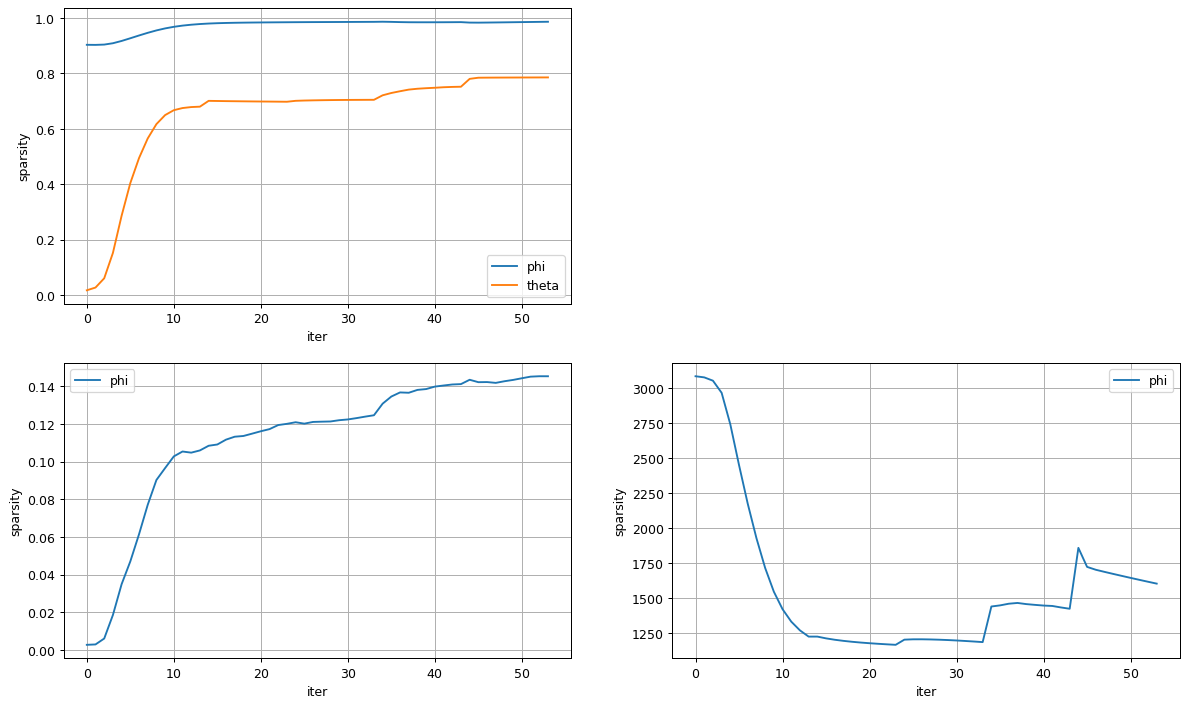

In [108]:
model.regularizers['SparseTheta'].tau = -1.6
model.regularizers['SparsePhi'].tau = -1.6
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')
    
ax = fig.add_subplot(4, 2, 3)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
s = model.score_tracker
ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
ax.legend(['phi', 'theta'])
ax.set_ylabel('sparsity')
ax.set_xlabel('iter')

In [109]:
for topic, words in model.score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in model.score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))

topic_0: нога спина живот голова рука палка ладонь прыжок пояс шаг

topic_1: родитель подруга мама свидание квартира отпуск знакомство дура девочка соседка

topic_2: правда слово ужин дело беседа приглашение время ложь пора конец

topic_3: рука боль колено нога кровь ремень плечо тело глаз равновесие

topic_4: месяц семья год родственник срок семейство время отец сын жена

topic_5: страх мгновение сознание ощущение тело ужас пот холод кожа напряжение

topic_6: образ обстоятельство достоинство случай несчастие время поведение состояние вопрос причина

topic_7: место пара случай время сторона голова рука часть половина поиск

topic_8: слава время голова часть мысль сторона рука земля год сила

topic_9: рука сила слово край труд земля сторона шаг дорога голова

topic_10: проблема встреча компания счет план интерес время деньги услуга неделя

topic_11: сила шум земля ночь ловушка шаг высота конец место воздух

topic_12: лицо выражение взгляд тон улыбка глаз любопытство усмешка удивление впечатление

topic_13: день неделя ночь время прогулка отъезд год суббота праздник час

topic_14: небо земля поле край сила сторона падение опасность обитатель время

topic_15: дело штука слово помощь место черт очередь вид случай рука

topic_16: лицо движение рука гнев глаз ярость ужас шаг плечо фигура

topic_17: результат качество число способность средство решение будущее время возможность течение

topic_18: способ речь положение исключение слух причина зрение внимание последствие репутация

topic_19: губа плечо лицо стул глаз бровь волос спинка лоб взгляд

topic_20: взгляд красота цвет девица черта глаз красавица девушка внешность волос

topic_21: рука час вид взгляд нос лицо висок внимание вода пол

topic_22: друг девчонка приятель дурак подружка дружба знакомый подросток прозвище фамилия

topic_23: нос след пятно платок стенка жара место сторона голова кусочек

topic_24: обязанность вид причина план время внимание ошибка работник мысль возможность

topic_25: год судьба существование жизнь начало большинство ценность трагедия свидетельство случай

topic_26: палец воздух звук запах ладонь рука пыль тишина ноготь голова

topic_27: комната кровать ночь спальня дом постель лестница окно пол туфля

topic_28: время множество событие глава честь начало мир город год приказ

topic_29: место сторона участок ход дом час дорога слово голова город

topic_30: стена слово рука место лицо ночь час постель труд дом

topic_31: гость хозяин дом слово год вид время слуга честь праздник

topic_32: время сторона рука дело слово год глаз место порядок дорога

topic_33: кресло помещение выход голова стена вход предмет ход подлокотник пара

topic_34: мальчишка рука пара голова ночь ухо дрянь год дорога ответ

topic_35: одежда костюм рубашка черт волос рука брюки джинсы галстук пуговица

topic_36: улыбка спасибо рука взгляд ответ жест плечо голова внимание порядок

topic_37: душа смерть закон воля добро зло слово сила мир человек

topic_38: ухо кусок рука сторона глаз земля ночь плечо голова вода

topic_39: вид время час размер место порядок конец внимание сутки ум

topic_40: тип точка вариант фамилия случай смена инструкция час зрение место

topic_41: вечер дом дело работа фамилия ужин утро командировка жена год

topic_42: глаз слеза рука щека ухо вода сторона зуб пол подушка

topic_43: очки бумага пиджак глаз надпись рука стена вид стекло оправа

topic_44: время час половина место год пара сутки порядок четверть вид

topic_45: бутылка площадка халат размер форма цвет мозги инструмент машина конец

topic_46: человек мир закон помощь земля народ время ум человечество жизнь

topic_47: утро ночь час год неделя воскресение среда пятница понедельник суббота

topic_48: воспоминание восторг слово чудо тоска память конец глаз место пора

topic_49: опасность сила мысль конец мера помощь голова ответ страх минута

topic_50: момент мысль время час желание дело ночь план попытка сторона

topic_51: центр название время форма район год вопрос вид место поиск

topic_52: ситуация действие вывод количество деталь сообщение контакт информация специалист сведение

topic_53: дом неделя год лето осень мать зима весть время счастие

topic_54: голос шаг рука голова глаз эхо шепот дыхание нотка плечо

topic_55: вещь кофе столик звонок кафе телефон заказ машина спасибо пара

topic_56: дух миг поток спутник сторона проклятие сила земля место голова

topic_57: рот грудь шея горло глаз рука затылок штаны голова волос

topic_58: обед деньги час адрес желание приезд время дом белье вопрос

topic_59: голова глаз стена сила сторона ответ взгляд время плечо внимание

topic_60: путь сотня земля тысяча голод помощь время переход запас житель

topic_61: рука сторона глаз бред сила слово ход голова молодец приказ

topic_62: место сторона ряд вид голова край конец дом земля дорога

topic_63: окно карман угол часы куртка диван ботинок улица стена пальто

topic_64: зуб секунда бок кулак голова сторона рука рукав локоть нос

topic_65: рука сторона голова фигура вид рост слово время место веселие

topic_66: год детство мечта цена время правило юность дело пора здоровье

topic_67: улица дом куча город место двор скамейка дорога небо окно

topic_68: глаз рука кожа щека бровь голова лицо вид девушка дело

topic_69: парень привет ребята мужик черт пиво паренек пара задница дружок

topic_70: свет сердце темнота тьма ночь глаз небо фонарь мрак луна

topic_71: работа разговор тема дело вопрос беседа год пауза пора пенсия

topic_72: мужчина взгляд девушка подбородок губа талия волос глаз лицо бедро

topic_73: ребенок мать рождение отец мальчик девочка малыш сын жена взрослый

topic_74: женщина муж жена волос любовник любовница прядь постель незнакомка дама

topic_75: конец дело год деньги ум случай новость мелочь план место

topic_76: вид домик конец время голова дом слово место лист окно

topic_77: голова дело время место рука конец час город дорога вода

topic_78: тень глаз веко солнце стена зрачок небо сила туман призрак

topic_79: круг мысль безумие глубина ночь стена помощь мир голова природа

topic_80: язык слово мысль память эмоция речь место пора время состояние

topic_81: отношение предложение долг роль брак супруга положение характер деньги карьера

topic_82: голова лицо лоб глаз ответ слово угол время дом молодец

topic_83: жизнь чувство прошлое любовь одиночество желание мысль ненависть страдание будущее

topic_84: время место пора слово человек вид надежда мера земля сторона

topic_85: голова рука ряд стена место сторона знак время год глаз

topic_86: место время слово человек чудо ночь мысль случай угроза мир

topic_87: конец черт вид слово взгляд рука глаз минута сторона город

topic_88: вопрос случай смысл ошибка ответ слово доказательство представитель фраза человек

topic_89: сосед время дом продукт час вид визит случай занятие пора

topic_90: смех рука перчатка лента фигурка сторона лицо взгляд цвет складка

topic_91: время часть момент конец возможность понятие слово смысл вид мир

topic_92: право опыт выбор успех степень шанс год возможность перспектива часть

topic_93: приключение предмет время место конец мера основание сомнение дело пора

topic_94: имя мнение значение поступок большинство чувство смысл уважение человек стремление

topic_95: история часть год конец век тайна время мир память вопрос

topic_96: идея суть принцип условие талант время дело профессия год метод

topic_97: дверь стол ключ ручка шкаф порог коридор окно полка туалет

topic_98: кухня чай чашка дом молоко поднос стакан завтрак посуда пирог

topic_99: минута место время год дом конец полчаса сторона ход час

topic_100: экспедиция залив мыс побережье пролив материк континент геолог берег полюс

topic_101: солдат легион армия легионер казарма новобранец центурион ветеран шеренга приказ

topic_102: член сперма членство

topic_103: сеньор дьявол испания канцлер сеньорита донья мадрид севилья сеньора барселона

topic_104: орел курьер фельдмаршал рига дыня маляр орленок решка босяк сурик

topic_105: госпожа артист сударыня зевс труппа наложница олимп мим раджа пекарь

topic_106: водка пацан че хрен мужик блин бутылка сука мент спирт

topic_107: вера учение религия христианин ученый христианство секта проповедник апостол философия

topic_108: паук нить паутина пустошь дельта паучок тарантул поселение паутинка пряжа

topic_109: сад растение пруд садовник дорожка бабочка беседка аллея клумба изгородь

topic_110: лекарь мельница зерно мельник амбар мука плотина пай зернышко жернов

topic_111: зеркало отражение ожерелие отшельник жемчужина белоснежка ящерица парикмахер горбун жемчуг

topic_112: щит шатер арена сакс кнут датчанин гладиатор британия спартанец дания

topic_113: скорость колесо мотор руль педаль шина тормоз двигатель газ асфальт

topic_114: воевода сотник татарин дружина поход дружинник ладья шуба десятник сабля

topic_115: могила кладбище гроб яма похороны лопата скелет крест склеп покойник

topic_116: россия русский турок турция армянин украина жид иностранец граница санкт-петербург

topic_117: танк снаряд ракета пушка орудие огонь позиция батарея броня атака

topic_118: школа класс урок учительница парта одноклассник грант учебник перемена занятие

topic_119: магазин витрина прилавок продавщица улица продавец тротуар магазинчик квартал бульвар

topic_120: существо создание щупальце фантом рептилия присосок отросток линза

topic_121: пещера змея змей вход грот мартен лаз гадюка зев отверстие

topic_122: берег река лодка вода течение весло речка дно камыш устье

topic_123: игра игрок тоннель кристалл лабиринт покер френч арбитр правило комбинация

topic_124: агент сотрудник бюро фбр разведка акция куратор контрразведка цру спецслужба

topic_125: ноль цифра пятерка кросс стажер четверка бугор минус тройка бур

topic_126: ад хранитель бес рай каста бургомистр грешник владычица преисподняя властелин

topic_127: сидение дверца стоянка яр микроавтобус флинт парковка кадиллак автостоянка бардачок

topic_128: человечество век цивилизация развитие природа столетие прогресс поколение тысячелетие катастрофа

topic_129: клятва братство герб иерусалим крестоносец паломник тамплиер рапира пилигрим крест

topic_130: вода бассейн дельфин дно ванна водоросль раковина кран струя осьминог

topic_131: труба мотоцикл фонарь пленка павильон байкер фотоаппарат мотоциклист купа сетка

topic_132: барак нары посылка пропуск состав урал эшелон цистерна омега карцер

topic_133: мамаша па рудник руда лесоруб рудокоп бам штольня искатель фарш

topic_134: летчик полет инструктор парашют эскадрилья звено конструктор техник техника авиация

topic_135: девушка марина спутница дикарка претендентка беглянка

topic_136: вино бокал шампанское кубок бутылка тара чаша глоток льюис изабелла

topic_137: коридор стена потолок лампа фонарик помещение проход проем отверстие плита

topic_138: мать бабушка отчим няня бабуля мамочка невестка свекровь внученька вязание

topic_139: задание миссия выполнение линк верона исполнитель

topic_140: книга библиотека страница книжка полка обложка чтение переплет библиотекарь стеллаж

topic_141: королевство корона наследник шут бишоп казначей свита глашатай скипетр бастард

topic_142: лес поляна холм ручей сосна тропинка овраг опушка чаща береза

topic_143: шоссе километр вездеход фара вышка киборг зек ангар кабина камаз

topic_144: сын сынок невестка сыночек ака свекор первенец сынишка отпрыск отец

topic_145: тина кукла карла игрушка бренд пончик карусель зайчик кукольник гам

topic_146: золото сокровище серебро богатство община слиток пра самородок самоцвет кладоискатель

topic_147: дорога обочина поворот канава колея рытвина колдобина выбоина тряска привал

topic_148: удар бокс боксер ринг чемпион левша тренировка карате раунд зритель

topic_149: инквизитор пергамент пророчество инквизиция творец мертвый манускрипт властитель фреска обелиск

topic_150: олень пастух кора стадо соболь тундра заповедник ягненок упряжка тайга

topic_151: шеф чемодан купе метро флер багаж тамбур попутчик ламберт электричка

topic_152: ива иня колючка знахарка нона клещ кукушка тук фай михайловский

topic_153: капитан боцман бак команда юнга матрос ром м-р моряк тельняшка

topic_154: договор груз сделка отчет перл подписание стандарт транспортировка доставка получатель

topic_155: крыша тележка балка орех черепица светлячок петрушка желоб головастик кровля

topic_156: служба советник комендант безопасность шахматы должность шифр гроссмейстер шахматист отставка

topic_157: матушка царица царевна рабыня мамка младенец малютка кормилица нянька горох

topic_158: бобби гитара инструмент струна футляр саванна фитиль аккорд солдатик манеж

topic_159: полковник вега гастингс миротворец фсб звание подчиненный контрразведка контрразведчик военный

topic_160: доктор врач пациент клиника болезнь лечение пациентка медицина психиатр диагноз

topic_161: посол аллах султан пророк мусульманин эмир мечеть визирь шайтан евнух

topic_162: склад территория задача хранилище пигмей

topic_163: археолог находка раскопка открытие тайник археология скульптура древность лупа захоронение

topic_164: герой г-жа злодей подвиг самоотверженность педагогика порок противоречие мораль добродетель

topic_165: сон кошмар пробуждение явь гетто подсознание бессонница бодрствование дремота сонливость

topic_166: дочь жена дочка зять тесть лира папочка доченька дочурка вдовец

topic_167: император империя императрица величество трон наместник престол правитель указ заговор

topic_168: противник поединок атака схватка дуэль соперник победа бритт секундант преимущество

topic_169: роман читатель писательница автор гранд издатель романист бестселлер персонаж трилогия

topic_170: палач казнь наказание маккензи осужденный пытка виселица преступник эшафот справедливость

topic_171: купец товар торговец лавка рынок покупатель торговля продавец цена прилавок

topic_172: лед дикарь маяк туземец льдина тюлень чайка горн айсберг сопка

topic_173: волна океан гребень пена прилив чижик брызги мираж водоворот барашек

topic_174: старик старичок барин барыня старикан старикашка кашка холуй старость тыща

topic_175: гостиная камин ковер диван мебель рози особняк люстра пианино портьера

topic_176: церковь священник монастырь епископ молитва кардинал собор настоятель монахиня часовня

topic_177: компьютер сеть программа интернет сайт монитор файл ноутбук клавиатура комп

topic_178: кровать одеяло призрак малыш привидение подушка простыня флора постель матрас

topic_179: сцена театр спектакль актер пьеса зритель публика роль актриса репетиция

topic_180: америка штат сша нефть канада оон крым корея аляска огайо

topic_181: котенок лев шерсть зверек морда рыжик львенок львица хвост мордочка

topic_182: герцог герцогиня светлость регент хаус титул герцогство бон кузен патер

topic_183: царь грек царство перс скиф афины олимпиада греция эллин хадж

topic_184: солнце горизонт закат глина восход заход светило зной прохлада солнцестояние

topic_185: дама слуга дворецкий лакей горничная кухарка кавалер керн бренди тана

topic_186: американец боевик чеченец пленный чечня заложник кавказ янки спецназ кавказец

topic_187: корабль борт команда кан порт верфь ментор отсек червоточина корпус

topic_188: пистолет бандит оружие выстрел пуля кобура ствол главарь банда курок

topic_189: озеро шар корзина стрекоза кий аллигатор бильярд кувшинка бильярдная луза

topic_190: мама папа мамочка мамуля дочка папочка доченька взрослый родитель папуля

topic_191: поверхность температура газ кислород давление слой градус баллон спасатель цилиндр

topic_192: коньяк сыщик мэр рюмка лимон калла мэрия бутылка сауна компаньон

topic_193: рей терраса пирожное жюльен апельсин крем рея вексель ростовщик кондитерская

topic_194: король маркиз величество сир трон монарх маркиза придворный подданный шевалье

topic_195: дедушка нора елка рождество подарок елочка праздник гирлянда прадедушка бабай

topic_196: миссис гордон экономка джем прабабушка бедняжка хауз домоправительница сквайр викарий

topic_197: стих поэт дневник поэзия тетрадь стихотворение строка поэма дьякон страница

topic_198: союз ссср террорист израиль кгб чекист организация нквд теракт руководство

topic_199: кот шарик скай коротышка киса котик хвост сосиска ворчун котяра

topic_200: год дата лень чес возраст полвека годовщина туберкулез летоисчисление долгожитель

topic_201: разведчик бинокль разведка наблюдатель бункер квадрат носорог кондор браконьер окуляр

topic_202: ведьма кровь оборотень пак шабаш ранка полнолуние артерия клык кровотечение

topic_203: лифт кнопка кабина кабинка шприц игла марля пожарный вестибюль ампула

topic_204: блок связь сектор норма патруль навигатор бублик сеанс шершень патрулирование

topic_205: кость хаос барьер пустота провидец бездна дурман безвременье

topic_206: сапог баня бородач батя фокусник флейта банька крысолов детина фокус

topic_207: гоблин ящер красавчик преследователь пасть дуга хвост змейка ящерка гнус

topic_208: юноша чан мотылек юнец богомол возлюбленная сверстник паренек брюшко

topic_209: проект тема материал исследование нейл рико финансирование реализация проектирование осуществление

topic_210: башня стена рис кирпич бойница кладка ниша башенка парапет зубец

topic_211: писатель автор рассказ литература произведение повесть сюжет творчество персонаж проза

topic_212: командир товарищ подполковник старшина поручик ротмистр замполит казарма штабс-капитан особист

topic_213: лестница этаж балкон ступенька сейф перила пролет площадка вахтер табличка

topic_214: флот корабль адмирал крейсер эскадра мичман ранг база линкор торпеда

topic_215: гном орден магистр адепт магистрат динар архивариус гномик народец ритуал

topic_216: милиция милиционер участковый мент дежурный славка оперативник отделение розыск опера

topic_217: бета роба альфа жучок хромой жучка кабриолет малага гамма глас

topic_218: рим римлянин г-н философ варвар патриций префект флоренция константинополь галл

topic_219: мяч клуб команда тренер спорт трибуна матч футбол стадион тренировка

topic_220: девочка питер малышка жасмин девчушка воспитанница личико платьице дочка воспитательница

topic_221: экран телевизор пульт передача программа кассета монитор клавиша диктор телевидение

topic_222: замок карета привратник ров донжон отмычка запятки подножка рессора

topic_223: китай афганистан азия иран лидер ирак демократия афганец вьетнам пекин

topic_224: мак монах джорджия послушник хьюстон лестер норманн курд ряса гуру

topic_225: молния гром гроза раскат вспышка тритон град разряд грохот зарница

topic_226: рана плащ толстяк мэтр шрам повязка рейнджер мазь ран хук

topic_227: леди лорд милорд джентльмен миледи лондон кузина кузен титул бал

topic_228: остров островок архипелаг инк лагуна островитянин материк берег горгона пальма

topic_229: доллар парк нью-йорк миллион авеню колледж цент манхеттен сан-франциско бродвей

topic_230: война армия победа командование поражение блокада военный мобилизация капитуляция бомбардировка

topic_231: свобода правительство население освобождение нация равенство независимость женева утопия говорун

topic_232: камень лик джинн кувшин лебедь камешек кремень бедуин ноша пращ

topic_233: здание фасад строение колонна постройка архитектура коронер вход мавзолей фронтон

topic_234: рюкзак гусь мирон будка крошка спичка дак маргаритка канистра крестик

topic_235: меч клинок кинжал оружие ножны лезвие рукоять сабля сталь острие

topic_236: пол кайло пицца мега пола анчоус

topic_237: араб африка грузчик европеец грим африканец алжир тюрбан гашиш негритянка

topic_238: англия европа польша поляк январь февраль сентябрь голландия варшава брюссель

topic_239: профессор ученый карандаш шпион колобок географ прутик гусляр райком чижик

topic_240: келли ранчо модель майка ковбой донна клей показ паб вирджиния

topic_241: песня музыка танец мелодия певец хор нота пение ритм песенка

topic_242: больница палата медсестра отделение санитар госпиталь носилки халат медик костыль

topic_243: старец поп посох икона борода стрелец патриарх дьяк отрок митрополит

topic_244: пленник жрица викинг дева конунг норвегия фьорд норвежец богиня туника

topic_245: баба старушка бабуля яга верблюд избушка домовой метла кикимора соловей

topic_246: видение ураган стихия смерч дриада родник потоп оберег опоссум наводнение

topic_247: бревно ведьмак гвоздь баржа руно сом кормчий зола гурия пеликан

topic_248: аббат вена аббатство аптекарь воспитатель воспитанник лазарет подопечный семинария латынь

topic_249: мистер мисс джентльмен корт бердо компаньонка кингстон пансион сити кеб

topic_250: дядюшка племянник кеш креол ана девон мор калина варан пул

topic_251: дракон крыло ярл единорог чешуя хвост валькирия коготь королевич вист

topic_252: лошадь костер конюшня стойло загон мерин хворост езда галоша вожжа

topic_253: народ еврей дер нация идиш антисемитизм антисемит еврейство народность обрезание

topic_254: метр командор высота сантиметр килограмм прожектор компас тонна диаметр грунт

topic_255: барон баронесса милочка паж ксендз дворянин жонглер мизинчик костел домен

topic_256: подготовка метод уничтожение использование применение объединение фактор действие сообщество конфликт

topic_257: медведь шаман кузнец медвежонок молот кузница медведица берлога мех мишка

topic_258: кол башмак колпак ода сапожник атлас жаворонок пегас универсал шпиль

topic_259: отряд джунгли самец самка пионер вожатый следопыт тик вожатая раек

topic_260: финн татуировка чары вир фортуна сида медиум ранец маятник тату

topic_261: машина водитель автомобиль руль стекло фара капот двигатель обочина светофор

topic_262: пустыня гриб буря оазис бархан пласт боровик песчинка грибник поганка

topic_263: зал торн ария аплодисменты лайт люстра присутствующий овация паркет гермафродит

topic_264: мальчик люк мальчишка честер мальчуган взрослый парнишка липка сорванец худышка

topic_265: майор прапорщик капрал застава пограничник старлей диверсант прапор граница нарушитель

topic_266: общество муза скука

topic_267: казак атаман хата эрл мул шашка сало ус благородие барка

topic_268: письмо любовь переписка влюбленность разлука постскриптум страсть взаимность привязанность ревность

topic_269: фильм режиссер кино съемка студия сценарий актер роль актриса продюсер

topic_270: ребята рута чет оливье чета пион ребятки хай

topic_271: мужик телега сено цыган ярмарка воз писарь извозчик обоз подвода

topic_272: колодец столб оракул хорек идол хлыст предсказание моль сруб клуня

topic_273: скала камень ущелие обрыв склон валун утес выступ пропасть расщелина

topic_274: уровень феникс персонаж характеристика сито навык мана бонус единица интеллект

topic_275: шляпа шляпка конюх мусорщик гортензия сюртук жилет таз лаванда убор

topic_276: брат близнец братец обитель настоятельница келья братишка послушница братик монашек

topic_277: толпа площадь помост фонтан зевака горожанин давка гул возглас выкрик

topic_278: воин раб копье меч шлем доспехи оружие кольчуга топор секира

topic_279: камера инженер аппарат оператор кадр микрофон эфир кабель объектив ток

topic_280: форт колония портал колонист кадет защитник улей коммодор поселенец переселенец

topic_281: карта колода бек крот гадалка конек каток таро лавина гадание

topic_282: суд закон гражданин приговор трибунал ленинград кореец арестованный штраф мэн

topic_283: наука знание физик изобретение изобретатель гороскоп нло познание изучение теоретик

topic_284: крыса подвал сторож решетка клад пастор прут погреб сторожка крысенок

topic_285: прибор устройство изображение приемник провод кубик радио передатчик схема установка

topic_286: конь лошадь всадник седло копыто жеребец кобыла повод скакун лошадка

topic_287: конверт письмо записка листок бумага почта ион почерк адрес открытка

topic_288: колдун орк повелитель свиток колдовство предводитель чернокнижник порча знахарь паладин

topic_289: газета журнал редактор редакция объявление страница текст корреспондент заметка заголовок

topic_290: вика пирожок корка бор лен бульдозер теплица старьевщик боров дрель

topic_291: стрела лук крепость лучник тетива наконечник колчан ров копье дротик

topic_292: дождь лужа капля погода ливень зонтик грязь туча дождик дождевик

topic_293: автобус сумка остановка трамвай кейс троллейбус блондин брюнет чемоданчик киоск

topic_294: мешок бочка крокодил русалка краб трос крюк бегемот бочонок чебурашка

topic_295: негр шпага плантация индус невольник мушкетер орлеан чернокожий мушкет плантатор

topic_296: цепь цирк череп узник дубинка тюремщик громила кандалы бэби железяка

topic_297: партия комитет политика выборы вашингтон политик парламент конгресс съезд кампания

topic_298: дед внук внучка мороз прадед дедуля снегурочка снеговик правнук внучок

topic_299: чиновник губернатор жандарм каин взятка дознаватель сантьяго облигация каторжник управа

topic_300: хлеб печь дрова печка изба миска каша ложка котел котелок

topic_301: огонь пламень свеча пожар очаг искра огонек свечка воск лот

topic_302: бабка маринка дача велосипед картошка дядька чип огурец трактор мурка

topic_303: телохранитель гильдия перстень вельможа мантия ступень зала балахон маскарад печатка

topic_304: музыкант нищий гимназия мосье образование бедняк кабачок богач пианист оборванец

topic_305: система организм вирус ген среда технология болезнь бактерия днк пси

topic_306: вулкан кратер лава землетрясение пар пепел извержение конус рэп разлом

topic_307: пан бык рог тур шакал фру зубр бычок ом булла

topic_308: незнакомец трость спаситель набалдашник двуколка тросточка наглец негодяй

topic_309: забор поселок калитка туман коза огород курица петух жук комар

topic_310: палуба борт судно матрос катер яхта пароход команда причал корма

topic_311: робот андроид механизм клон создатель аврора манипулятор пылесос тат аккумулятор

topic_312: судья сет арчи цыганка талия астра ар честь жюри суккуб

topic_313: бригада строй мусор молчун свалка омар леденец повстанец глухарь катапульта

topic_314: фриц окоп фашист дот плен полицай блиндаж сухарь немка коммуна

topic_315: пилот отсек система скафандр двигатель капсула управление люк контейнер модуль

topic_316: платье роза юбка наряд шелк чулок ткань подол лиф туфля

topic_317: убийца жертва похититель похищение насильник насилие психопат душитель удушение садист

topic_318: автомат грузовик джип кузов кабина трасса ягуар трейлер пикап фура

topic_319: запад восток странник равнина перевал хребет плато беглец каньон брод

topic_320: гора долина вершина склон ущелие подножие панама отрог гряда кряж

topic_321: миля фут ярд длина высота развалины водопад ширина расстояние арка

topic_322: помощник академия штурман старпом риза линь оружейник гардемарин секундомер голуба

topic_323: эль берн дейл чикаго кукуруза курятник аут початок оникс молочница

topic_324: документ ящик папка бумага портфель бланк кипа копия ящичек содержимое

topic_325: гонка ледник носильщик общежитие клин альпинист восхождение маршрут гонщик тибет

topic_326: париж франция дворянин аристократ версаль католик ришелье нормандия фаворит гугенот

topic_327: принц принцесса высочество золушка престол трон придворный кортик фрейлина кронпринц

topic_328: картина художник портрет искусство рисунок галерея краска выставка живопись полотно

topic_329: самолет аэропорт пилот посадка рейс аэродром стюардесса истребитель кабина механик

topic_330: мастер мастерская клоун гарда маэстро подмастерье линкольн антиквар ремесло геркулес

topic_331: канал комплекс федерация координатор голландец контрабандист носитель содружество амстердам альянс

topic_332: корова поле овца свинья луг сани скот хутор молоко баран

topic_333: кролик гоголь удав критик питон сингапур пух критика гипноз рецензия

topic_334: вор хантер кража маньяк дань зэк авторитет братва уголовник конвоир

topic_335: взрыв сирена бензин авария мотель взрывчатка сьерра автострада указатель шевроле

topic_336: индеец фургон рок пони бизон хоббит прерия траппер техас мексиканец

topic_337: энергия мозг эксперимент академик пространство частица измерение материя атом излучение

topic_338: поезд вагон вокзал станция платформа пассажир перрон рельс паровоз машинист

topic_339: крестьянин господь грех имение помещик милость губерния ямщик верста уезд

topic_340: бог богиня владыка колесница троя божество смертный лотос покровитель мифология

topic_341: животное яйцо обезьяна воробей детеныш плод банан обезьянка пища невидимка

topic_342: студент институт экзамен преподаватель курс факультет ректор аудитория занятие диплом

topic_343: оружие корпус арсенал нападение снаряжение боеприпасы тактика амуниция агрессор самооборона

topic_344: процесс явление изменение воздействие фантастика вещество цикл элемент матрица свойство

topic_345: старуха тролль козел груша столяр алхимик оскар слива тис мартышка

topic_346: музей коллекция экспонат мамонт коллекционер посетитель см экспозиция эпоха стенд

topic_347: фирма клиент офис агентство бизнес контракт менеджер бизнесмен заказчик реклама

topic_348: клан кон вал лига певица синдикат беркли союзник мета прайд

topic_349: войско флаг победа штурм полководец мятежник военачальник конница приказ неприятель

topic_350: лаборатория операция ассистент препарат микроскоп икс доцент колба пробирка лаборант

topic_351: сигнал код терминал сканер космопорт дисплей датчик коммуникатор частота голограмма

topic_352: храм жрец алтарь святилище служитель обряд писец атлантида тир казимир

topic_353: рабочий цех пристав стройка станок плотник молоток городовой арестант строитель

topic_354: акула абориген пингвин медуза ловец пловец надсмотрщик плавник нептун ласт

topic_355: телефон трубка фотография номер звонок снимок гудок мобильник фото фотограф

topic_356: линия цель треугольник

topic_357: кольцо доска коробочка колечко сверток крышка ободок стамеска обруч гравировка

topic_358: шахта старейшина врата посланник шахтер посланец хала цербер клеть курия

topic_359: господин сказка портной сказочник поклон задоринка позволение

topic_360: такси салон таксист водитель мерседес бригадир джи багажник форд тачка

topic_361: квартира подъезд жилец соседка прихожая сосед ремонт ключ жилье кухня

topic_362: китаец блоха падре гонконг шанхай бум зорька вьетнамец китаянка азиат

topic_363: тарелка мясо еда блюдо суп сыр вилка повар салат масло

topic_364: убийство следователь преступление расследование преступник эксперт свидетель допрос следствие показание

topic_365: ангел софия больной хирург стоун лекарство сиделка болезнь бамбук больная

topic_366: ветер небо облако туча порыв горизонт вихорь радуга синева мгла

topic_367: немец комиссар фронт курсант партизан шинель землянка красноармеец училище фашист

topic_368: сестра сестренка сестрица сударь сестричка юла близнец двойняшка искательница

topic_369: москва паспорт волга москвич киллер хит кремль саратов мафия прописка

topic_370: яд конкурс приз победитель турнир чума состязание ложа мирра участник

topic_371: снег зима мост мороз сугроб шапка лыжа холод метель весна

topic_372: дом крыльцо веранда коттедж шкатулка домик лужайка тэк жилище пристройка

topic_373: завод рубль шофер фабрика копейка телеграмма теща производство комбинат слесарь

topic_374: банк университет банка банкир декан кафедра кассир семинар матадор кампус

topic_375: охотник зверь охота добыча хищник мясо шкура кабан дичь леопард

topic_376: труп след мертвец отпечаток покойник морг вскрытие патологоанатом осмотр судмедэксперт

topic_377: цветок букет муха ваза лилия лепесток стебель нарцисс одуванчик орхидея

topic_378: веревка узел петля шнур кляп моток веревочка сыч бечевка ляжка

topic_379: кара пани маменька прага зонт борщ варшава батенька краков каре

topic_380: планета космос система марс орбита галактика звездолет пространство вселенная скорость

topic_381: рыцарь юпитер оруженосец доспехи латы бич менестрель турнир шлем вассал

topic_382: революция борьба коммунист коммунизм восстание будда лама борец социализм интеллигент

topic_383: деревня повозка староста топор село изба селянин малец деревенька односельчанин

topic_384: мадам ресторан официант столик кафе месье официантка мадемуазель мсье меню

topic_385: эльф раса часовой жезл друид полукровка ларь воительница лима сородич

topic_386: директор уборщица завхоз детдом коллектив заведующая агроном киргиз дирекция картуз

topic_387: посольство дипломат республика швед одесса большевик швеция держава серб атташе

topic_388: земля вол вар циклоп урожай земледелец плуг посев пашня засуха

topic_389: учитель ученик колокол лит древо звонарь ибис ленточка ученичество звон

topic_390: граф сиятельство скачки камердинер милорд титул ипподром жокей дерби графа

topic_391: генерал превосходительство командующий адъютант мундир штаб генерал-майор генерал-лейтенант главнокомандующий чин

topic_392: пират болото плот лягушка черепаха пчела ягода дырка насекомое кочка

topic_393: совет государство столица консул провинция протектор стратег эмиссар катар сторонник

topic_394: звезда землянин пришелец инопланетянин астроном марсианин созвездие телескоп обсерватория сириус

topic_395: хозяйка служанка гувернантка гостья пьеро прислуга ричмонд гас чепец одр

topic_396: каюта пассажир шлюпка койка палуба вахта трап стюард теплоход борт

topic_397: билет концерт наркотик музыка сигара таможенник панк виза таможня наркоман

topic_398: дядя тетя пат родственник родственница гармошка кренделек гостинец инвалид

topic_399: вертолет мина десантник рация снайпер винт радист вертушка кишлак гранатомет

topic_400: мышь сова мышка лапка мышонок филин хвостик хвост норка личинка

topic_401: джин рейн вечеринка гольф коктейль харт мартини портер клюшка тоник

topic_402: государь батюшка девка богатырь боярин государыня царевич чин горница слобода

topic_403: демон чародей наставник амулет целитель зелье магия пентаграмма экстрасенс ритуал

topic_404: германия фон фюрер берлин герр фрау рейх эсэсовец гестапо нацист

topic_405: отец мать пенни челси альма лэнгли макси папочка

topic_406: зона сталкер бродяга мутант лось артефакт аномалия периметр новичок хомяк

topic_407: лондон фунт шотландия шиллинг роуд пенс оксфорд ирландия диксон стерлинг

topic_408: факел металл гигант подземелье железо пластина скорпион осколок титан стержень

topic_409: сэр сержант шарп француз харпер джентльмен якут ирландец веллингтон британец

topic_410: клетка зоопарк шах алмаз двойник горилла шимпанзе ювелир кобра обезьяна

topic_411: тетушка кэт виконт мода племянница родня бел франт инжир родственница

topic_412: буква надпись аукцион каталог образец булавка алфавит продажа изделие подделка

topic_413: боб тигр павлин домино тигрица тигренок дрессировщик утюг перчик тумба

topic_414: полк рота варяг пехота взвод знамя гвардия пехотинец батальон ротный

topic_415: маска прорезь крик нетопырь полумаска эспланада

topic_416: лапа чудовище коготь клык хвост чудище мрак рычание рык прыжок

topic_417: бар стакан стойка бутылка бармен висок столик напиток глоток порция

topic_418: невеста свадьба жених бал помолвка церемония вдова свекровь приданое танец

topic_419: статуя фараон египет пирамида мумия гробница эра памятник египтянин саркофаг

topic_420: начальник отдел заместитель начальство охрана совещание зам подчиненный руководитель кадры

topic_421: мир максвелл затворник хомячок сотворение синоним множественность социум бытие

topic_422: картер пузырь бостон магнитофон пейджер бит бита иллюзионист торонто эскиз

topic_423: тропа караван проводник путник кентавр погонщик дубина караванщик такса тюк

topic_424: графиня бриллиант мачеха управляющий драгоценность барышня папенька колье серьга украшение

topic_425: нож тварь монстр книжник шип щупальце рукоятка ножик уродец слизь

topic_426: тысяча франк ньютон октава доход расход архитектор прима ливр тринити

topic_427: дым ограда вой гарь сажа рокот копоть варна монтировка бобрик

topic_428: слон великан ворона ворон голубь дуб леший хобот пень желудь

topic_429: ферма поместье городок фермер округ графство акр владение арендатор землевладелец

topic_430: управление фонд департамент кредит данные запрос резидент лицензия заявка сигма

topic_431: тайга сибирь канцелярия ткач генерал-губернатор байкал иркутск артель сибиряк архангельск

topic_432: сан японец япония самурай путешественник переводчик токио кимоно гейша сэнсэй

topic_433: город горожанин барабанщик окраина барабан городишко пригород

topic_434: шериф револьвер коляска карлик кучер грабитель салун дилижанс кольт возница

topic_435: мелисса шейх пластинка интернат лицей англичанка проигрыватель корн анис сайда

topic_436: кабинет секретарь секретарша приемная заведующий посетитель селектор психоаналитик поликлиника посетительница

topic_437: август март сенатор май июль июнь апрель ноябрь октябрь декабрь

topic_438: турист оркестр гид экскурсия куб экскурсовод дирижер приезжий путеводитель прораб

topic_439: рукопись издательство смотритель издание издатель печать сочинение собрание экземпляр типография

topic_440: луна трава жаба малина крапива роса лопух травинка полнолуние земляника

topic_441: индия венеция путешествие гондола дож индиец бомбей венецианец сари калькутта

topic_442: информация архив организация досье сведение деятельность аналитик утечка консультант разработка

topic_443: лекция математика физика формула химия математик химик гей уравнение диссертация

topic_444: мороженое переулок таверна рен мур мура травка кнопочка лучик прохожий

topic_445: пуля выстрел винтовка патрон оружие ствол стрельба пулемет граната прицел

topic_446: тело мышца конвульсия гениталии позвоночник

topic_447: племя вождь хижина воин селение шкура барс копье соплеменник жилище

topic_448: собака пес щенок лапа лай собачка сев поводок хвост хозяин

topic_449: дерево ветка ствол ветвь лист корень крона листва сук дупло

topic_450: маг магия заклинание фея заклятие дар некромант артефакт медальон аура

topic_451: дон разум вселенная сатана мироздание мечтатель ясновидец истина книгочей пеня

topic_452: англичанин битва сражение шотландец британец осада победа перемирие поражение кантон

topic_453: номер отель гостиница портье администратор постоялец босс швейцар клерк клайд

topic_454: лейтенант офицер командир штаб приказ батальон комбат рота состав подразделение

topic_455: ворота створка лемех пахарь засов заимка караульный караулка скоба борозда

topic_456: стрелка испанец стрелок рейд гарнизон португалец португалия лиссабон квант гренадер

topic_457: репортер список чек интервью пресса майами вырезка газетчик ленч гангстер

topic_458: марш ставка папироса йорк выигрыш туз пари валет ландо портсигар

topic_459: полиция полицейский инспектор детектив констебль копа стрит участок расследование ребус

topic_460: док диск купол луч дока спираль импульс виток душка сток

topic_461: адвокат прокурор председатель обвинение юрист присяжный обвиняемый процесс свидетель прокуратура

topic_462: стая браслет чужак лей северянин волчонок фауна кокон стервятник дозорный

topic_463: статья журналист культура энциклопедия журналистика меценат обозреватель юбиляр писака каюк

topic_464: королева дворец стражник колдунья стража трон фрейлина придворный покой правительница

topic_465: хозяин пиво монета кружка трактир трактирщик кошелек монетка кружок мясник

topic_466: сигарета пачка зажигалка окурок пепельница гараж бомж касса табак затяжка

topic_467: степь хан вожак орда кочевник юрта монгол курган бат степняк

topic_468: рыба рыбак рыбка удочка рыбалка крючок аквариум щука леска рыбина

topic_469: песок море пляж берег пальма прибой купальник дюна солнце санаторий

topic_470: враг правитель предатель кун предательство огрызок аид захватчик недруг отступник

topic_471: червь людоед волшебница страшило мешочек ласточка дровосек чучело червяк стелла

topic_472: контора завещание маршал петербург наследство нотариус прииск старатель имущество капитал

topic_473: род налог потомок сборщик родоначальник родословная генеалогия продолжатель

topic_474: волк ружье заяц лиса лис егерь утка лисица волчица еж

topic_475: президент министр депутат министерство премьер-министр правительство заседание кандидат премьер доклад

topic_476: вампир волшебник зомби упырь клык нежить арт дюк нечисть мертвяк

topic_477: разбойник наемник стража страж гвардеец арбалет гонец горец болт тракт

topic_478: поцелуй губа желание грудь секс бедро страсть сосок объятие прикосновение

topic_479: перо амазонка мексика чернила выдра чернильница каноэ бразилия сельва чили

topic_480: группа палатка полог снаряжение руководитель поисковик тент ночевка полиэтилен бивак

topic_481: кит теория корь динозавр эволюция неандерталец млекопитающее папаня относительность кашалот

topic_482: кошка тетка белка белок петушок липа веник тетенька уголек хмель

topic_483: куст человечек папаша поросенок сирень гвоздик шиповник пятачок акация заросль

topic_484: бой боец раненый фляга фляжка таран быдло кнехт атака заслон

topic_485: экипаж рубка челнок лайнер кораблик обшивка бортинженер кают-компания пробоина рейс

topic_486: вилла лимузин лос-анджелес вест люкс танцор мара фен пупс лайн

topic_487: охранник коробка пакет таблетка конфета аптека аспирин упаковка фантик коробок

topic_488: море берег парус моряк судно порт бухта мачта шторм гавань

topic_489: птица попугай гнездо клюв кай птичка лиана рено птенец цапля

topic_490: легенда семя бард миф талисман предание мандарин эликсир сказание сокровищница

topic_491: синьор италия синьора итальянец торт мел паоло милан неаполь мадонна

topic_492: власть символ

topic_493: ведро сундук уголь таракан саквояж гель ромашка швабра ведерко каштан

topic_494: деньги сумма купюра казино тысяча пачка бакс бумажник процент мойра

topic_495: князь боярин княгиня русь киев княжна новгород волхв княжество дружина

topic_496: лагерь север юг муравей муравейник южанин куколка термит тля сладкоежка

topic_497: двор сарай яблоко дворник ослик осел тополь крыльцо сарайчик песочница

topic_498: станция база объект спецназовец полигон контролер спецназ группировка подразделение наблюдение

topic_499: страна родина грузин грузия тбилиси землячка чужбина отчизна

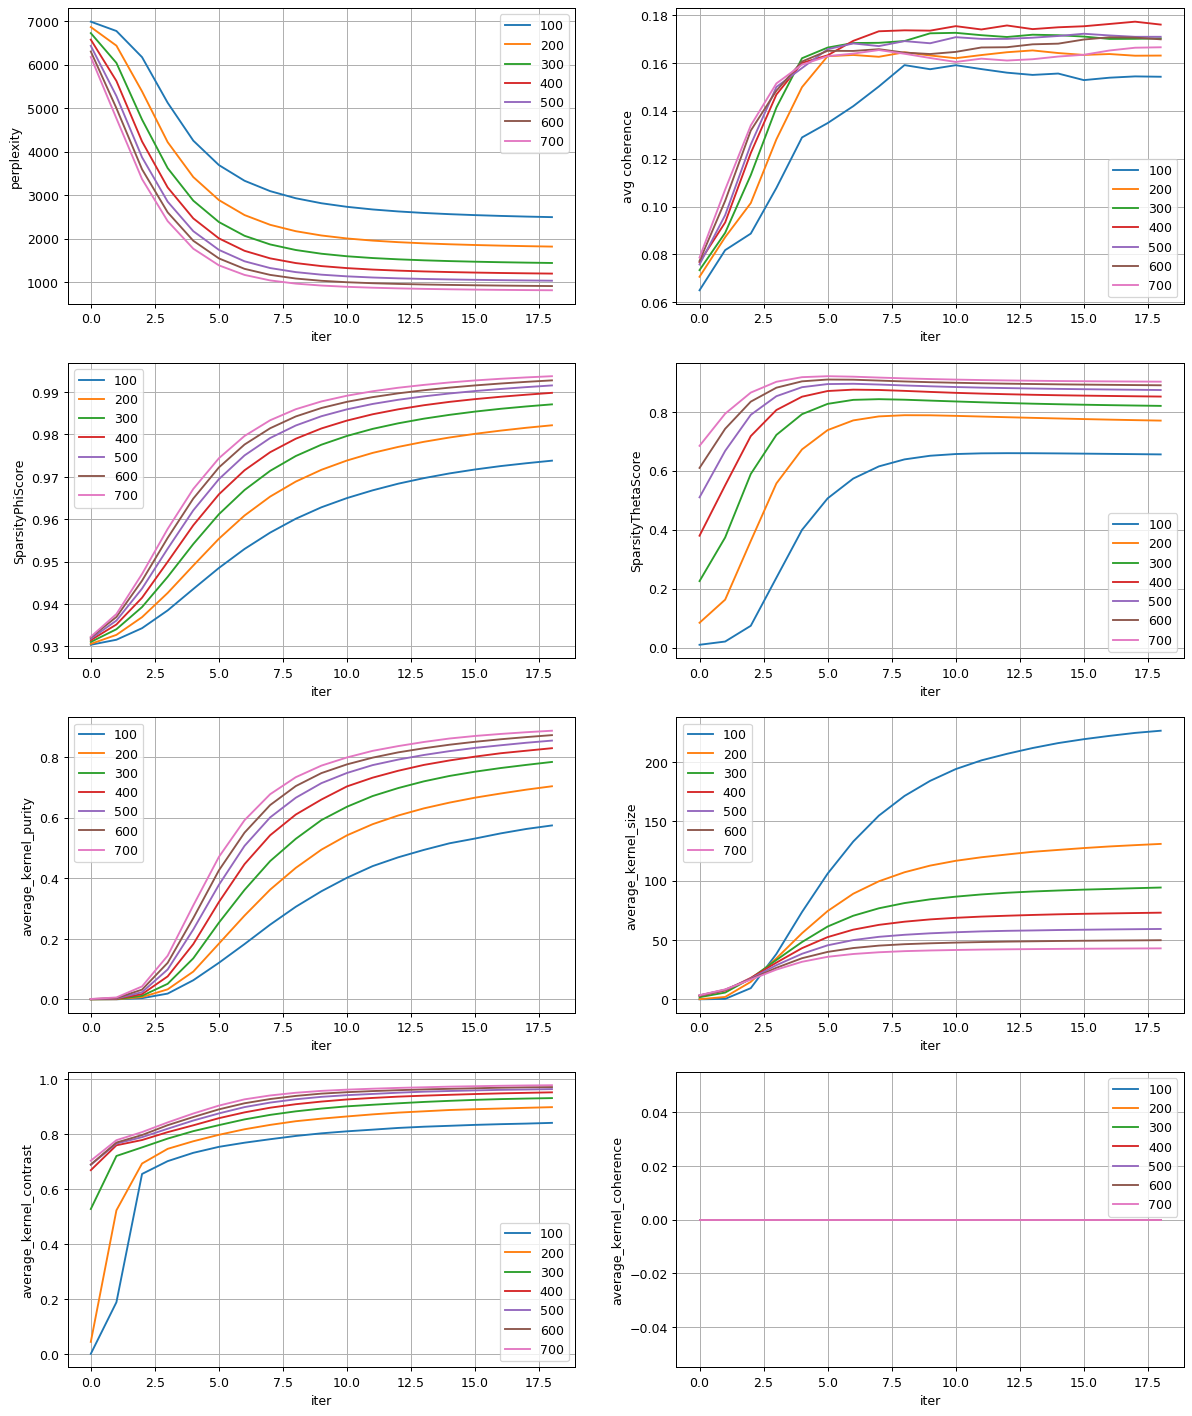

In [436]:
fig = plt.figure(figsize=(16, 20), dpi=90)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['PerplexityScore'].value)-1), s['PerplexityScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('perplexity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 2)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopTokensScore10'].average_coherence)-1), s['TopTokensScore10'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('avg coherence')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 3)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityPhiScore'].value)-1), s['SparsityPhiScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityPhiScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 4)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['SparsityThetaScore'].value)-1), s['SparsityThetaScore'].value[1:])
    ax.legend(n_topics)
    ax.set_ylabel('SparsityThetaScore')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 5)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_purity)-1), s['TopicKernelScore'].average_purity[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_purity')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 6)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_size)-1), s['TopicKernelScore'].average_size[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_size')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 7)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_contrast)-1), s['TopicKernelScore'].average_contrast[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_contrast')
    ax.set_xlabel('iter')

ax = fig.add_subplot(4, 2, 8)
ax.grid()
for model in models:
    s = model.score_tracker
    ax.plot(range(len(s['TopicKernelScore'].average_coherence)-1), s['TopicKernelScore'].average_coherence[1:])
    ax.legend(n_topics)
    ax.set_ylabel('average_kernel_coherence')
    ax.set_xlabel('iter')

In [519]:
for topic, words in models[3].score_tracker['TopTokensScore10'].last_tokens.items():
    weights = [w for w in models[3].score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    tokens = [f'{topic}:', *words]
    weights = [0, *[w * 5 for w in weights]]
    draw_html(zip(tokens, weights))
#     print('{0}: {1}'.format(topic, ' '.join(words)))

topic_0: грязь треск заросль бег погоня овраг преследователь сова четвереньки просвет

topic_1: май июнь октябрь апрель январь декабрь ноябрь продавщица февраль календарь

topic_2: государь иностранец указ кремль отечество одесса императрица государыня санкт-петербург заговорщик

topic_3: вера религия христианин пророк откровение культ фанатик католик последователь единство

topic_4: туалет игрушка пятерка бутылочка кроватка братишка паста веревочка пеленка тапок

topic_5: песок горизонт пустыня жара кромка прохлада жажда лавина прибой зной

topic_6: фон барон переводчик баронесса добродетель иероглиф личина мыслитель алчность притча

topic_7: житель поселок обитатель гильдия приезжий пустошь гранит адепт население алхимик

topic_8: литература баня училище сочинение общежитие биография медаль ленинград повесть гоголь

topic_9: сидение водитель спинка шофер дверца лимузин швейцар баранка фольксваген аврора

topic_10: грех батюшка поп шарп сукно приказчик дурень гордыня слобода сват

topic_11: салон зажигалка окурок брюнетка пепельница стерва пароль регистрация евро наушник

topic_12: норма кайло дворник корка мясник пицца боксер почтальон ринг аттракцион

topic_13: тоска дрожь прикосновение шепот ресница горечь личико незнакомка попугай смятение

topic_14: бригада гад сука цех клин соловей сучок оракул репа ходок

topic_15: кабина мотор пират дырка сирена комбинезон парашют рев дирижабль металлолом

topic_16: дед гриб кора пласт хала грибник кордова лукошко шампиньон грибница

topic_17: планета цивилизация раса галактика абориген инопланетянин тысячелетие представитель катастрофа население

topic_18: сэр джентльмен ослик баронет денди мистрис манера бедняга суссекс пикадилли

topic_19: люк грим амеба несварение бакен текс прагматизм хмыканье вельвет бесстрастие

topic_20: пламень тварь грохот вспышка осколок искра ловушка разрыв пепел вихорь

topic_21: племя вождь предок стадо овца пастух японец япония роба обычай

topic_22: звон колокол поручик медь голубчик колокольня промысел пуд благородие уксус

topic_23: степь хан кочевник подкова слива монгол юрта шпора разъезд шаровары

topic_24: марка коллекция заметка телеграмма миллионер журналистка коллекционер янки бел посетительница

topic_25: аппарат модель пленка провод микрофон контейнер рычаг лента значок катушка

topic_26: площадка полка белье подоконник свитер занавеска рама ступня шарф брюки

topic_27: озеро долина рыбка водопад ливень аквариум баржа поток фауна водоем

topic_28: палач предатель виконт старейшина торн графство сакс британия ягненок перемирие

topic_29: мешок усадьба селение урожай шайка деревушка тракт пшеница леопард оборванец

topic_30: пальто дверца тротуар лужа переулок асфальт прохожий продавец прилавок улочка

topic_31: яйцо рис орех лень зять переезд цыпленок апельсин лапша скорлупа

topic_32: приказ сержант звание пленный новобранец присяга рядовой беркут пакистан командование

topic_33: труба лампа крышка подвал плита колодец лабиринт мумия штукатурка слепой

topic_34: орк стандарт властелин сородич хоббит канон нелюди стилет хук твердыня

topic_35: лодка весло акула водоросль краб плеск камыш тростник ракушка плавник

topic_36: статья материал текст иллюзия экземпляр сюжет раздел фантастика перевод цикл

topic_37: подросток игла укол парнишка красавчик доза разборка шприц крепыш шашка

topic_38: волк вой оборотень свора полнолуние брод волчонок белоснежка сатира пак

topic_39: поход копье пленник шаман гоблин плен орда набег вояка клич

topic_40: трамвай альбом туземец творец гей каста потоп оса панк отброс

topic_41: тетка дача портфель командировка справка шашлык арбуз павлин петушок коммуналка

topic_42: диплом псих зараза справочник язва инфаркт скорпион моча отравление извращенец

topic_43: мозг лаборатория орган сосуд аптека галлюцинация печень препарат ассистент почка

topic_44: свобода уверенность презрение инстинкт месть обаяние манера спокойствие скромность привычка

topic_45: психолог предательство измена подлец вранье домработница порча показ аборт харя

topic_46: слуга карета милость англичанин лакей камзол камердинер поклон щеголь ливрея

topic_47: наркотик щелчок барьер комбинация наркоман одеколон употребление кокаин комикс героин

topic_48: шах афганистан мусульманин гарем олух мечеть эмир иран баку кишлак

topic_49: шляпа квартал витрина вывеска дань магазинчик монахиня убор пикап донна

topic_50: король величество трон корона придворный дворец монарх свита королевство фрейлина

topic_51: отряд район пост территория банда патруль крым украина соединение резерв

topic_52: стая покойник шапочка вожак киллер филин метка жучок волчица браконьер

topic_53: цилиндр костяшка плесень весы радиостанция гранд хам стервятник тезка фора

topic_54: полет космос орбита материя отсек кристалл звездолет кислород ось космонавт

topic_55: кафе кран лимон сериал чадо турция фужер шик чипсы балбес

topic_56: демон кошмар облик кара создатель обличие пантера уродец создание зев

topic_57: конь всадник седло разбойник копыто скакун дыбы стремя барс галоп

topic_58: молния фут ремень джин гром туча дюйм гроза дуга прилив

topic_59: браслет напарник казино линза ячейка шестерка спец жетон клещ мегаполис

topic_60: прибор механизм давление температура вещество оборудование градус конструкция ток масса

topic_61: противник атака позиция разведчик орудие пулемет батарея маневр граната прикрытие

topic_62: дура злость морда рывок сволочь урод козел коленка истерика шлюха

topic_63: куртка ботинок носок обувь проспект подошва шнурок вешалка бомж штаны

topic_64: холм облако яблоко бабочка роща облачко ветерок червяк кузнечик туча

topic_65: мальчишка ступень особняк ограда аллея набережная мостовая фасад дворик ров

topic_66: мечта одиночество отражение юность грусть помада свежесть влечение тушь полнота

topic_67: команда клуб игрок трибуна футбол матч стадион болельщик футболист девон

topic_68: крошка сахар порошок пирожок капуста шкафчик матрас сандалия кубик баночка

topic_69: стакан бар стойка посетитель глоток напиток стаканчик бармен спиртное завсегдатай

topic_70: папка объявление сейф приятельница каталог начальница имидж хобби студентка трейлер

topic_71: отдел сотрудник охрана безопасность организация совещание корпорация террорист фсб слежка

topic_72: драка цыган стычка цыганка сухарь гам теплоход вилы севок потасовка

topic_73: зверь охотник охота медведь рог олень дичь кабан туша лось

topic_74: папочка эра темперамент ирландец харпер орлеан диксон иезуит гортензия чили

topic_75: мышь хор котенок лапка лягушка камешек пик ушко писк отшельник

topic_76: клетка велосипед бак прут зоопарк джи рози леденец медуза педаль

topic_77: ангел майка рок цветочек веснушка сарафан морковка бегемот стриптиз столяр

topic_78: идиот ребро штаны дерьмо дружок зад физиономия паренек слюна придурок

topic_79: каюта флот койка адмирал моряк эскадра кают-компания старпом верфь линкор

topic_80: следователь заключение следствие расследование допрос показание протокол прокуратура департамент экспертиза

topic_81: самолет аэропорт посадка полоса рейс полет стюардесса перелет пассажир лайнер

topic_82: искусство стих поэт произведение гений строка творчество творение поэзия стихотворение

topic_83: путешествие длина карандаш путешественник шпион ширина трос полюс пончик приключение

topic_84: капитан помощник док командор ранг дока зек обязанность распоряжение пауза

topic_85: начальник начальство должность чиновник комитет министерство учреждение канцелярия сослуживец арест

topic_86: девчонка дневник учебник оценка отметка сережка школьница балл раздевалка одноклассница

topic_87: ресторан заведение официант меню кабинка ресторанчик подворотня храп забегаловка метрдотель

topic_88: журнал бизнес бизнесмен пресса интервью репортер выпуск бобби карьера лос-анджелес

topic_89: билет записка рукопись пьеса издатель псевдоним отзыв абзац лотерея маркер

topic_90: колесо платформа тележка дельфин свисток поручень спица скат мундштук пря

topic_91: вампир клык кол нечисть лиана превращение укус упырь нежить пиявка

topic_92: проект кит транс атом гамма молекула детище росток рейтинг ракетка

topic_93: боб сыщик юпитер бич гордон вест франклин меркурий портер кука

topic_94: журналист предприятие заместитель профессионал авторитет конкурент заказчик банкир гонорар исполнитель

topic_95: борода гном карлик грузин грузия народец харьков бургомистр карапуз тбилиси

topic_96: россия государство союз культура революция китай историк демократия эпоха большевик

topic_97: старушка соседка балкон скамейка чердак собачка лавочка сквер скамеечка мансарда

topic_98: гостиная холл камин сити пат жасмин патриций софа фен ступенька

topic_99: офицер армия полк военный гвардия штык парад войско командование штаб

topic_100: знание ученик испытание академия обучение воспитание умение мастерство дисциплина преподаватель

topic_101: солдат госпиталь легион ветеран штурм доброволец шеренга легионер полководец корея

topic_102: маг заклинание портал стихия сенатор магия аура защита заклятие плетение

topic_103: граф сеньор софия сударь маршал кэтти сеньорита бри графа рэп

topic_104: экипаж повозка кучер картер извозчик козлы возница чан фортуна вожжа

topic_105: мастерская перила открытка клоун уборная набросок блестка эскиз мазок палитра

topic_106: рак медик шов санитар спирт носилки кишка инвалид помойка перелом

topic_107: ученый загадка пирамида верблюд зомби древность секта горб ньютон мечтатель

topic_108: подчиненный наблюдатель вал курсант инструктор застава кон пограничник построение нарушитель

topic_109: супруга отъезд скандал близнец супруг ссора мел беременность роды ланч

topic_110: мука стражник зерно страж мельница гвардеец навоз плотина мельник прачка

topic_111: маска италия венеция прорезь милан карнавал розочка гондола воздержание итальянка

topic_112: шапка рубаха ворона сабля шатер ворон солома варвар теленок киммериец

topic_113: больница отделение палата пациент медсестра дежурство кушетка пострадавший ширма пациентка

topic_114: изба казак верста татарин сотник сени атаман хутор обоз горница

topic_115: могила кладбище памятник находка лопата прах умерший холмик железяка надгробие

topic_116: спальня диван шкаф подушка ковер мебель прихожая простыня штора тумбочка

topic_117: километр металл ракета гул установка броня пластина бункер магнит титан

topic_118: класс столовая учительница тетрадь перемена кружок школьник одноклассник четверка тетрадка

topic_119: автомобиль руль стоянка джип фара багажник перекресток тормоз капот парковка

topic_120: стиль реклама изобретение интерьер неудачник дизайнер отделка концепция производитель индивидуальность

topic_121: бой победа войско битва сражение схватка поражение сопротивление беглец оборона

topic_122: кольцо орел лепешка колдунья ярмарка баран флора колечко креол циновка

topic_123: сумма фунт наследство имущество жилье завещание коттедж владелец капитал доля

topic_124: институт лекция блок комплекс премия пропуск психология специальность химик заведующий

topic_125: сигарета пачка задница шоу минус фильтр плюс курение сучка восьмерка

topic_126: подруга косметика будильник шпилька зануда бренд дружба деточка ровесница стелла

topic_127: бандит патрон стрельба мишень умник верзила детина головорез подручный корсар

topic_128: тарелка молоко поднос сок пирог сыр салфетка вилка салат печение

topic_129: меч плащ рыцарь клинок ножны доспехи шпага герб рукоять выпад

topic_130: животное кот шерсть порода чучело любимец питомец нимфа ветеринар котик

topic_131: фонарь череп крыса проем монстр опора балка шнур перчатка бетон

topic_132: выстрел автомат винтовка укрытие прицел убитый приклад обойма перестрелка канистра

topic_133: рынок покупка продажа покупатель крона финн статуэтка приобретение аукцион домовой

topic_134: тигр летчик корм сосиска людоед детеныш пингвин зернышко зверушка моллюск

topic_135: питер гриф креветка муза хадж проныра дымоход мирза трубочист кения

topic_136: страсть бедро наслаждение любовница близость фантазия ревность искушение блаженство потребность

topic_137: труп управление агент эксперт осмотр морг вскрытие штатское патологоанатом криминалист

topic_138: мяч тренировка спорт сетка соперник тренер упражнение соревнование спортсмен секция

topic_139: лейтенант майор прапорщик взвод старлей замполит особист крафт погон радист

topic_140: хозяйка рубль коньяк копейка экономия портвейн абажур рюмочка мелочь полтинник

topic_141: юноша толстяк юнец бордель руно сопляк воспитанник тюремщик настойка йод

topic_142: тройка колода ноша невидимка масть ама семерка выродок валет веление

topic_143: решетка лезвие сталь рукоятка скрип бритва скрежет засов рукоять склеп

topic_144: директор сцена публика зритель актер спектакль артист представление выступление занавес

topic_145: кукла железо печка тина конек ниточка зайчик пила мамка перекладина

topic_146: юбка роза наряд шелк поместье сплетня шляпка поклонник подол веер

topic_147: родина завод танк русский станок беженец керосин танкист вьетнам погром

topic_148: энергия метод копия образец наблюдение эксперимент явление логика элемент использование

topic_149: веревка палка яма узел петля лев цепь крюк колючка шест

topic_150: лошадь луг грива езда хлыст галоп лошадка упряжка табун овес

topic_151: сумка обложка касса автограф мартини кассирша книжечка ламберт фотомодель толстячок

topic_152: мужик хрен блин фига брюнет жопа дурак олигарх фиг мозги

topic_153: судно матрос парус флаг мачта якорь палуба боцман моряк шхуна

topic_154: поверхность дно скала обрыв ураган выступ канат жемчужина отлив бухта

topic_155: отчим дурь гель мадонна гормон братик марина йога дайна трико

topic_156: ужин роскошь вестибюль гардероб апартамент невестка свекровь банкет дизайн свекор

topic_157: палочка глазок носик парик дамочка ножка пожарный сажа пупок гвоздик

topic_158: мак цирк трюк арена фитиль саванна панама пятак представление манеж

topic_159: полковник мундир сюртук сундучок вега денщик мавр душенька треуголка чахотка

topic_160: нью-йорк авеню вашингтон форд пригород чикаго консультант небоскреб манхеттен даллас

topic_161: мастер доска мат шахматы пешка мертвяк демиург маразм карма ничья

topic_162: перо человечек чернила субъект жулик кроха рассказчик контролер манекен чернильница

topic_163: каша франк мсье фрау прага дыня цемент блуза гонконг нормандия

topic_164: кофе чашка чашечка ложечка кофейник кофеварка блюдце сливки сахарница кофеин

topic_165: хлеб голод бабка ведро дрова воробей сало корочка булка ломоть

topic_166: воскресение среда суббота выходной пятница понедельник четверг вторник грант пионер

topic_167: император империя столица правитель наемник провинция налог союзник подданный могущество

topic_168: стража телохранитель наставник повелитель поединок смертный мэтр посланец некромант соратник

topic_169: дон похороны сев кактус ария пас герань катафалк фата фикс

topic_170: мадам рута хантер маккензи корреспонденция фиби дискета мид лэнгли спа

topic_171: остров океан побережье материк суша австралия пролив мыс архипелаг островитянин

topic_172: поляна хижина бревно мох чаща сани смола идол хворост тропка

topic_173: призрак галерея рыбак скай ловец сперма пенис водопроводчик влагалище модерн

topic_174: мясо пища блюдо ложка порция суп желудок аппетит горшок скатерть

topic_175: страница буква библиотека запись блокнот стопка дата почерк архив чтение

topic_176: церковь епископ святой часовня собор благословение алтарь патриарх проповедник прихожанин

topic_177: ноль схема сектор коротышка звено сайт чип электроника маскировка комп

topic_178: одеяло завтрак посуда пуговица раковина чайник уголь веранда миска корзинка

topic_179: реакция эмоция босс партнер развод комплимент официантка самообладание мелисса пауза

topic_180: уровень разум воздействие хаос конечность оболочка навык щупальце восприятие выживание

topic_181: деревня щенок свинья кувшин поросенок сорока малец рыжик выдра конура

topic_182: герцог маркиз светлость герцогиня приданое маркиза паж регент аристократия шевалье

topic_183: шарик нитка иголка жаба бусы уголек гиря бат цапля ирод

topic_184: роман герой автор читатель персонаж повествование приключение описание подвиг сюжет

topic_185: мистер сигара портсигар банкнота бакенбарда пардон морс галстук банкнот кэнди

topic_186: засада боевик захват снайпер заложник спецназ чеченец кавказ чечня каска

topic_187: порт буря пароход плавание причал шторм гавань суматоха мексика качка

topic_188: пистолет пуля ствол стрелка стрелок кобура главарь карабин свинец пояс

topic_189: шар корзина сир стюард эрл троя гонг олива оптимист ном

topic_190: подарок сынок рождество няня папаша шкатулка вещица тесть сыночек стирка

topic_191: коробка надпись табличка машинка коробочка килограмм плакат вес клей малина

topic_192: плод фрукт овощ косточка помидор груша лоток банан качели гипноз

topic_193: америка экспедиция американец африка континент климат глыба ледник геолог амазонка

topic_194: поведение внешность особа насмешка замешательство кузина негодование извинение румянец замечание

topic_195: рождение ложь сюрприз учеба каникулы блузка сестренка детка дурочка ровесник

topic_196: бабушка внук внучка бабуля прабабушка брошь правнук брошка дочка старость

topic_197: истина господь справедливость уста мудрость злодей греза порок мудрец библия

topic_198: еврей рим республика римлянин польша израиль иерусалим сенат типография префект

topic_199: судья торт крем пирожное арчи присяжный сэндвич вердикт кондитерская подсудимый

topic_200: командир боец колонна строй мина рота штаб снаряд батальон взвод

topic_201: зона пацан милиционер бинокль свалка периметр бугор сталкер аномалия ведьмак

topic_202: знакомство общение профессия прозвище увлечение характеристика самолюбие лад вариант собеседование

topic_203: компьютер сообщение лифт кнопка данные интернет отпечаток ноутбук оператор клавиатура

topic_204: червь бес скрипка чудище лом крот козырь стержень зэк туз

topic_205: гнев вина жалость стыд печаль убежище марш позор унижение отчаяние

topic_206: царь дума батя царевич царевна кафтан горох боярин стрелец чело

topic_207: князь стрела княгиня княжна стан ящер тетива отрок княжич колчан

topic_208: несчастие семейство приют барышня горе управляющий имение племянница лихорадка разлука

topic_209: шеф список отчет расход ассоциация бланк заголовок шантаж штаб-квартира выплата

topic_210: башня пещера узор трещина глина рей обруч кладка лучик лоза

topic_211: приглашение прощение бал украшение прием драгоценность бриллиант ваза ожерелие серьга

topic_212: пиво водка бутерброд старичок колбаса алкоголь икра огурец грамм закуска

topic_213: суд процесс заказ юрист гарантия жалоба штраф консультация обслуживание лицензия

topic_214: поколение развитие изменение последствие сфера чужак конфликт уничтожение влияние статус

topic_215: орден советник магистр перстень устав мантия резиденция казначей иерархия магистрат

topic_216: приятель знакомый пенсия опера администрация администратор листочек уборщица знакомая пропажа

topic_217: сигнал объект устройство панель капсула аппаратура мощность импульс генератор излучение

topic_218: европа карла азия европеец сан-франциско основатель выходец авантюрист форум стамбул

topic_219: москва подполковник волга рапорт ссср увольнение столица комсомолец райком комсомол

topic_220: миля склон тропа подножие местность хребет валун мул амбар загон

topic_221: экран телевизор программа канал передача радио изображение пульт монитор эфир

topic_222: лондон англия сокол оксфорд англичанка флоренция сера норвегия британец фреска

topic_223: вертолет проводник ущелие караван рация перевал вышка спасатель завал вертушка

topic_224: скамья стрит грабитель ярд аббат констебль викарий джорджия прачечная портик

topic_225: видение рай ритуал спаситель сеанс лоно преисподняя чрево грешник джаз

topic_226: леди милорд титул дворецкий аристократ репутация реверанс сезон повеса перчатка

topic_227: лорд миледи шотландия шотландец поместье парламент милорд эдинбург землевладелец корнуолл

topic_228: площадь дворец храм сокровище символ обряд мрамор посланник пергамент божество

topic_229: парк смущение келли неловкость рукопожатие ямочка ленч жакет враждебность поверенный

topic_230: задача операция задание состав разведка подготовка назначение руководство выполнение подразделение

topic_231: север восток запад залив поселение бочонок устье гребец галера полуостров

topic_232: лик крокодил аллах шейх коршун стойбище визирь мавзолей ислам коран

topic_233: адвокат секретарь подпись заседание фонд ущерб компаньон тур кандидатура клерк

topic_234: автобус пассажир остановка транспорт будка бензин кепка проезд попутчик шлагбаум

topic_235: кусочек полотенце душ мороженое конфета шоколад плитка щетка сладость кладовка

topic_236: туман холод чудовище мрак нить очертание пропасть силуэт бездна пелена

topic_237: сан колокольчик бумажник таверна рабыня туника джинн клеймо лачуга трущоба

topic_238: фамилия праздник сентябрь конкурс курсы отчество поздравление путевка воспитательница доченька

topic_239: профессор клад швейцария эмигрант шифр консьержка бордо томик булочник будапешт

topic_240: монета кошелек плата бродяга мешочек монетка мошенник денежки плотник шиллинг

topic_241: театр талант актриса эпизод героиня издательство драма ложа кумир фойе

topic_242: добро личность болезнь зло сущность насилие бытие ближний нелепость мистика

topic_243: гроб маринка свечка парикмахер парикмахерская оливье синь толмач кардиган панихида

topic_244: золото серебро богиня чаша алтарь жрица пенни рудник святилище руда

topic_245: девица красавица рожа рюмка фея кавалер пальчик туфелька сестрица ножка

topic_246: ведьма мертвец мертвый скелет чары амулет останки колдовство цепочка леший

topic_247: сад домик дорожка пруд великан башмак изгородь колпак садовник садик

topic_248: наука открытие инженер кандидат математика формула химия треугольник диссертация таблица

topic_249: бокал туфля вечеринка шампанское малышка тост корт пикник девчушка графин

topic_250: дядя мор обезьянка нейл овсянка лестер калина затычка сван шустрик

topic_251: добыча топор челюсть коготь пасть хищник прыжок взмах хруст туловище

topic_252: индеец конюшня чулок рейн бриджи мокасин корд метис индианка краснокожий

topic_253: рабочий фабрика шахта июль канада брошюра шахтер цру смена аляска

topic_254: адрес листок конверт таблетка авария депрессия стресс анкета каток аспирин

topic_255: мисс миссис горничная манера кухарка облегчение кеб ступенька обязанность прогулка

topic_256: процент секретарша зарплата производство доход приемная прибыль менеджер кризис бухгалтер

topic_257: кружка эль кузнец трактир молот трактирщик фартук кузница бизон подмастерье

topic_258: тетя тетушка дядюшка племянница родственница пьеро заика муфта боз глупость

topic_259: рана шкура раненый повязка ранение ран дозор рубец лазарет тюфяк

topic_260: ткань запястье стон паника шериф синяк обморок вдох хватка царапина

topic_261: муха башка базар яга лох бабки слесарь рыло братва желвак

topic_262: нефть герр обеспечение сидней кросс ана ирак оскар месторождение колумбия

topic_263: член председатель комиссия община правление поляк обыватель жандарм писарь баррикада

topic_264: папа малыш взрослый дочка младенец сынишка ладошка ирис ручонка восторг

topic_265: база техника пункт инструкция квадрат вооружение капрал топливо ангар техник

topic_266: карта робот тир феникс притон клешня омар обозначение соглядатай бон

topic_267: висок ноготь шрам красотка трусы коктейль табурет выпивка футболка татуировка

topic_268: генерал чин отставка командующий превосходительство адъютант штаб главнокомандующий генерал-майор генерал-лейтенант

topic_269: писатель анекдот таракан футляр клавиша вдохновение пианино композиция колобок юбилей

topic_270: камера жидкость мышца вена пульс повреждение позвоночник разрез судорога хирург

topic_271: мост палатка тюк рокот переправа тент обвал полотнище аэроплан горелка

topic_272: священник приход казнь нищий служитель милосердие бедняк проповедь гимн латынь

topic_273: крыло гнездо пустота терраса лужайка гребень лилия ящерица тополь клюв

topic_274: эльф магия волшебник чародей посох волшебство артефакт волшебница полукровка сито

topic_275: сено графиня кузен жеребец кобыла конюх стойло стог боров дерби

topic_276: воевода град русь боярин киев дружина грамота богатырь дружинник варяг

topic_277: луна растение пейзаж купол сияние закат заря вулкан землетрясение восход

topic_278: воин раб шлем щит грек рабство перс кольчуга гладиатор невольник

topic_279: коллега специалист исследование область руководитель доклад сша технология конференция общественность

topic_280: обезьяна гигант дикарь форт тролль предводитель ястреб дубина искатель северянин

topic_281: дедушка курица картошка бочка ягода мальчуган вишня бек валенок пряник

topic_282: март родня посылка портной рига пташка тюльпан дот линк манжет

topic_283: очки буфет сверток зонтик оправа киоск очко зонт ларек троллейбус

topic_284: комиссар исчезновение похищение похититель пастор ректор выкуп василек усопший альфонс

topic_285: изучение интеллект психика усик декан рефлекс клеточка отклонение стажер брюшко

topic_286: колдун очаг котел кнут ночлег рысь полено шакал хмель подстилка

topic_287: новичок кэт ион кудряшка линн кентавр нато ассистентка кафетерий мессия

topic_288: мороз ива елка гусь жук хвостик гирлянда горилла весельчак глобус

topic_289: милиция происшествие редактор редакция розыск оперативник корреспондент зам сводка повестка

topic_290: статуя фонтан собор археолог беседка клумба скульптура архитектор архитектура бюст

topic_291: крепость защитник топот гуща арбалет лучник натиск вылазка полсотни пика

topic_292: незнакомец собеседник бред привидение расписка берн пауза акцент норд неожиданность

topic_293: дежурный мент фуражка папироса козырек ром погон фляжка китель берет

topic_294: кошка индия лиса лис лисица пушок индус кобра тюрбан питон

topic_295: подозрение доказательство послание самоубийство бюро заговор утверждение покушение оригинал фбр

topic_296: полиция полицейский удостоверение дубинка копа зевака коп полисмен мигалка блюститель

topic_297: фотография снимок рамка китаец фотограф фото фотоаппарат объектив вырезка фотка

topic_298: коза шина хата тыква новорожденный хлопец старикашка барашек дедуля минутка

topic_299: президент министр правительство политика губернатор лидер политик выборы кампания нация

topic_300: лавка крестьянин жалование кабак богач помещик нищета люд ремесленник сапожник

topic_301: госпожа свеча огонек хранитель воск сатана гобелен подсвечник канделябр химера

topic_302: привет джинсы каблук шуба мех кроссовок стрижка футболка брюки челка

topic_303: жрец царство царица египет фараон процессия храм гробница вельможа императрица

topic_304: подружка секс любовник красавец мероприятие мобильник дискотека попка соперница тусовка

topic_305: организм период анализ стадия вирус чума гипотеза ген кислота особь

topic_306: слон лампочка фонарик пузырек вата бинт веник шланг утюг пылесос

topic_307: куст ветка ветвь ствол дуб сосна речка листва береза стебель

topic_308: гостиница вилла блондин бульвар достопримечательность француженка американка наличные барселона магнолия

topic_309: крыльцо забор корова сарай калитка огород петух погреб яблоня грядка

topic_310: корабль корпус пришелец мостик ядро обшивка крушение груз обломок фрегат

topic_311: халат ванная ванна бассейн пена мыло унитаз халатик шампунь бритье

topic_312: музыка песня инструмент мелодия концерт музыкант нота пение гитара оркестр

topic_313: платок весна осень солнышко пузырь птичка дядька ножницы форточка сирень

topic_314: немец фронт германия берлин фашист фриц окоп партизан фюрер землянка

topic_315: пилот режим колония скафандр модуль шлюз бот система параметр колонист

topic_316: студент университет факультет кафедра алмаз преподаватель раскопка практика эпидемия студентка

topic_317: система сеть человечество контакт вселенная код доступ единица запрос тест

topic_318: болото почва равнина кустарник чайка утка островок растительность утес гряда

topic_319: эхо паук путник паутина арка развалины свод странник плот маяк

topic_320: участник победитель препятствие дистанция приз гонка скачки состязание пригоршня ограждение

topic_321: городок работник скот округ ранчо ковбой пастбище техас городишко качалка

topic_322: визит служанка вдова гостья прислуга бедняжка экономка милочка гостеприимство передник

topic_323: удача клан ставка кубок дуэль жемчуг везение выигрыш вражда изумруд

topic_324: тюрьма преступник пожар фургон негодяй ограбление пустырь сообщник пансионат поимка

topic_325: вершина погода высота рюкзак маршрут подъем пух спуск снаряжение компас

topic_326: королева наследник королевство потомок дворянин интрига братство покровитель претендент инквизиция

topic_327: принц принцесса высочество пленница изабелла дворец золушка шпионка пуританин форс

topic_328: фильм кино кадр режиссер студия съемка сценарий телевидение кинотеатр продюсер

topic_329: взрыв бомба двигатель механик истребитель аэродром авиация механика плоскость взлет

topic_330: танец церемония ритм барабан гармония помост возвышение танцовщица вуаль танцор

topic_331: товар купец торговец торговля богатство испания испанец изделие выгода голландец

topic_332: грузовик шоссе ферма обочина коляска мотоцикл поворот фермер канава кузов

topic_333: клиент фирма свидание услуга контора договор агентство оплата помощница аренда

topic_334: вор заявление маньяк кража участковый грабеж гражданка кеш воровство преступность

topic_335: категория интуиция тара бум возврат силок заинтересованность стабильность самостоятельность праведник

topic_336: отель турист мадемуазель бренди постоялец портье гид посыльный люкс марля

topic_337: дыра проход переход тоннель отверстие тупик ниша измерение скважина частица

topic_338: поезд станция вагон вокзал купе рельс электричка перрон паровоз состав

topic_339: баба бык телега скотина лошадка ребятишки ромашка воз банька подвода

topic_340: рыба крючок удочка лебедь чета рыбалка приманка чет ловля рыбина

topic_341: лапа пес ручей лай морда поводок ошейник медвежонок овчарка шалаш

topic_342: наказание приговор побег исполнение философ освобождение срок философия пытка бунт

topic_343: склад негр пристань араб саквояж носильщик плантация грузчик брезент мирон

topic_344: участок строительство проволока строитель липа стройка фундамент карьер бурьян прививка

topic_345: старуха девка печь братец барин мужичок таз рен перина кочерга

topic_346: отдых пляж отпуск яхта пальма шорты загар курорт купальник купание

topic_347: брак свадьба невеста жених женитьба помолвка узы замужество венец согласие

topic_348: ярость дар ненависть проклятие плоть кинжал безумие злоба клятва трус

topic_349: лук пар владыка старец султан завоеватель константинополь славянин ищейка плетка

topic_350: доктор клиника психиатр матка хирургия понтер психиатрия комик морфий тэмми

topic_351: мамочка фейерверк сканер содействие иня салют скрипач пра ява керн

topic_352: инспектор музей сторож экскурсия медальон экспонат рено йорк ребус ратуша

topic_353: борьба партия деятельность собрание акция учение благо противоречие демонстрация деятель

topic_354: дракон змей викинг чешуя ярл друид чешуйка ипостась чудовище хищница

topic_355: звонок пакет офис карточка почта гараж гудок пакетик супермаркет клиентка

topic_356: штат сделка старина собственность служащий недвижимость бостон роуд ирландия флорида

topic_357: книжка картинка метро мышка травка коллектив география черточка крендель секундочка

topic_358: дьявол джунгли кардинал врата талисман заповедник носорог дебри гамак куба

topic_359: сказка легенда выдумка чудак венок русалка дурачок платочек бутыль омут

topic_360: подъезд ремонт жилец бригадир магнитофон пенсионер пролет девятка иномарка жигули

topic_361: гражданин фокус вокзал хулиган борец фокусник уголовник эскалатор очкарик толстуха

topic_362: доллар такси сумочка бумажка паспорт пробка купюра бакс таксист визитка

topic_363: масло банка холодильник продукт соль гвоздь кастрюля жир молоток пластинка

topic_364: обвинение повар прокурор мэр итальянец синьор правосудие синьора говор мэрия

topic_365: врач больной лекарство болезнь здоровье лечение медицина травма кашель приступ

topic_366: поцелуй объятие талия жар возбуждение нежность ласка бета прядь локон

topic_367: сапог село табак старшина часовой казарма барак котелок шинель нары

topic_368: образование экзамен физика аудитория академик мышление физик выпускник поступление распределение

topic_369: пиджак детектив блондинка галстук проститутка массаж лацкан хьюстон напарница лас-вегас

topic_370: дитя покрывало лекарь ложе сновидение полог плеть флакон припадок краса

topic_371: снег зима лед холод лыжа сугроб тепло весна снежинка хлопья

topic_372: змея зелье шут метла фляга курган трясина гадюка изверг работорговец

topic_373: петербург мамаша сибирь теща прадед губерния нева клоп оспа червонец

topic_374: миллион банк цифра теория кредит расчет миллиард чертеж вклад подсчет

topic_375: ружье револьвер пушка заряд порох дробь калибр обрез западня дуло

topic_376: костер лагерь столб тайга дымок целитель вездеход муравейник насыпь лань

topic_377: убийство убийца преступление свидетель версия мотив расследование улика подозреваемый отпечаток

topic_378: кирпич голубь шишка тачка славка карусель одуванчик ляжка водичка винт

topic_379: крест пан сирота икона господи самовар барыня житие пани благодать

topic_380: охранник газ трасса сигнализация москвич кейс бородач полигон бмв видеокамера

topic_381: матушка сундук дева свиток пир опекун избранник наложница ведун оберег

topic_382: монах монастырь молитва обитель настоятель келья обет ряса смирение аббатство

topic_383: корень тропинка коса староста синева косичка камушек кустик крапива олимпиада

topic_384: родственник племянник колледж грош чек сарказм пансион холостяк родство опека

topic_385: тьма факел капюшон подземелье сумрак светильник предсказание жезл пророчество балахон

topic_386: мусор букет спичка комар варение байка ежик коробок букетик жираф

topic_387: документ контракт переговоры посол дипломат посольство курьер виза делегация швед

topic_388: август зала виноград вздор г-н благородство брань виноградник г-жа тиран

topic_389: учитель урок нора парта ученик ученица директриса педагог учительская завуч

topic_390: париж франция француз месье соглашение авантюра предместье ницца версаль парижанин

topic_391: знамя комендант турок гарнизон земляк горец сиятельство ростов аул ака

topic_392: заяц насекомое мед семя муравей самец пчела зверек белок самка

topic_393: весть кролик горожанин гонец укрепление осада удав бойница огрызок бастион

topic_394: спутник марс землянин спираль антенна астероид созвездие светило астроном марсианин

topic_395: поступок мода страдание натура сочувствие проявление отчаяние совесть существование жестокость

topic_396: борт палуба катер крейсер шлюпка корма рубка штурман трап трюм

topic_397: чемодан поездка багаж чемоданчик хранение лен колесико пожитки экспресс таможня

topic_398: реальность диск скука миссия фрагмент подделка циферблат вариант цитата андроид

topic_399: краска художник портрет рисунок кисть полотно выставка живопись холст павильон

In [46]:
from IPython.display import HTML, display_html
#bwr
def draw_html(tokens_and_weights, cmap=plt.get_cmap("RdGy"), display=True,
              token_template="""<span style="background-color: {color_hex}">{token}</span>""",
              font_style="font-size:14px;"
             ):
    
    def get_color_hex(weight):
        rgba = cmap(1. / (1 + np.exp(weight)), bytes=True)
        return '#%02X%02X%02X' % rgba[:3]
    
    tokens_html = [
        token_template.format(token=token, color_hex=get_color_hex(weight))
        for token, weight in tokens_and_weights
    ]
    
    
    raw_html = """<p style="{}">{}</p>""".format(font_style, ' '.join(tokens_html))
    if display:
        display_html(HTML(raw_html))
        
    return raw_html

In [218]:
from scipy.spatial import distance

In [212]:
derevnya = '330813 158030 158036 158032 97467 98447 149476 203086 158230'.split()
love = '66372 151346 67550 253788 146717'.split()
revolution = '181284 153202 181286 290867 261423 96350 96438'.split()
mix1 = derevnya + revolution
mix2 = derevnya + love
mix3 = love + revolution

mix5 = '158030 158033 158036 158032 267779 287996 436421'.split()
mix4 = '67550 67536 308939 79956 133314 145679 145680 103588 70938 405674 324990 181064 181065 79458 261423'.split()
ridero = os.listdir('ridero_books')

In [222]:
theme = 'mix5'

In [223]:
test_batch_vectorizer = artm.BatchVectorizer(data_path=f'test/{theme}/wv.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'test/{theme}/batches')

In [224]:
from seaborn import heatmap

DEREVNYA


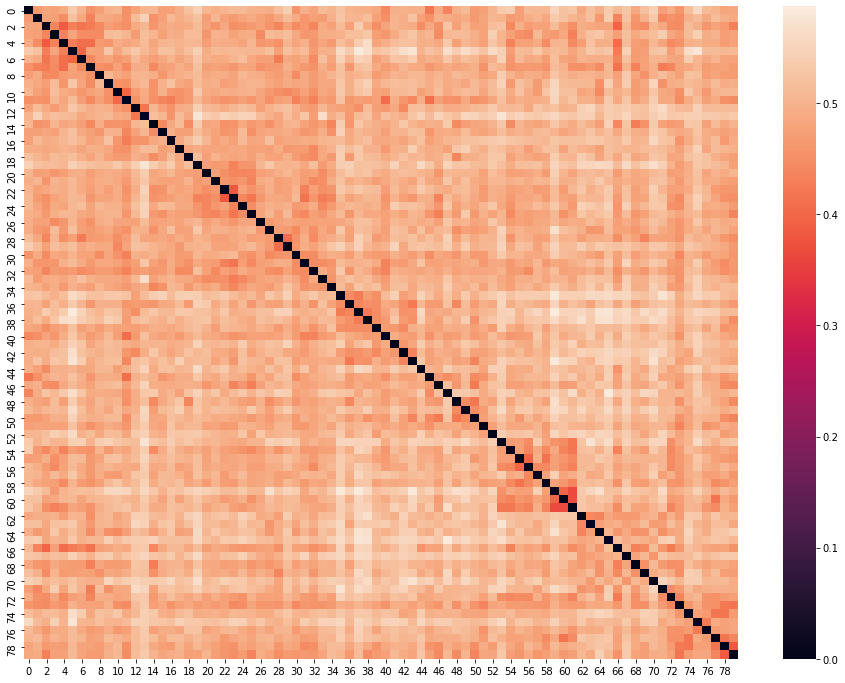

LOVE


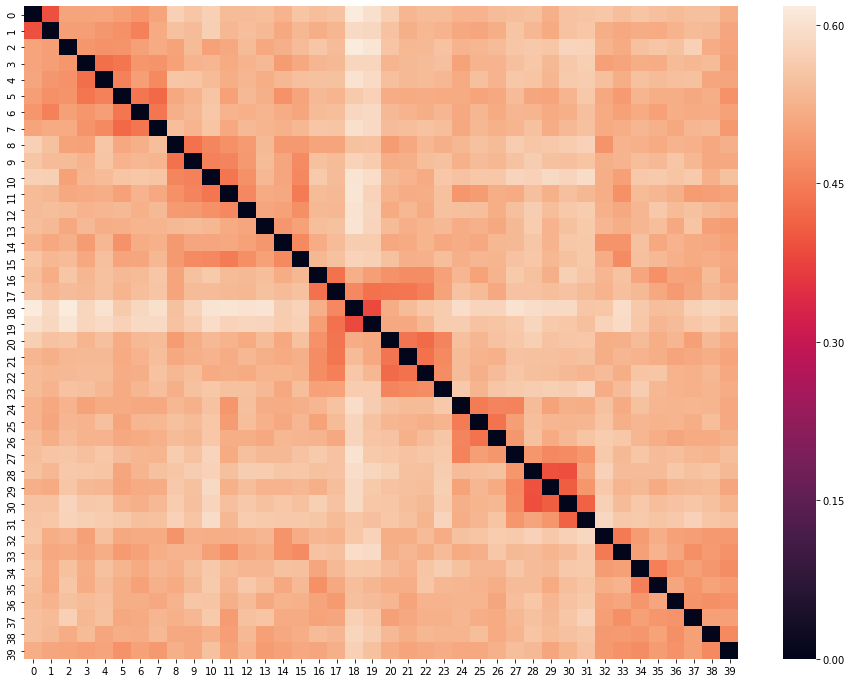

REVOLUTION


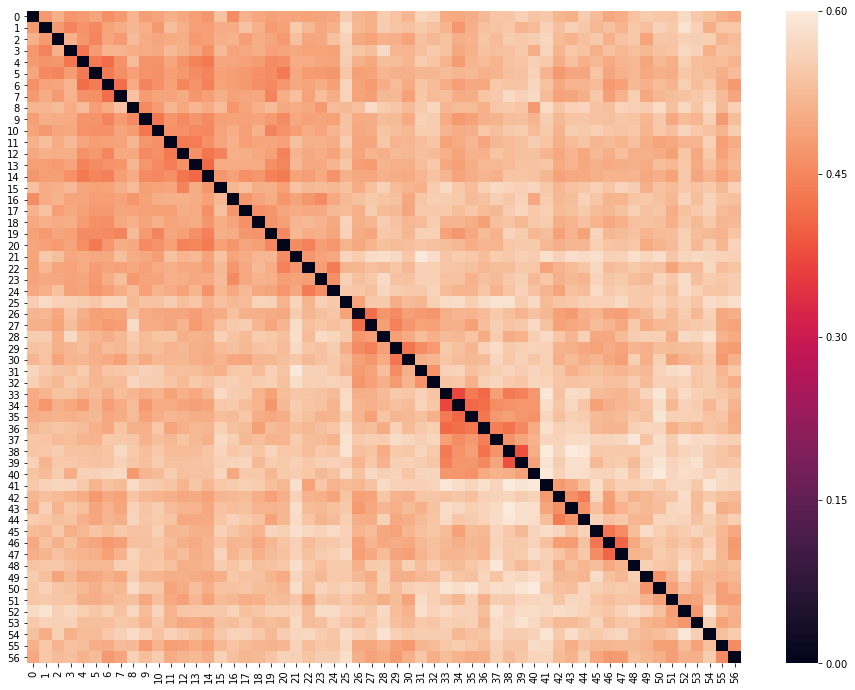

MIX1


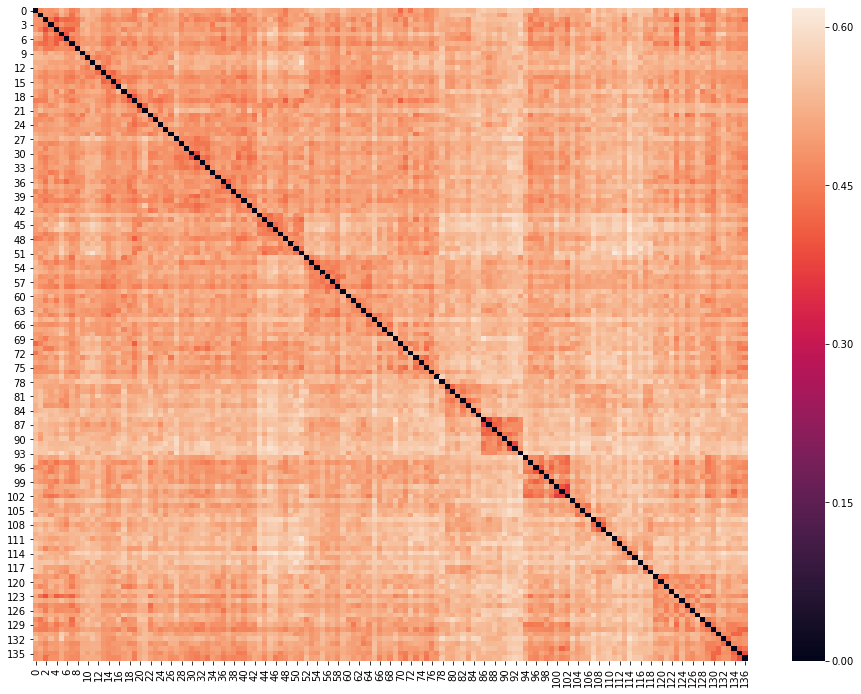

MIX2


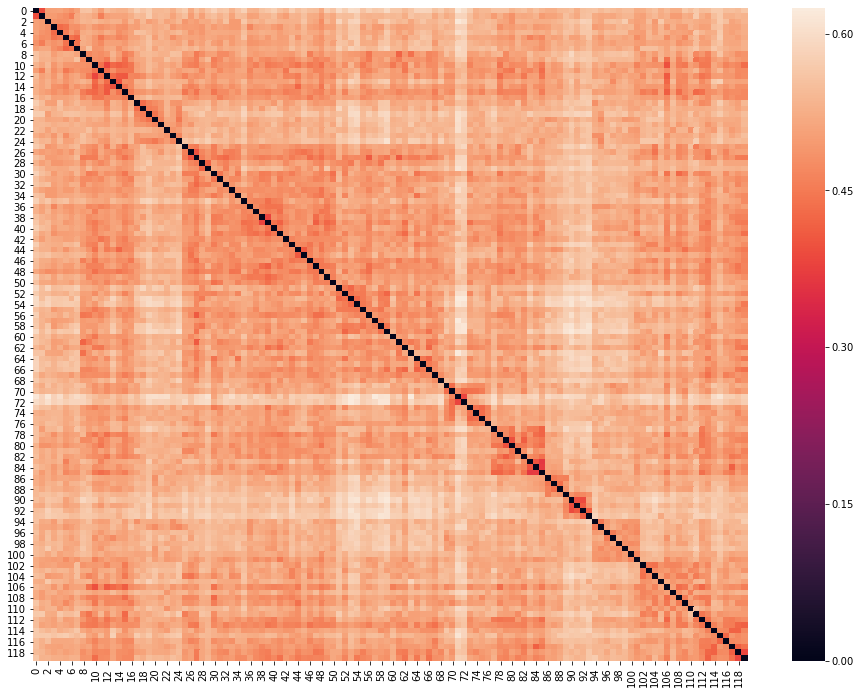

MIX3


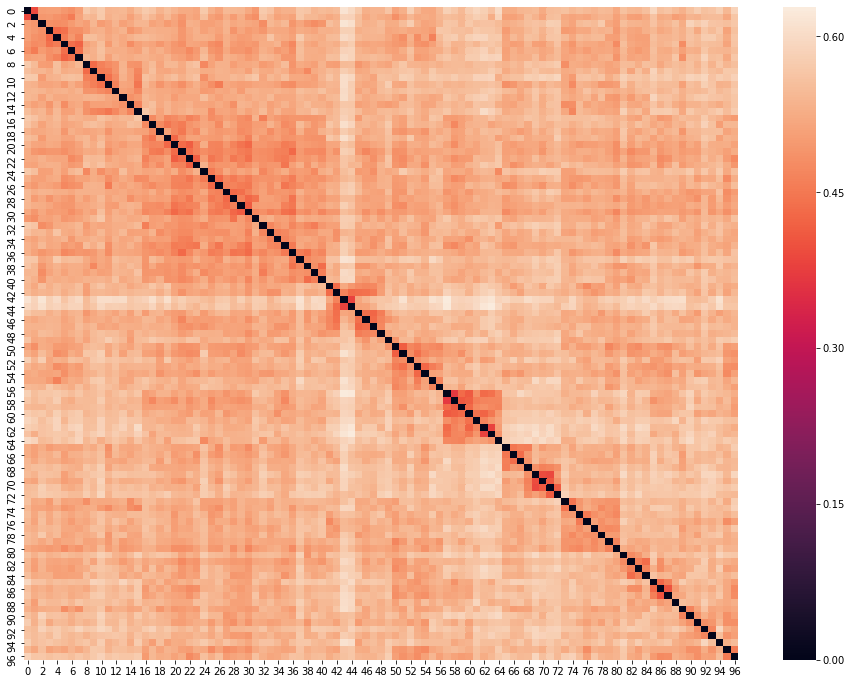

MIX4


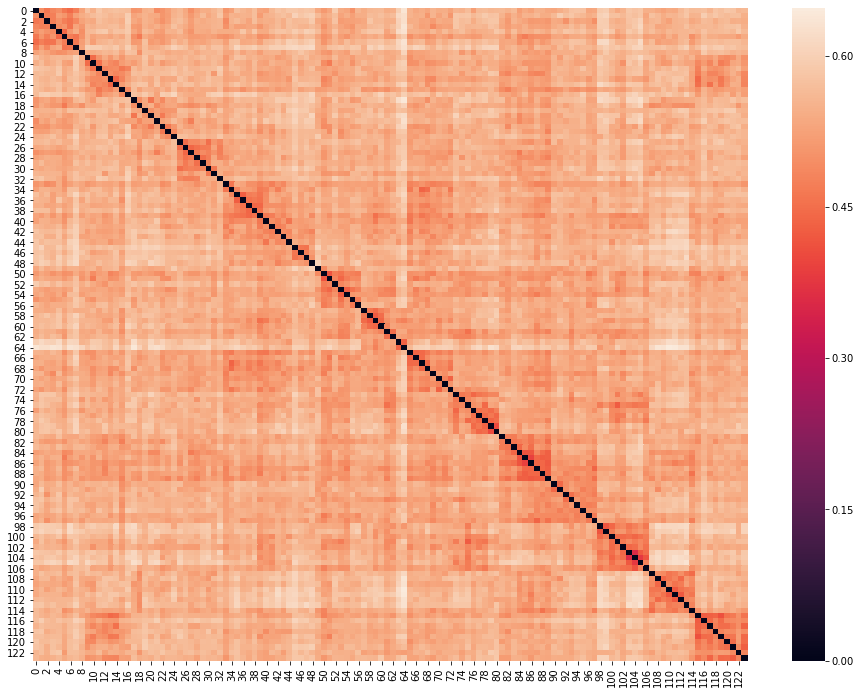

MIX5


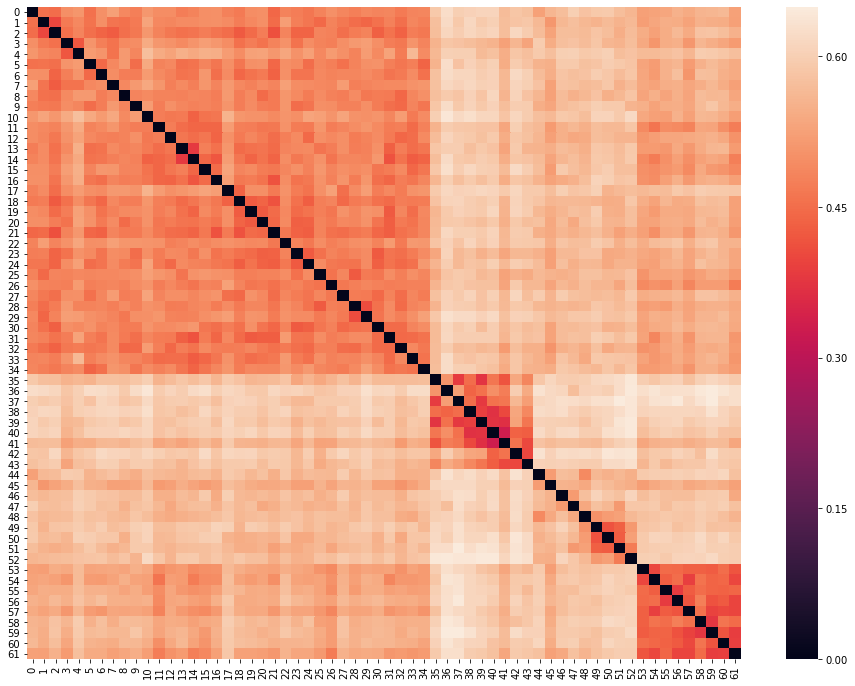

In [227]:
for theme in ['derevnya', 'love', 'revolution', 'mix1', 'mix2', 'mix3', 'mix4', 'mix5']:
    test_batch_vectorizer = artm.BatchVectorizer(data_path=f'test/{theme}/wv.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'test/{theme}/batches')
    print(theme.upper())
    plt.figure(figsize=(16, 12))
    theta_test = model.transform(batch_vectorizer=test_batch_vectorizer)
    dists = distance.squareform(distance.pdist(theta_test.T, metric=distance.jensenshannon))
    heatmap(dists)
    plt.show()

In [228]:
model.reshape_topics([f'topic_{i}' for i in range(100, 500)])

In [ ]:
for theme in ['derevnya', 'love', 'revolution', 'mix1', 'mix2', 'mix3', 'mix4', 'mix5']:
    dir_out = f'test/{theme}/chunks_mystem'
    os.mkdir('test/chunks_mystem')
    for i in tqdm(os.listdir(dir_out)):
        !~/Projects/pb-stylistic/mystem --format=text -wgnlid ~/Projects/pb-stylistic/ridero10/raw_chunks/{i} ~/Projects/pb-stylistic/ridero10/chunks_mystem/{i}

DEREVNYA


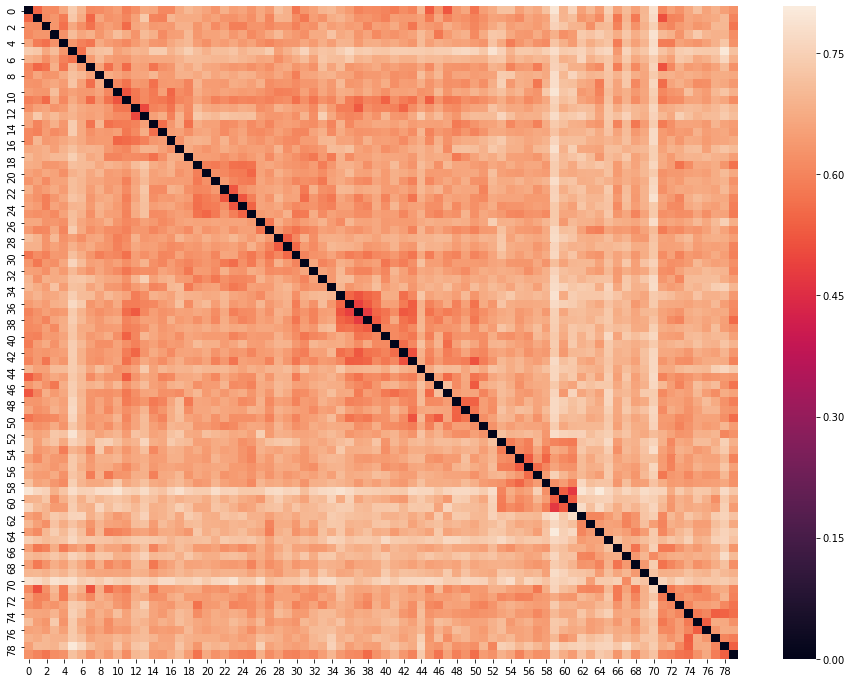

LOVE


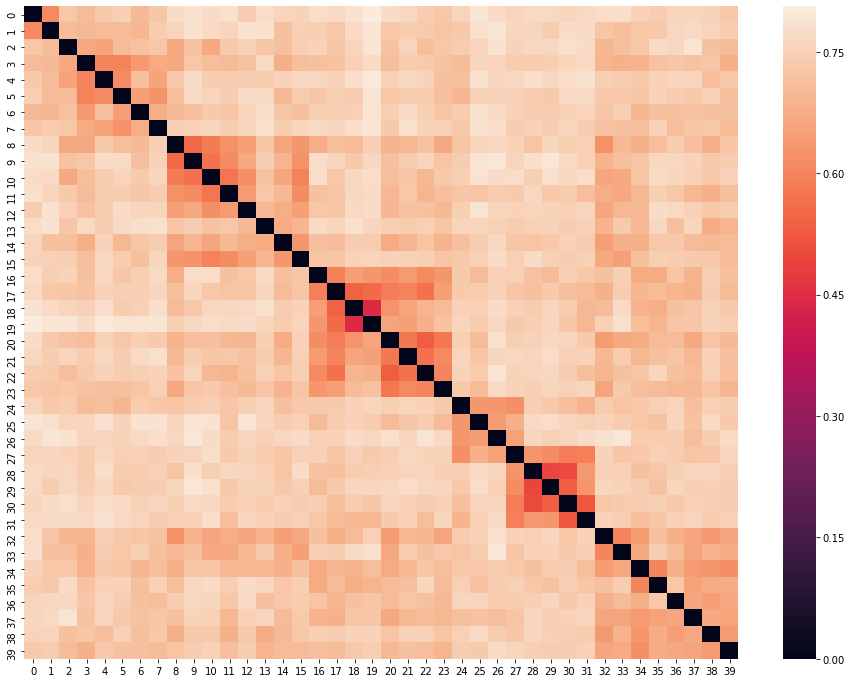

REVOLUTION


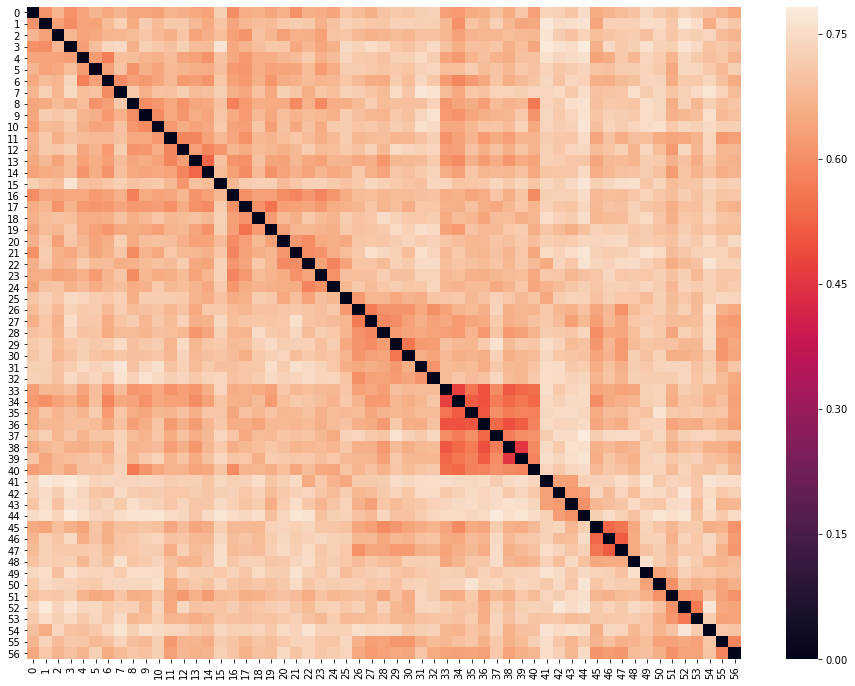

MIX1


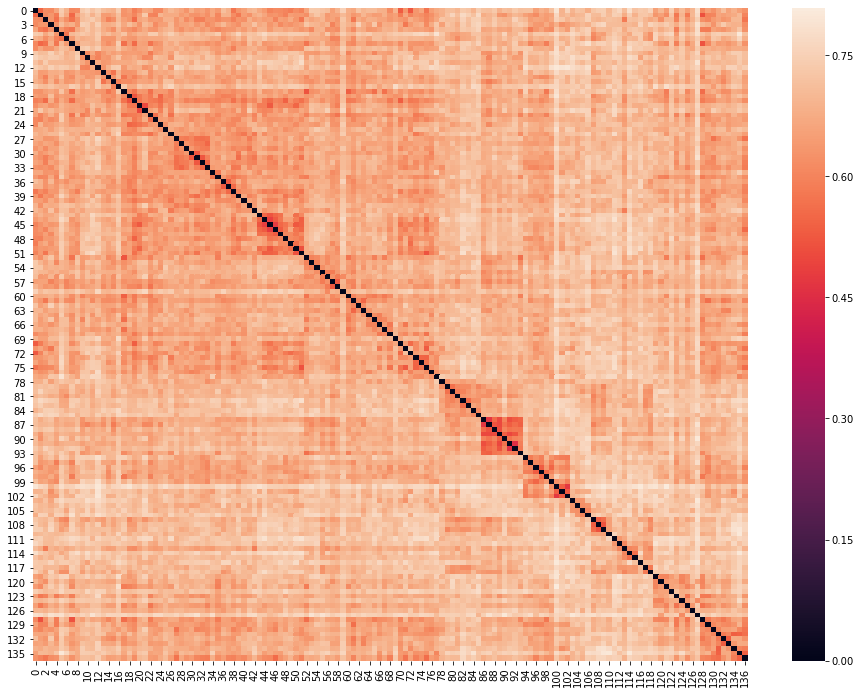

MIX2


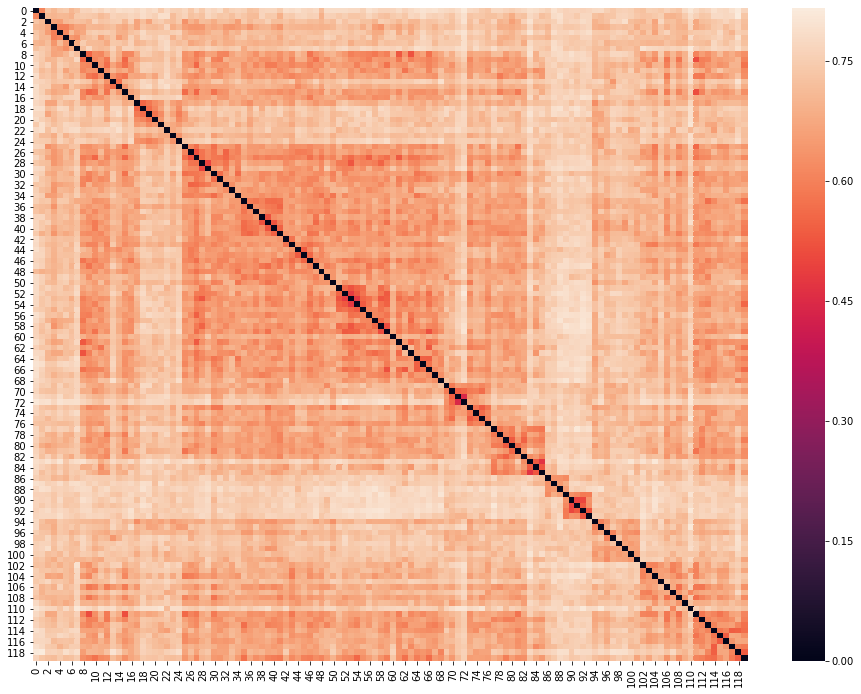

MIX3


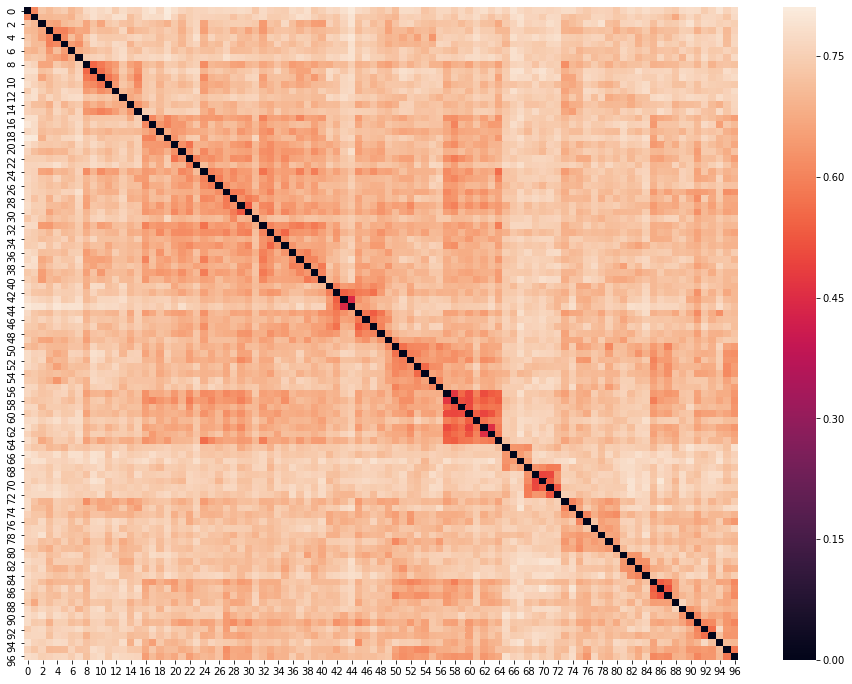

MIX4


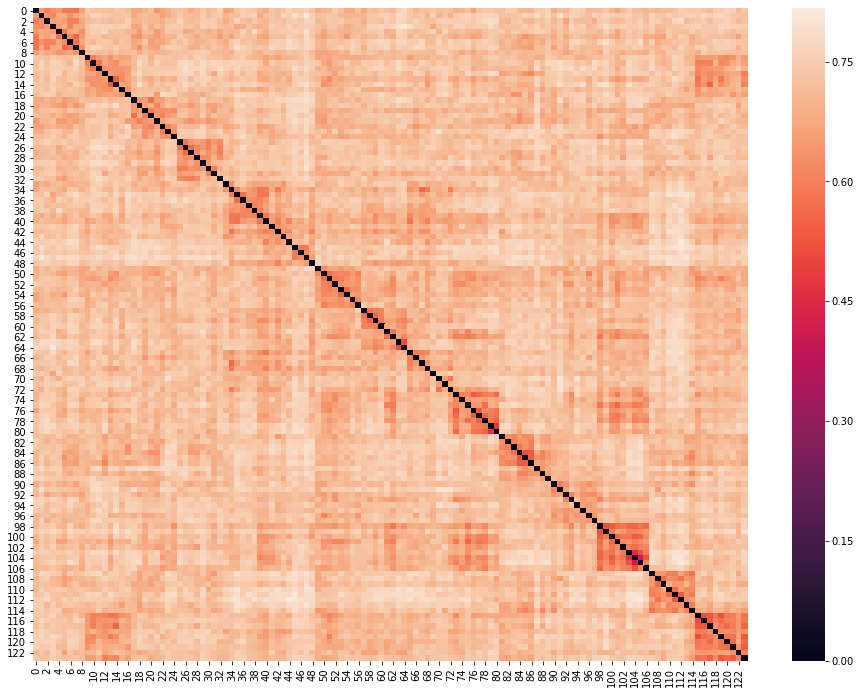

MIX5


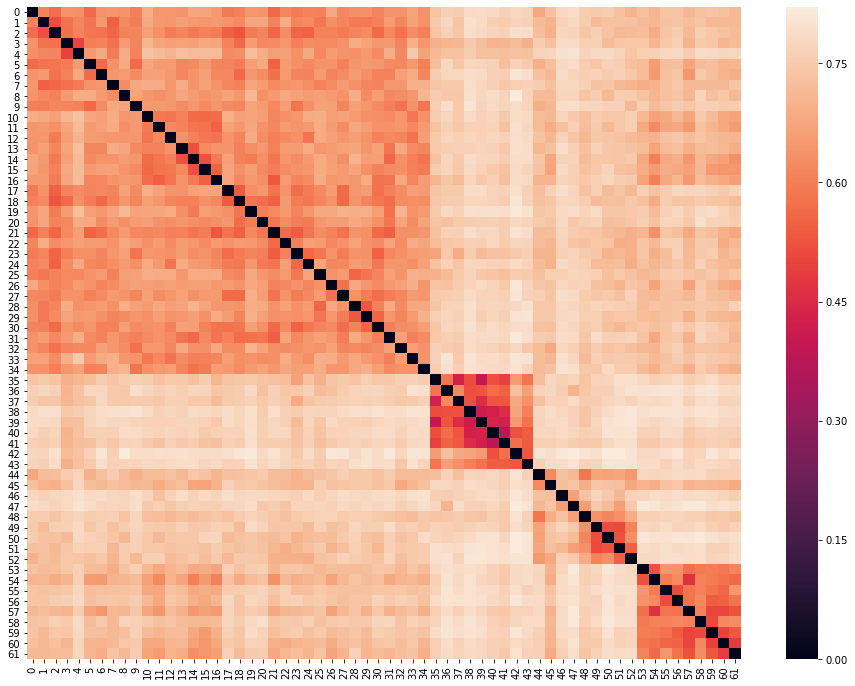

In [229]:
for theme in ['derevnya', 'love', 'revolution', 'mix1', 'mix2', 'mix3', 'mix4', 'mix5']:
    test_batch_vectorizer = artm.BatchVectorizer(data_path=f'test/{theme}/wv.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'test/{theme}/batches')
    print(theme.upper())
    plt.figure(figsize=(16, 12))
    theta_test = model.transform(batch_vectorizer=test_batch_vectorizer)
    dists = distance.squareform(distance.pdist(theta_test.T, metric=distance.jensenshannon))
    heatmap(dists)
    plt.show()

In [234]:
model.get_score('PerplexityScore')

value: 330.3599548339844
raw: -339802181.7146678
normalizer: 58584736.0
zero_words: 17284159

In [236]:
import gc

In [237]:
gc.collect()

102978